In [3]:
dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

By relying on the fact that Participant 13 is an outlier at both M-Ratio and Participantwise (Perceptual Confidence) Parameter Estimates to Predict Perceptual Outcome - I decided to consider her as an outlier.

Similary, since Participant 16's perceptual response time parameter estimate to predict perceptual confidence is 3 standard deviation away so I decided to exclude him also.

Since participant 39's perceptual confidence coefficient to predict value-based confidence is larger than 3 sd, it will be eliminated.

In other words, these three participants perform too well in line with our expectations.

Also I exclude response time trials in which standard deviation is 7 or higher. The reason that I choose this high sd level, while experimenting I witness participants sometimes spare 3-4 seconds to reflect upon their decision. If I choose a sd level such as 3, I would like to exclude most trials which last 2-3 seconds.

Additionally, Participant 21's average response time is 3 sd larger, however, I don't know whether it is a valid reason to exclude her.

<a id='content'></a>
# Content

### [a1) Response Time Outlier Check](#response_time)
### [a2) Average Response Times of Participants](#response_time_2)

## b) Outlier check for while perceptual confidence predicts perceptual outcome

### [b1) M-Ratio](#mratio)
### [b2) Hierarchical Regression and Participantwise Estimates to Predict Perceptual Outcome (Correct/Wrong)](#perceptual_reg)

## c) [Perceptual Confidence and Value-Based Relationship](#perval)

## d) Perceptual Response Time - Perceptual Confidence Relationship


### [d1) Perceptual Confidence and Perceptual Response Time Relationship](#prtpc)
### [d2) Participantwise Parameter Estimates for Perceptual Response Time while predicting Perceptual Confidence](#ppepr)

## e)  Value-Based Confidence and Value-Based Decision Outcomes

### [e1) Value-Based Confidence and Value-Based Decision Outcomes](#vcvrt)

### [e2) Participantwise Parameter Estimates for Value-Based Confidence while predicting Value-Based Outcome](#ppevb)

## f) Value-Based Confidence and Response Time Relationship

### [f1) Relationship between Value-Based Response Time and Confidence](#relvcvrt)

### [f2)  Participantwise Parameter Estimates for Perceptual Response Time while predicting Perceptual Confidence](#ppeprt)

## g)[ How Perceptual (Blue) and Value-Based (Red) Confidence changes through trials](#redblue)

## h) Confidence and Response Time Distrubitions for Each Participant
### [h1) Z-Scored Perceptual Confidence For Each Participant](#percept)
### [h2) Z-Scored Value-Based Confidence For Each Participant](#valued)
### [h3) Z-Sored Value-Based Response Time For Each Participant](#valuedrt)
### [h4) Z-Scored Perceptual Response Time For Each Participant](#perceptrt)
## I) [ Number of Times Blue and Orange Decks are Chosen Through Trials by Each Participant](#final)
## j) [ Payoff Probabilities of Blue and Orange Decks](#bo)

<a id='response_time'></a>
# Perceptual and Value-Based Response Times - Outlier Check

Response times which are 7 standard deviation greater than need are eliminated trialwise.

Perceptual Response time which are 7 sd greater in seconds

In [16]:
dat$Perceptual_Rt[which(dat$z_P_Rt>7)]

numeric(0)

Value-Based Response time which are 7 sd greater in seconds

In [17]:
dat$Value_Rt[which(dat$z_V_Rt>7)]

numeric(0)

Trials that fit this criteria are eliminated from the data set

In [6]:
dat <- dat[-c(which(dat$z_P_Rt>7), which(dat$z_V_Rt>7)),]

<a id='response_time'></a>
# Average Response Times of Participants

In [125]:
average_reaction_time <- rep(0,40)
j <- 1
while(j<=40){
    average_reaction_time[j] <- mean(dat$Perceptual_Rt[dat$participant==j])   
     j <- j + 1
}
z_a_r_t<- (average_reaction_time - mean(average_reaction_time)) / sd(average_reaction_time)

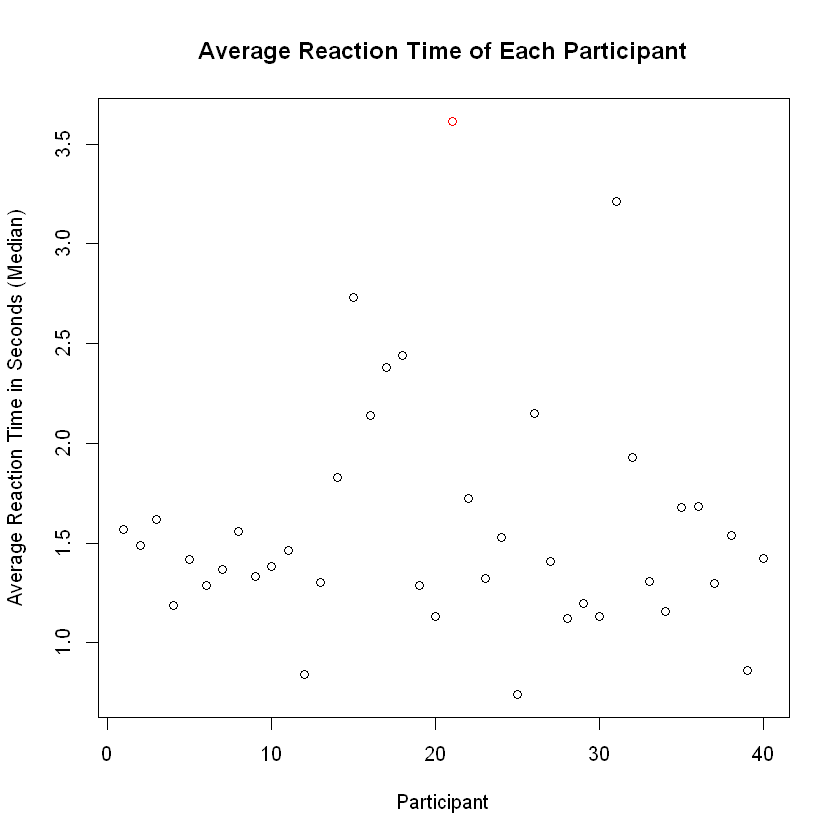

In [127]:
plot(average_reaction_time,col = ifelse(z_a_r_t>3, 'red', 'black'), main='Average Reaction Time of Each Participant', xlab='Participant', ylab= 'Average Reaction Time in Seconds (Median)')

Although Participant 21's average response time is 3 sd larger, I don't know whether it is a valid reason to exclude her.

# [Back to Content](#content)

<a id='mratio'></a>

# M-Ratio's for Confidence Judgements in Perceptual Task

In [30]:
m_ratio_p <- c(0.841143829899999,0.614743007100001,0.773129113033335,0.772087180933334,0.856729298000001,1.07669530810000,0.618374757700001,0.791193532166669,0.888780754033334,
               0.598551811700002,0.552930698000000,0.777688479866667,1.53343572086667,0.749907742866667,0.977961758466670,0.853836935366666,0.779486507999999,0.809712222066666,
               0.759033913966668,0.782042897933332,0.540607237166668,0.791274142133332,0.773498867399999,0.508340372700001,0.869305440966669,1.11190031073333,
               0.678690413300000,1.01834644946667,1.17475987383333,0.877195780633334,0.835847032100000,0.621370311266668,0.742608703533333,
               0.625861985099999,1.12587633060000,0.716024289833333,0.844594537400000,0.748004669366665,0.671522265433334,0.870324243600001)

z_m_ratio_p <- (m_ratio_p - mean(m_ratio_p)) / sd(m_ratio_p)
sprintf("Participant %s is 3 standard deviation away with an M-Ratio of 1.53", which(z_m_ratio_p>3 | z_m_ratio_p < -3))

[1] "Participant 13 is 3 standard deviation away with an M-Ratio of 1.53"

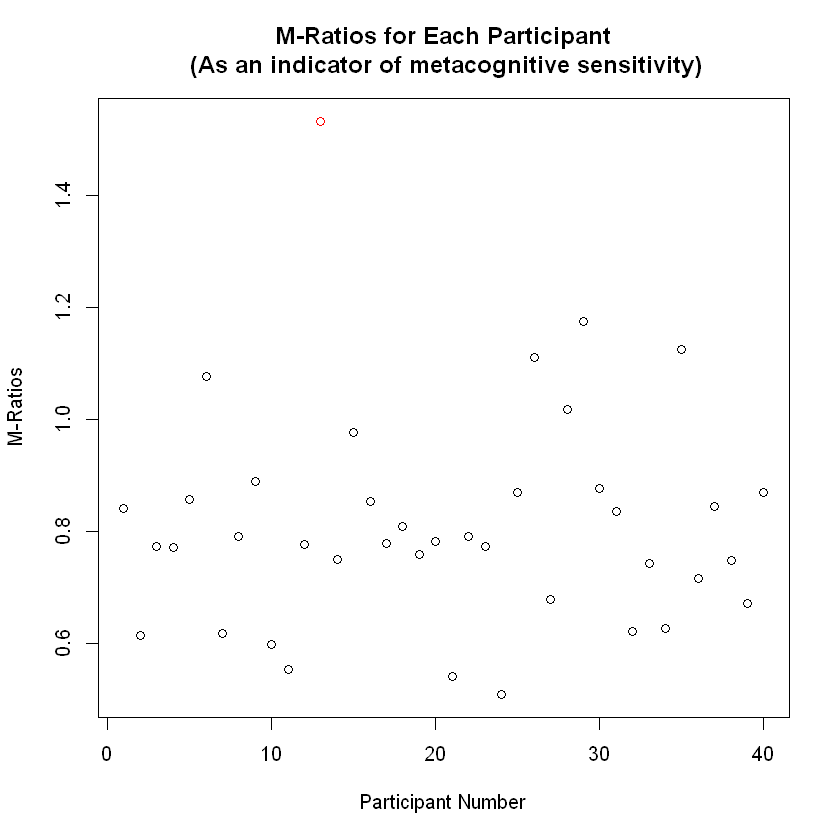

In [43]:
plot(seq(1,40), m_ratio_p, xlab= c('Participant Number'), ylab = c('M-Ratios'), col = ifelse(m_ratio_p>1.4, 'red', 'black'), main = 'M-Ratios for Each Participant\n (As an indicator of metacognitive sensitivity)' )

Participant 13 is an outlier (the one which is colored red) and therefore will be eliminated.

# [Back to Content](#content)

<a id='perval'></a>

# Perceptual Confidence and Value-Based Relationship

Since participant 37's perceptual confidence coefficient to predict value-based confidence is larger than 3 sd (4), it will be eliminated.

In [5]:
fit <- lmer(z_V_Conf ~ 0 + z_P_Conf + z_V_Rt + z_P_Conf:z_V_Rt +
            (0 + z_P_Conf + z_V_Rt +z_P_Conf:z_V_Rt|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))

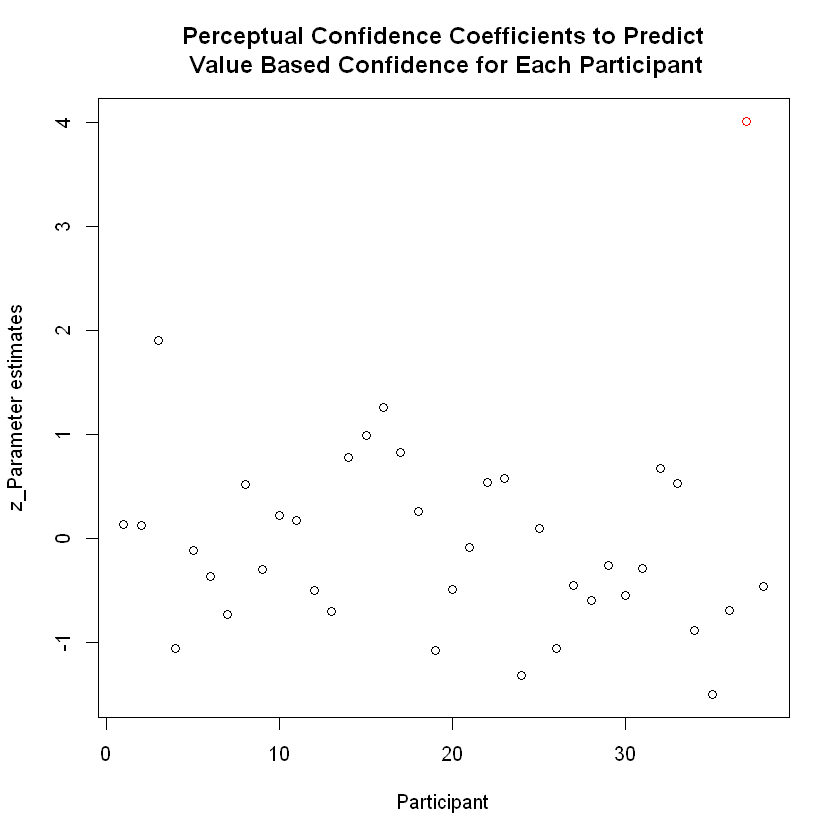

In [13]:
pc <- ranef(fit)$participant[, "z_P_Conf"] + fixef(fit)[1]
z_pc <- (pc- mean(pc)) / sd(pc)
plot(z_pc,  col = ifelse(z_pc>3, 'red', 'black'),
     main='Perceptual Confidence Coefficients to Predict\n Value Based Confidence for Each Participant'
     , xlab='Participant', ylab= 'z_Parameter estimates')

Participant 39 is an outlier.

# [Back to Content](#content)


# Z-Scored Perceptual Confidence and Perceptual Decision Outcomes

Boxplots for each participants to demonstrate how Perceptual Confidence differs when participants gives a correct or wrong answer at Perceptual task

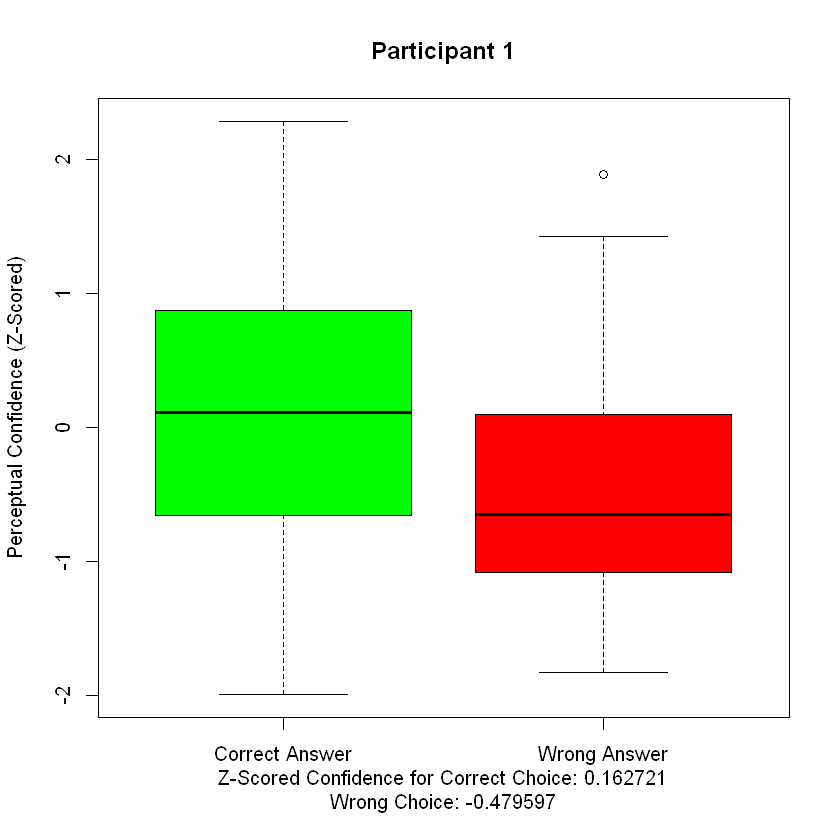

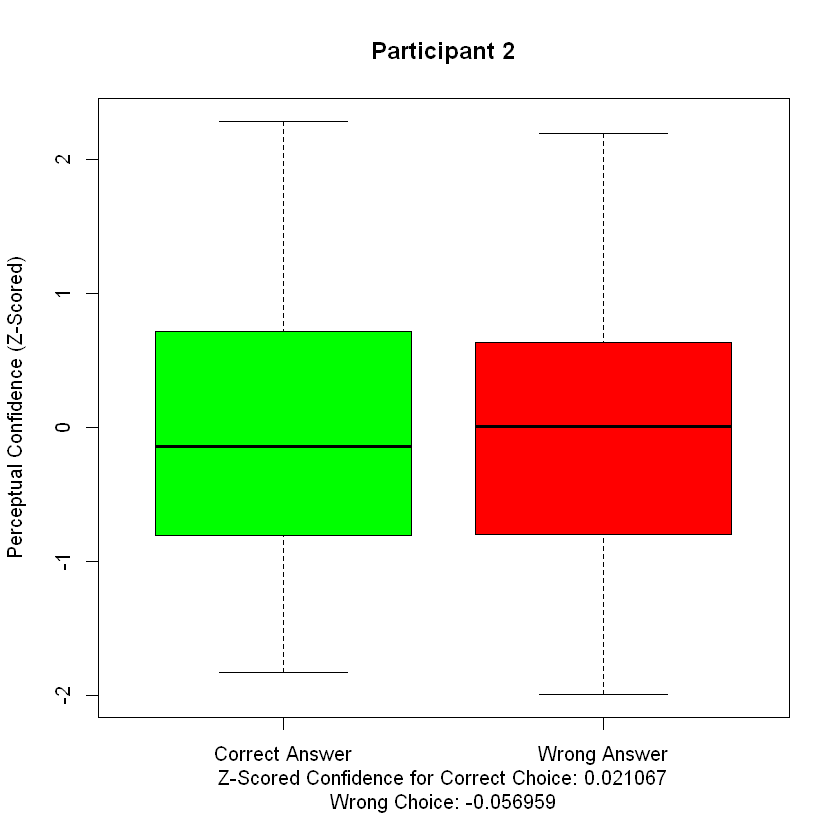

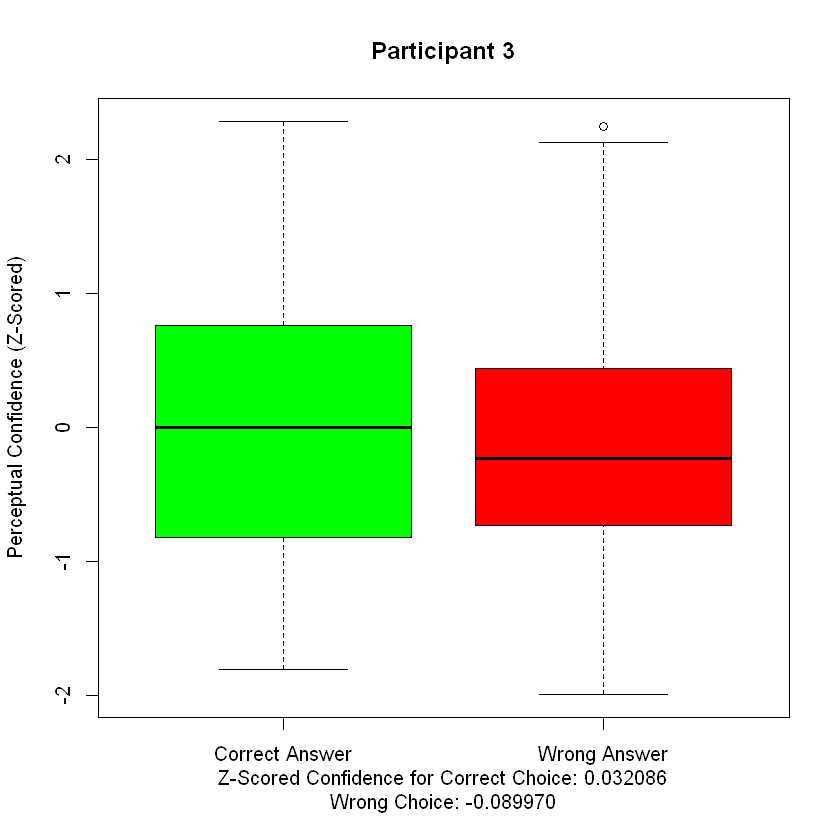

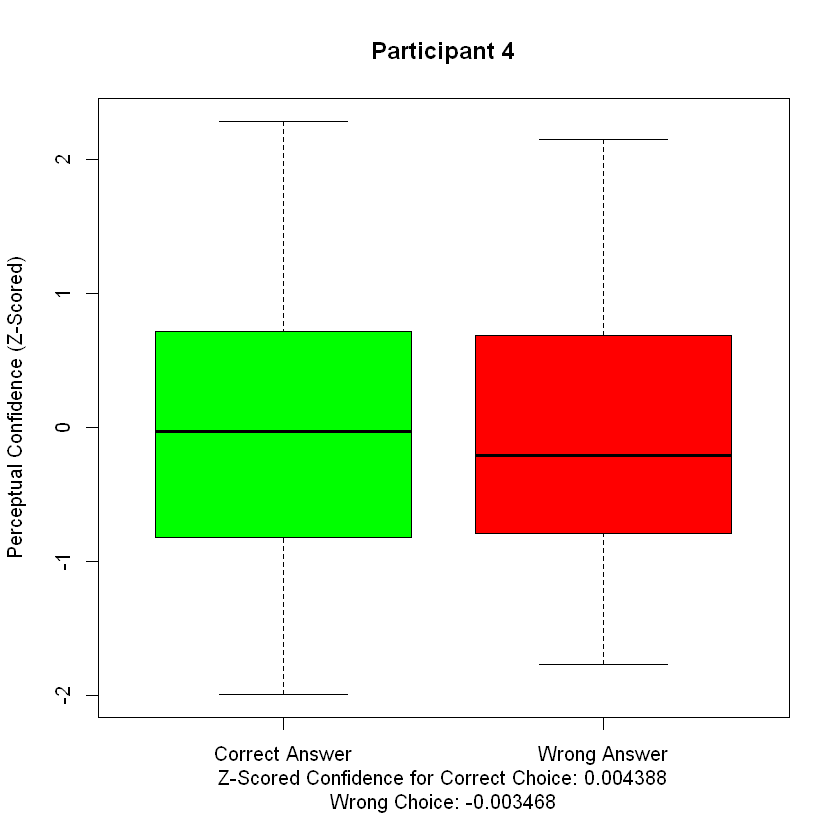

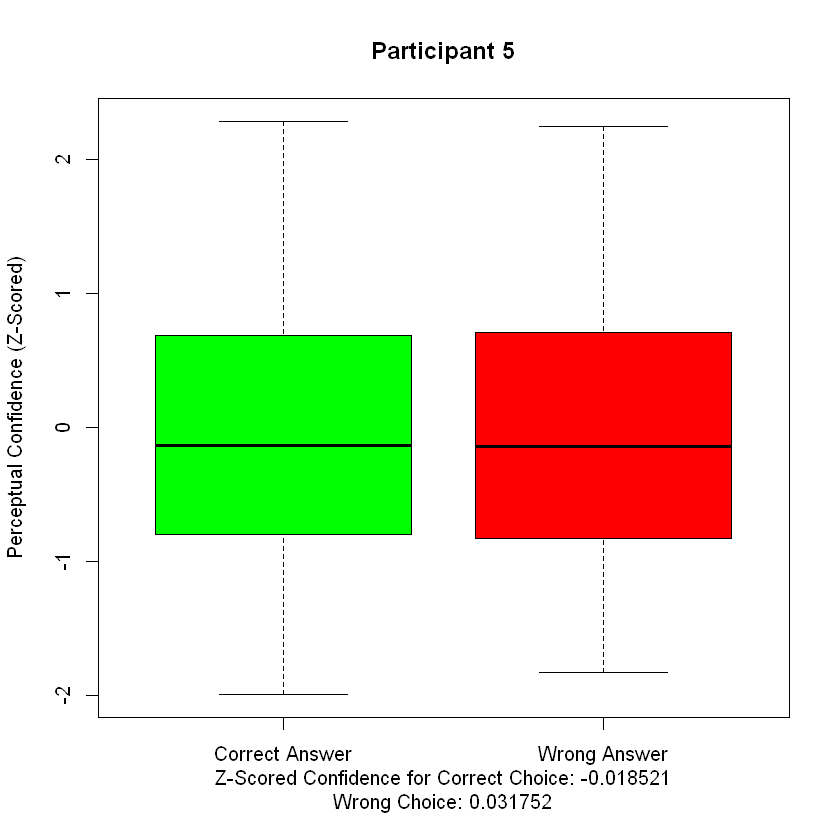

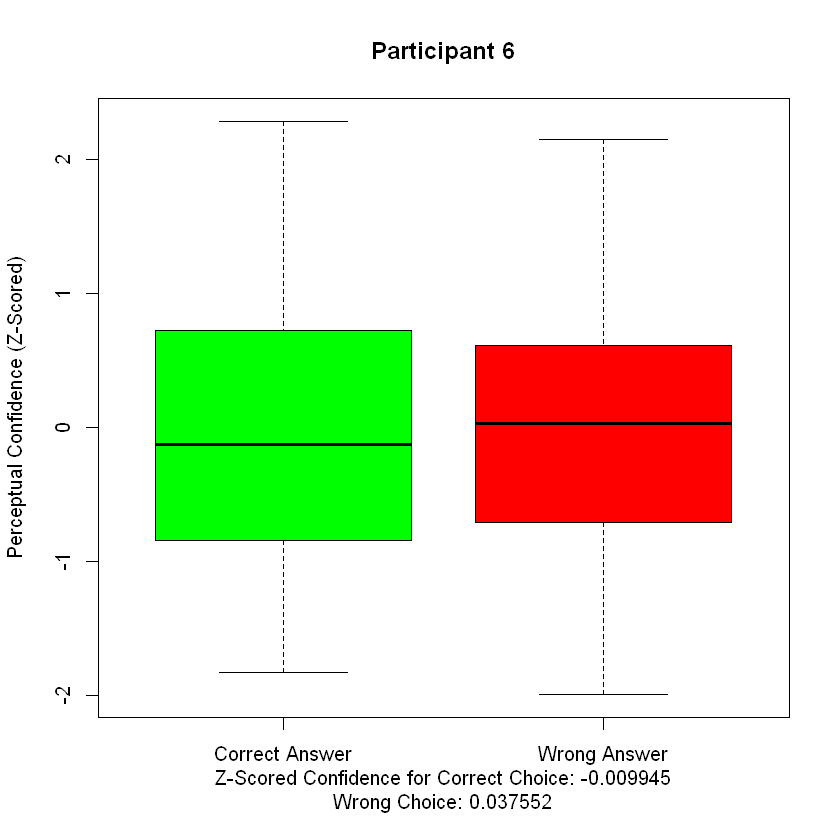

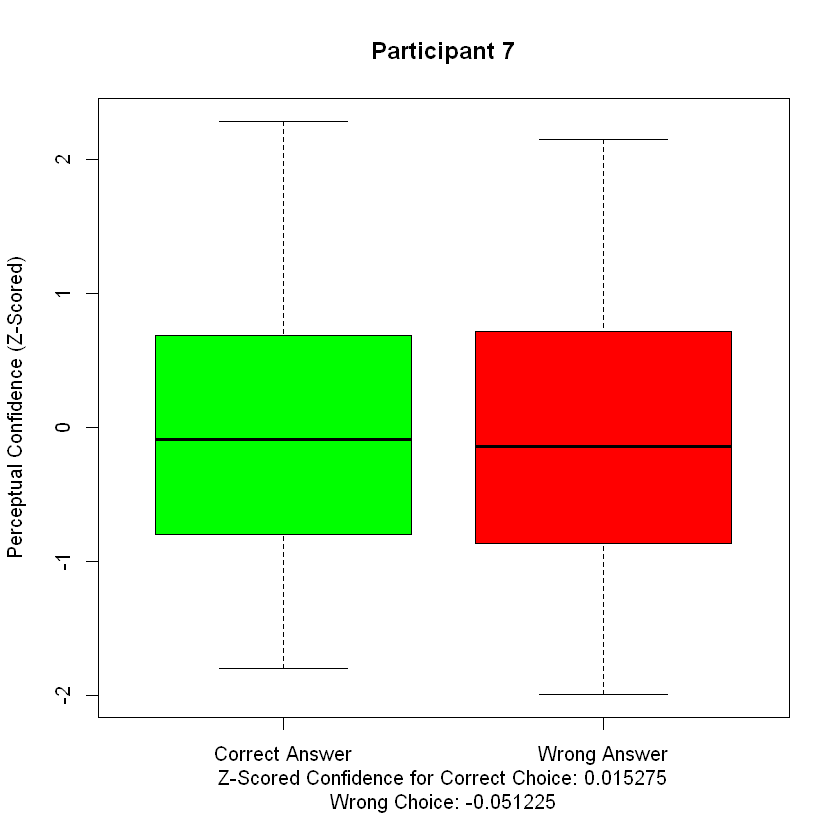

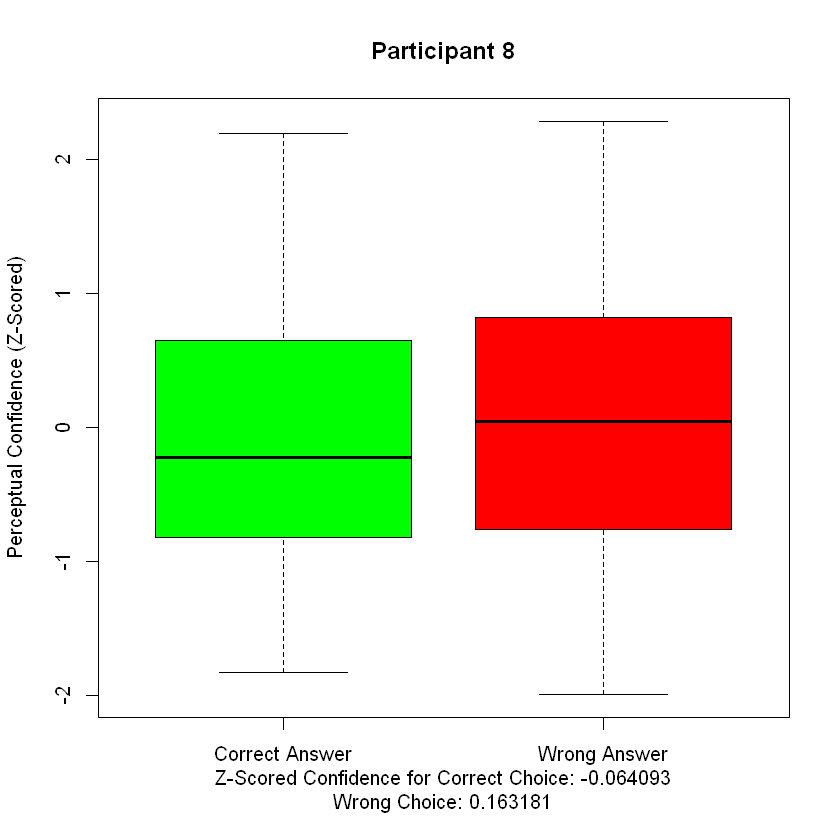

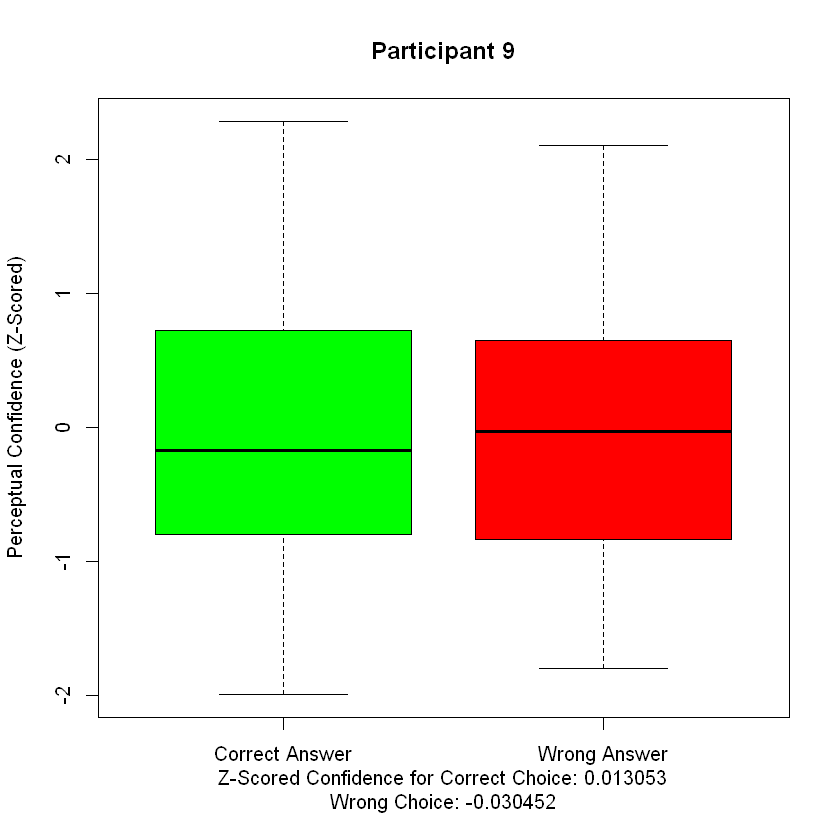

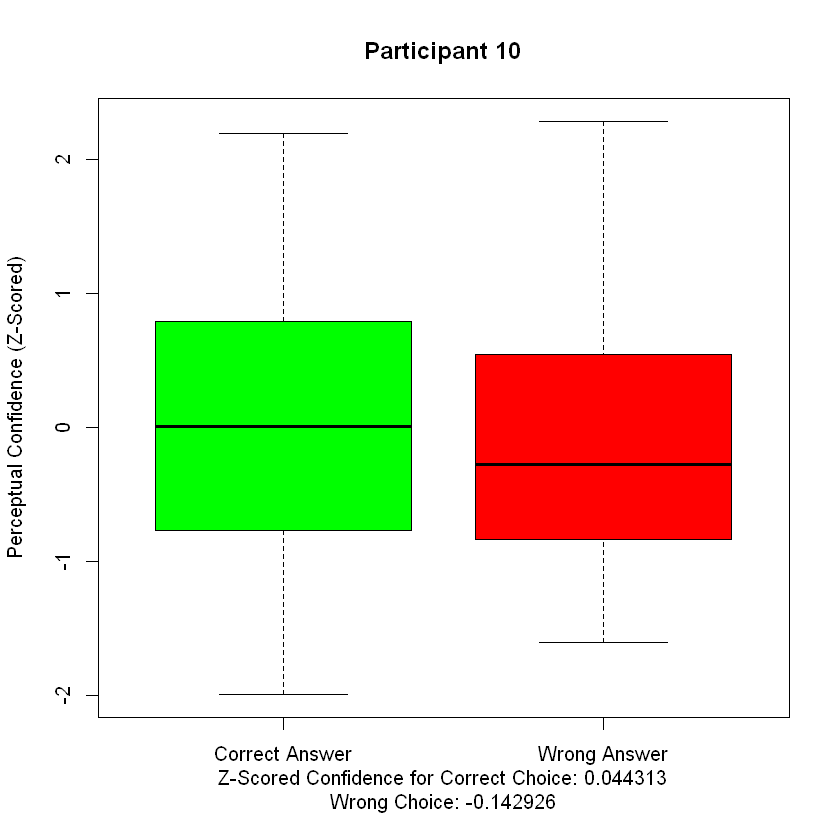

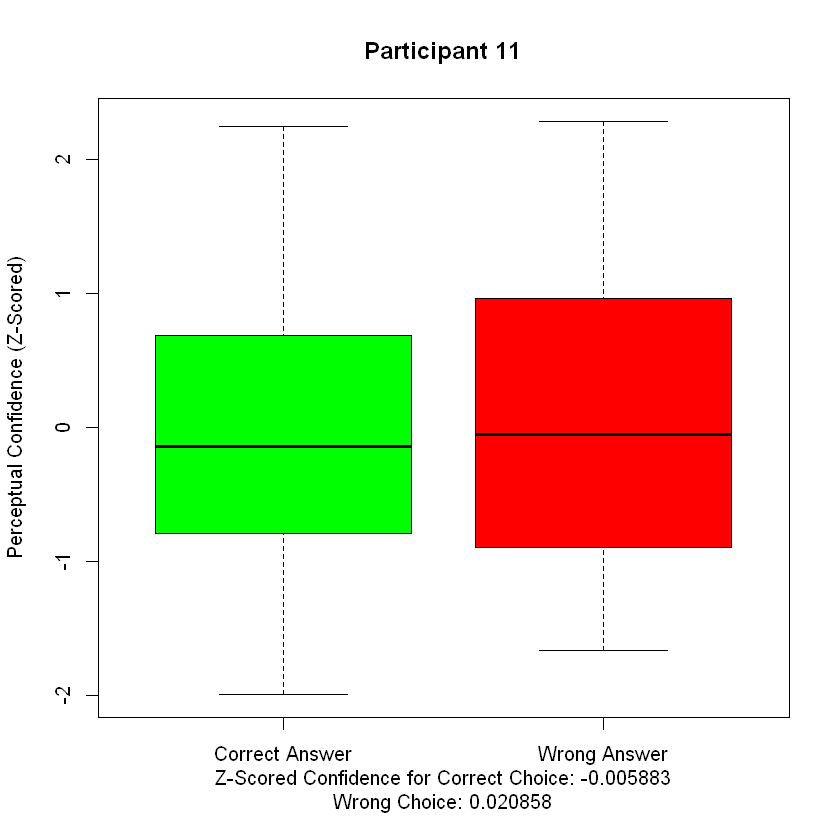

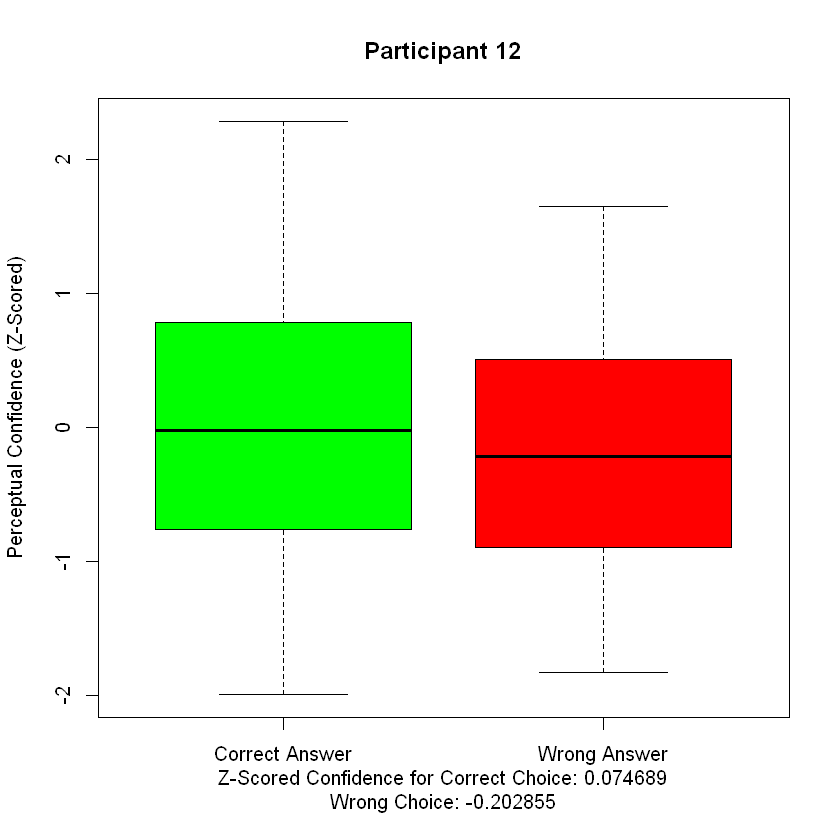

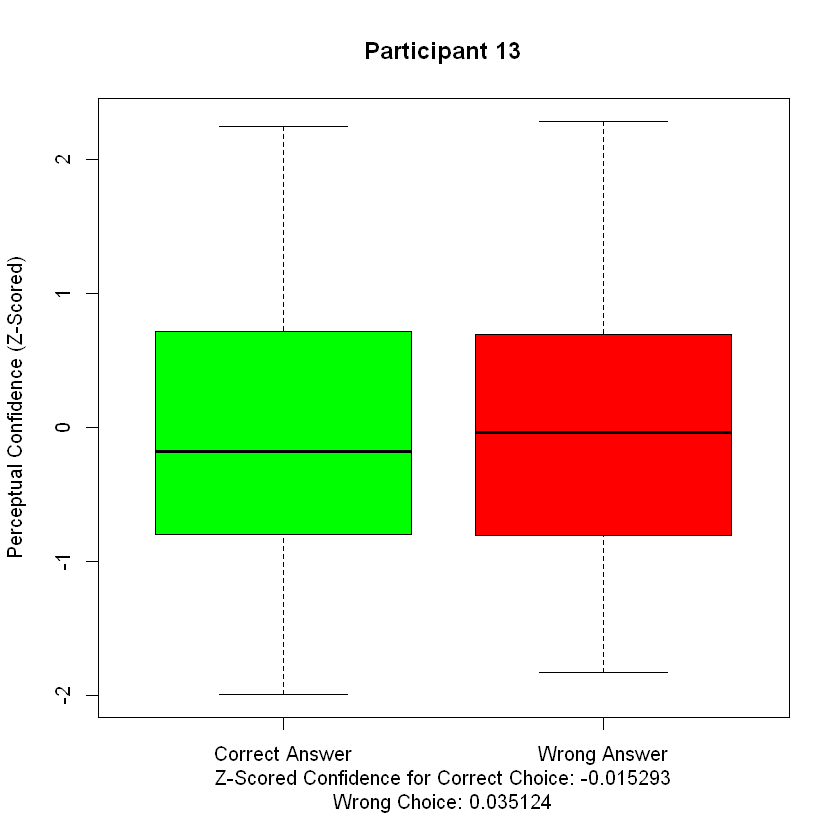

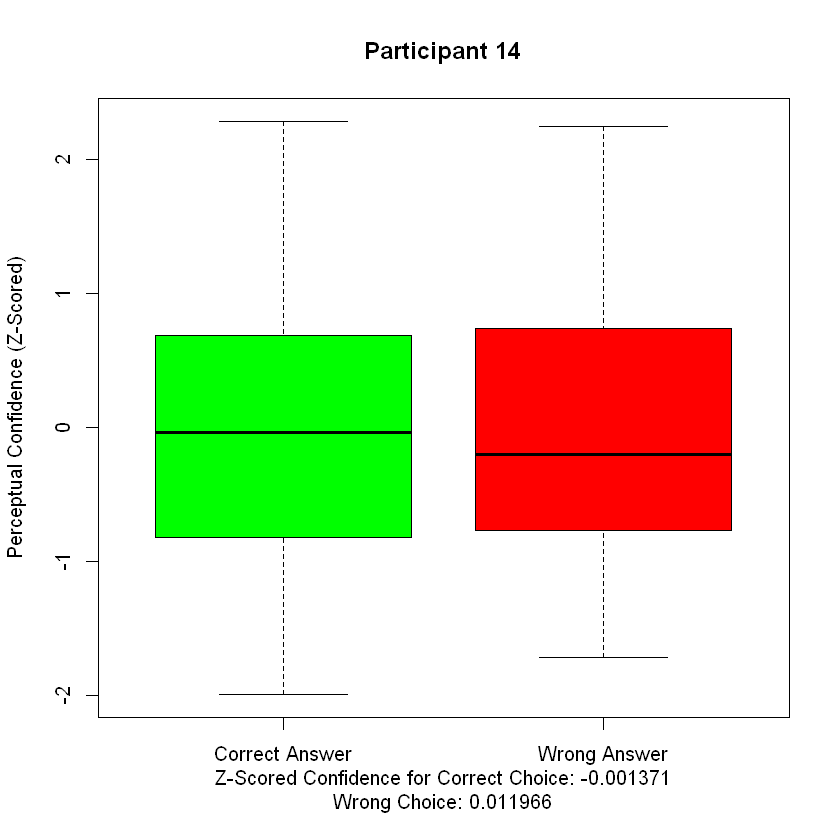

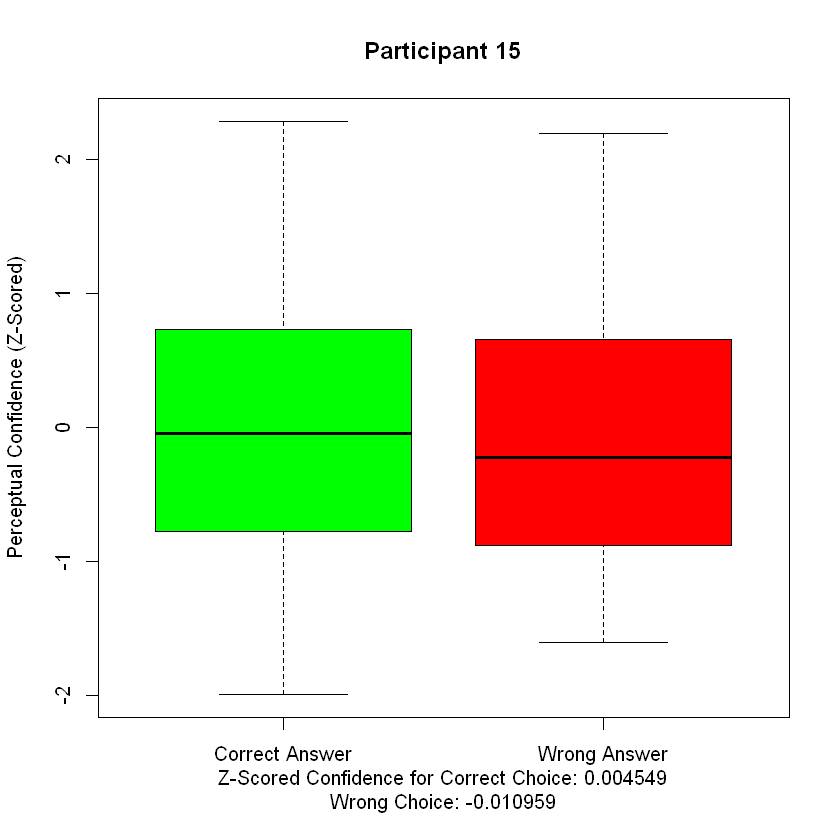

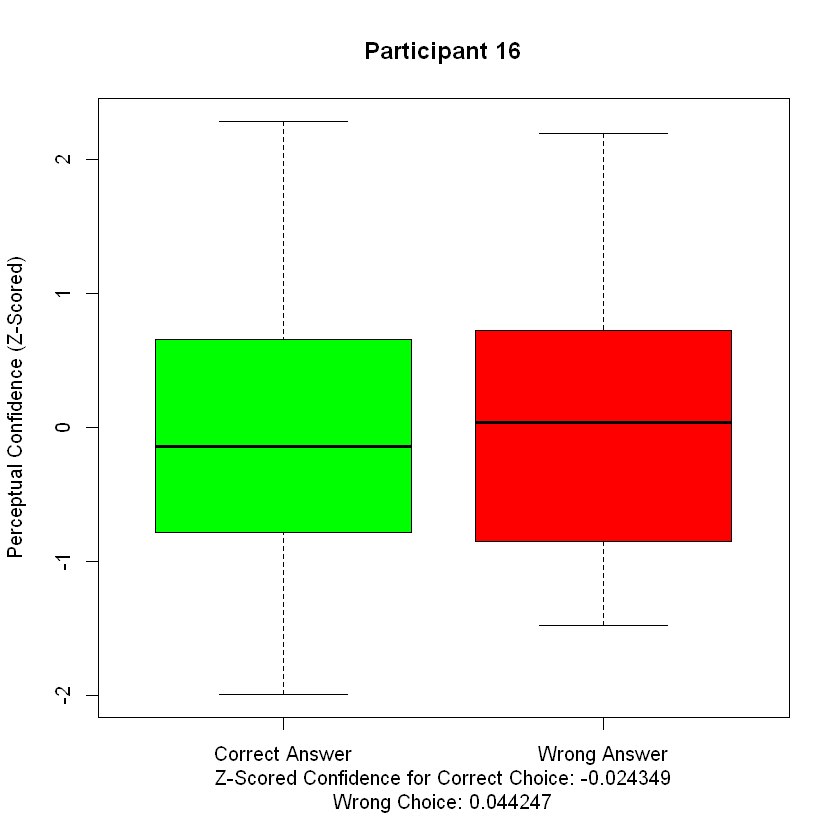

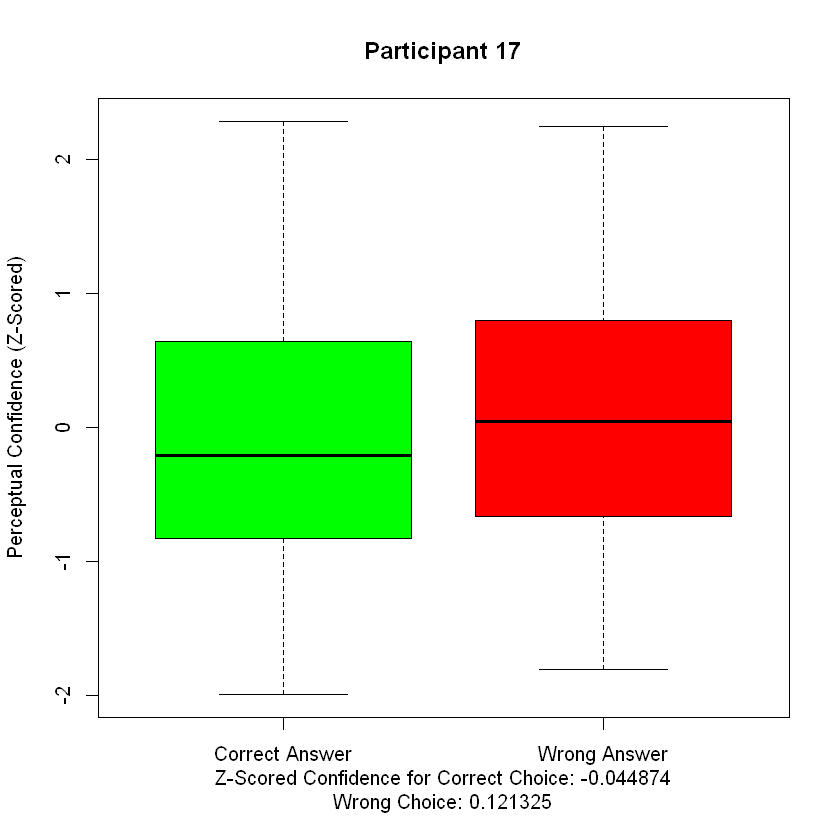

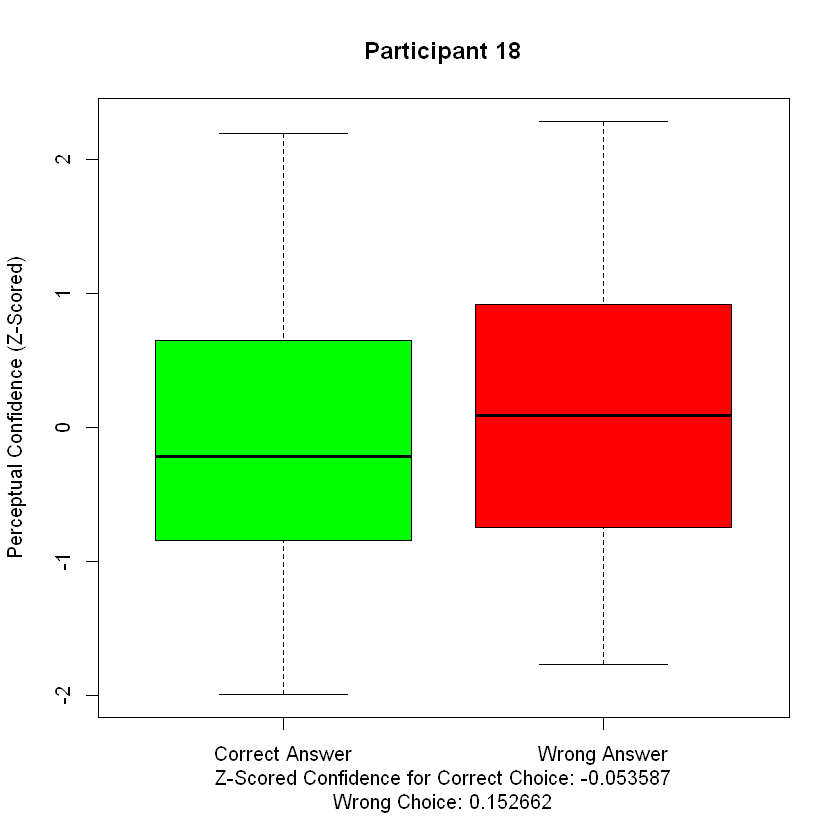

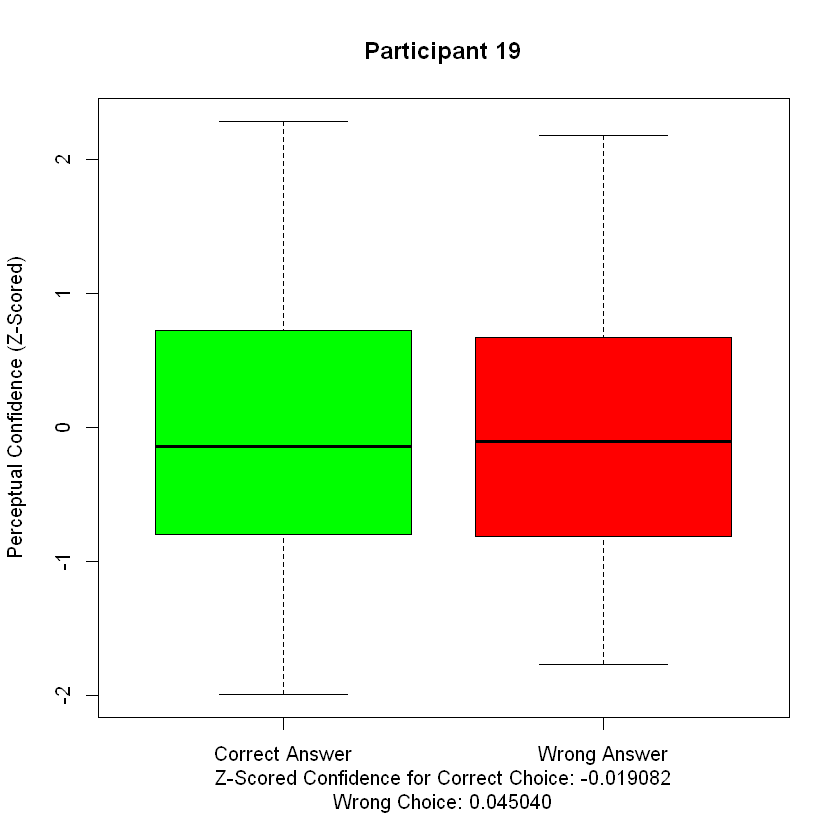

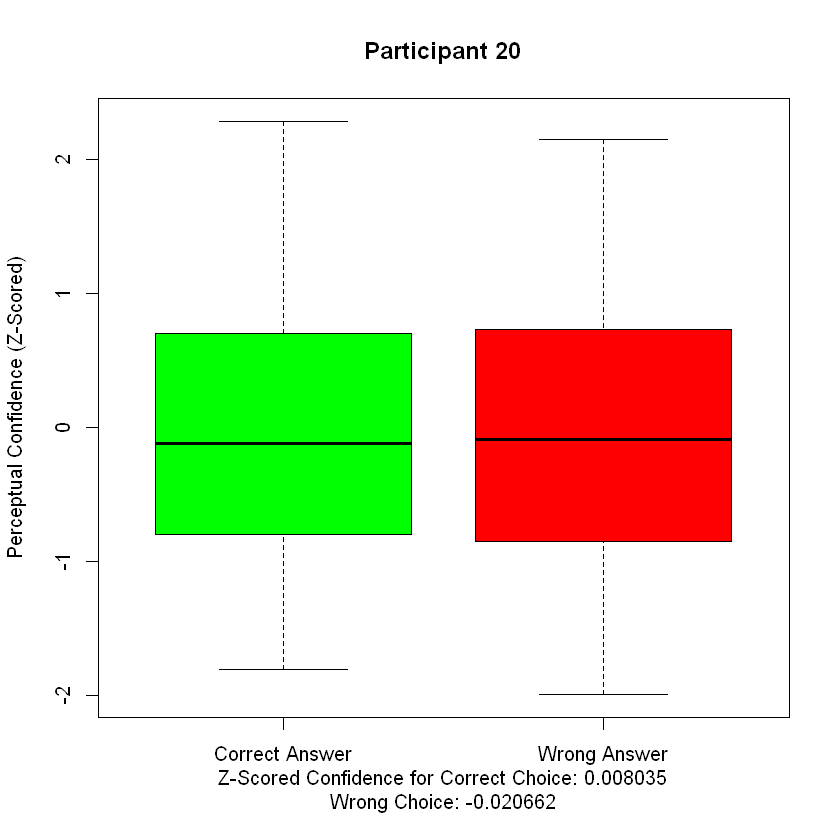

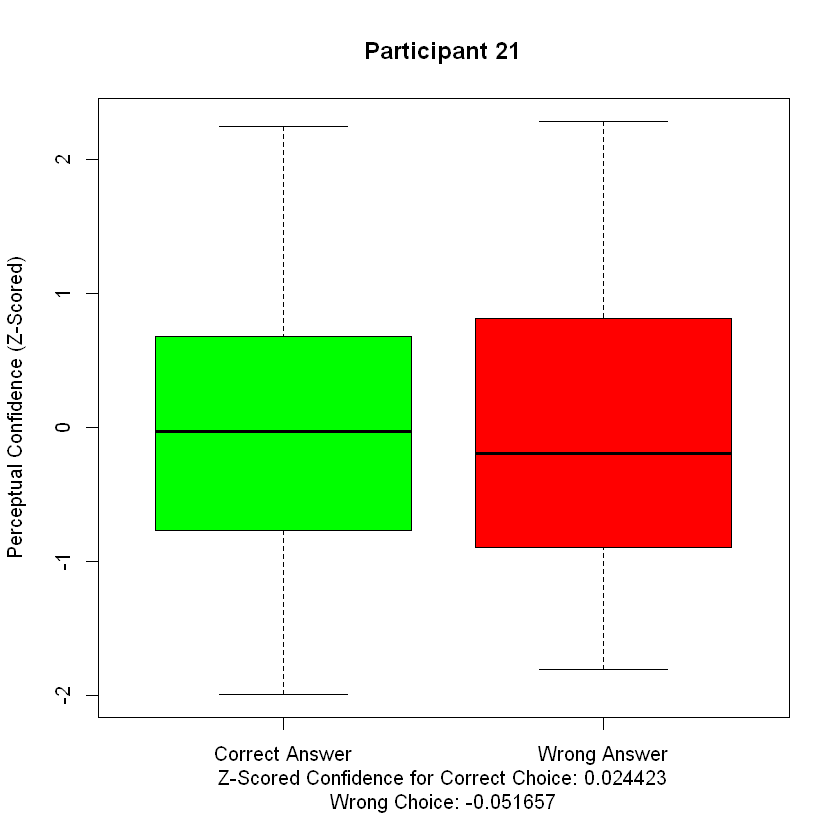

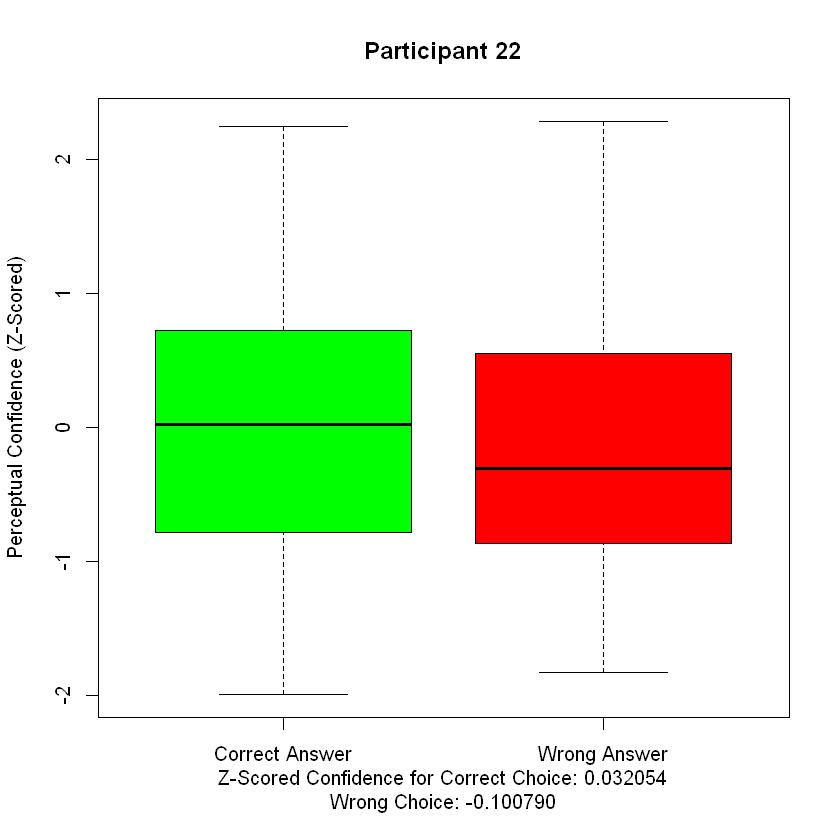

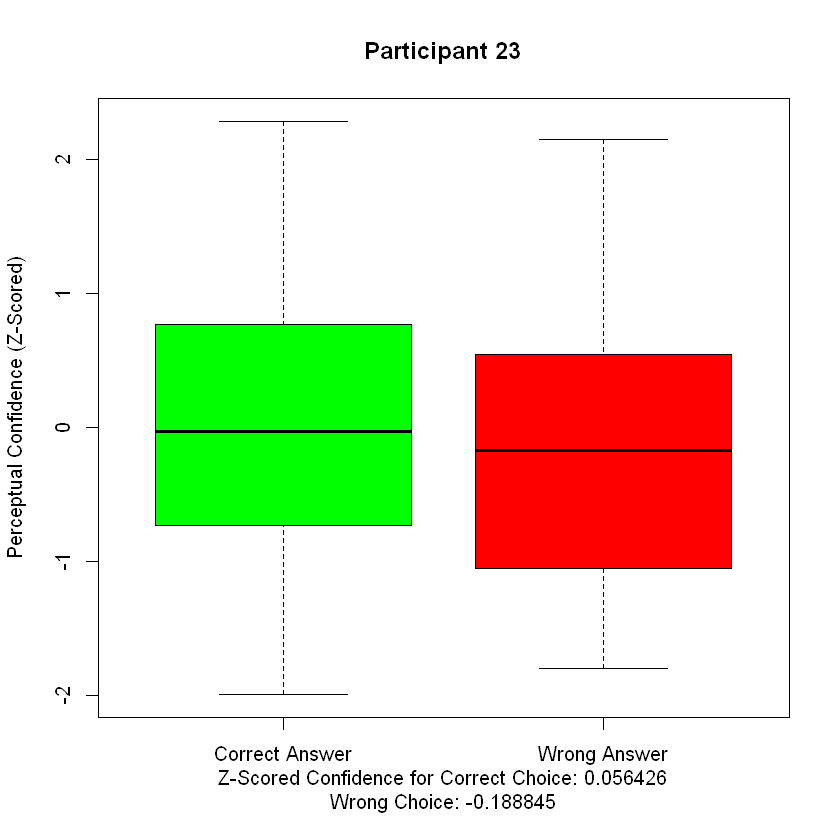

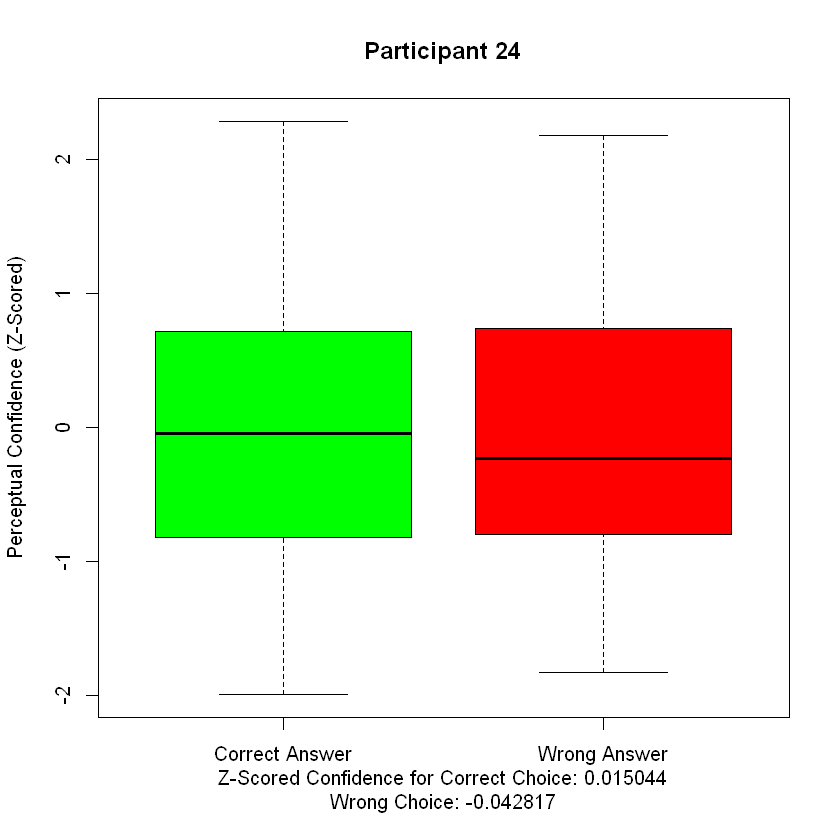

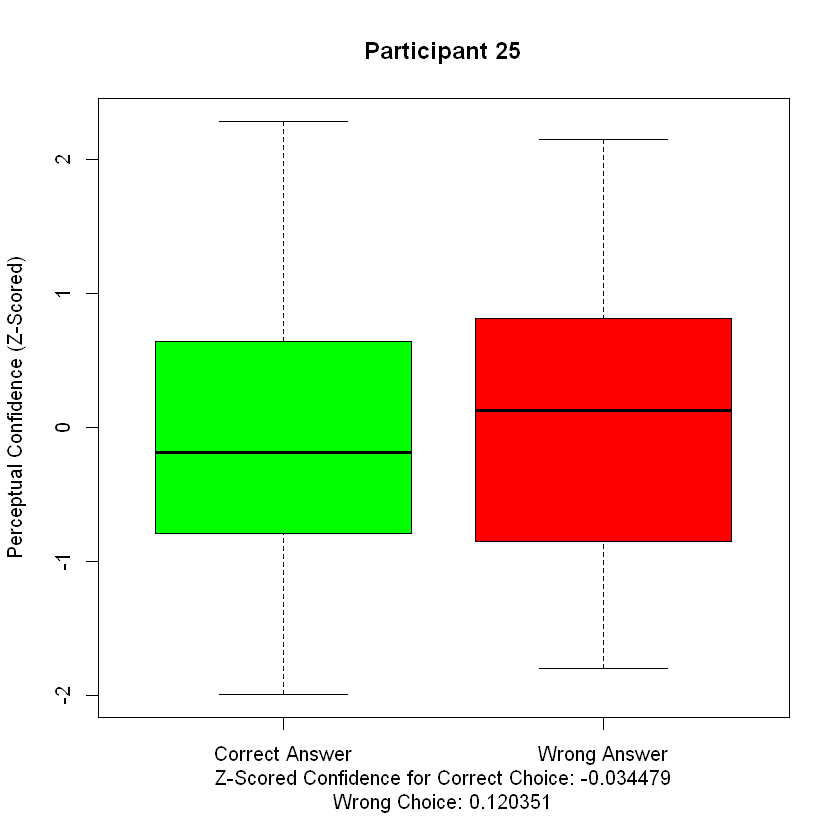

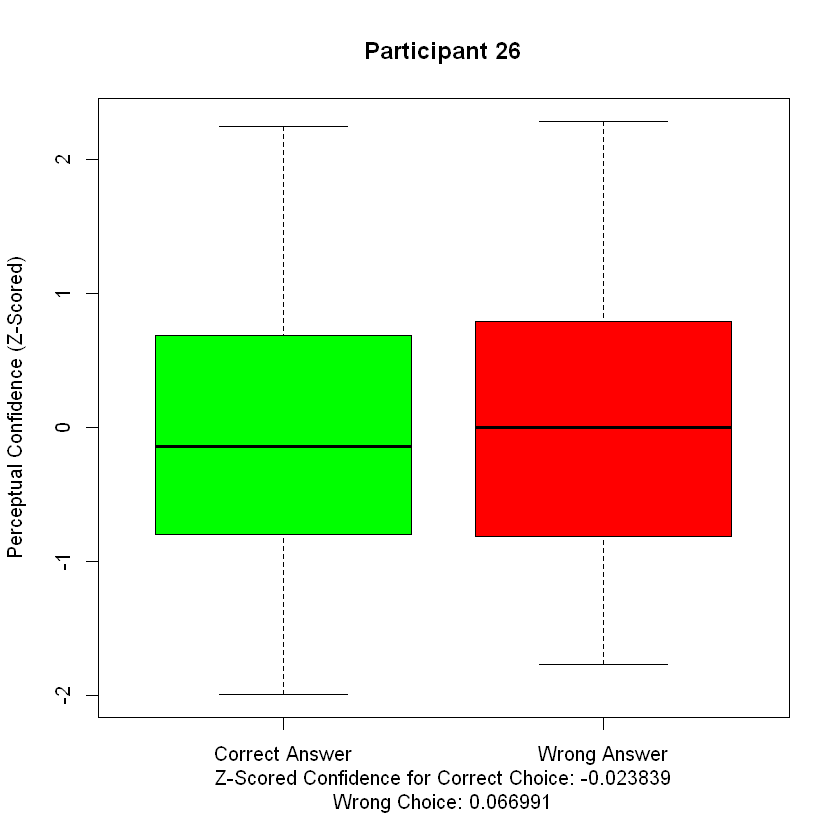

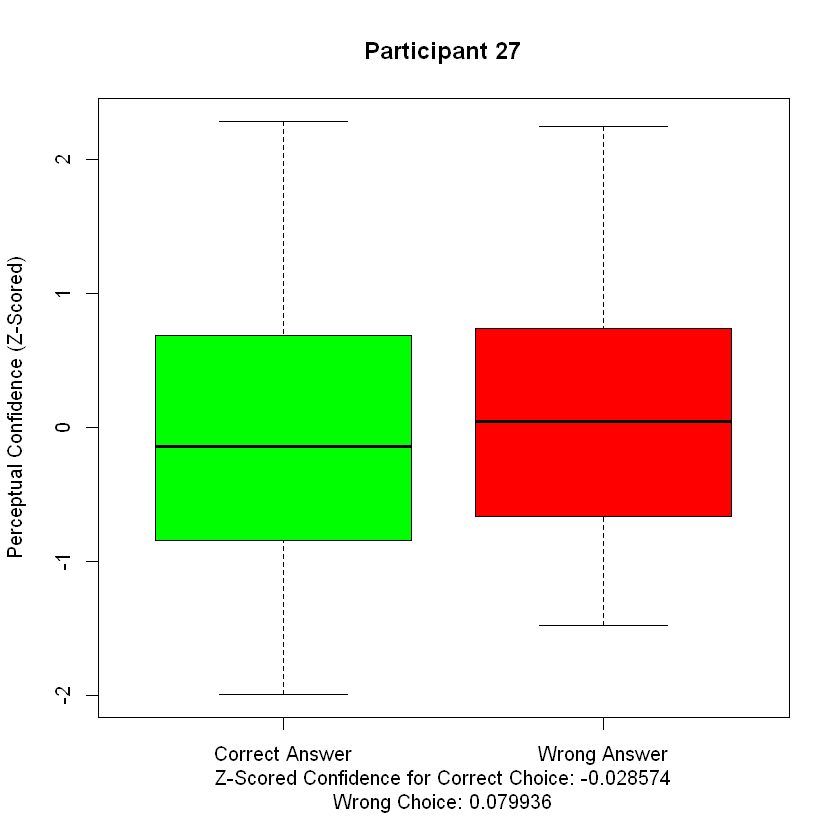

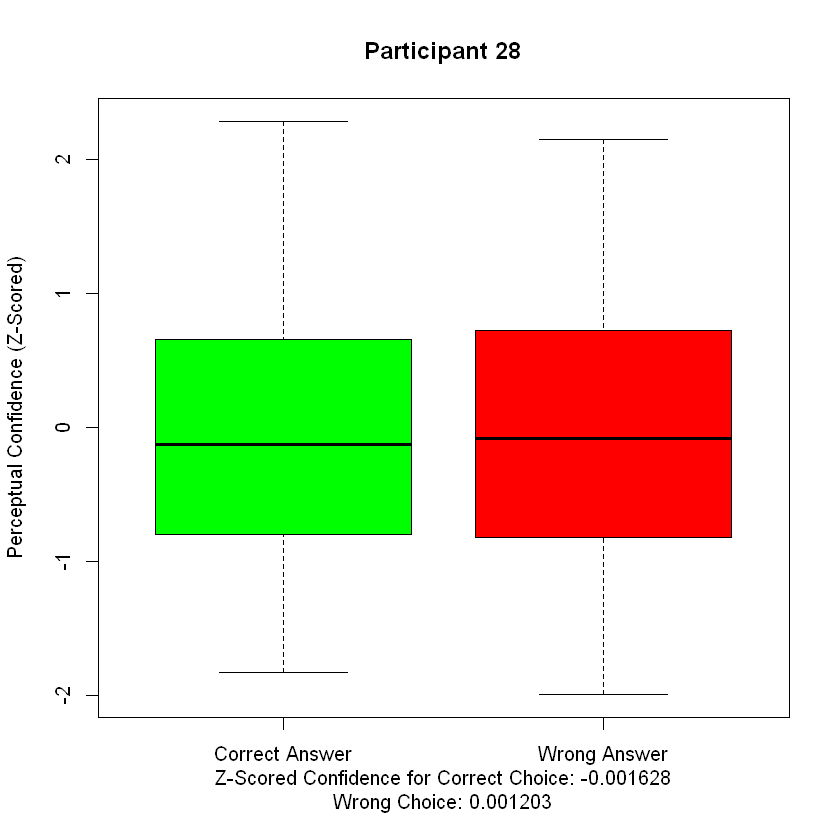

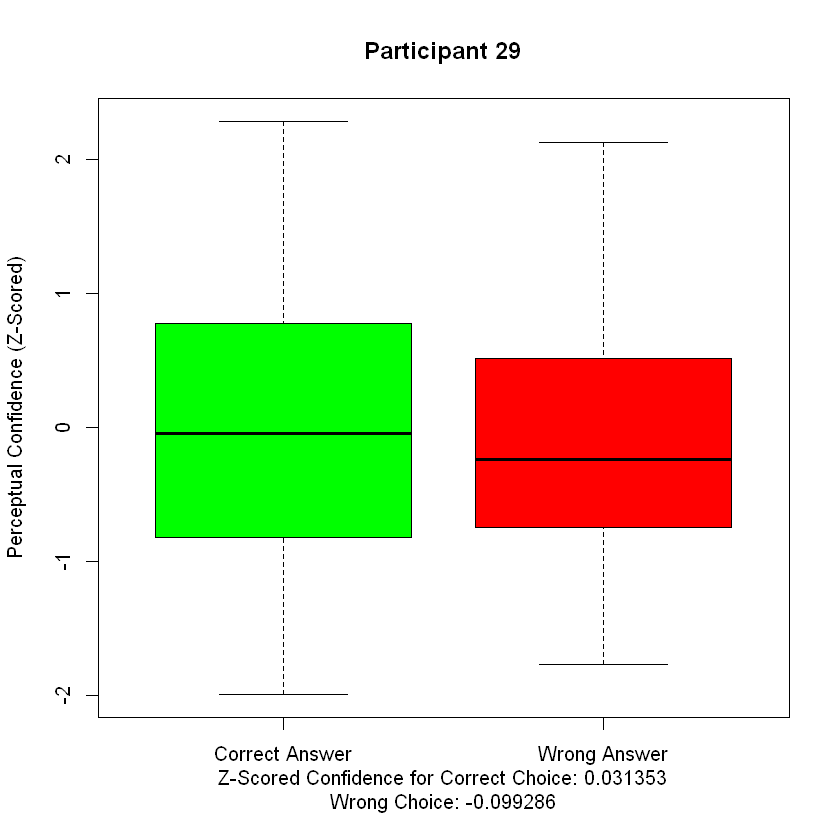

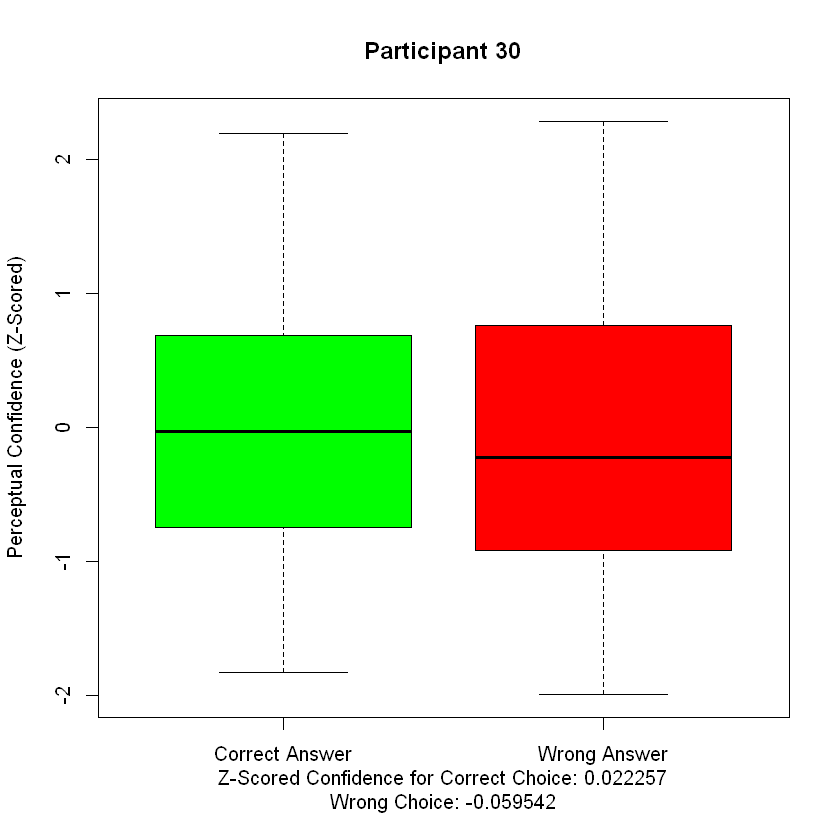

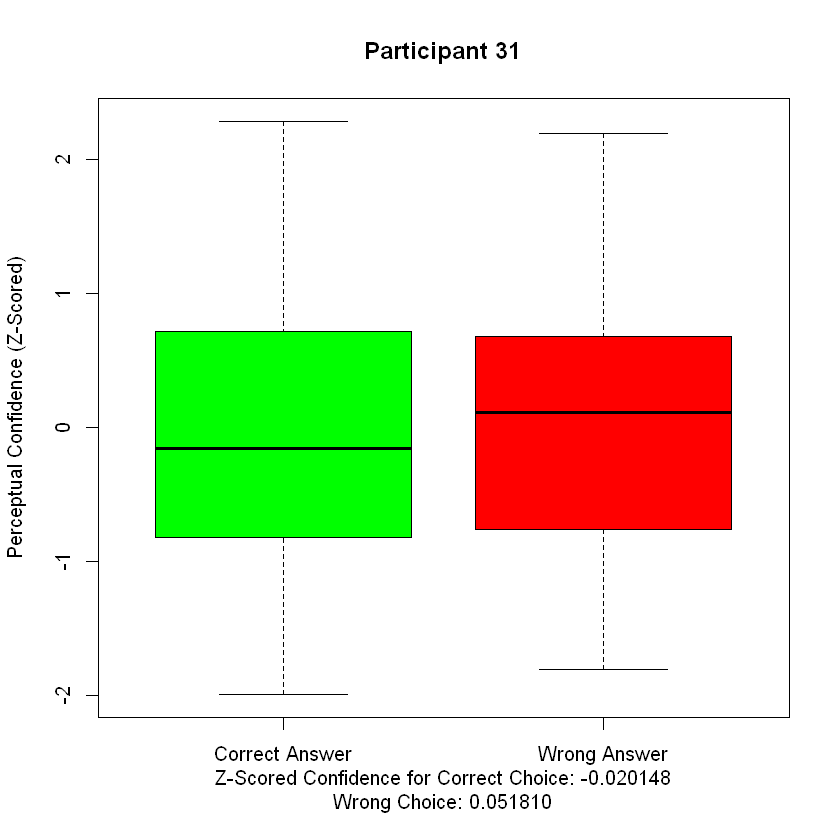

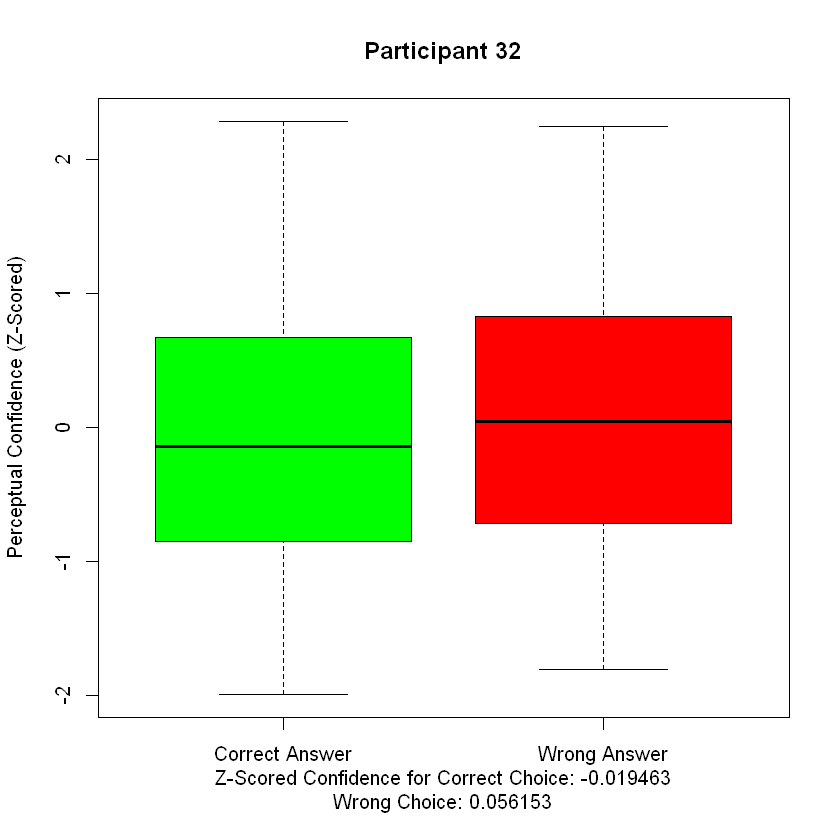

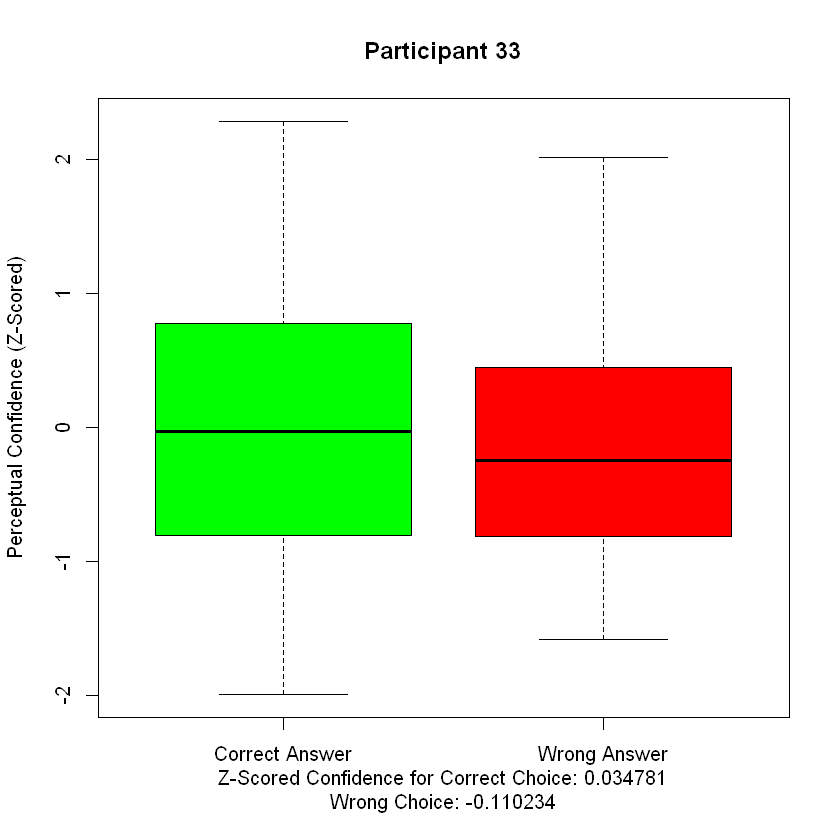

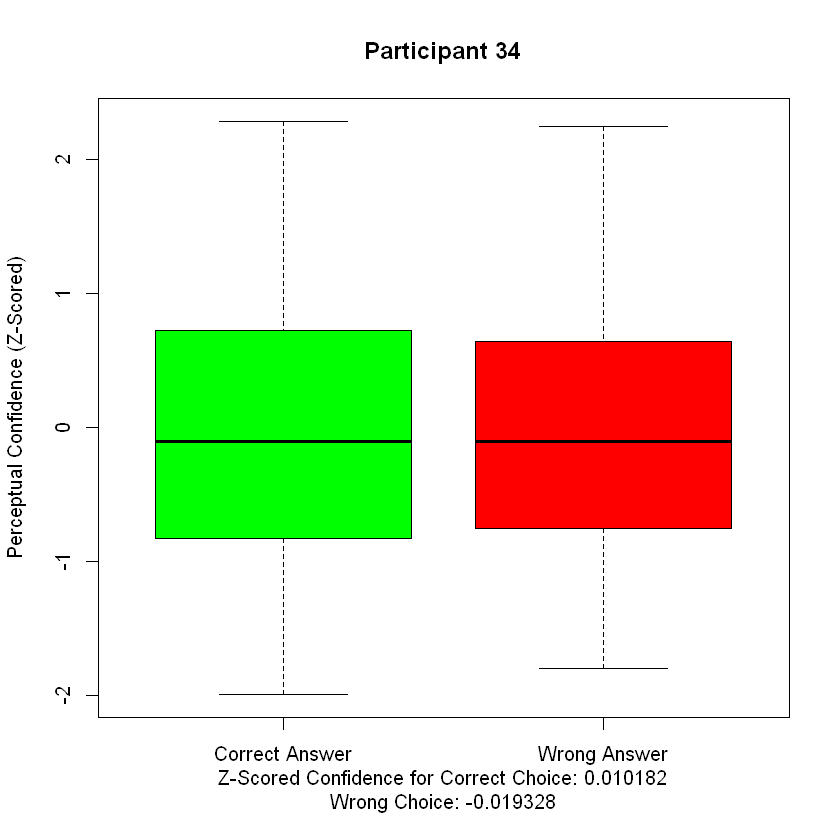

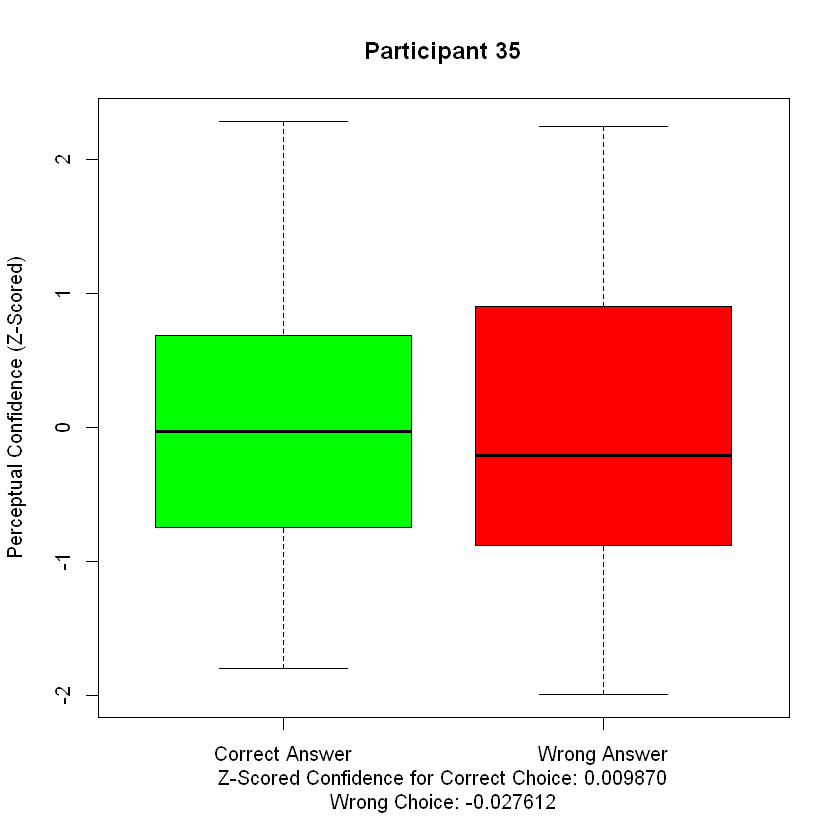

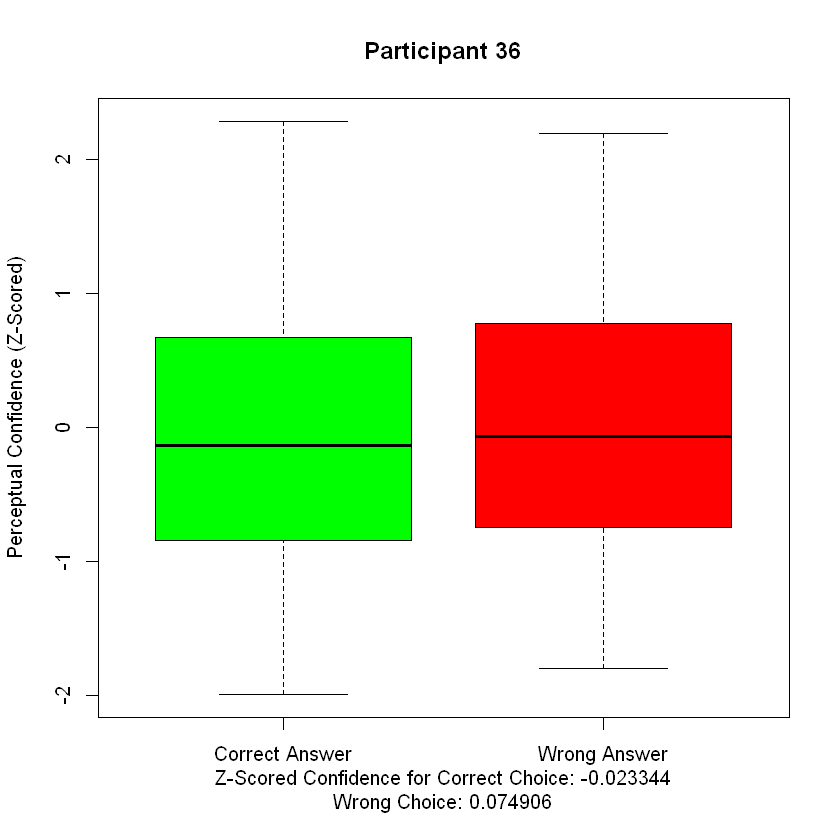

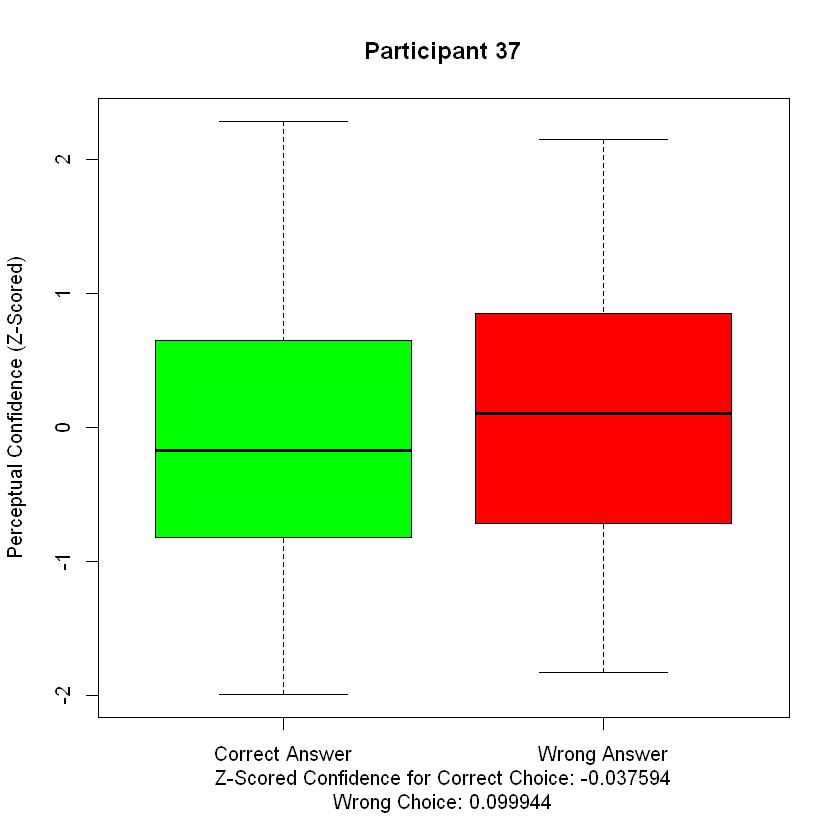

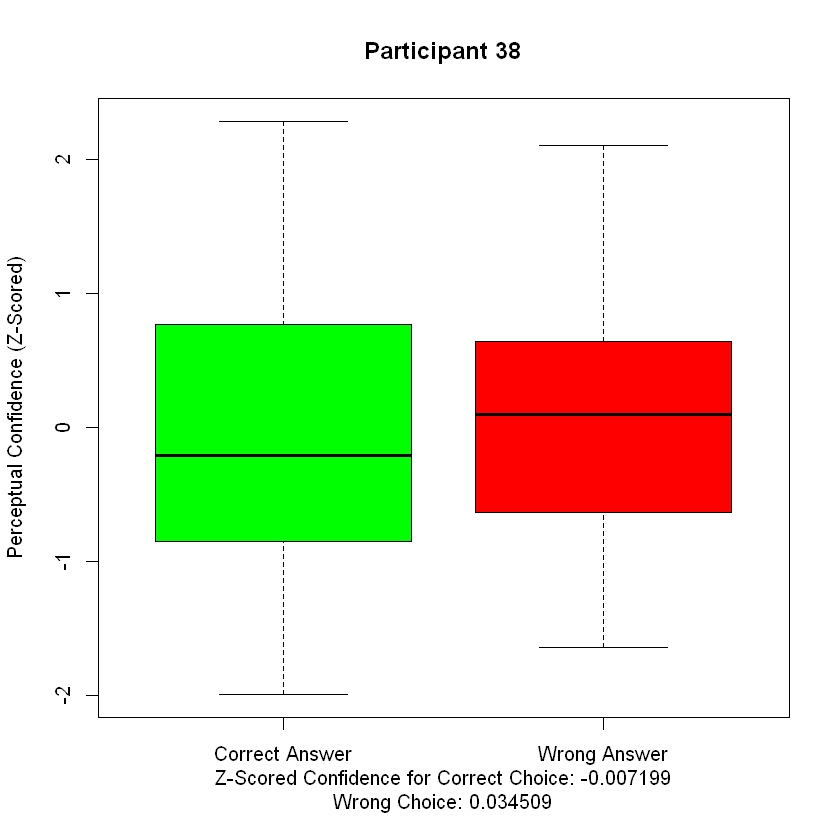

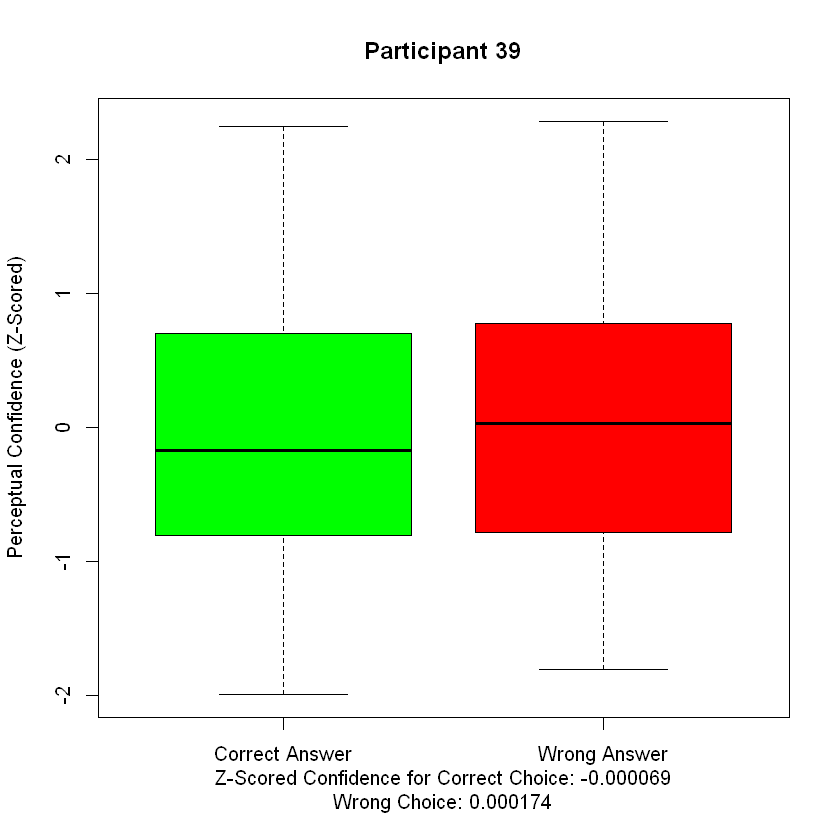

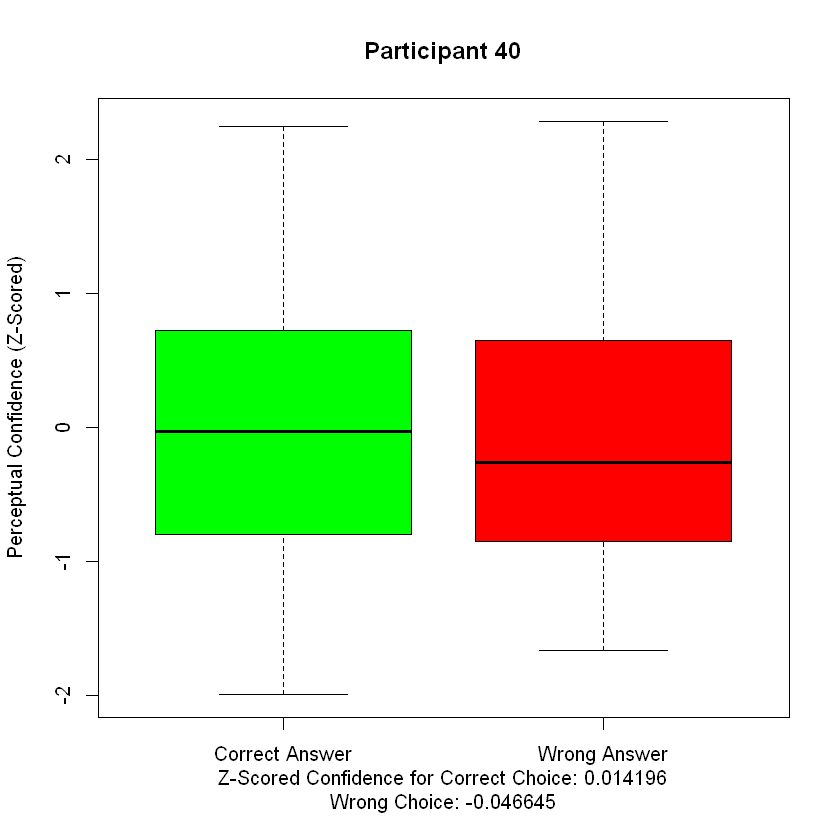

In [44]:
i <- 1
while(i<=40){
    
        a <- mean(dat$z_P_Conf[which(dat$Dot_CorrAns[dat$participant==i]==1)])
        b <- mean(dat$z_P_Conf[which(dat$Dot_CorrAns[dat$participant==i]==0)])

        boxplot(dat$z_P_Conf[which(dat$Dot_CorrAns[dat$participant==i]==1)],dat$z_P_Conf[which(dat$Dot_CorrAns[dat$participant==i]==0)] , 
            data=dat, col = c('green', 'red'), main = sprintf("Participant %s", i), ylab= 'Perceptual Confidence (Z-Scored)', 
            names = c('Correct Answer', 'Wrong Answer'), xlab= sprintf('Z-Scored Confidence for Correct Choice: %f\nWrong Choice: %f', a, b))
        i <- i + 1
}

<a id='perceptual_reg'></a>

# Participantwise Parameter Estimates for Perceptual Confidence to Predict Perceptual Outcome

Hierarchical regression to Predict Correct Answer at Perceptual Task by Perceptual Confindence

In [66]:
fit_log_p <- glmer(Dot_CorrAns ~ 1 + z_V_Conf + z_P_Conf + z_V_Rt + z_P_Rt + (1 +z_V_Conf + z_P_Conf + z_P_Rt + z_V_Rt|participant),
                data=dat, family = binomial(link="logit"))

pc <- ranef(fit_log_p)$participant[, "z_P_Conf"] + fixef(fit_log_p)[3]
z_pc <- (pc- mean(pc)) / sd(pc)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 2 negative eigenvalues"

In [73]:
sprintf("Participant %s is 3 standard deviation away with a z-scored perceptual confidence estimate of %.2f", which(z_pc>3 | z_pc < -3), z_pc[13])

[1] "Participant 13 is 3 standard deviation away with a z-scored perceptual confidence estimate of 3.37"

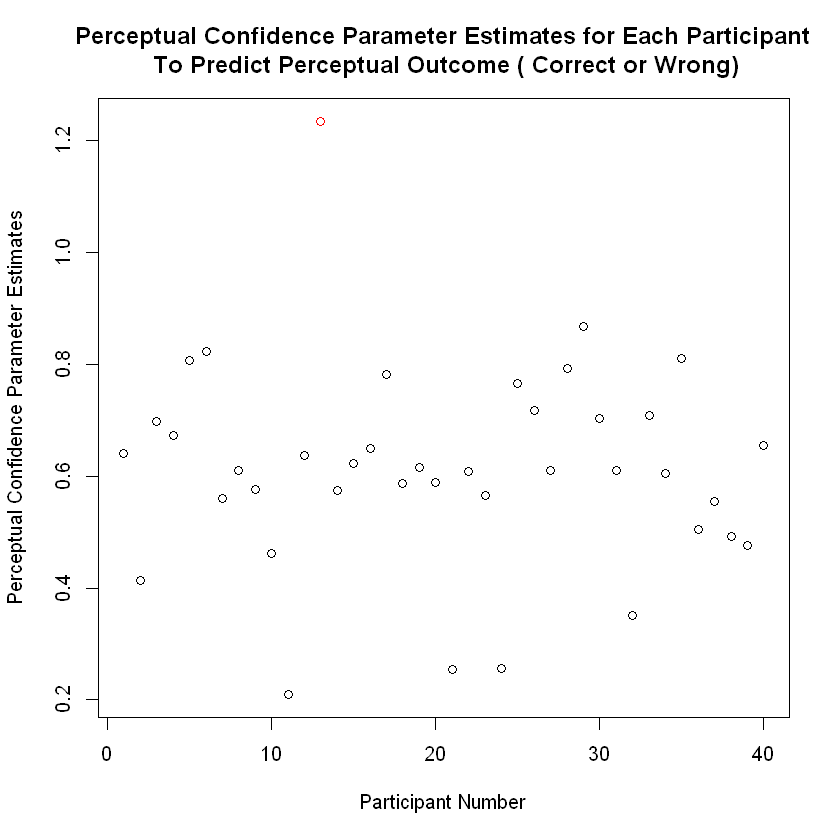

In [104]:
plot(seq(1,40), pc, xlab= c('Participant Number'), ylab = c('Perceptual Confidence Parameter Estimates'), col = ifelse(pc>1.2, 'red', 'black'), main = 'Perceptual Confidence Parameter Estimates for Each Participant\n To Predict Perceptual Outcome ( Correct or Wrong)')

Participant 13 is an outlier (the one which is colored red) and therefore will be eliminated. Other than that all participants have higher confidence when their answers are correct.

# [Back to Content](#content)

<a id='prtpc'></a>

# Relationship Between Perceptual Response Time and Perceptual Confidence

Boxplots to show Raw Perceptual Confidence when response time is fast (green) or slow(red)

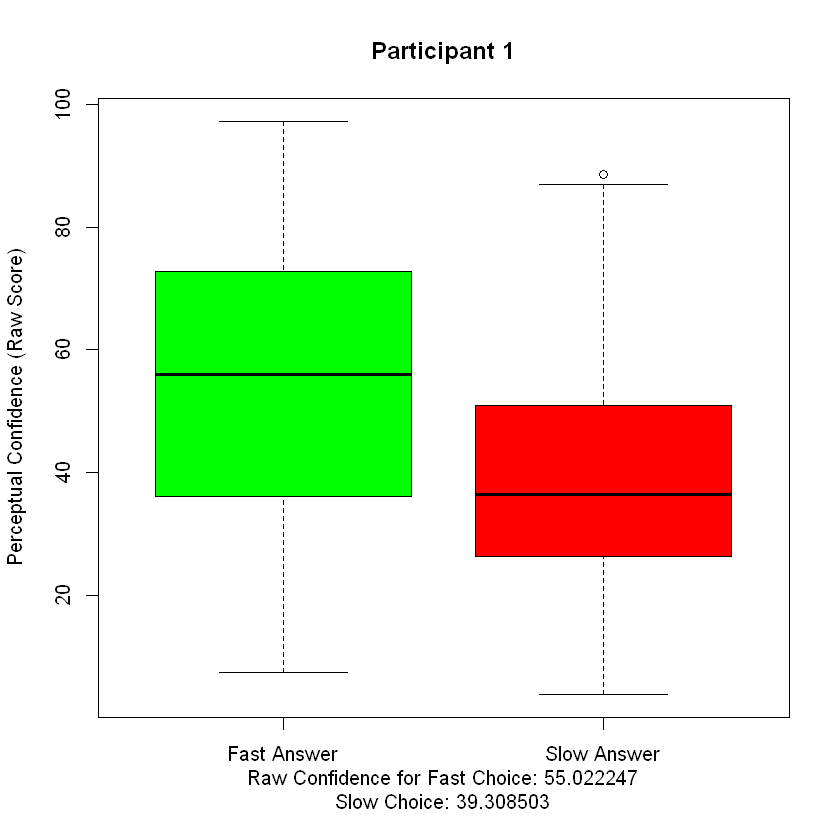

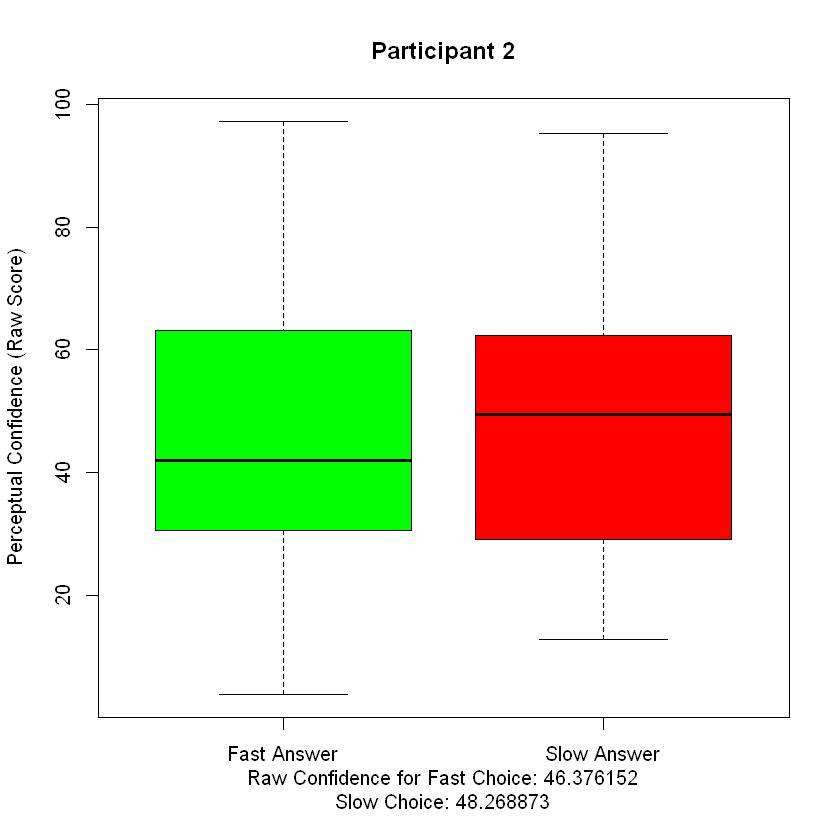

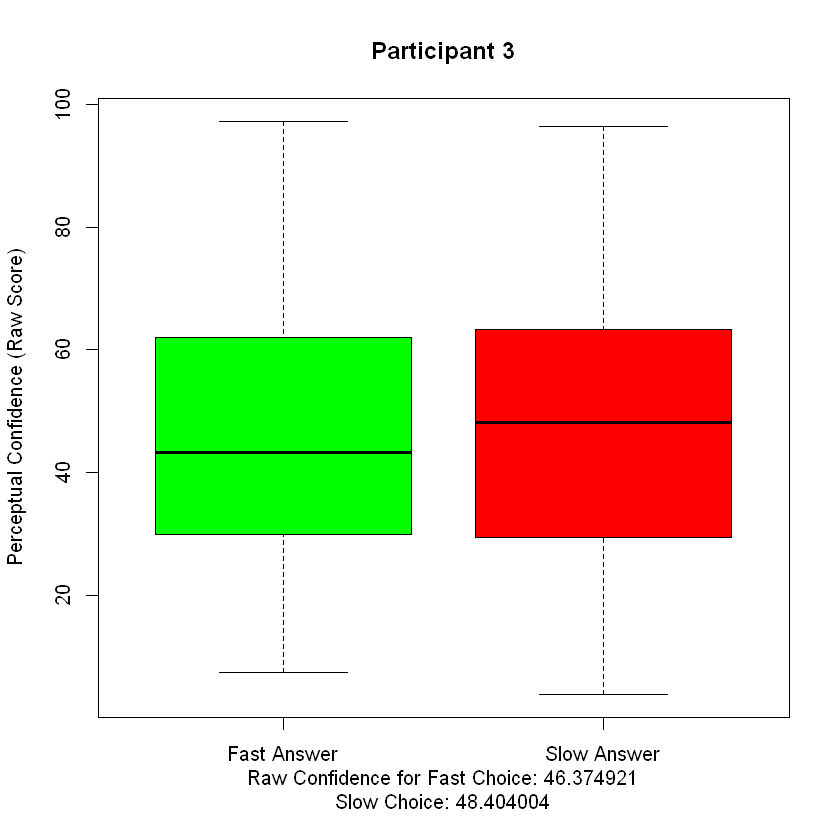

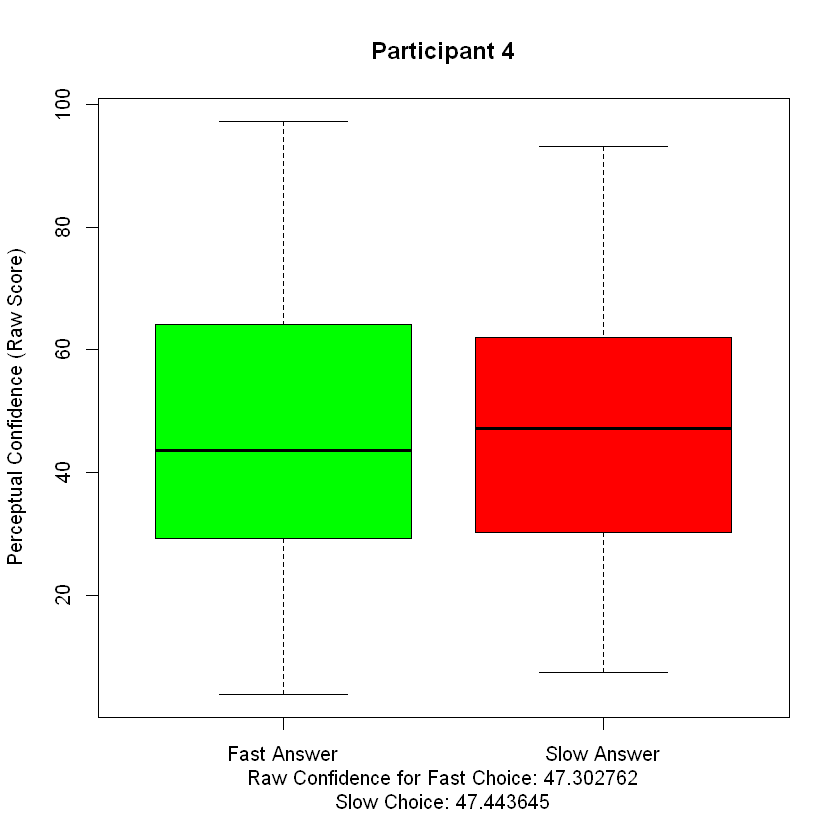

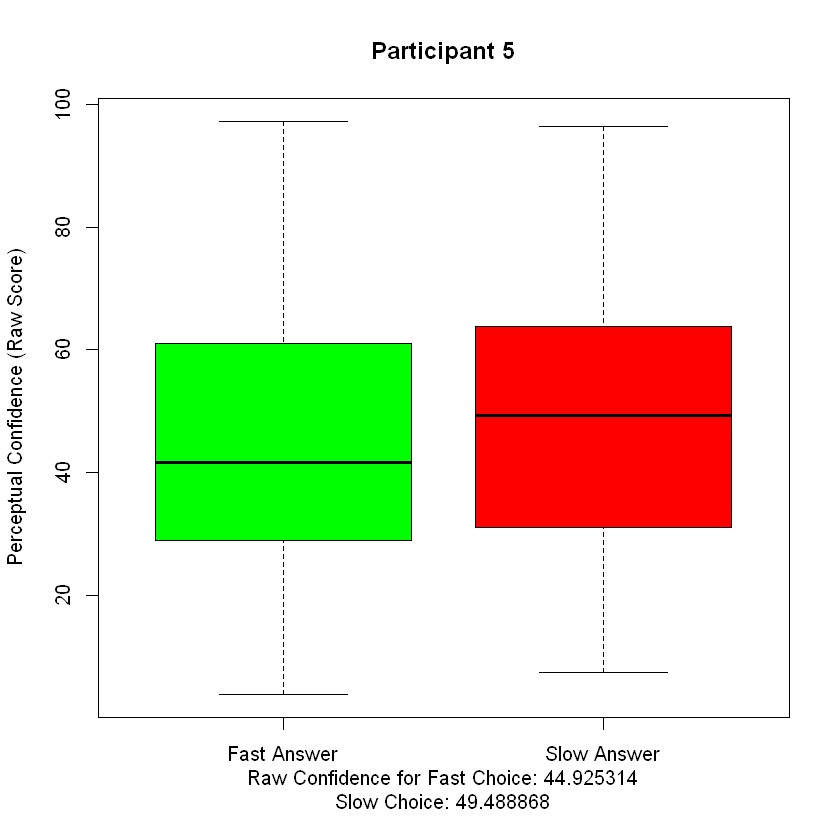

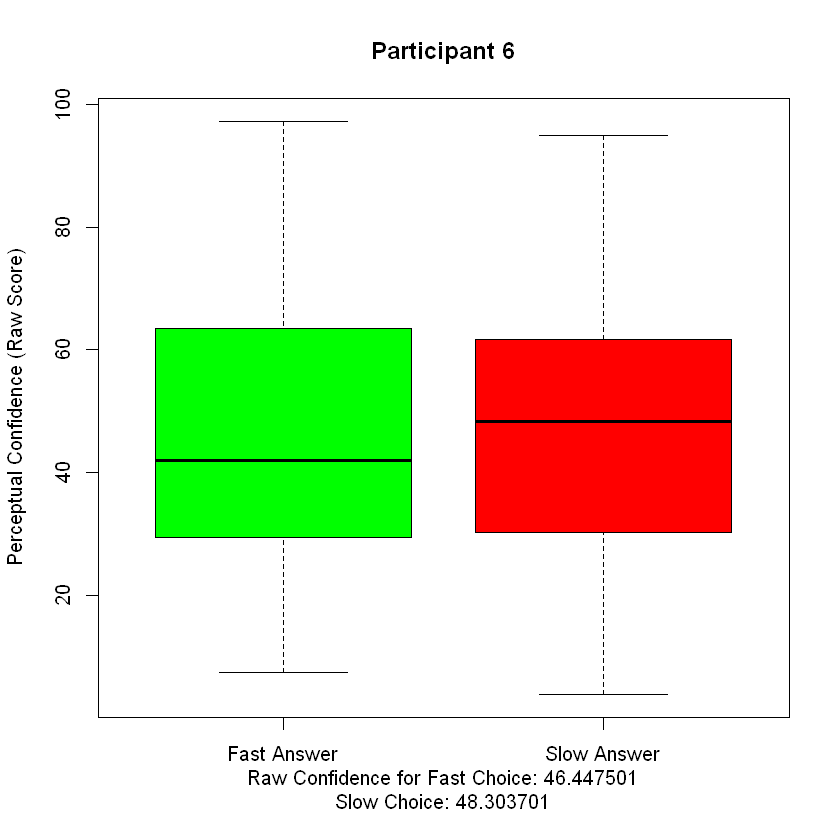

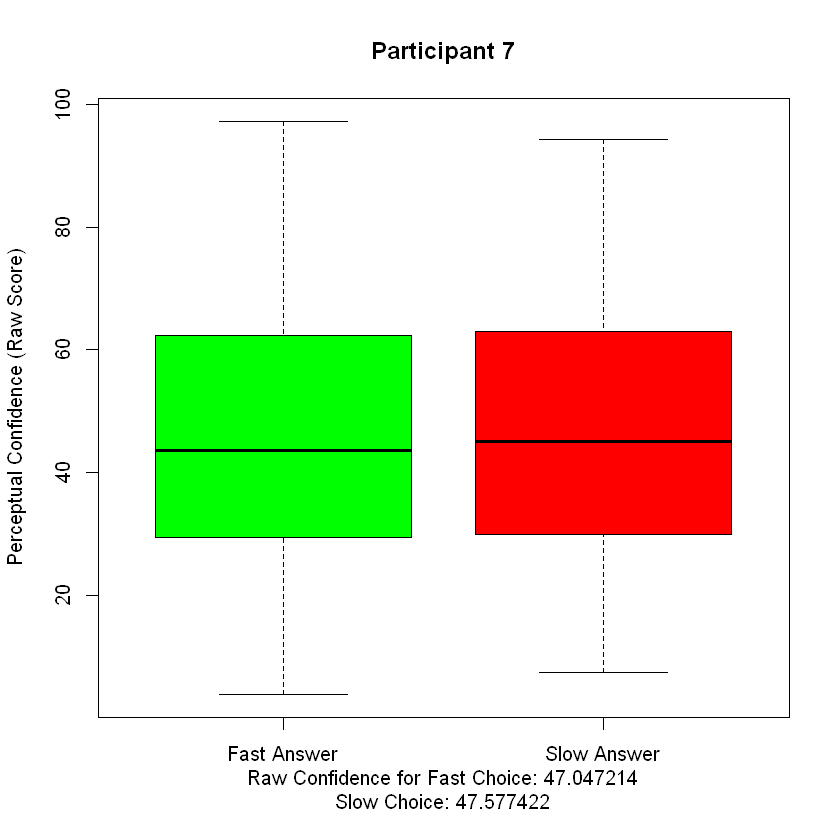

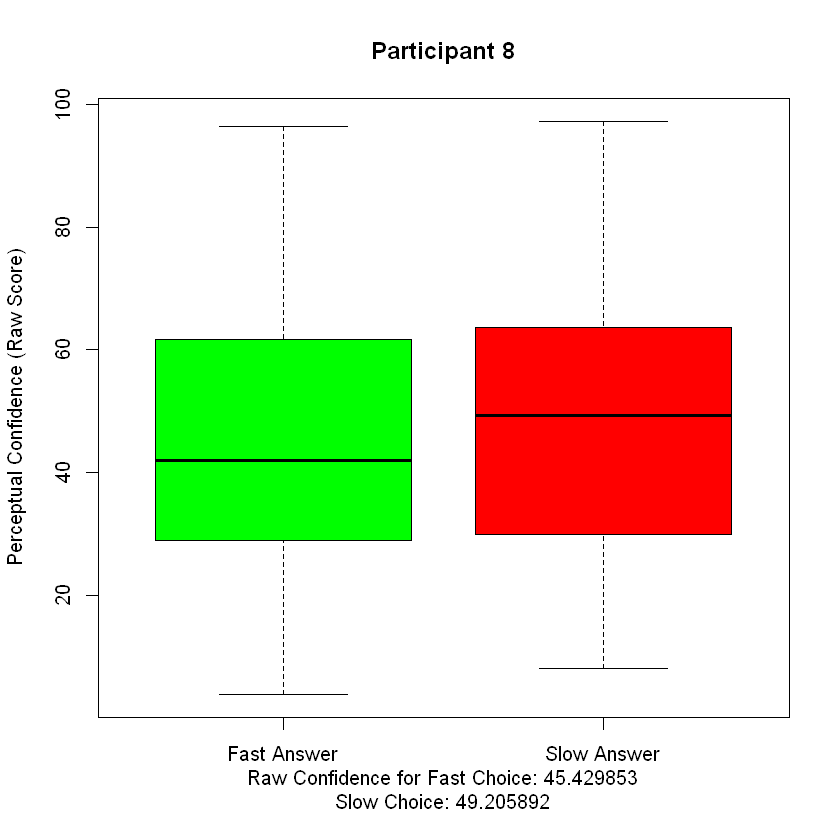

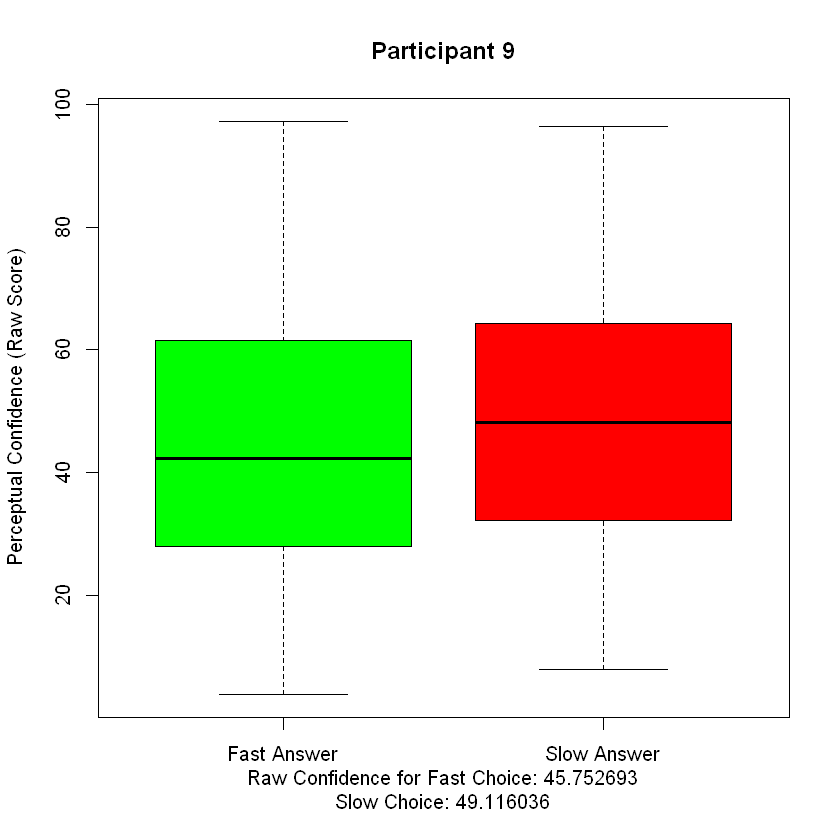

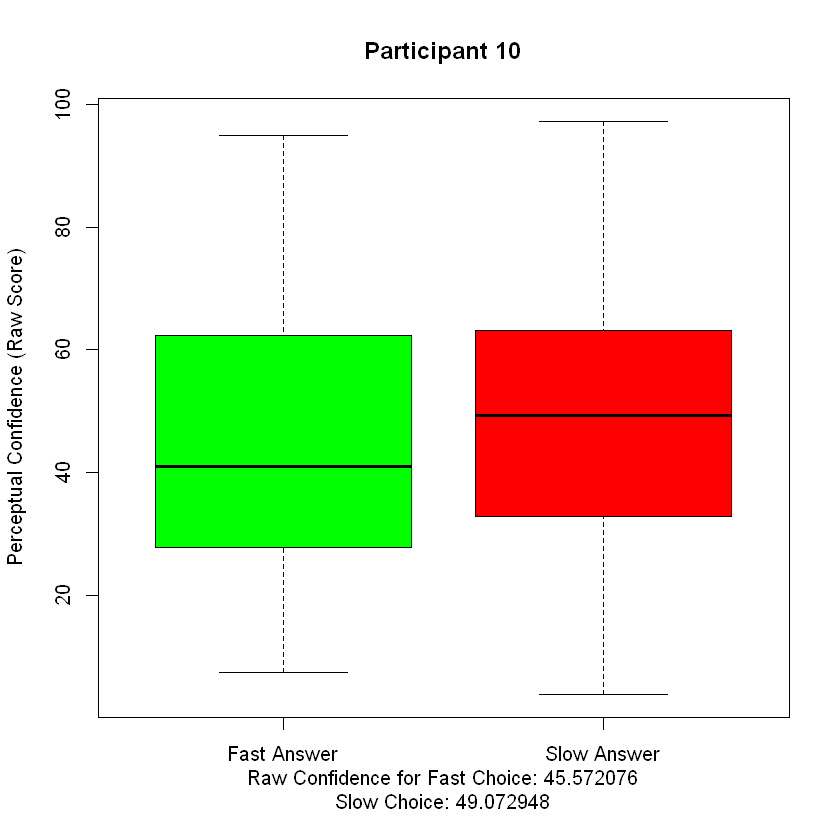

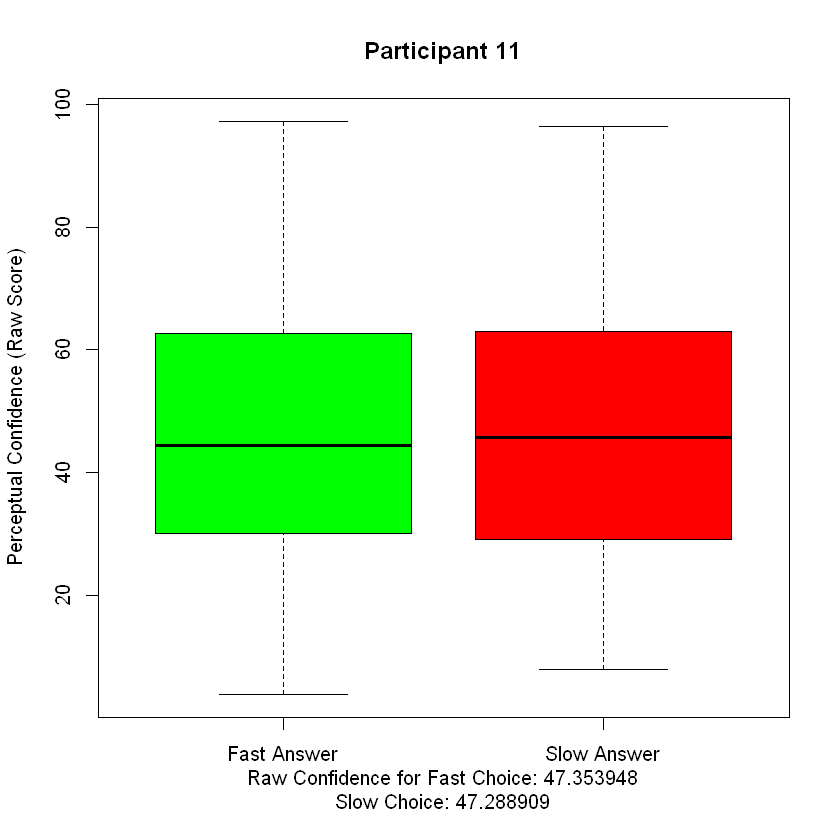

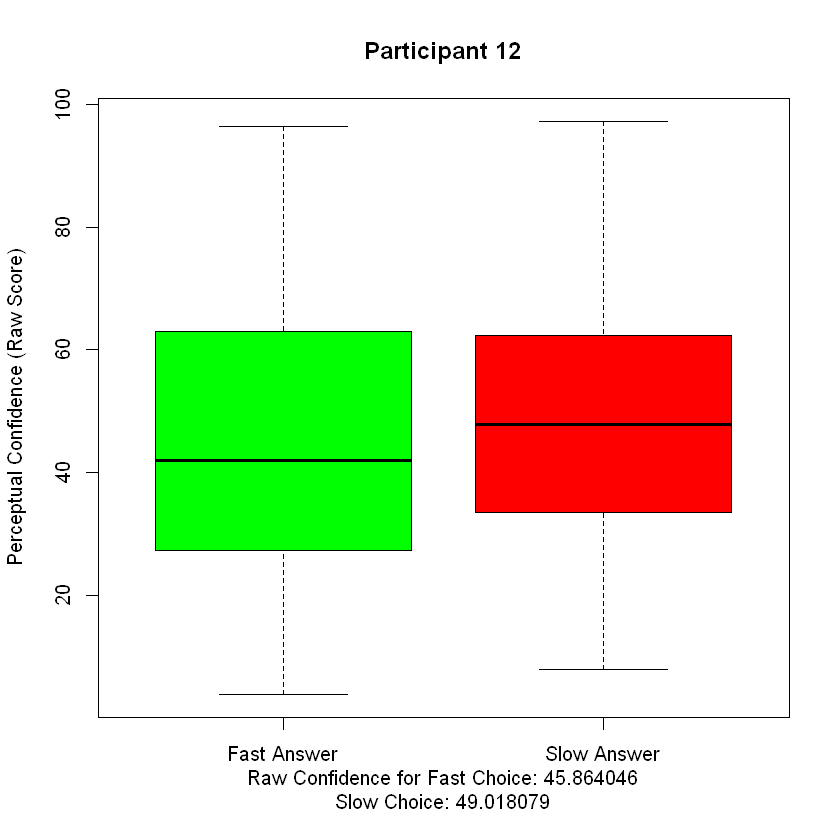

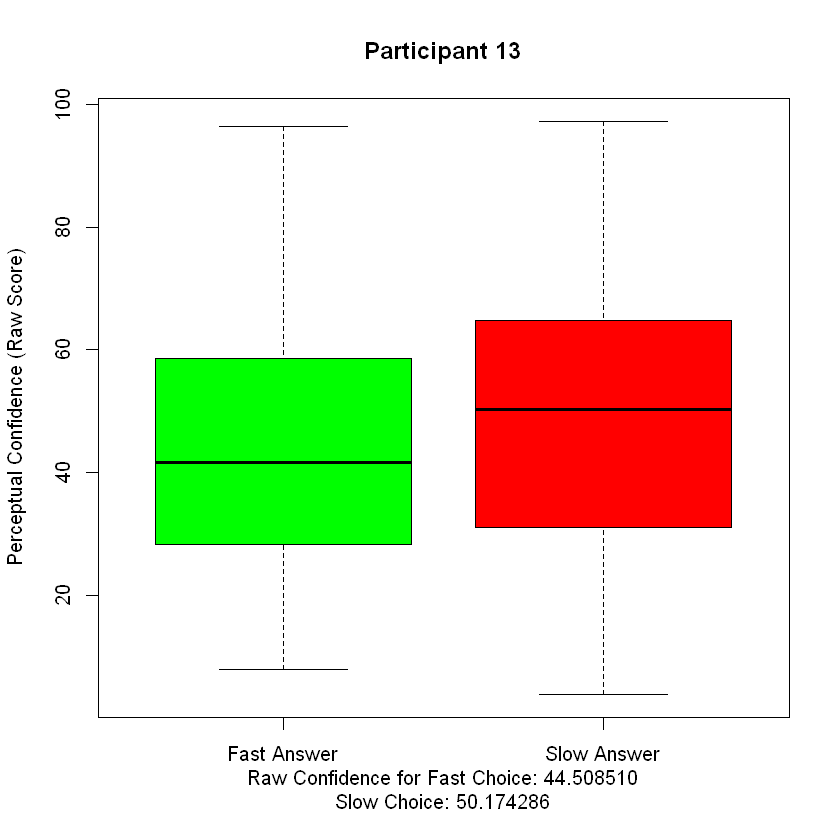

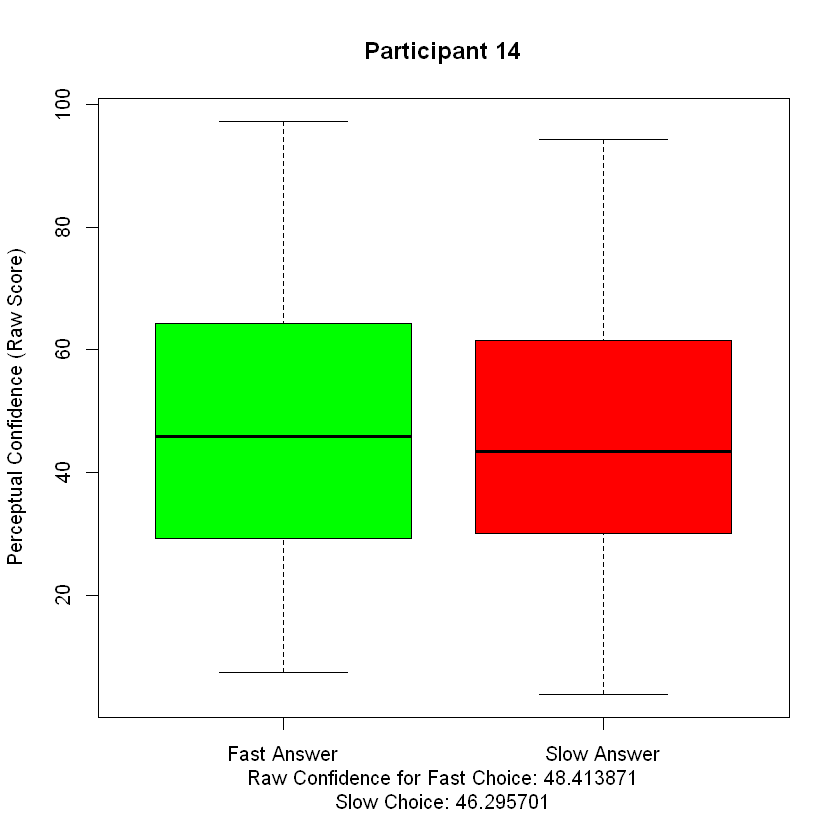

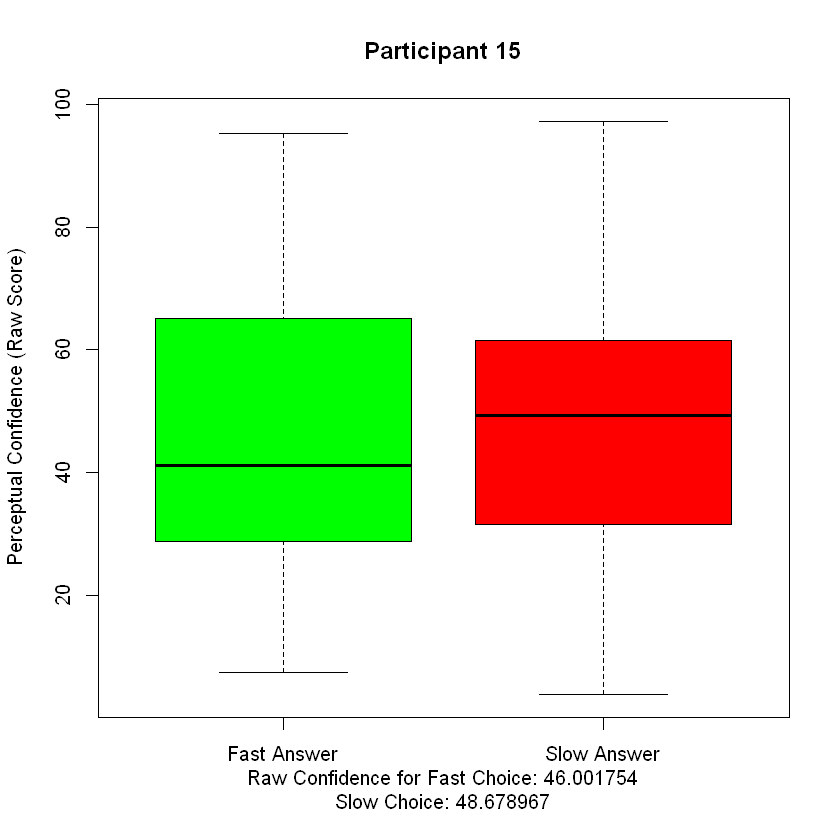

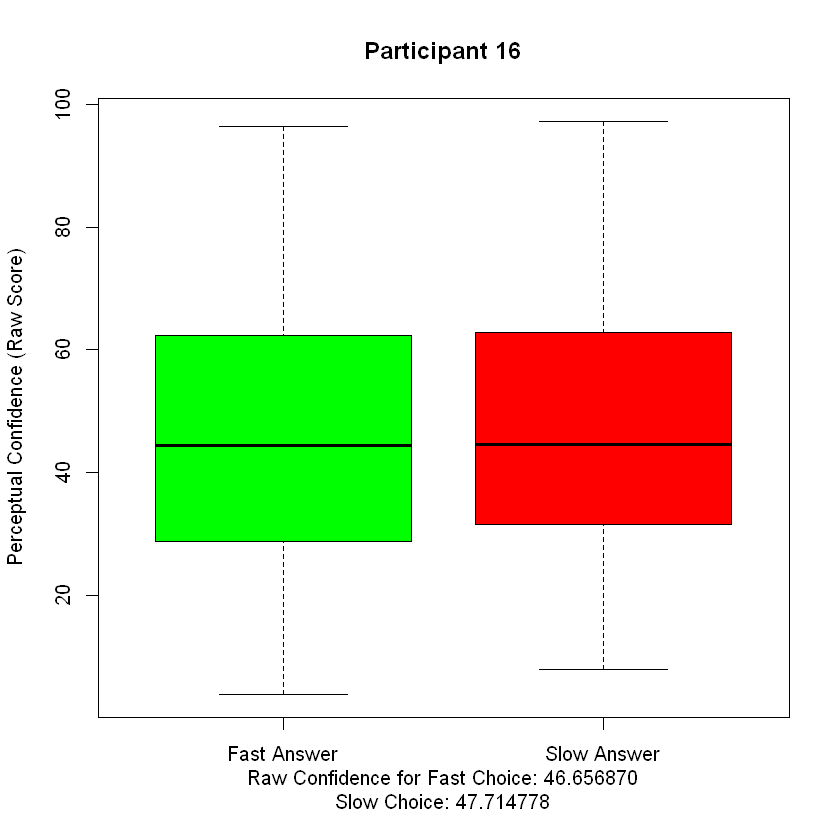

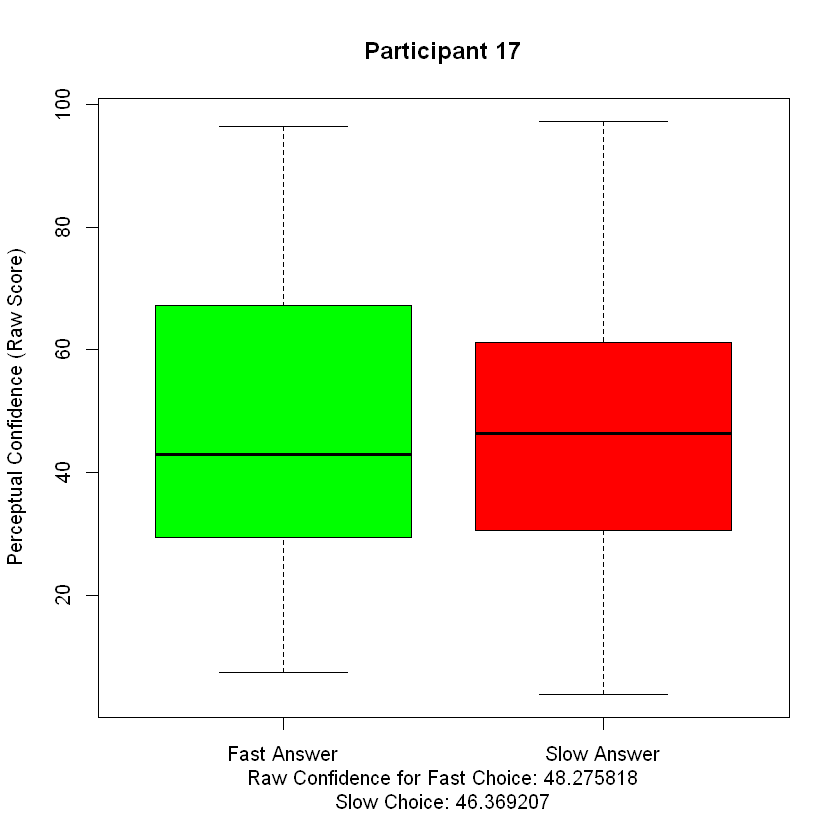

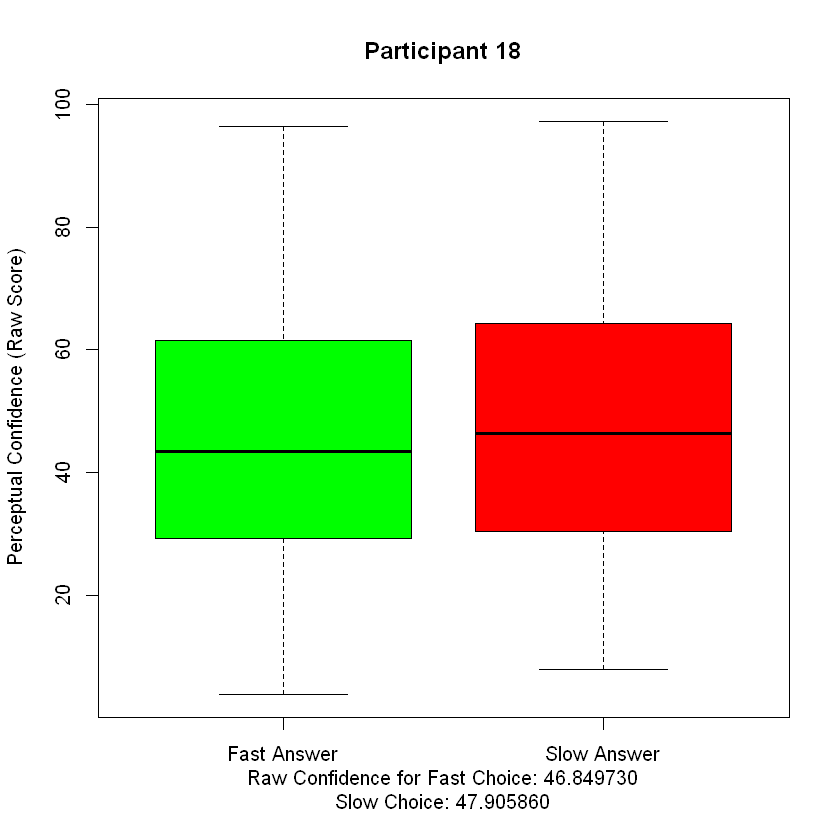

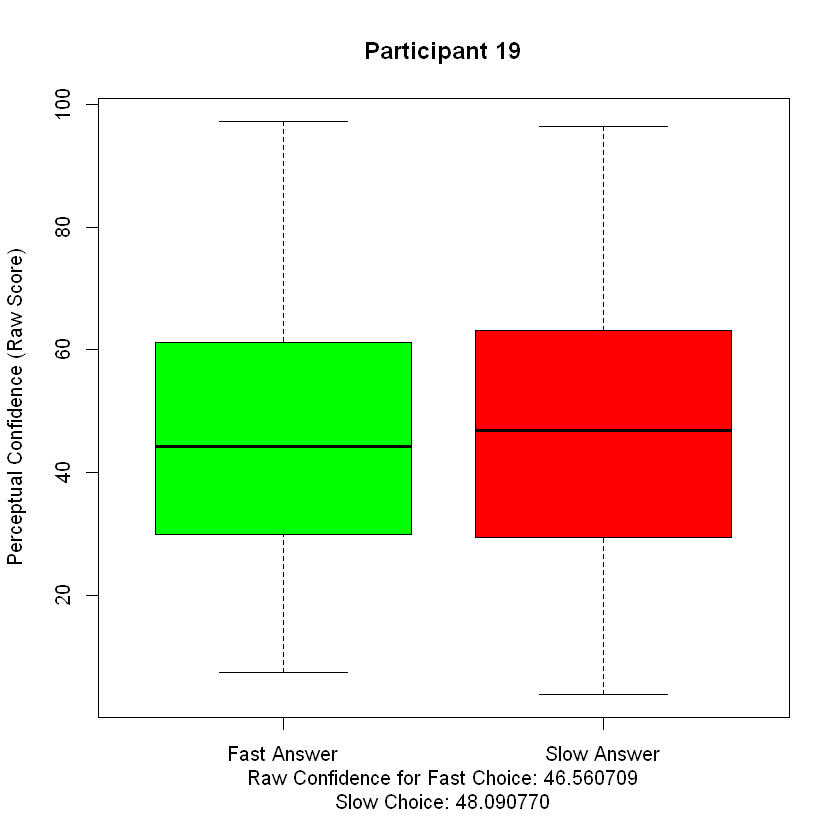

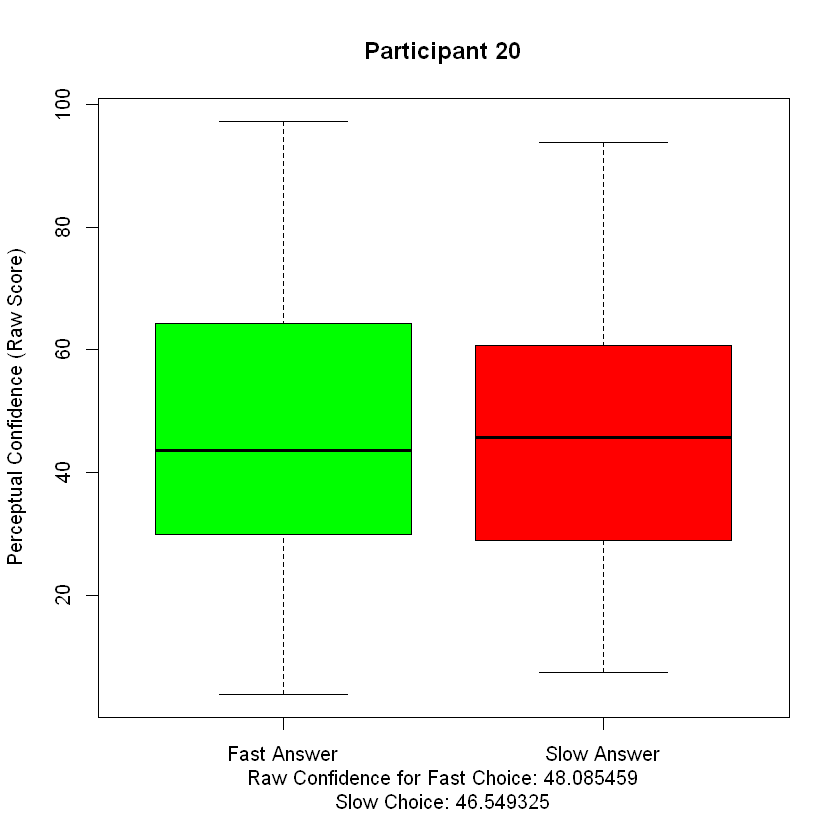

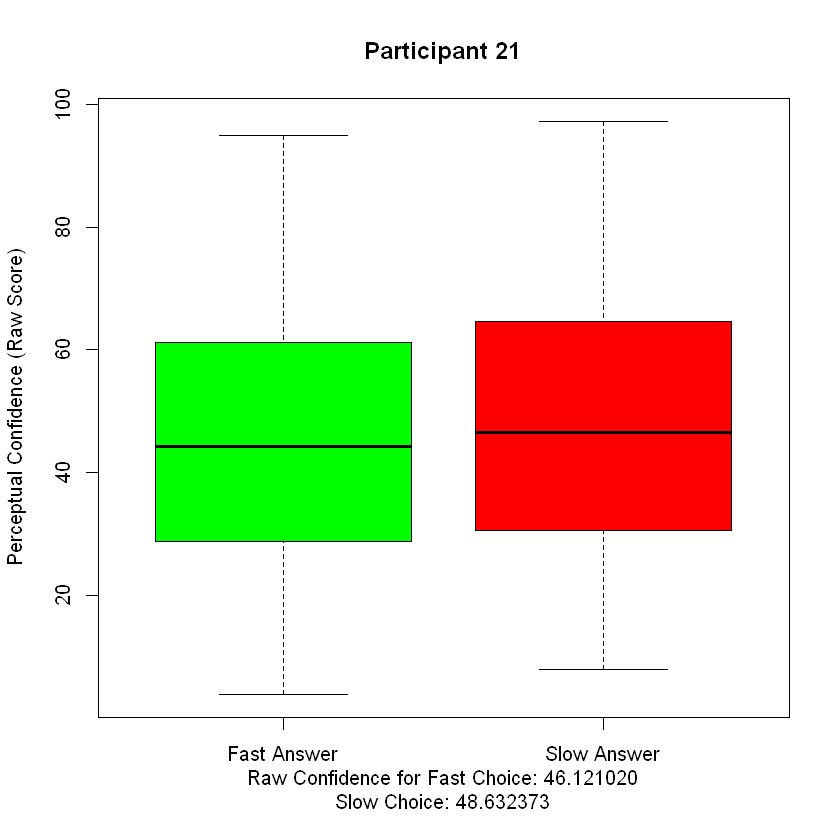

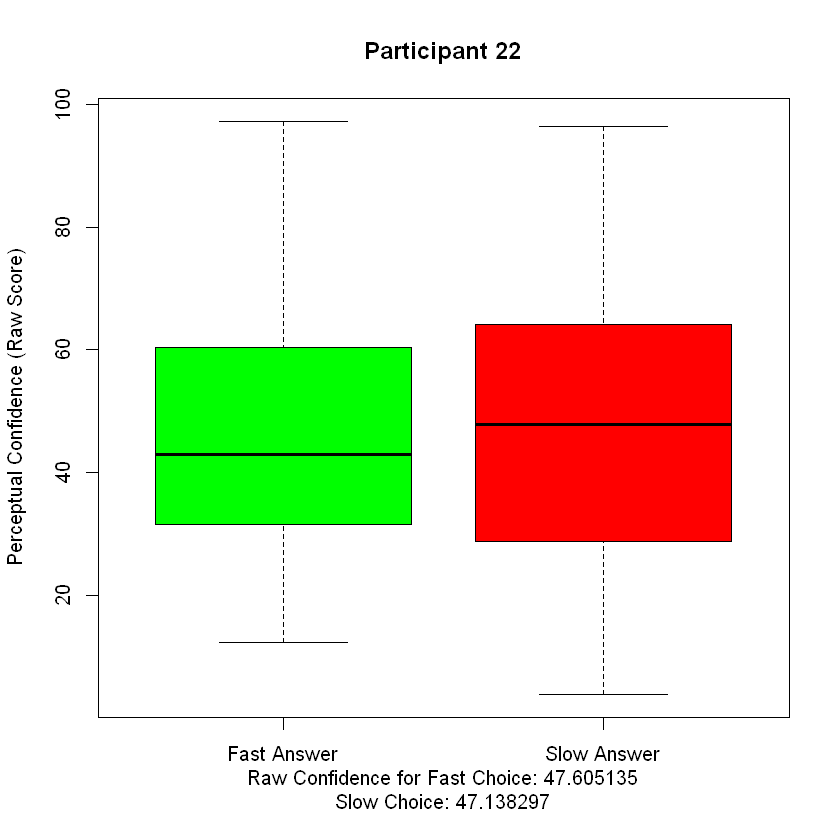

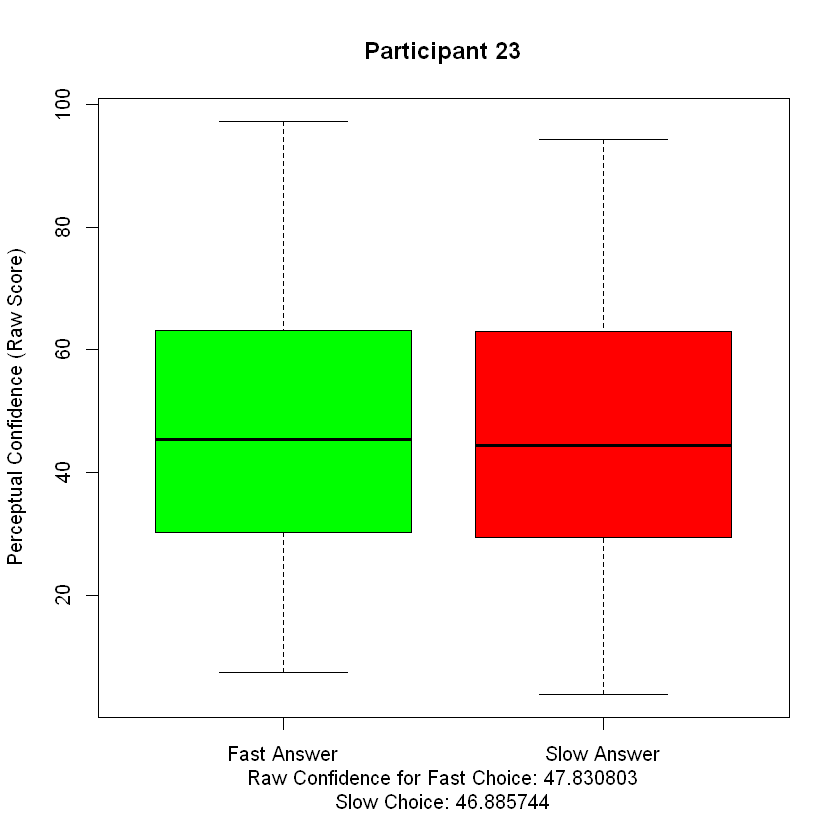

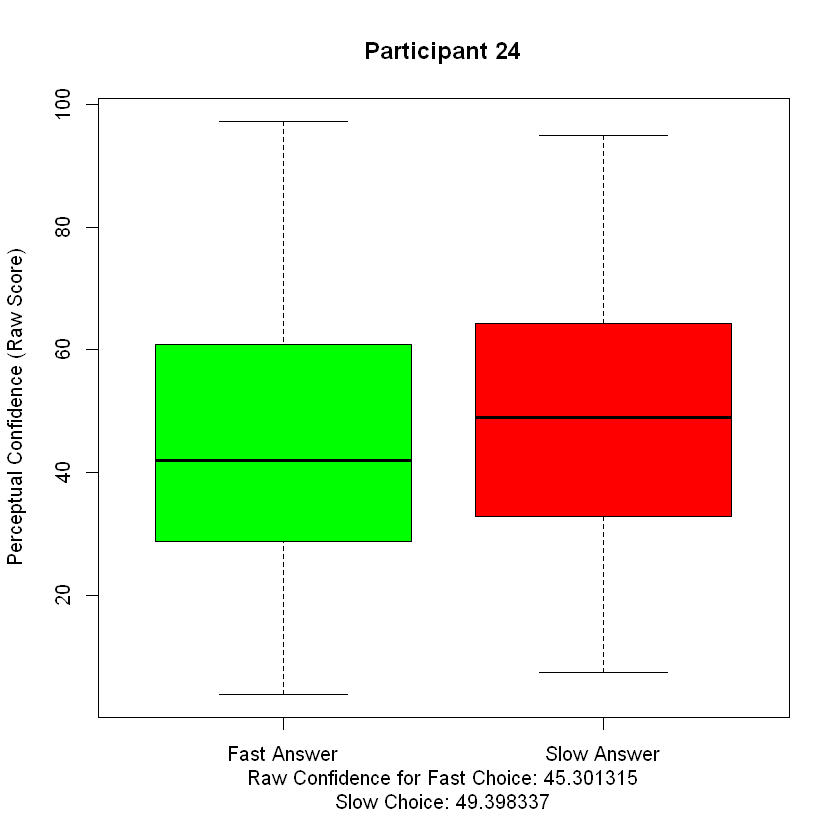

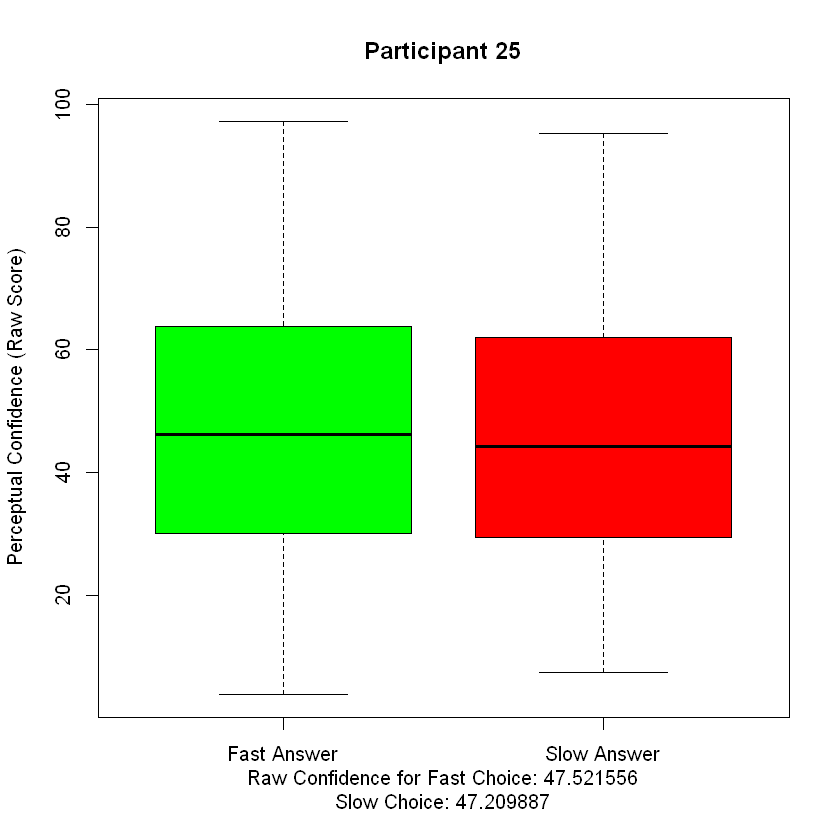

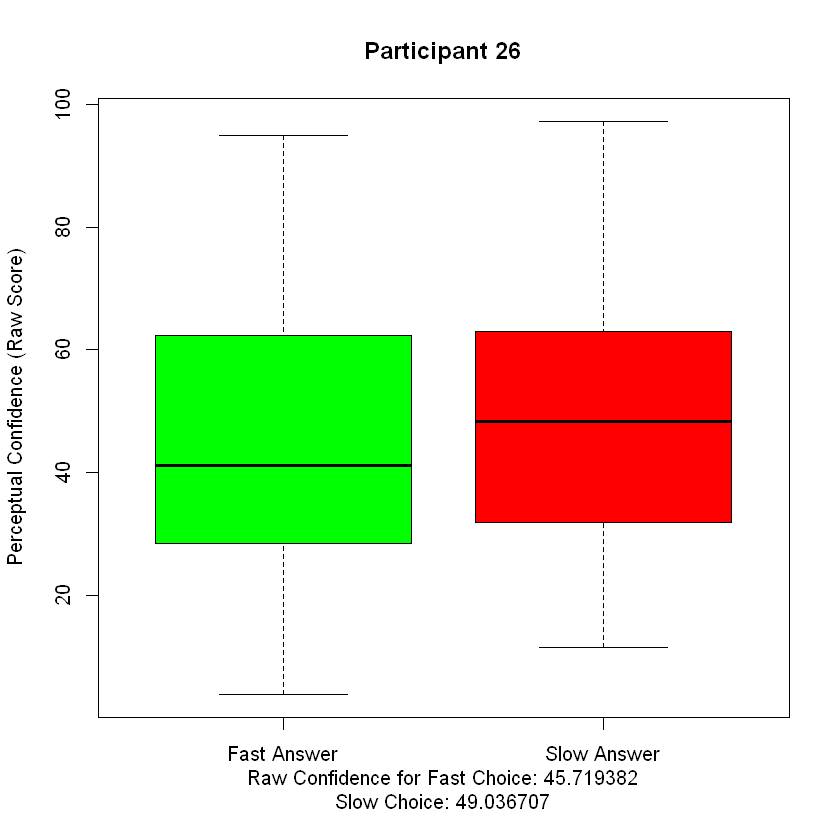

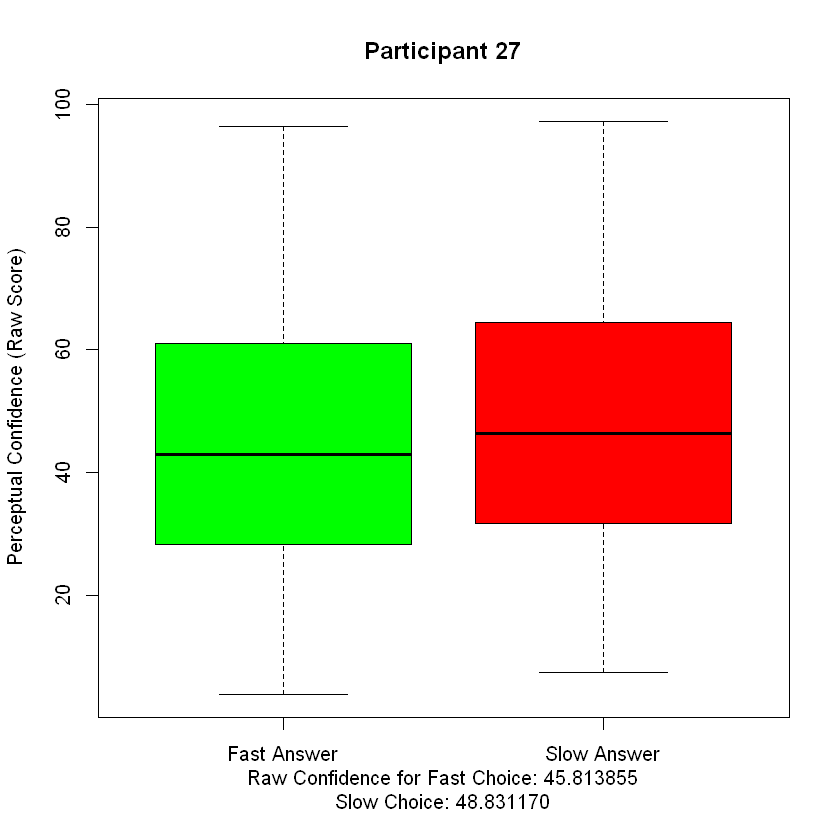

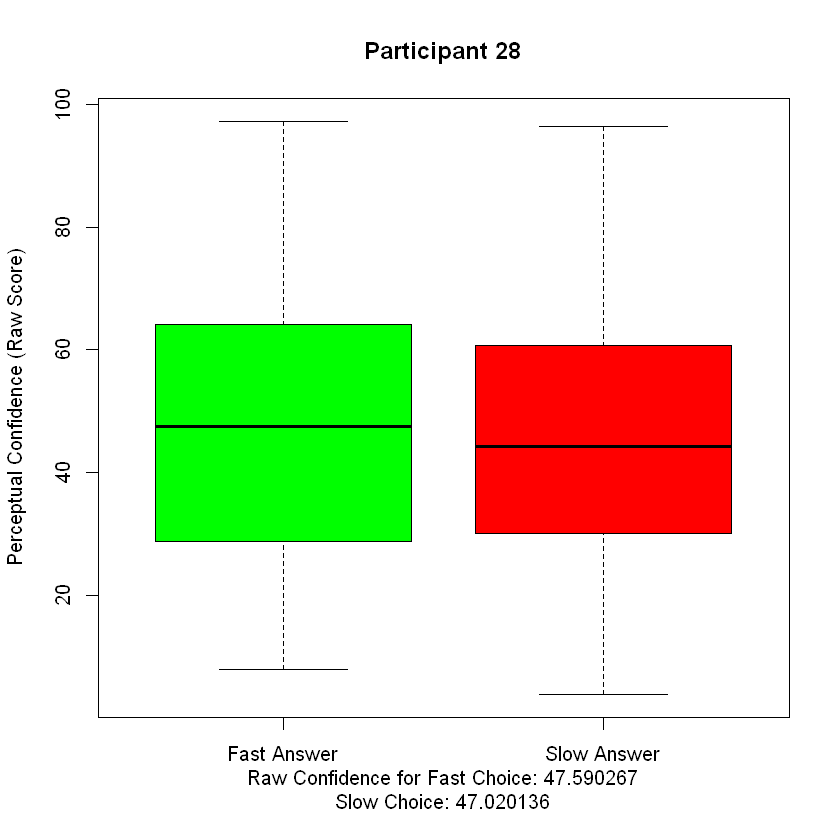

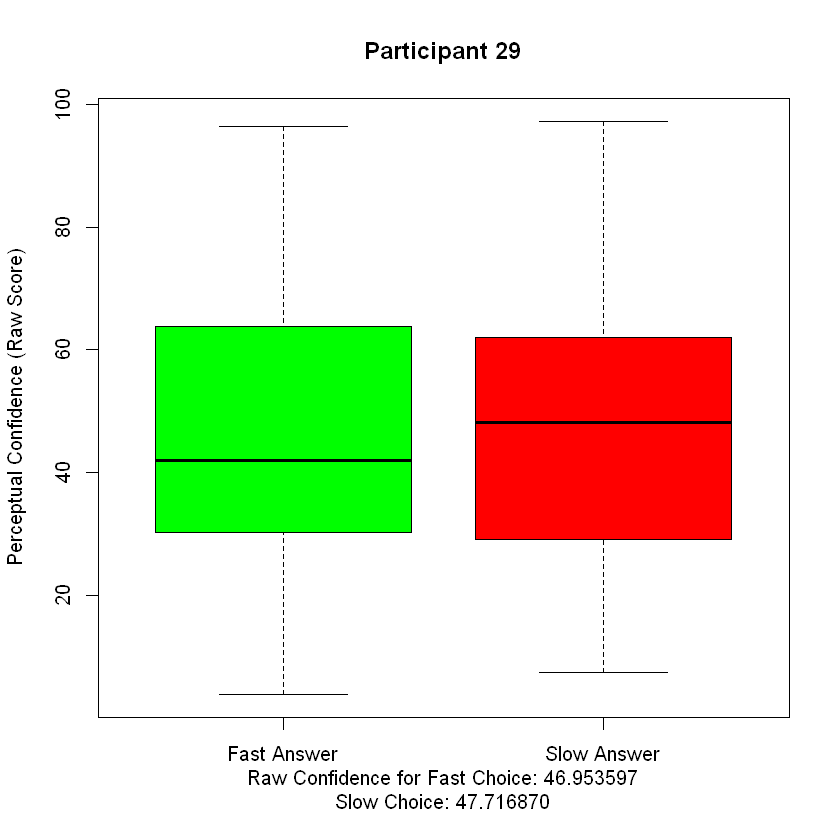

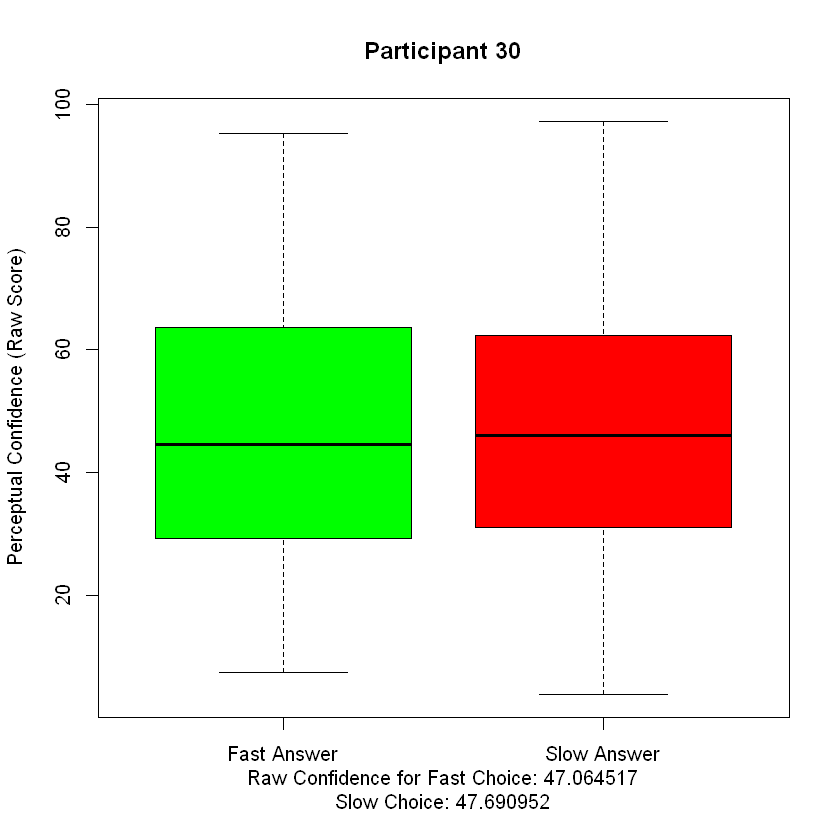

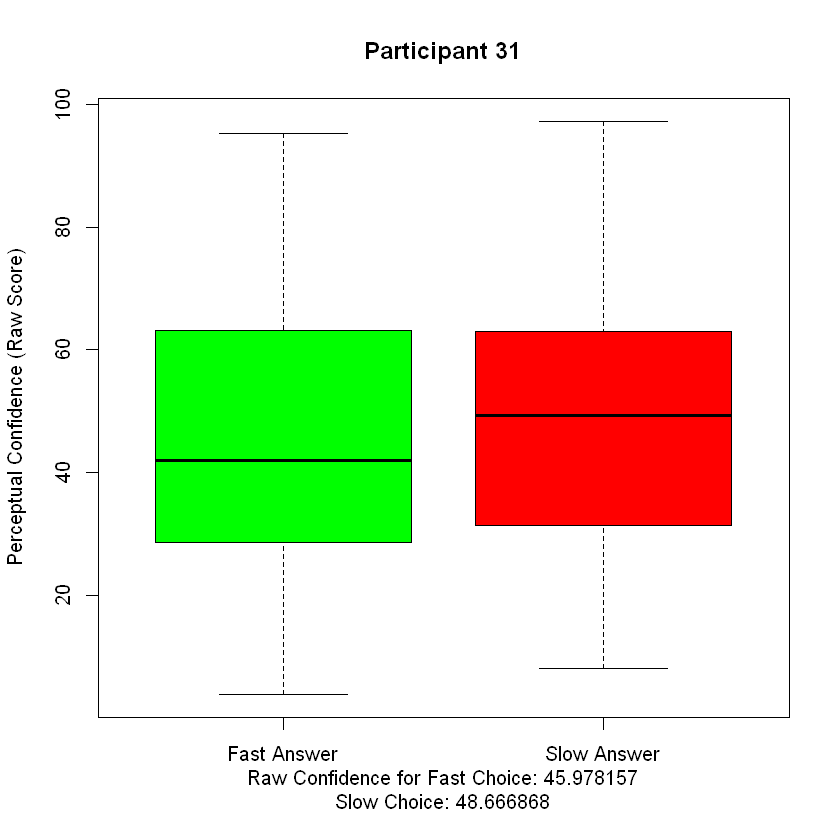

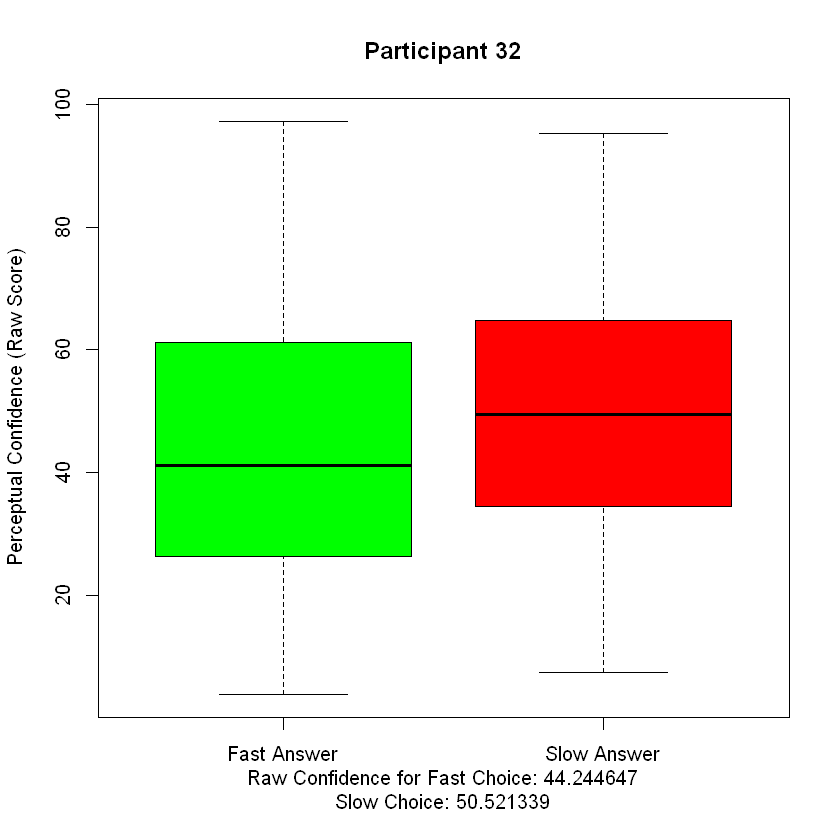

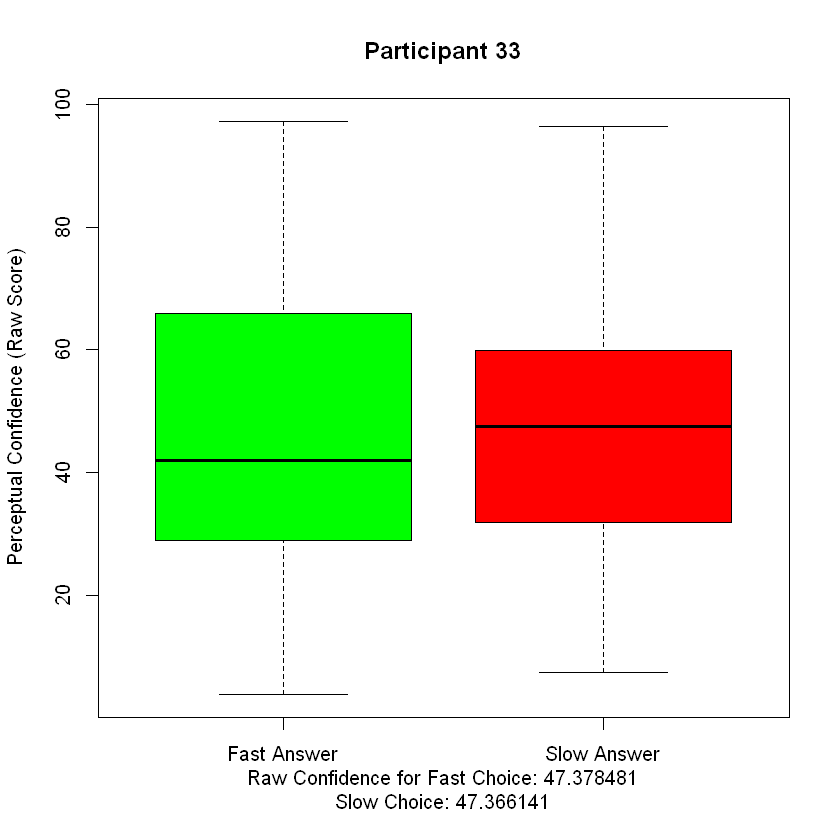

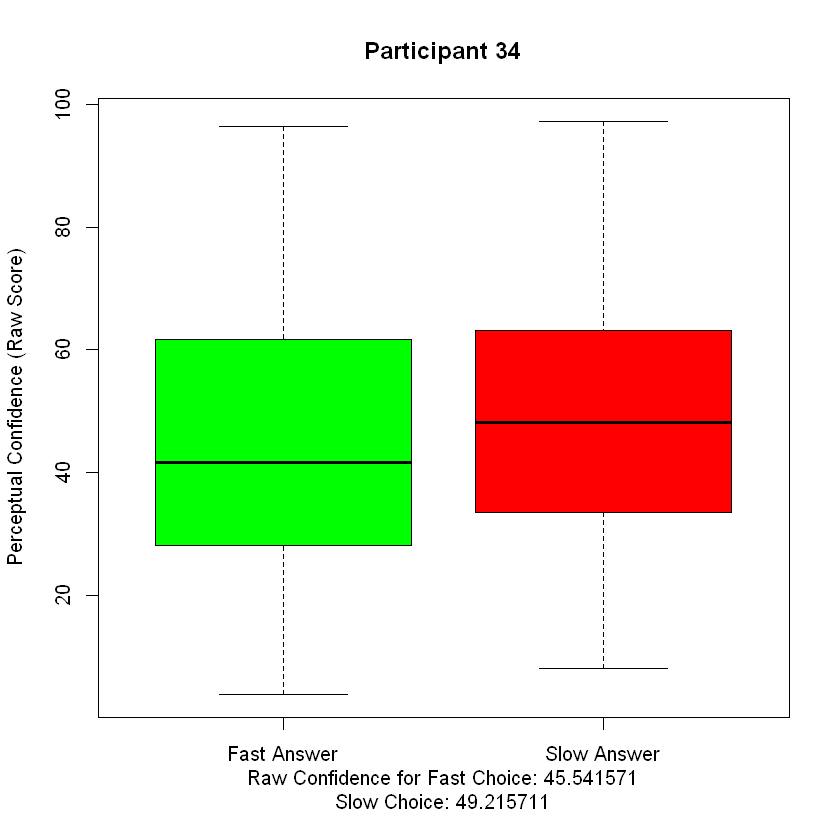

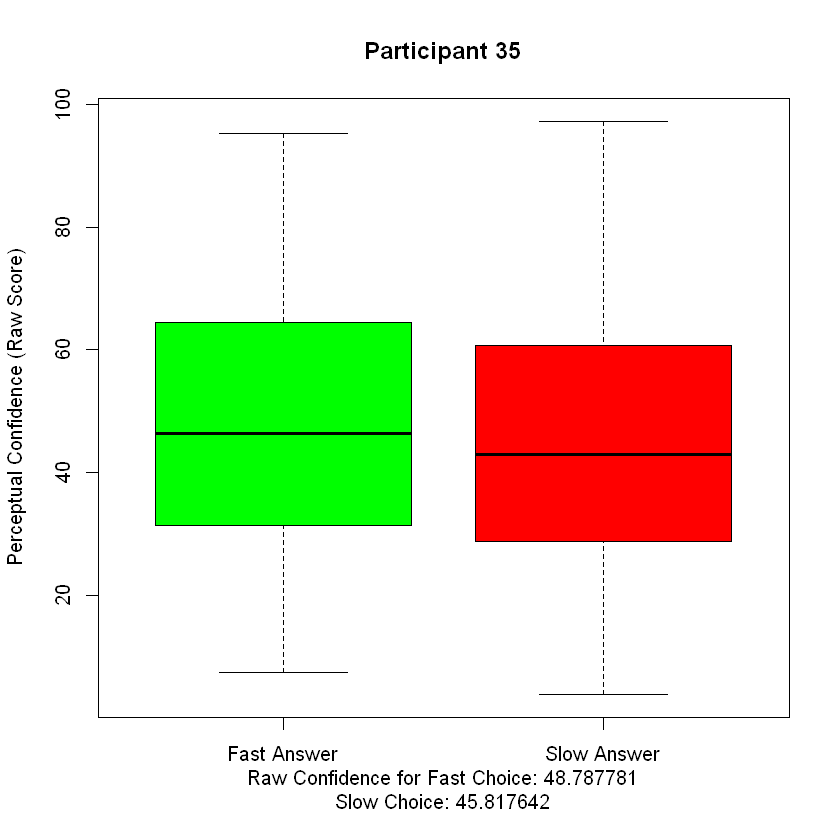

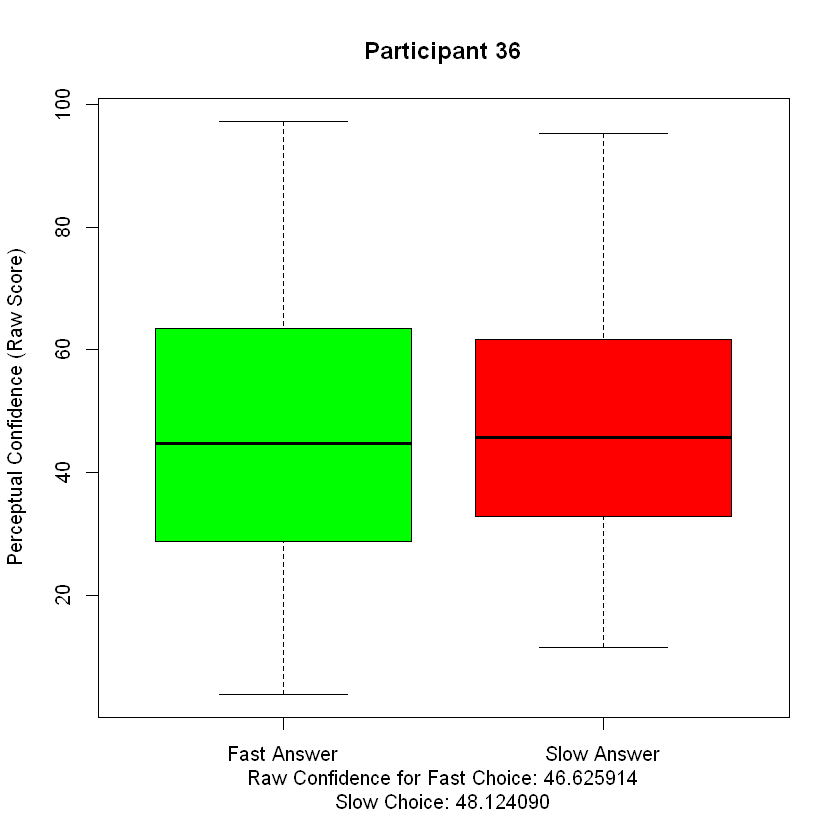

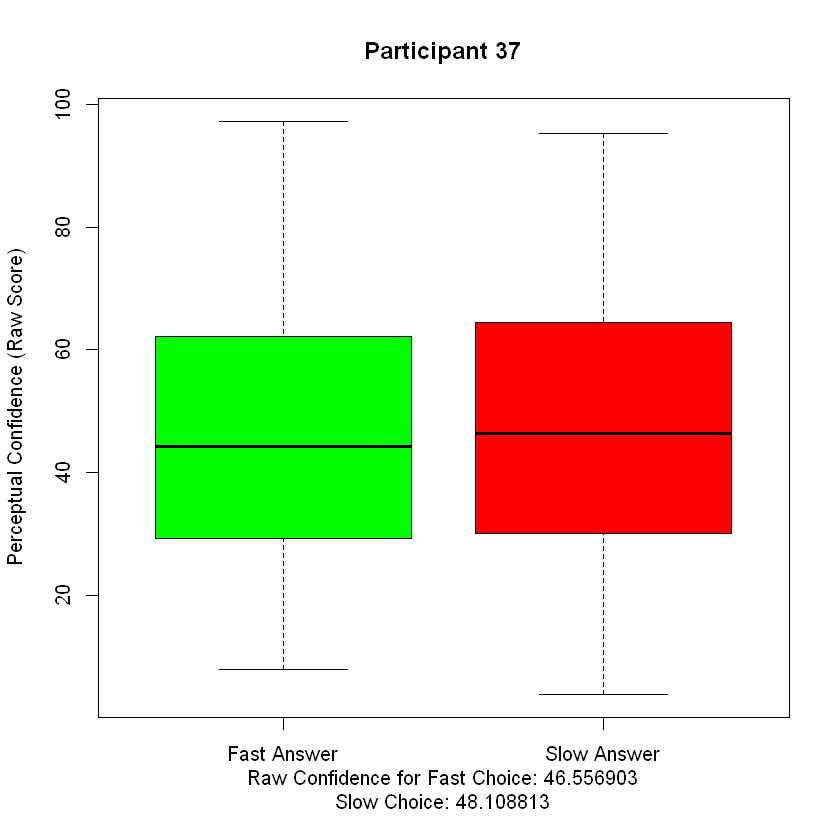

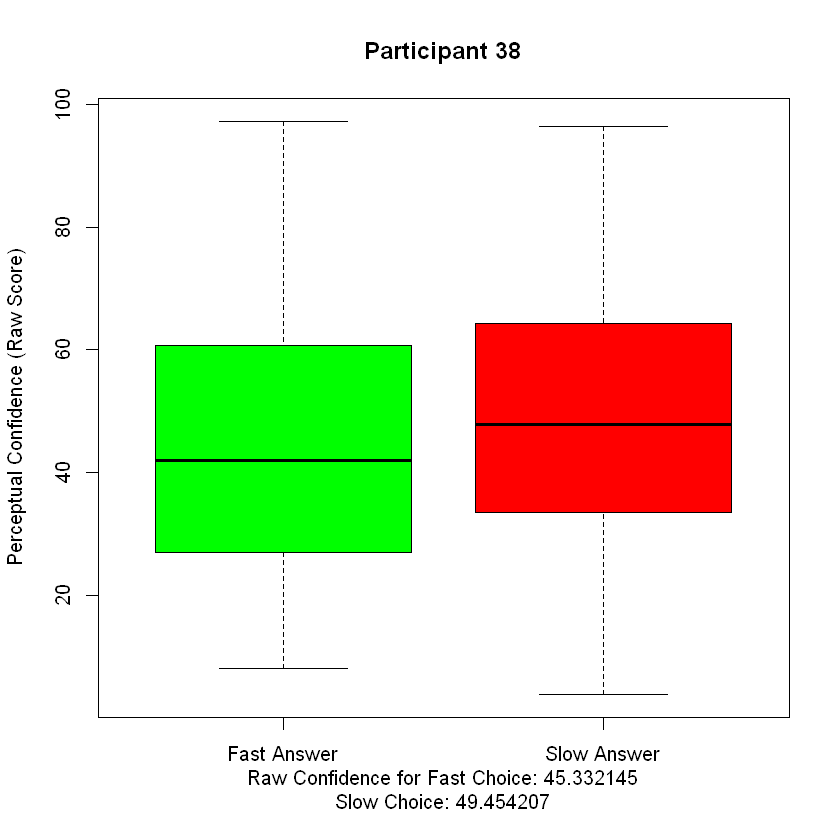

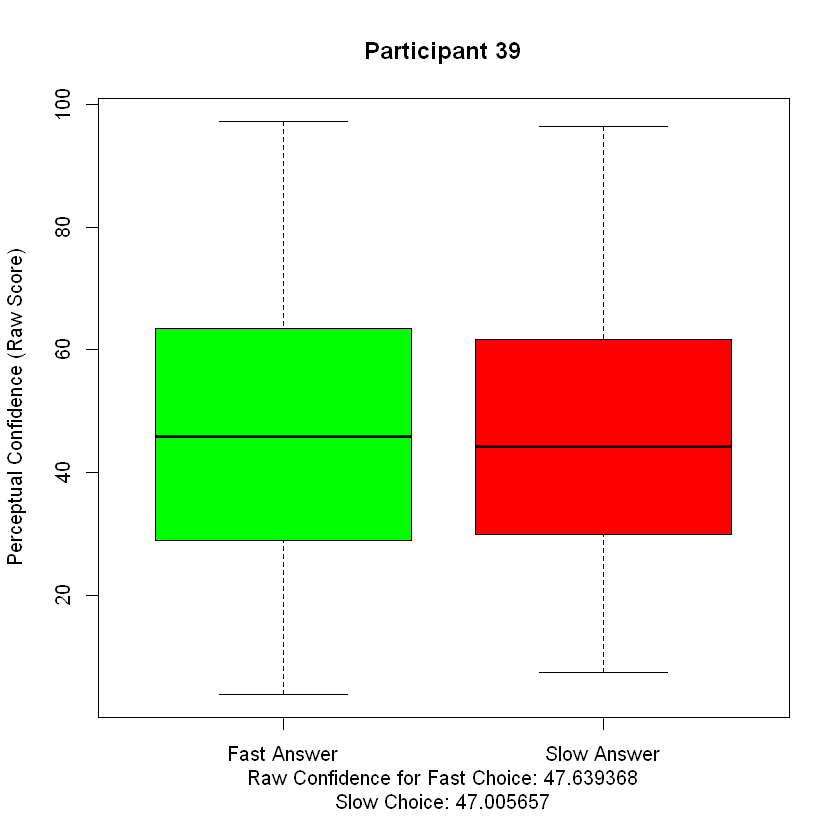

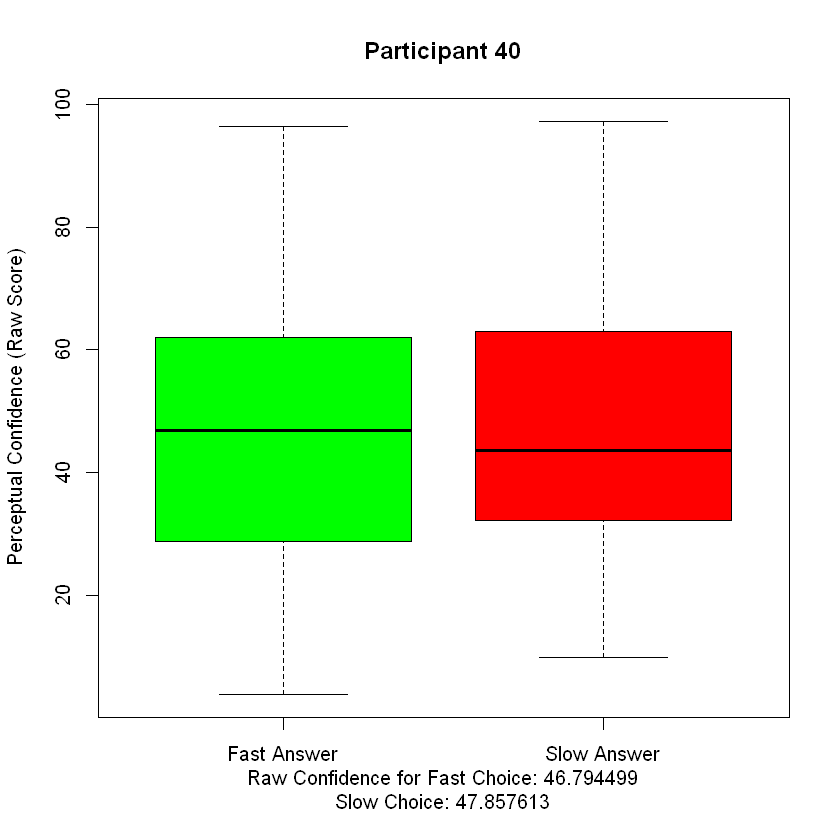

In [71]:
i <- 1
while(i<=40){
    
        a <- mean(dat$Perceptual_Conf[which(dat$Perceptual_Rt[dat$participant==i] <= median(dat$Perceptual_Rt[dat$participant==i]))])
        b <- mean(dat$Perceptual_Conf[which(dat$Perceptual_Rt[dat$participant==i] > median(dat$Perceptual_Rt[dat$participant==i]))])

        boxplot(dat$Perceptual_Conf[which(dat$Perceptual_Rt[dat$participant==i] <= median(dat$Perceptual_Rt[dat$participant==i]))],dat$Perceptual_Conf[which(dat$Perceptual_Rt[dat$participant==i] > median(dat$Perceptual_Rt[dat$participant==i]))] , 
            data=dat, col = c('green', 'red'), main = sprintf("Participant %s", i), ylab= 'Perceptual Confidence (Raw Score)', 
            names = c('Fast Answer', 'Slow Answer'), xlab= sprintf('Raw Confidence for Fast Choice: %f\nSlow Choice: %f', a, b))
        i <- i + 1
}

<a id='ppepr'></a>

# Participantwise Parameter Estimates for Perceptual Response Time while predicting Perceptual Confidence

In [72]:
fit_log_pr <- lmer(z_P_Conf ~ z_P_Rt + (1 + z_P_Rt|participant), data=dat)

pr <- ranef(fit_log_pr)$participant[, "z_P_Rt"] + fixef(fit_log_pr)[2]
z_pr <- (pr- mean(pr)) / sd(pr)

In [76]:
sprintf("Participant %s is 3 standard deviation away with a z-scored perceptual response time estimate of %.2f", which(z_pr>3 | z_pr < -3), z_pr[16])

[1] "Participant 16 is 3 standard deviation away with a z-scored perceptual response time estimate of -3.58"

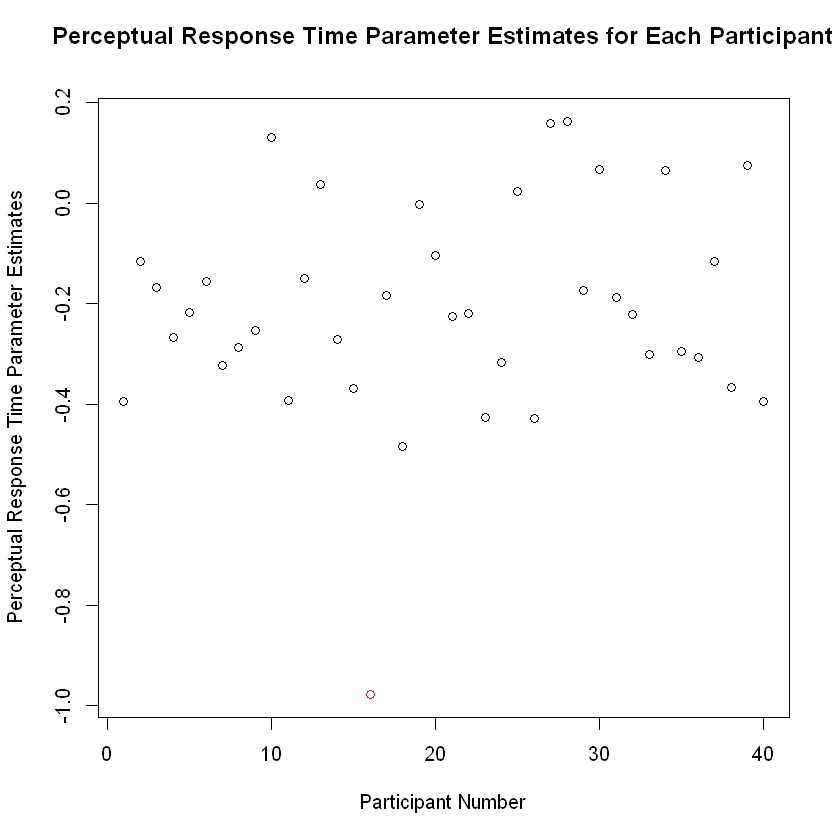

In [79]:
plot(seq(1,40), pr, xlab= c('Participant Number'), ylab = c('Perceptual Response Time Parameter Estimates'), col = ifelse(pr< -0.9, 'red', 'black'), main = 'Perceptual Response Time Parameter Estimates for Each Participant\n')

Participant 16 is an outlier (the one which is colored red) and therefore will be eliminated. Other than that most participants seem to respond faster when their answer is correct.

# [Back to Content](#content)

<a id='vcvrt'></a>

# Z-Scored Value-Based Confidence and Value-Based Decision Outcomes


Boxplots for each participant to demonstrate how Value-Based Confidence differs when participants gives a correct or wrong answer (whether they chose the deck with higher probabiltiy or not) at Perceptual task

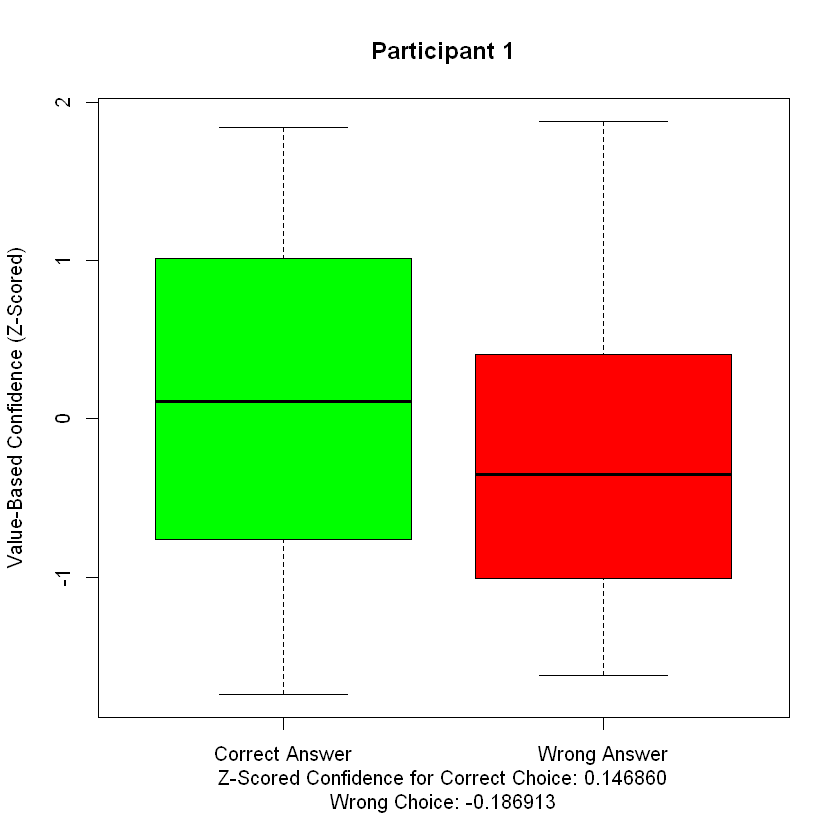

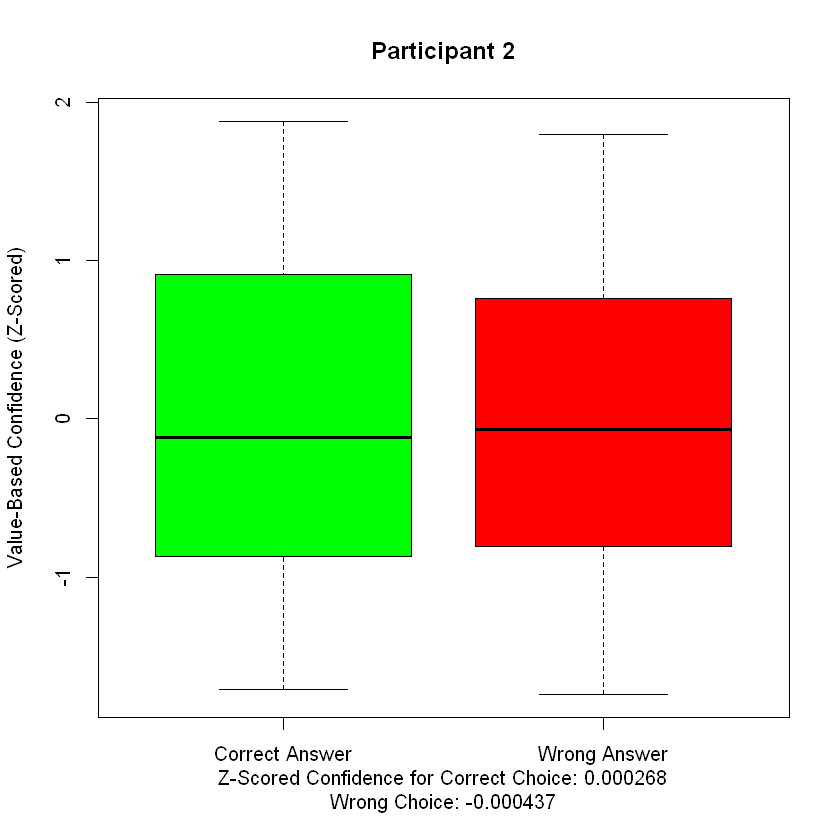

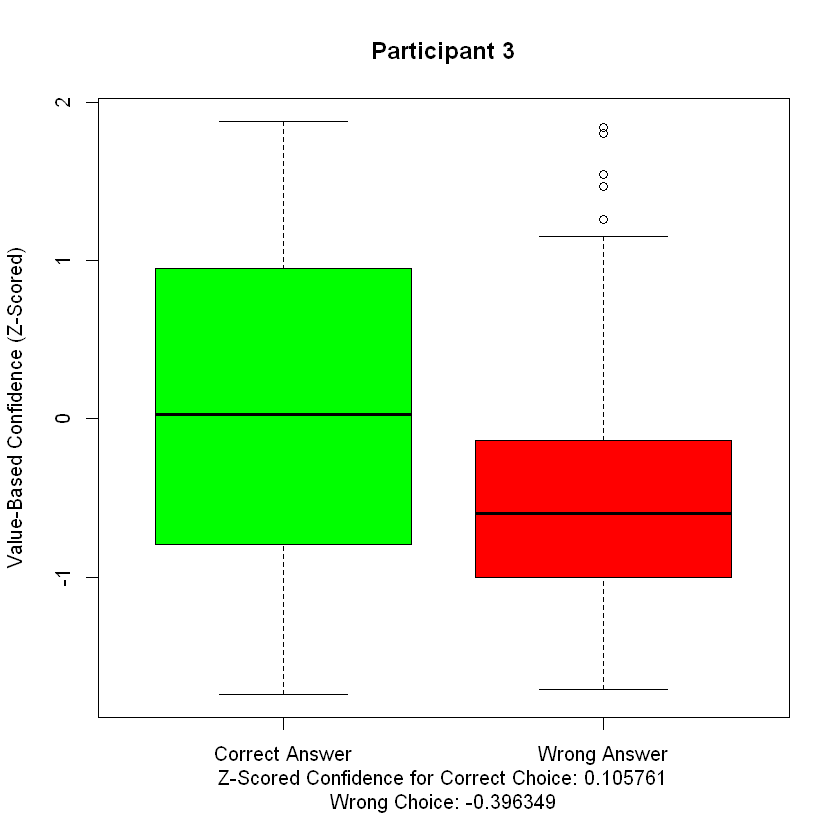

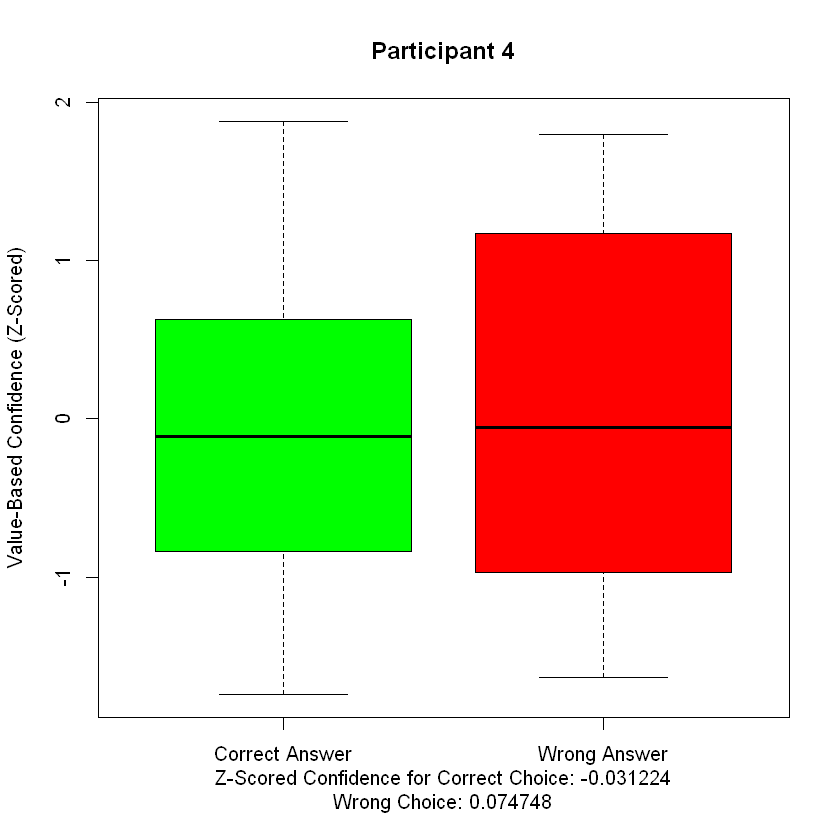

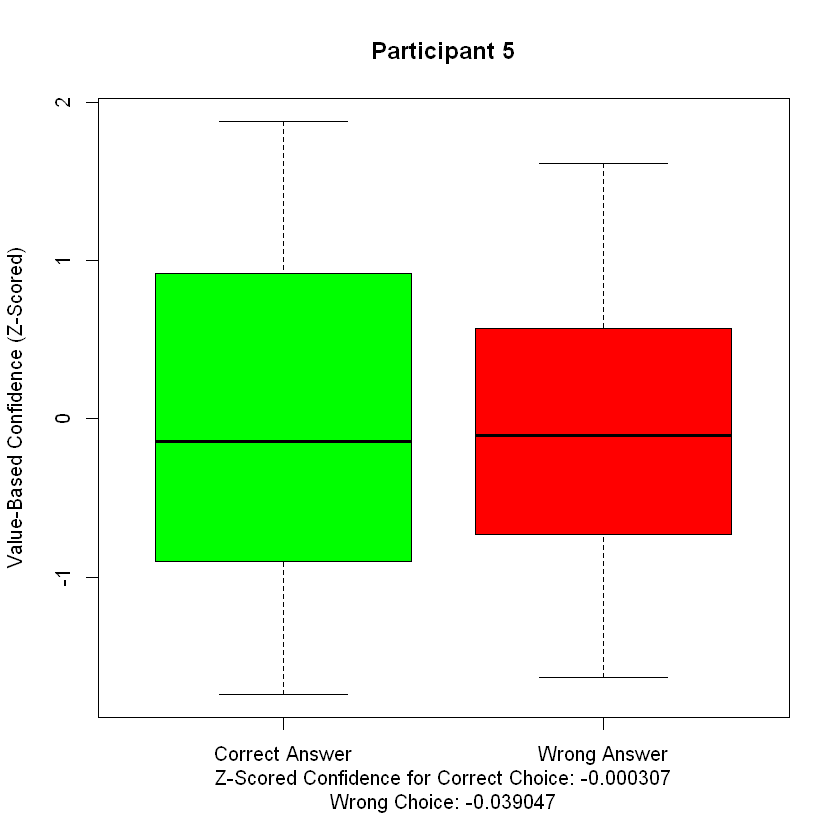

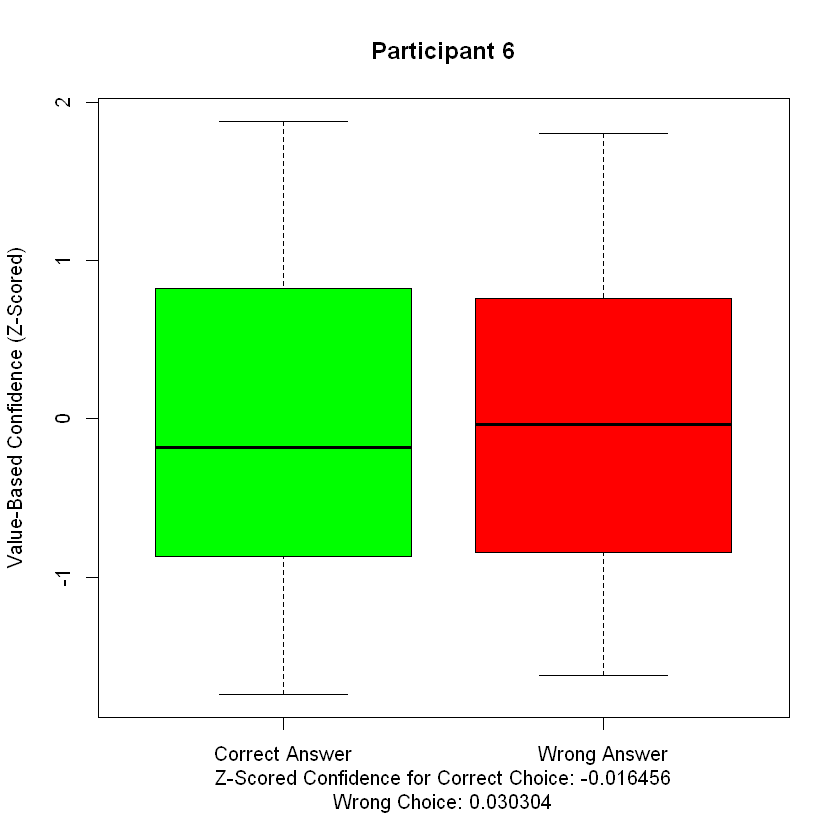

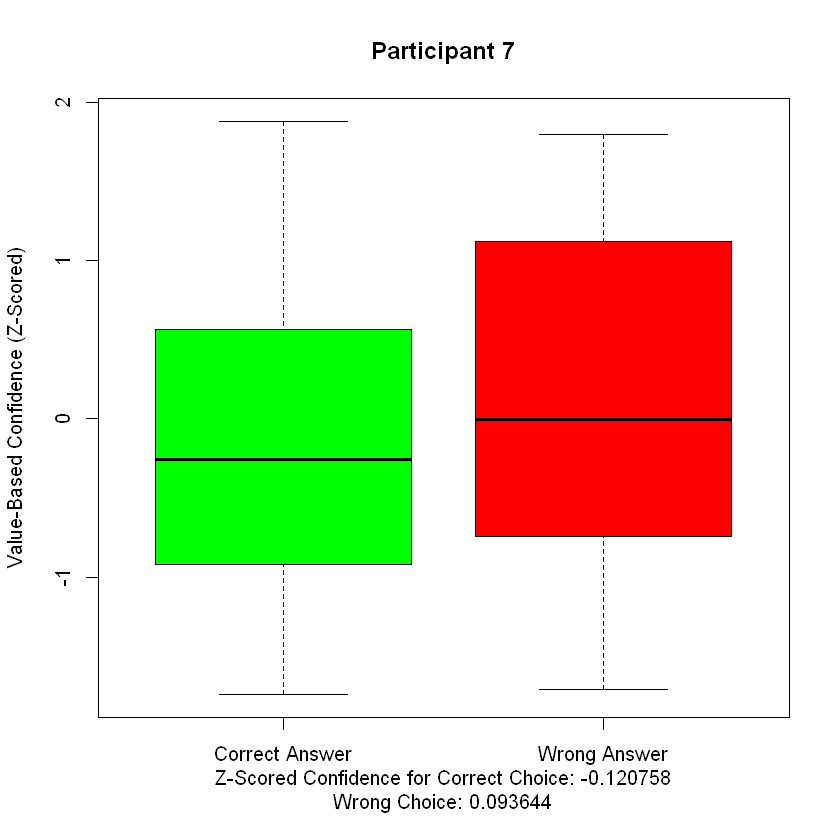

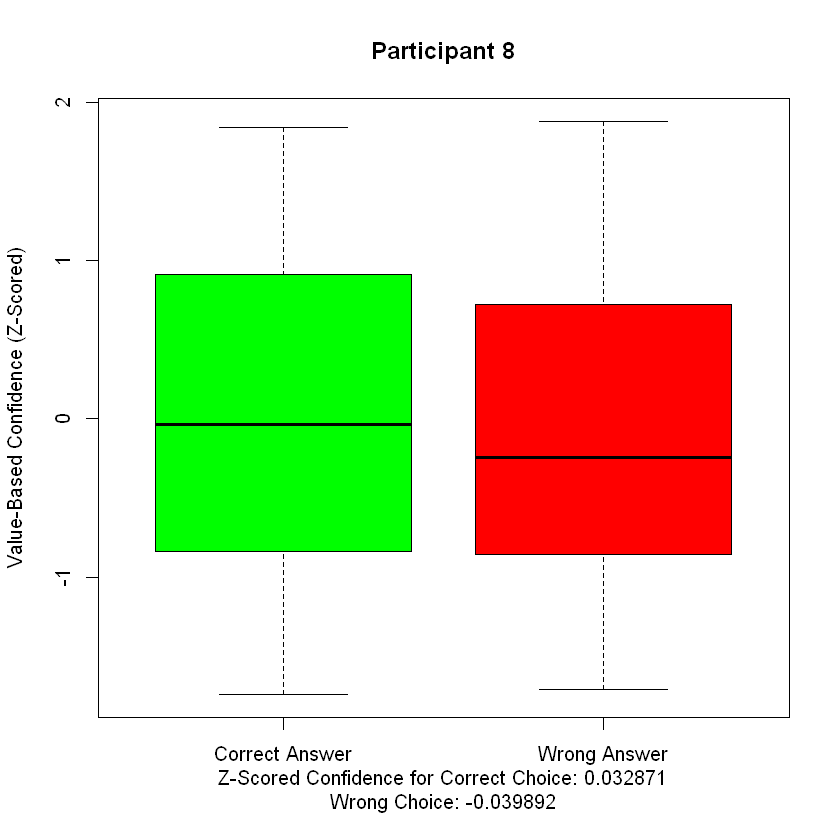

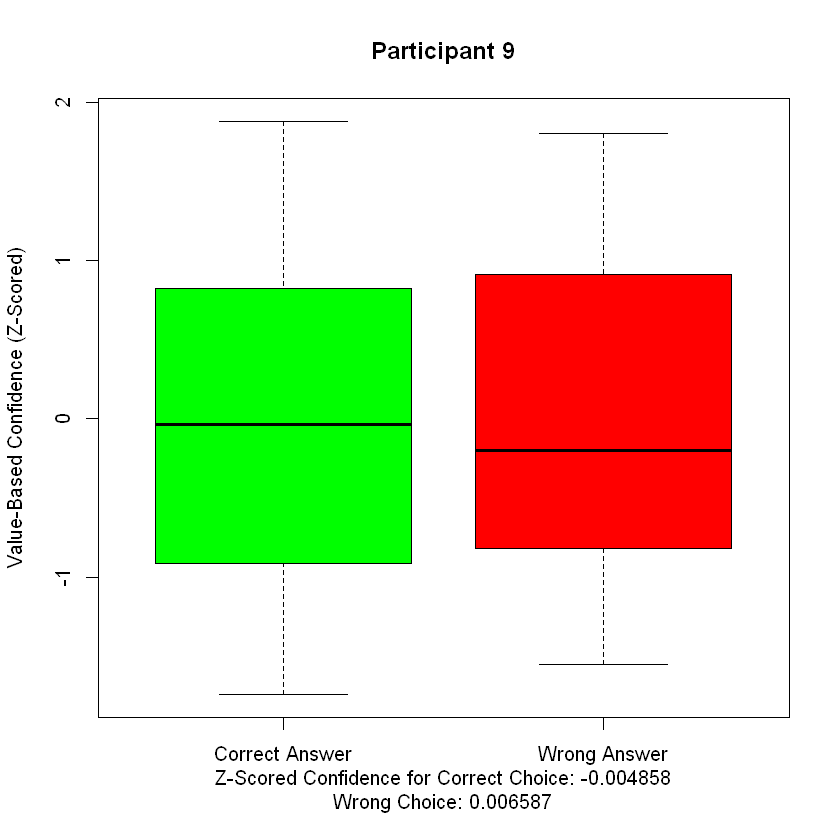

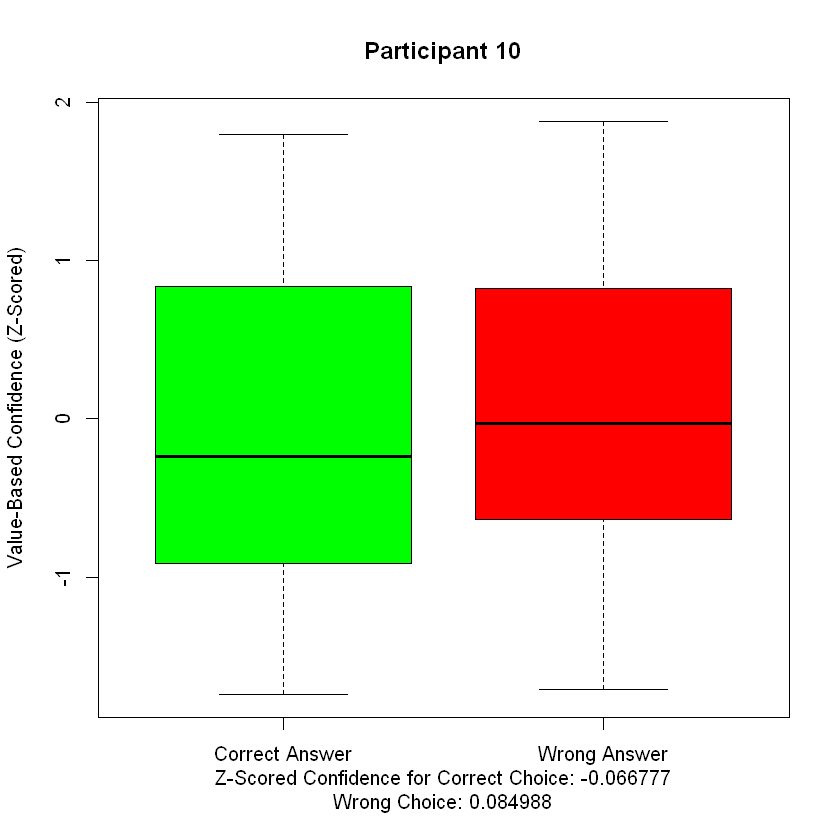

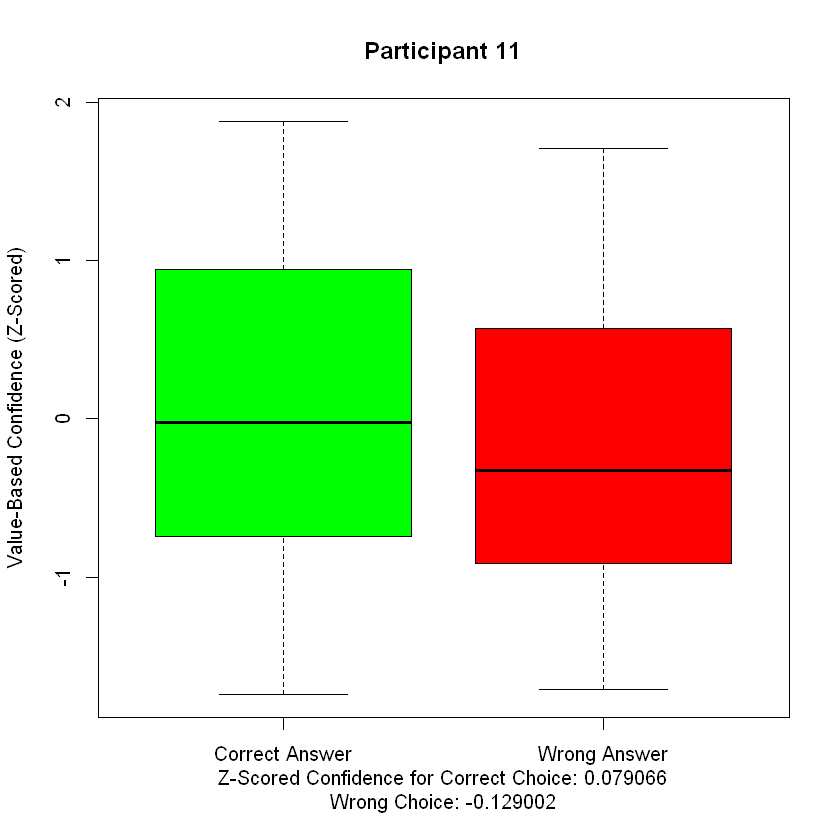

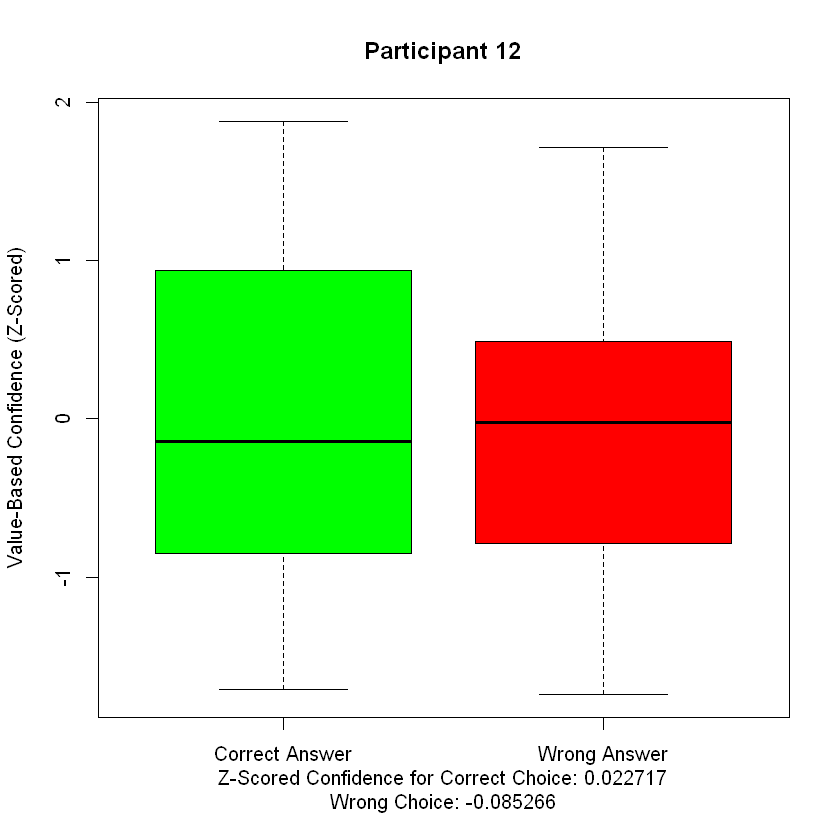

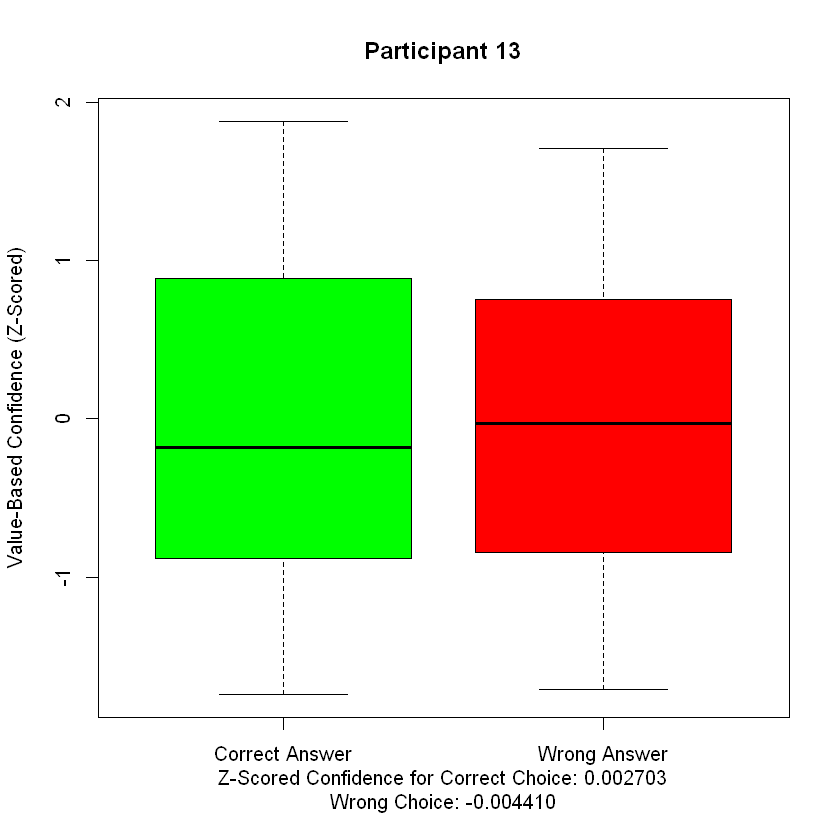

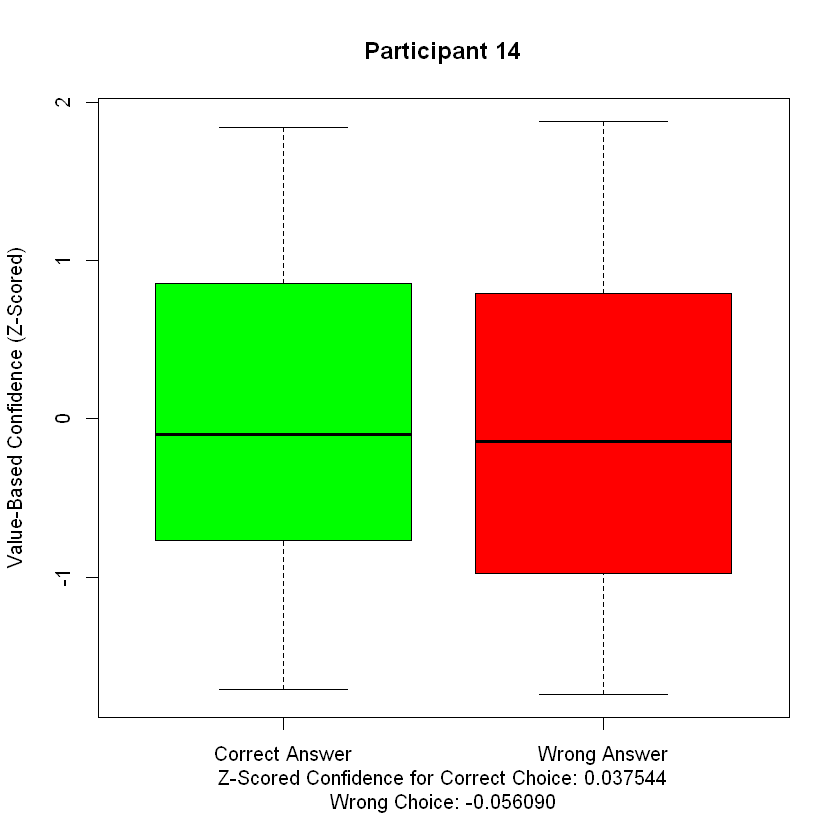

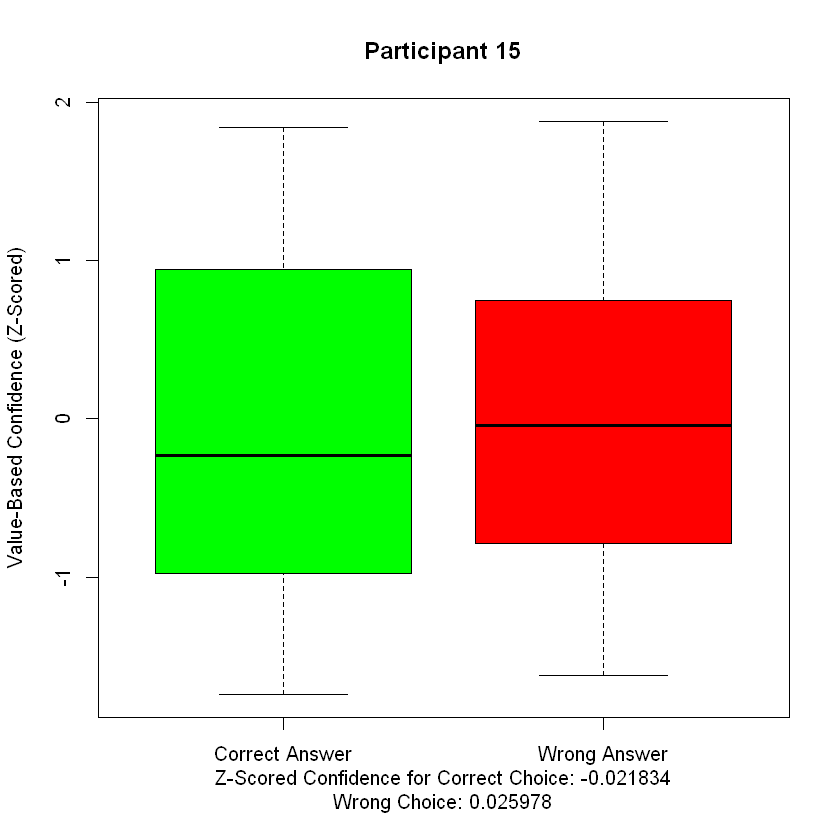

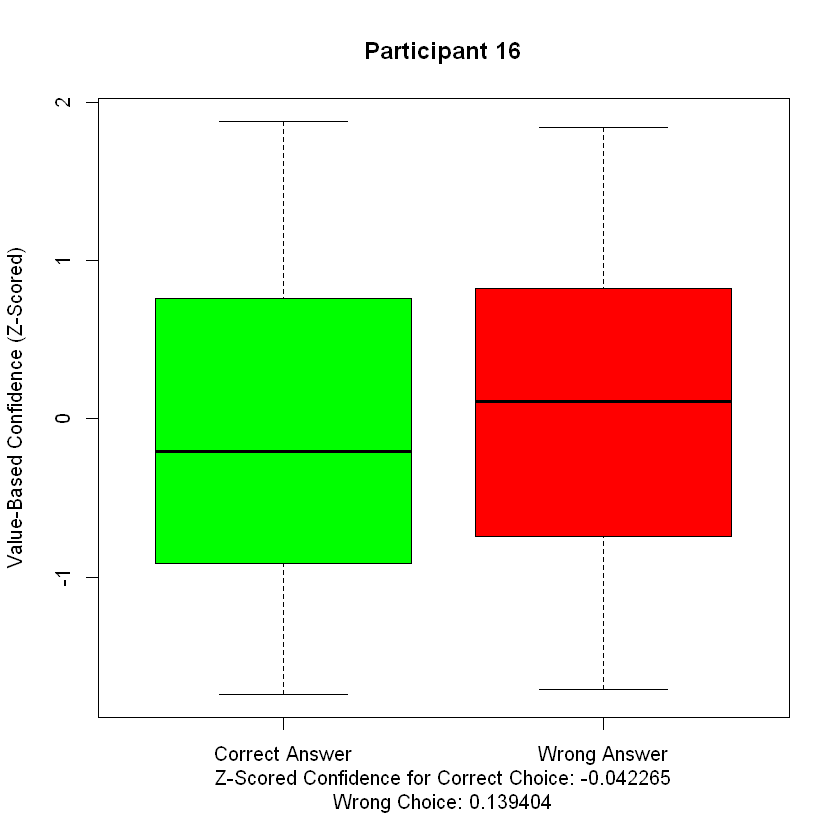

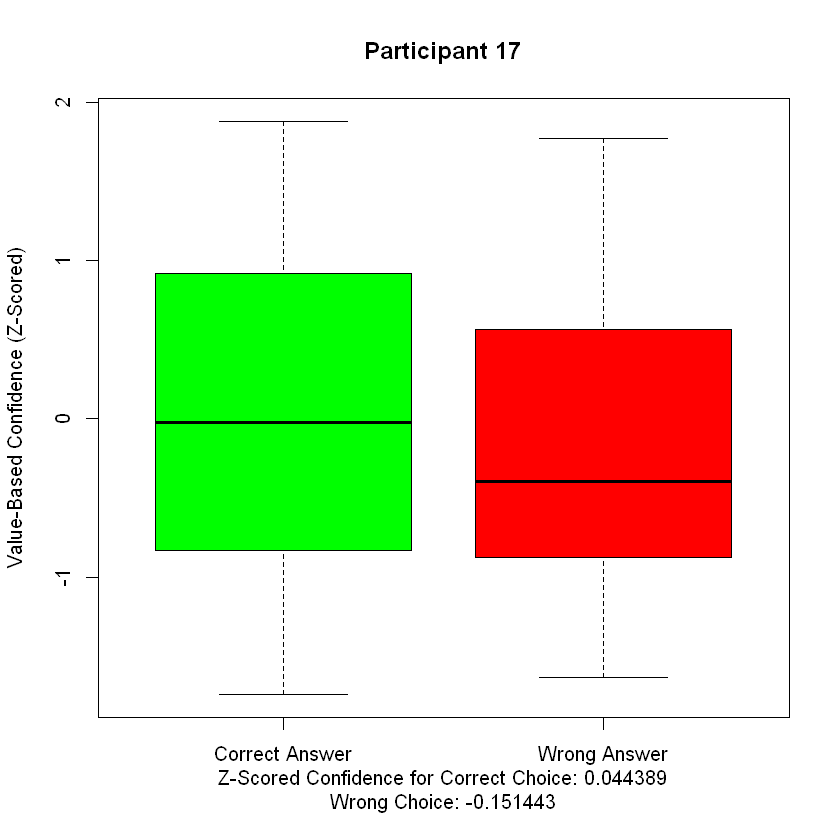

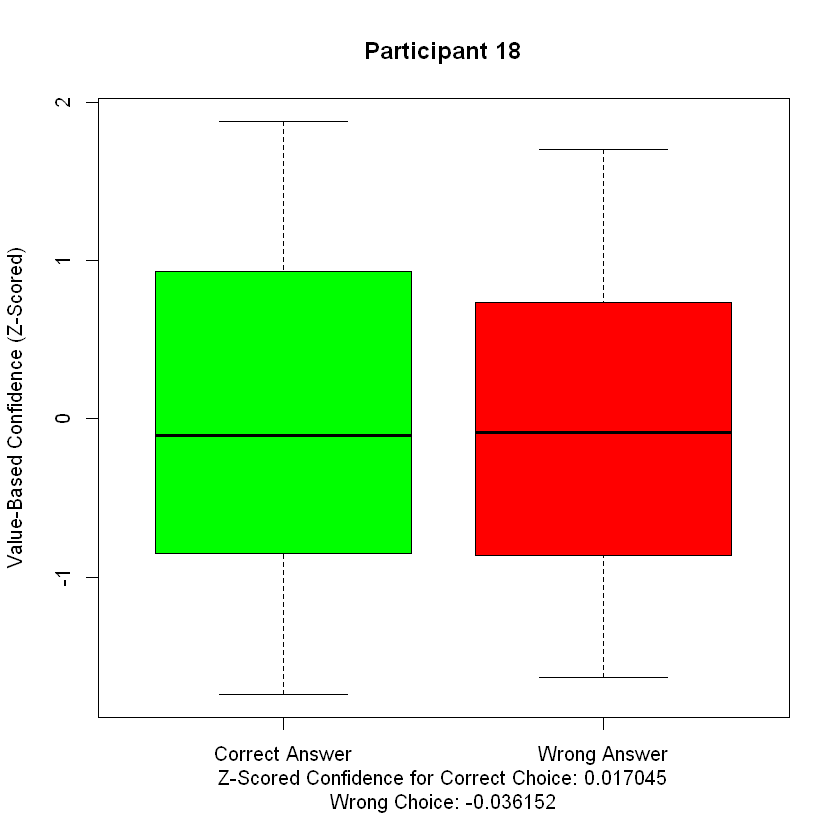

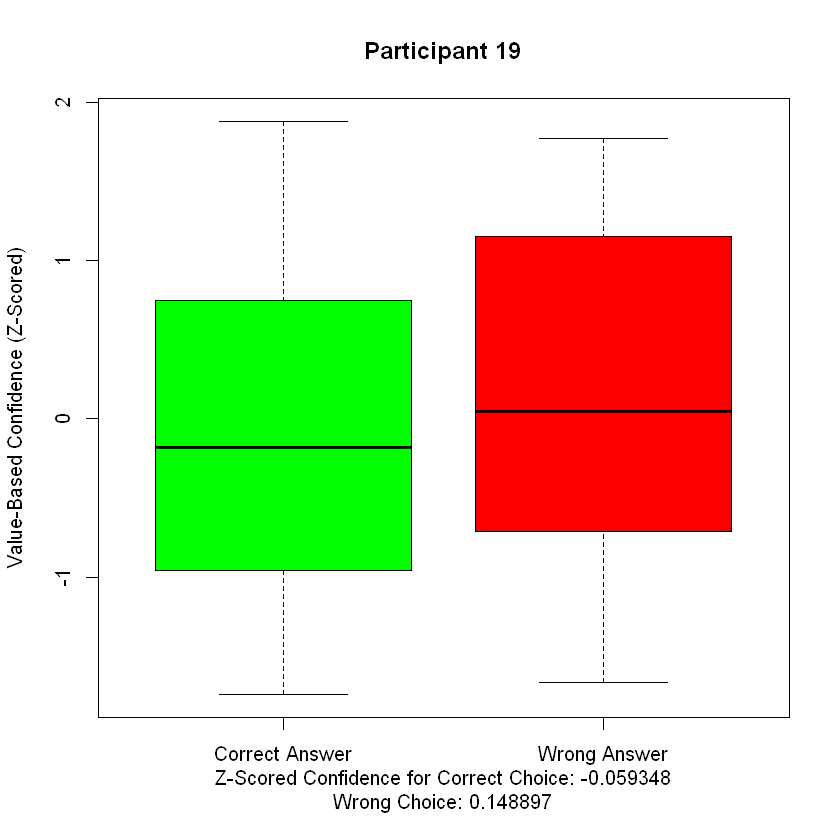

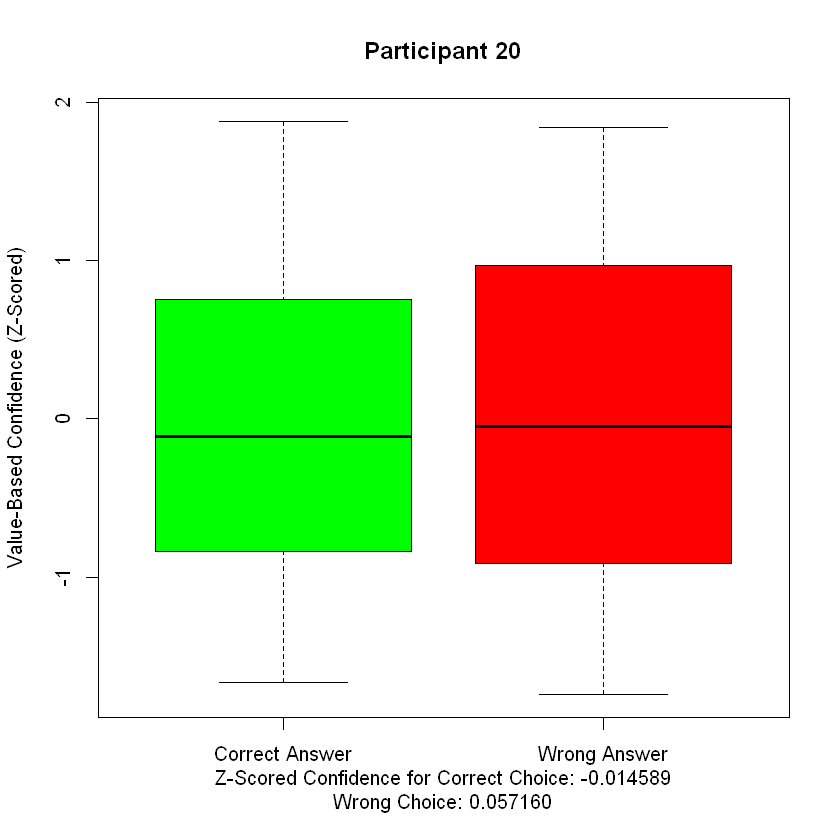

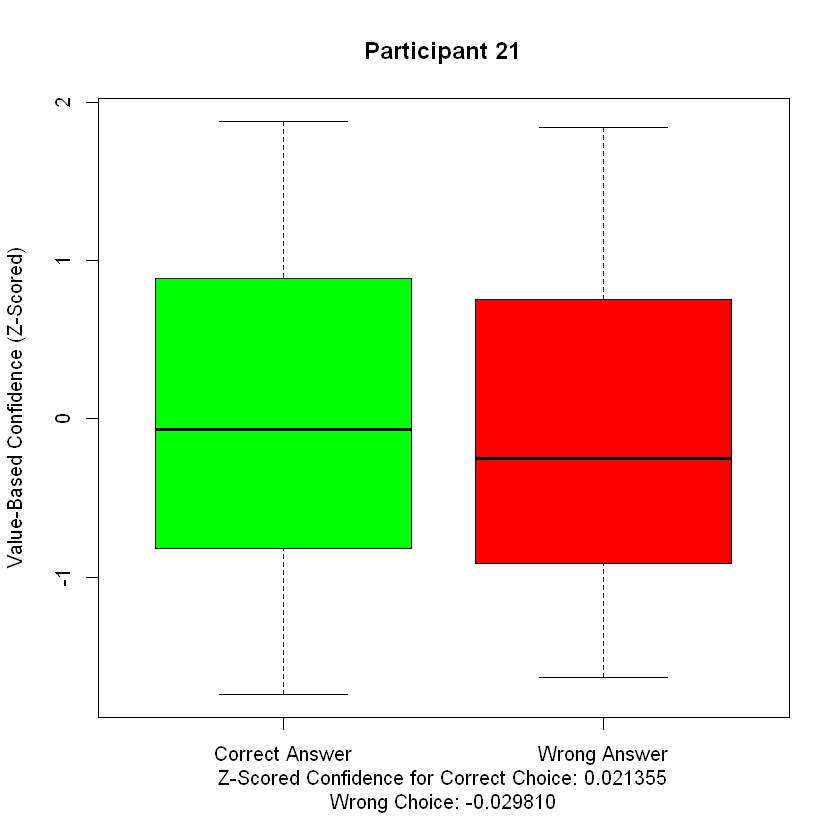

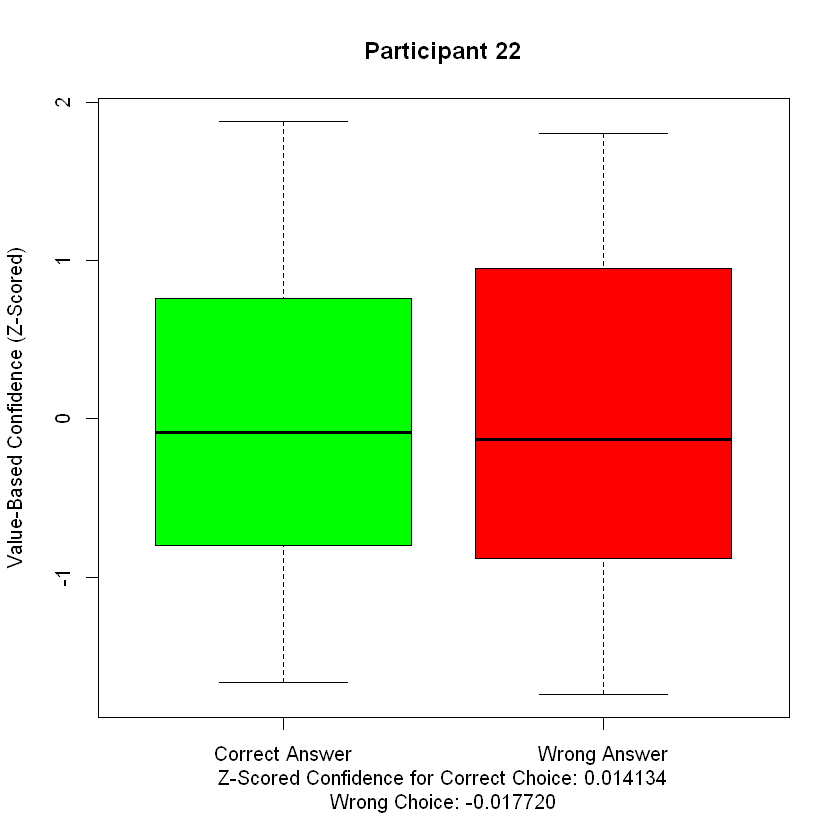

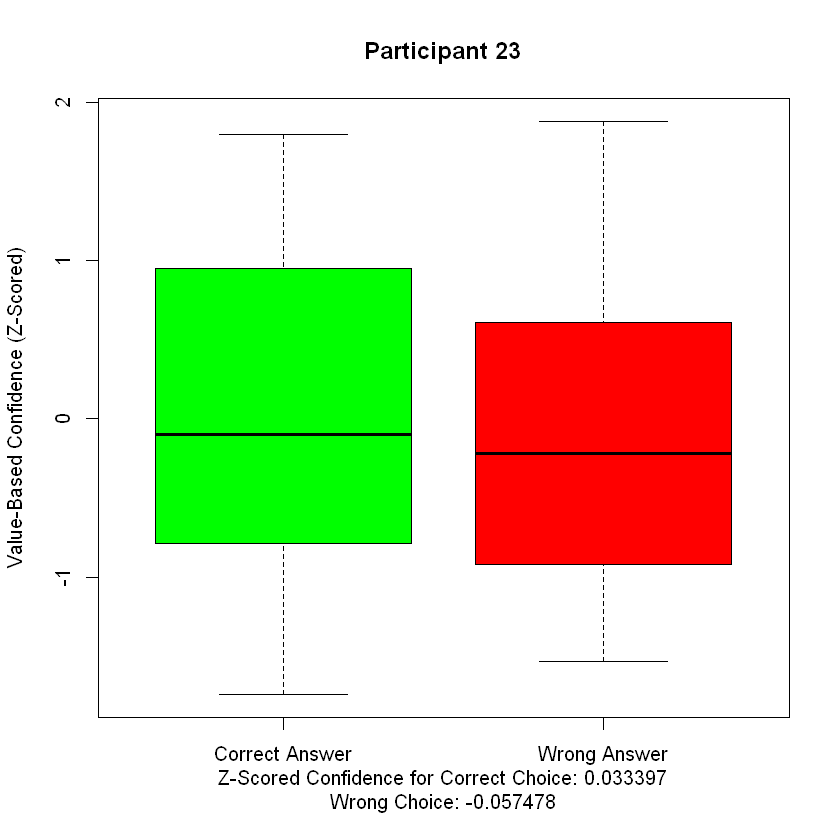

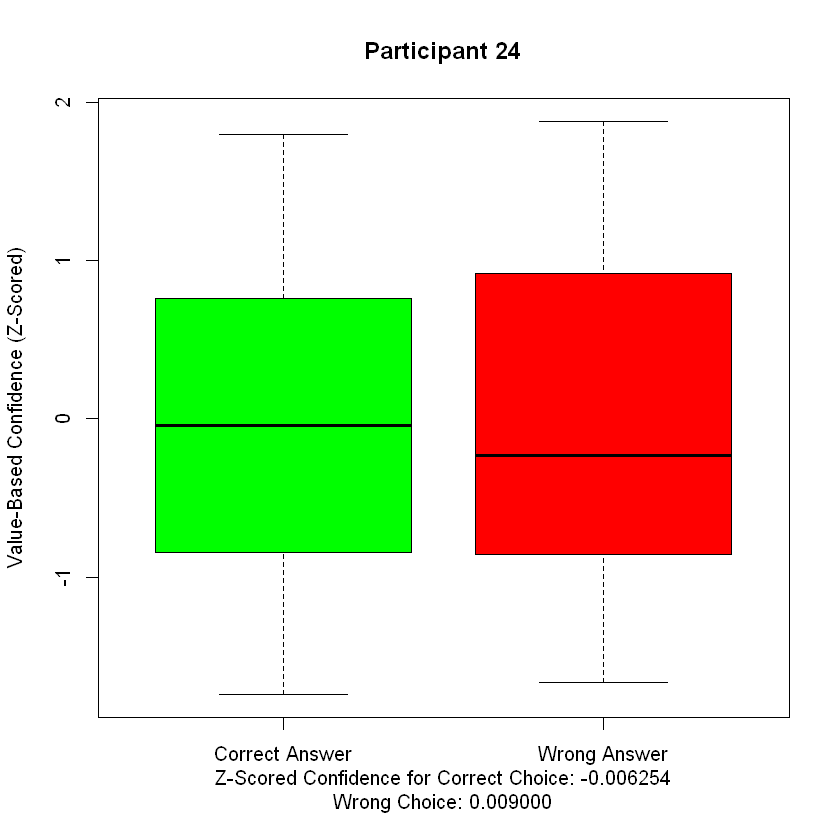

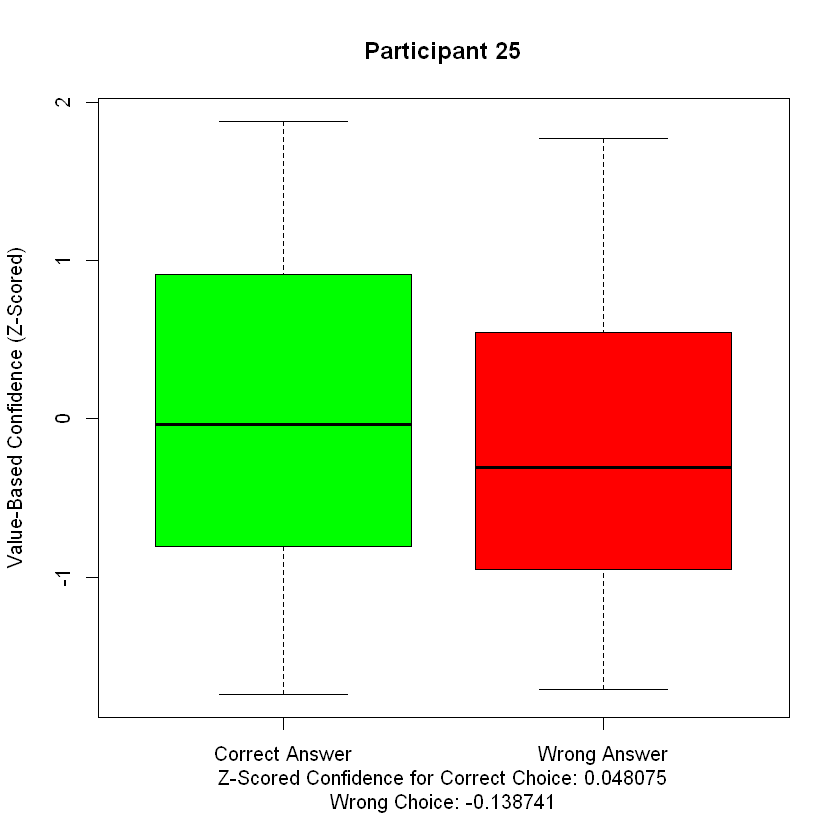

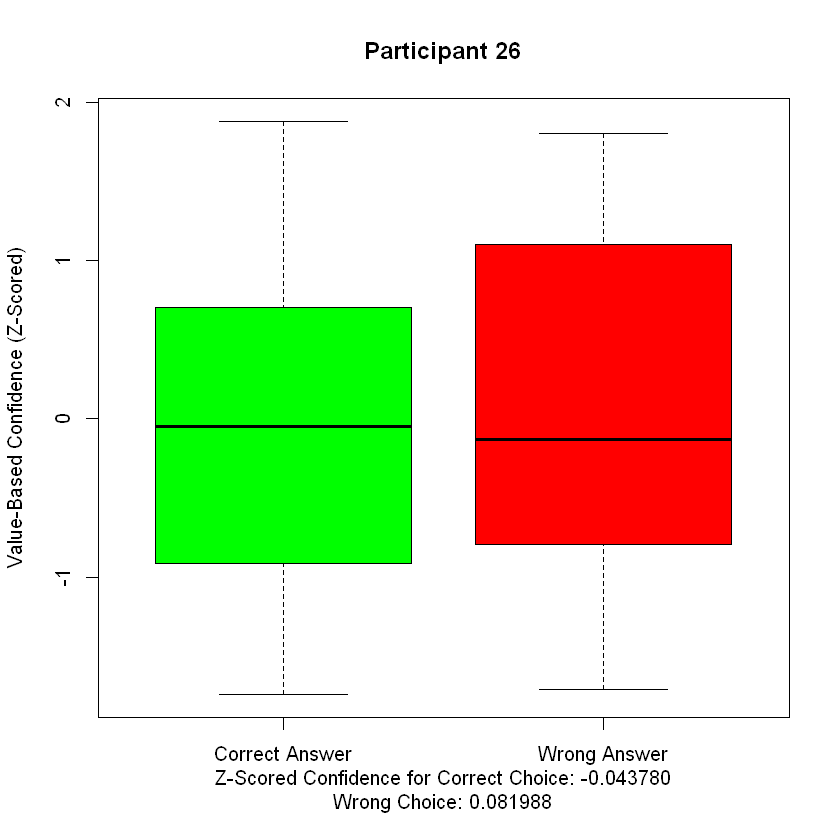

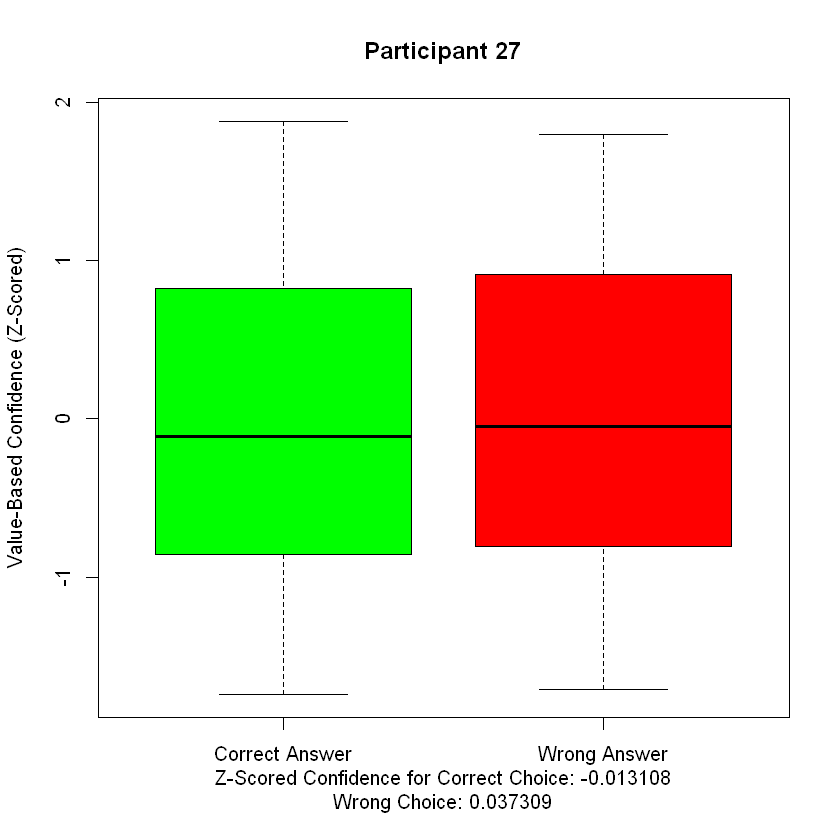

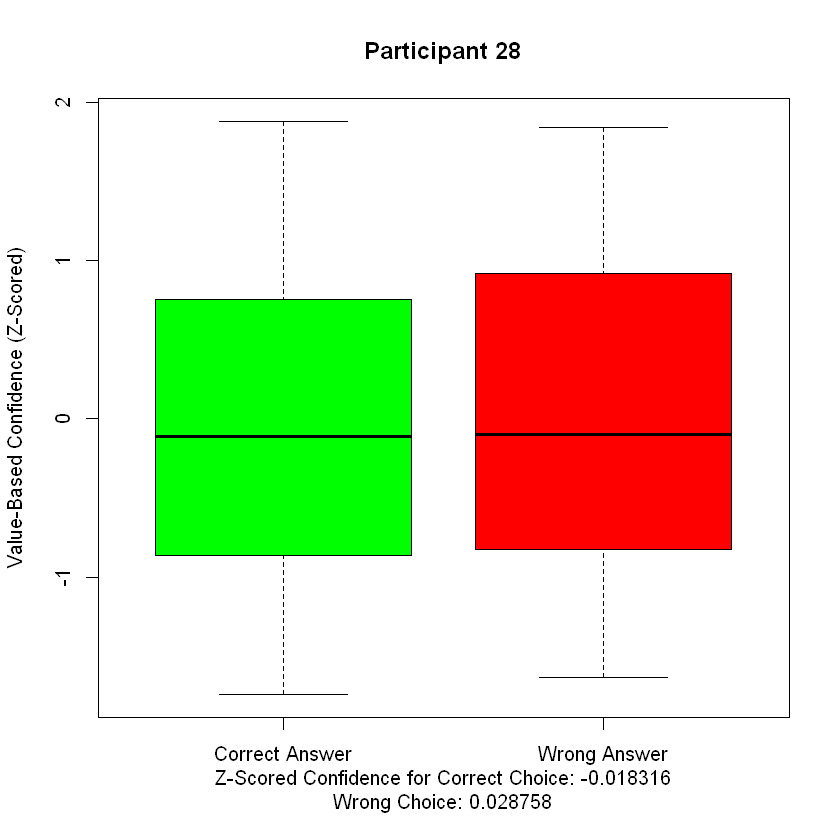

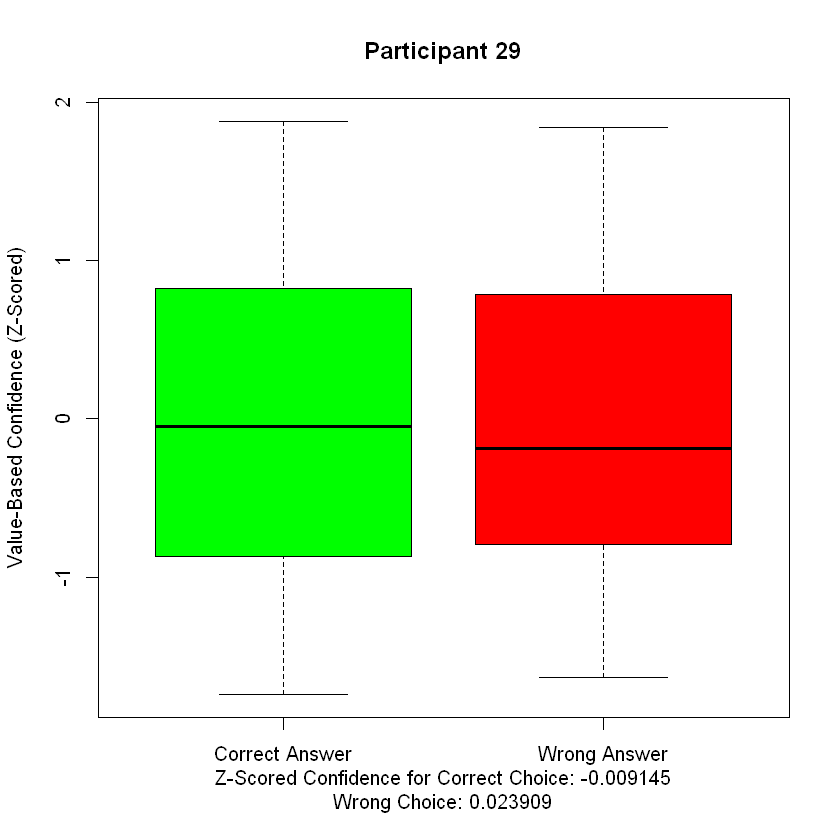

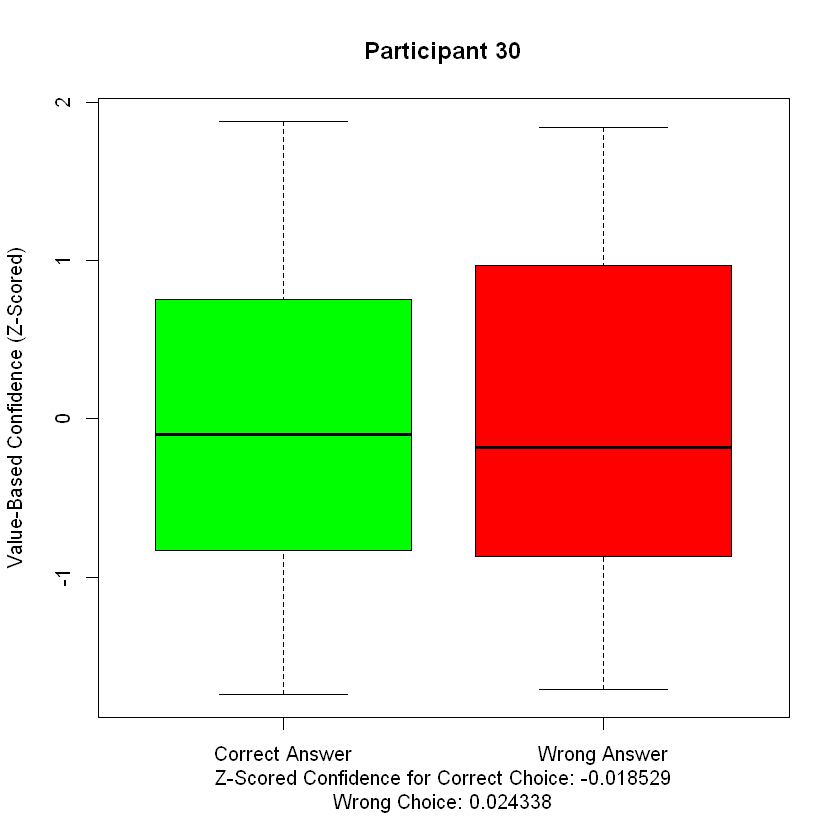

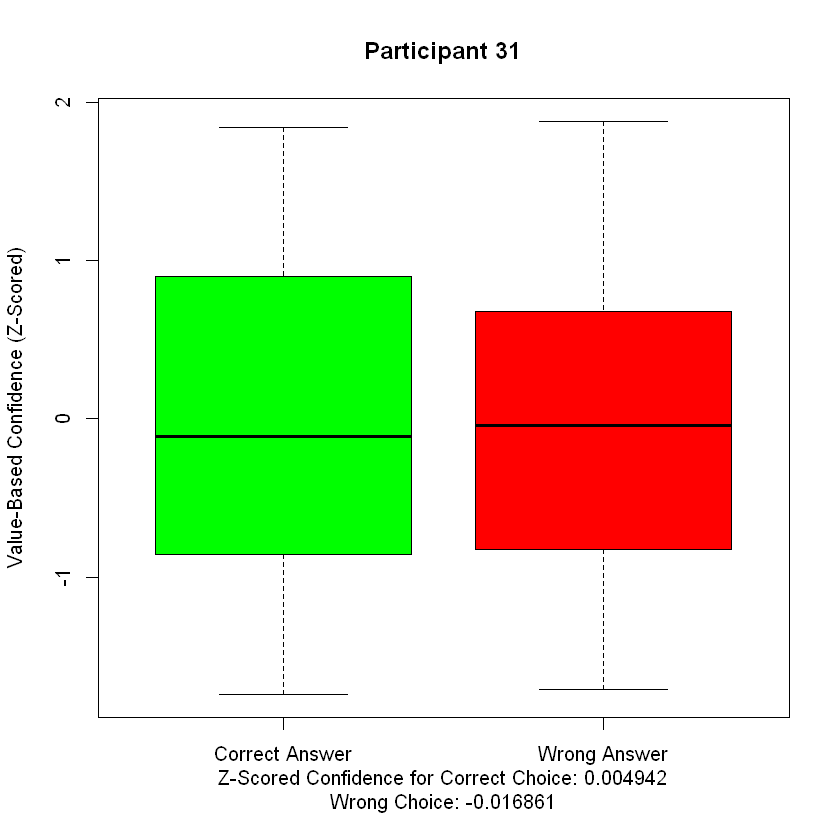

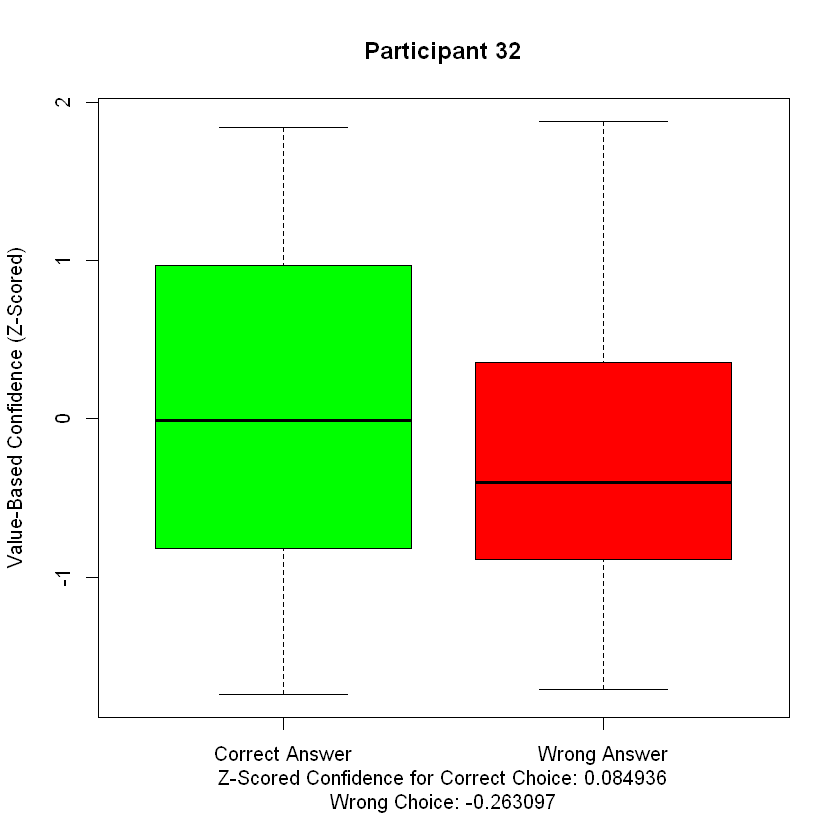

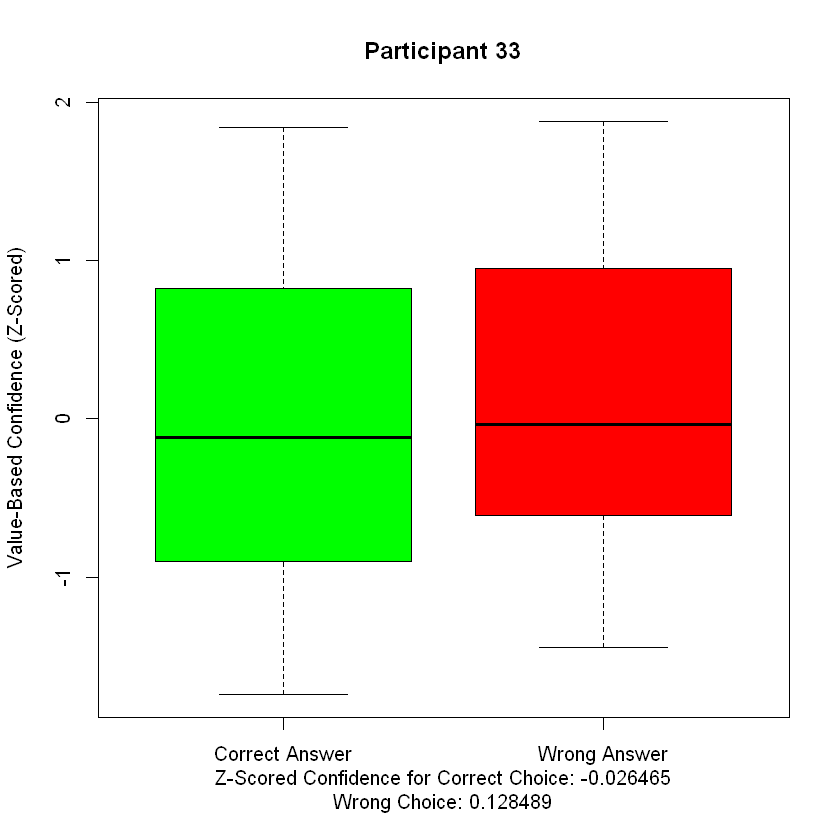

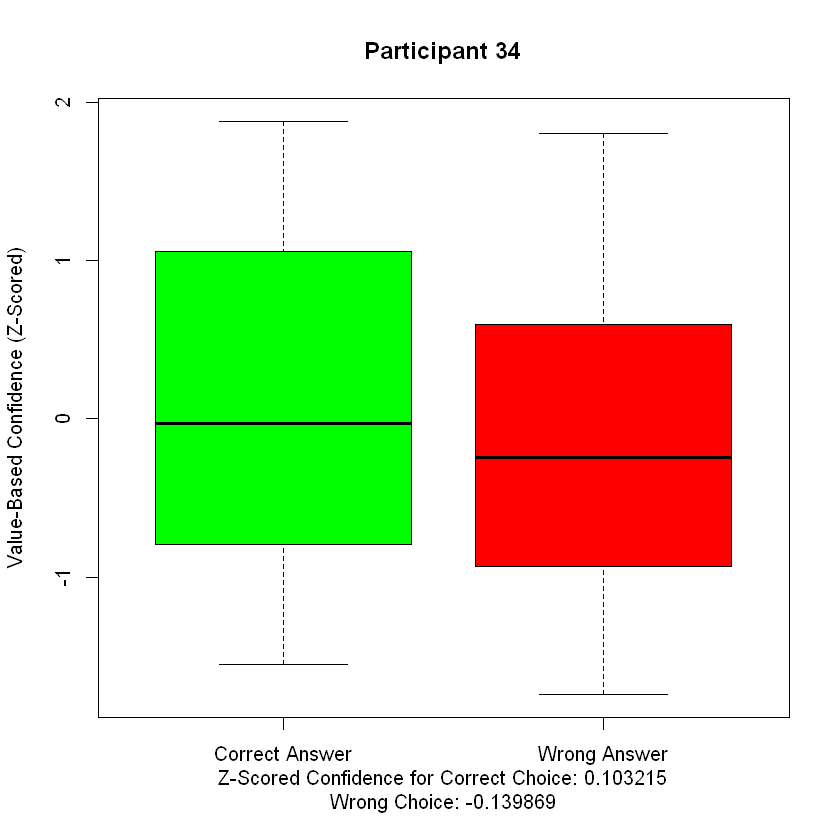

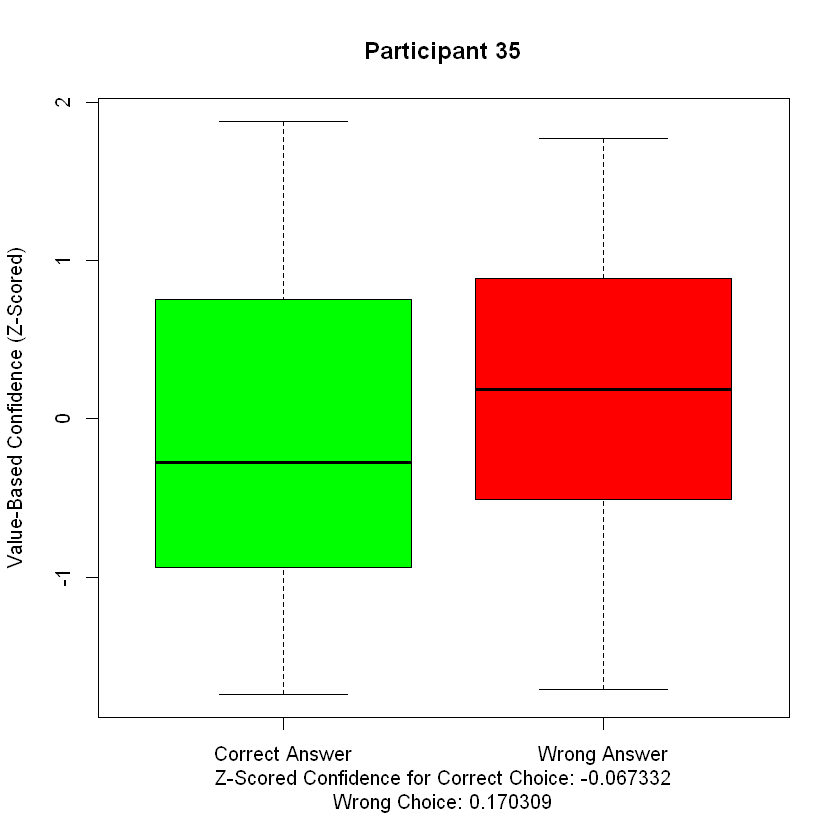

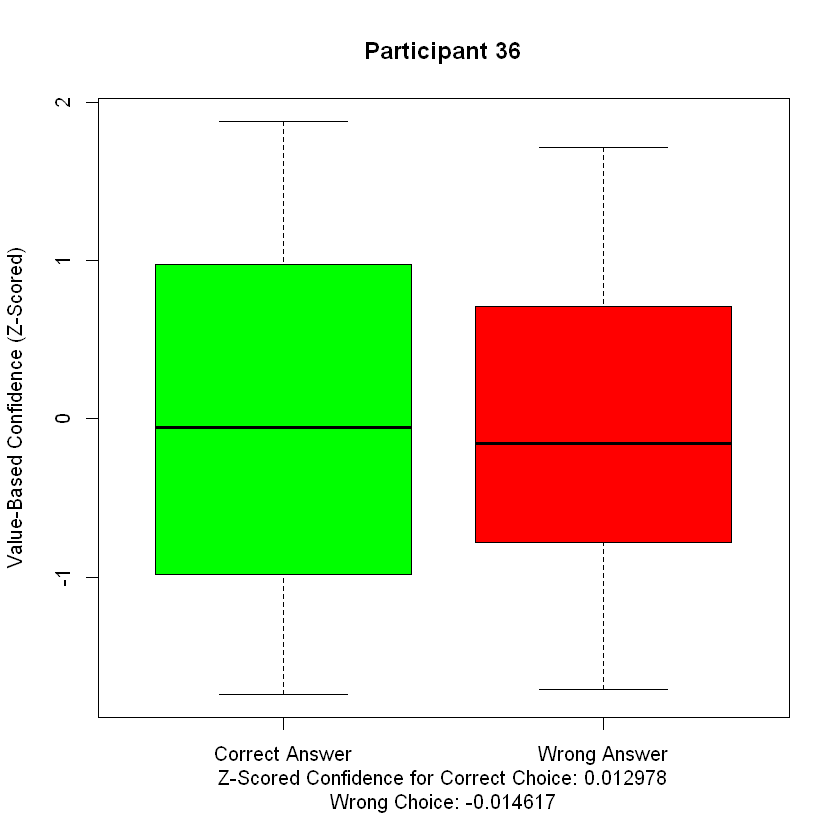

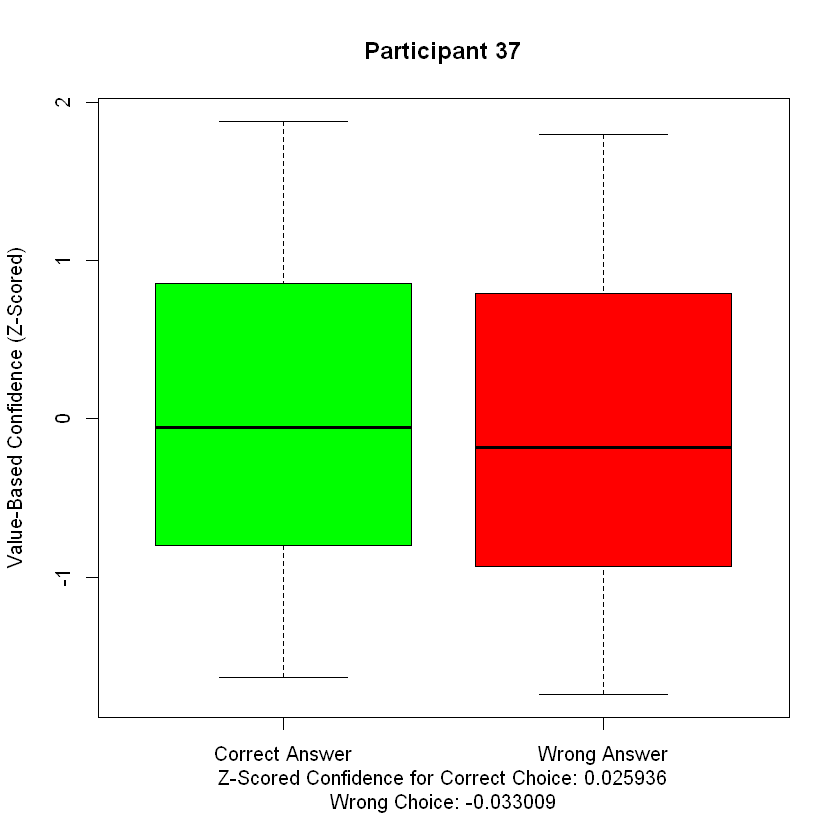

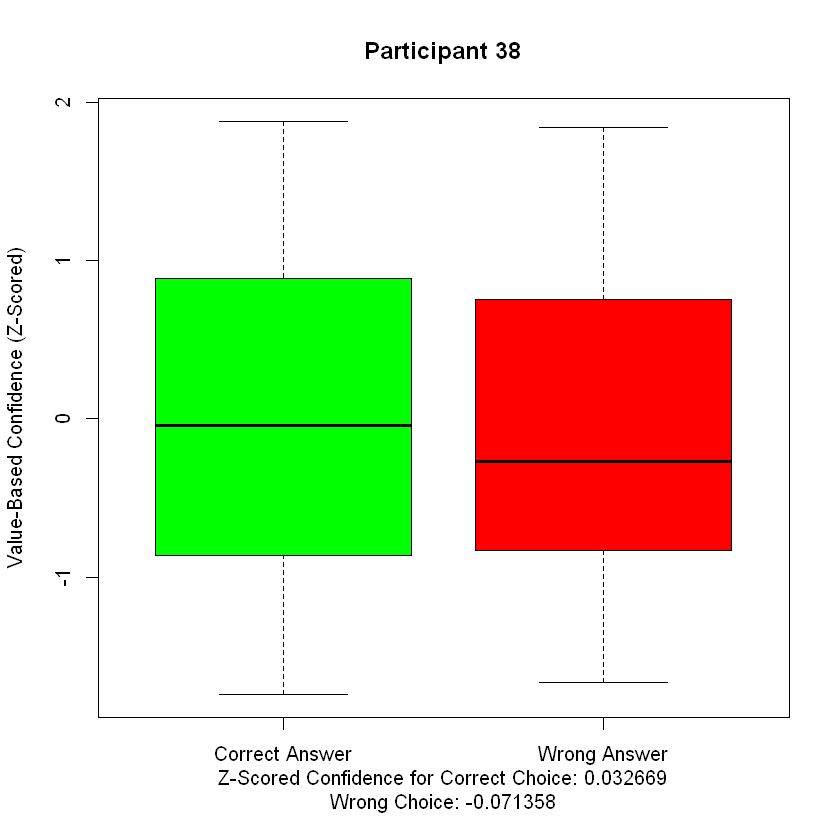

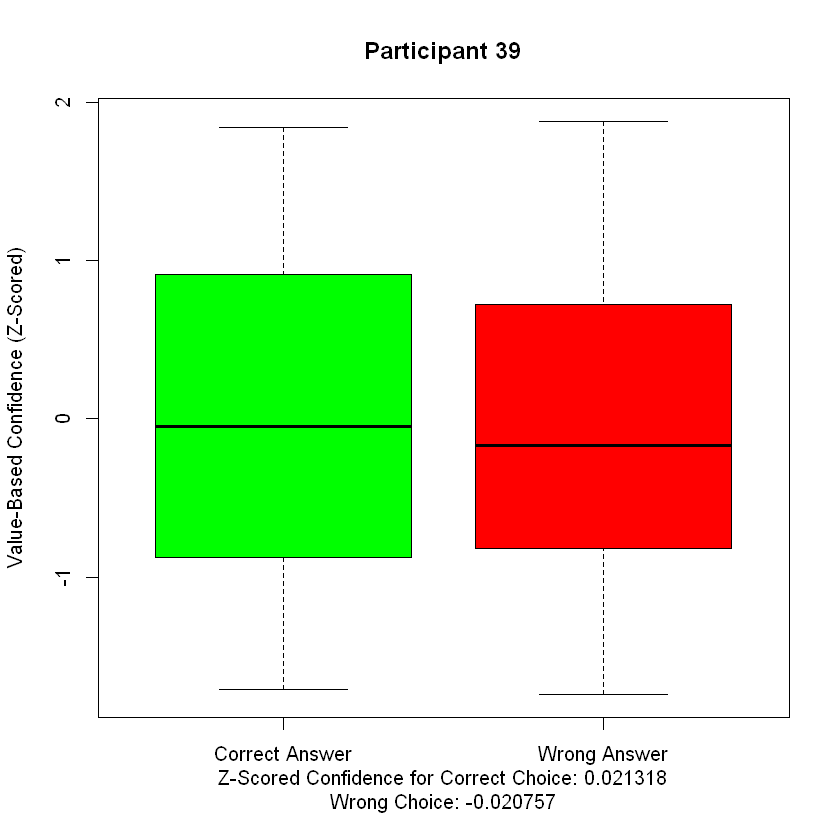

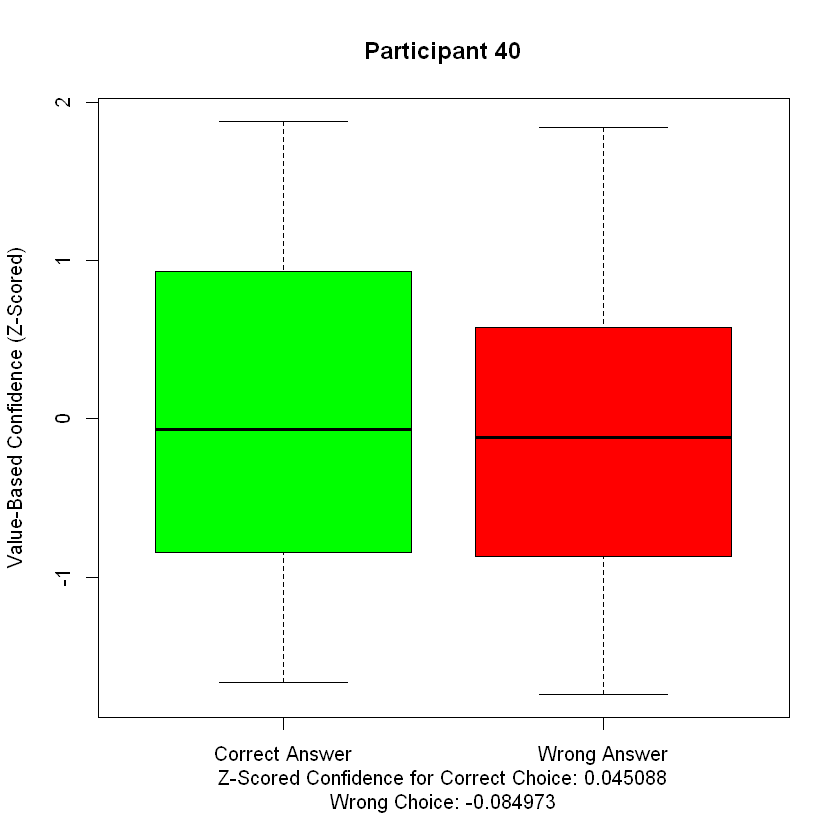

In [81]:
dat['correct_deck'] <- 5
dat$correct_deck[which((dat$chosen_deck == 'O' & dat$deck_prob1 >= dat$deck_prob2) |
                         (dat$chosen_deck == 'B' & dat$deck_prob2 > dat$deck_prob1))] <- 1
dat$correct_deck[which(dat$correct_deck != 1)] <- 0

i <- 1
while(i<=40){
    
        a <- mean(dat$z_V_Conf[which(dat$correct_deck[dat$participant==i]==1)])
        b <- mean(dat$z_V_Conf[which(dat$correct_deck[dat$participant==i]==0)])

        boxplot(dat$z_V_Conf[which(dat$correct_deck[dat$participant==i]==1)],dat$z_V_Conf[which(dat$correct_deck[dat$participant==i]==0)] , 
            data=dat, col = c('green', 'red'), main = sprintf("Participant %s", i), ylab= 'Value-Based Confidence (Z-Scored)', 
            names = c('Correct Answer', 'Wrong Answer'), xlab= sprintf('Z-Scored Confidence for Correct Choice: %f\nWrong Choice: %f', a, b))
        i <- i + 1
}

<a id='ppevb'></a>

# Participantwise Parameter Estimates for Value-Based Confidence to Predict Value-Based Outcome

Model to predict whether value-based confidence predicts that participant will choose the right deck (deck with higher probability)

In [82]:
fit_log_v <- glmer(correct_deck ~ 1 + z_V_Conf + z_P_Conf + z_V_Rt + z_P_Rt + (1 +z_V_Conf + z_P_Conf + z_P_Rt + z_V_Rt|participant),
                data=dat, family = binomial(link="logit"))

vc <- ranef(fit_log_v)$participant[, "z_V_Conf"] + fixef(fit_log_v)[2]
z_vc <- (vc- mean(vc)) / sd(vc)

which(z_vc < -3 | z_vc > 3)

integer(0)

No participant seems to be 3 standard deviation away while value-based confidence predicting value-based outcome(whether participants choose the deck with higher payoff probability)

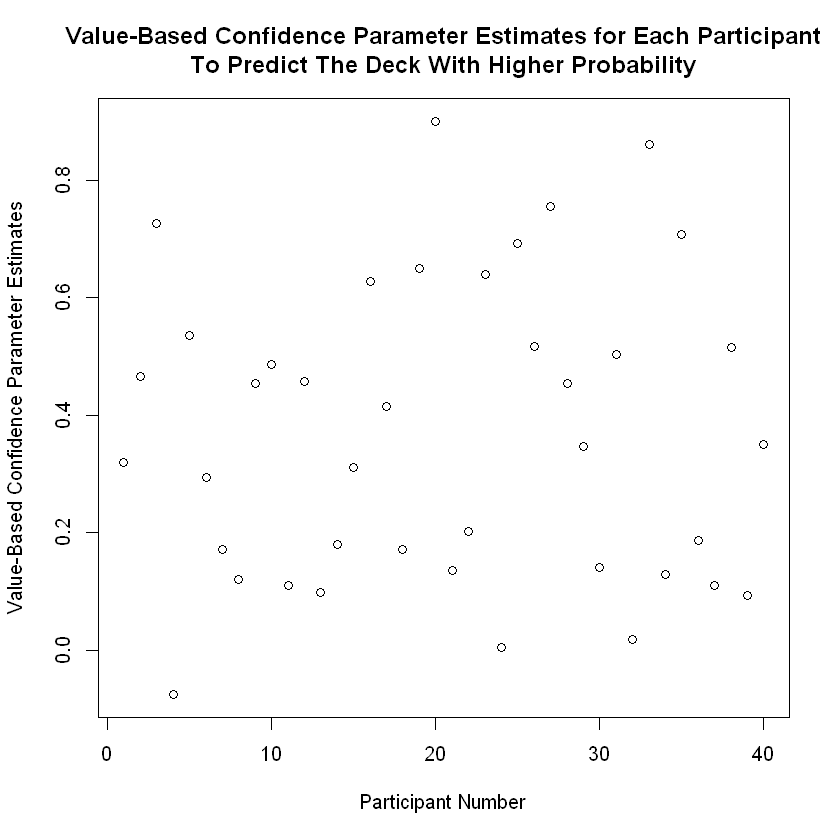

In [105]:
plot(seq(1,40), vc, xlab= c('Participant Number'), ylab = c('Value-Based Confidence Parameter Estimates'), main = 'Value-Based Confidence Parameter Estimates for Each Participant\nTo Predict The Deck With Higher Probability')

So for almost every participant, higher levels of value-based confidence predicts higher number of choosing the right deck.

# [Back to Content](#content)

<a id='relvcvrt'></a>

# Relationship Between Value-Based Confidence and Value-Based Response Time

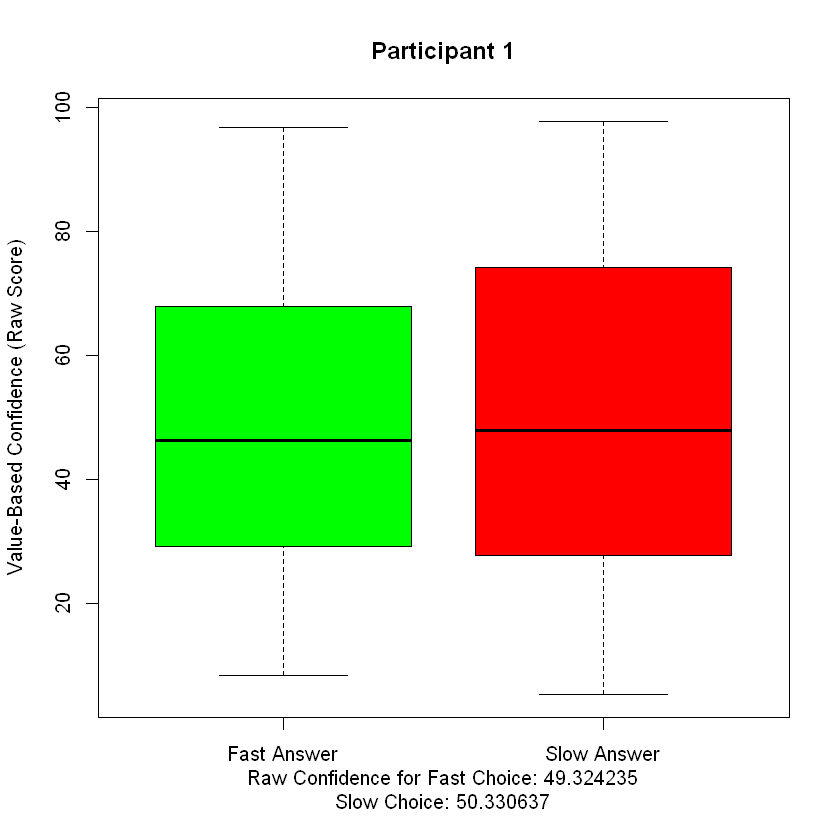

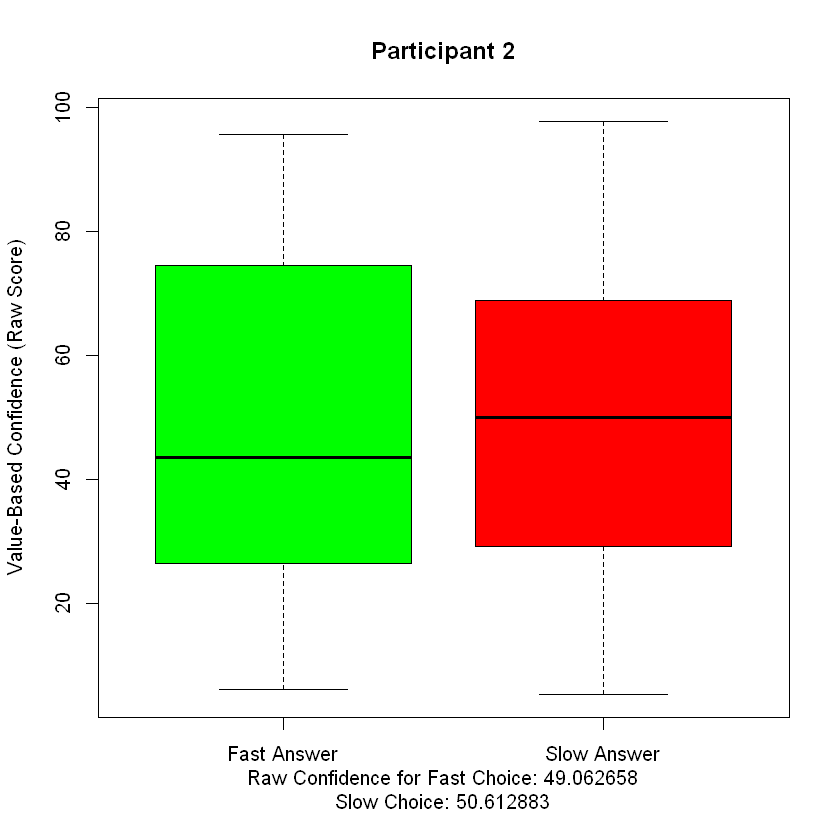

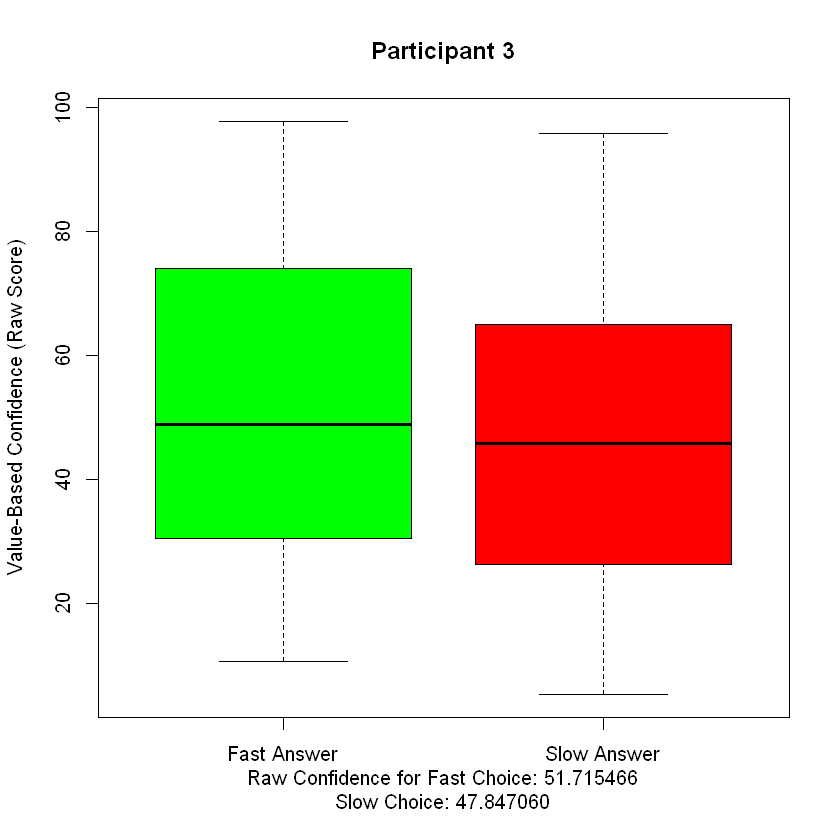

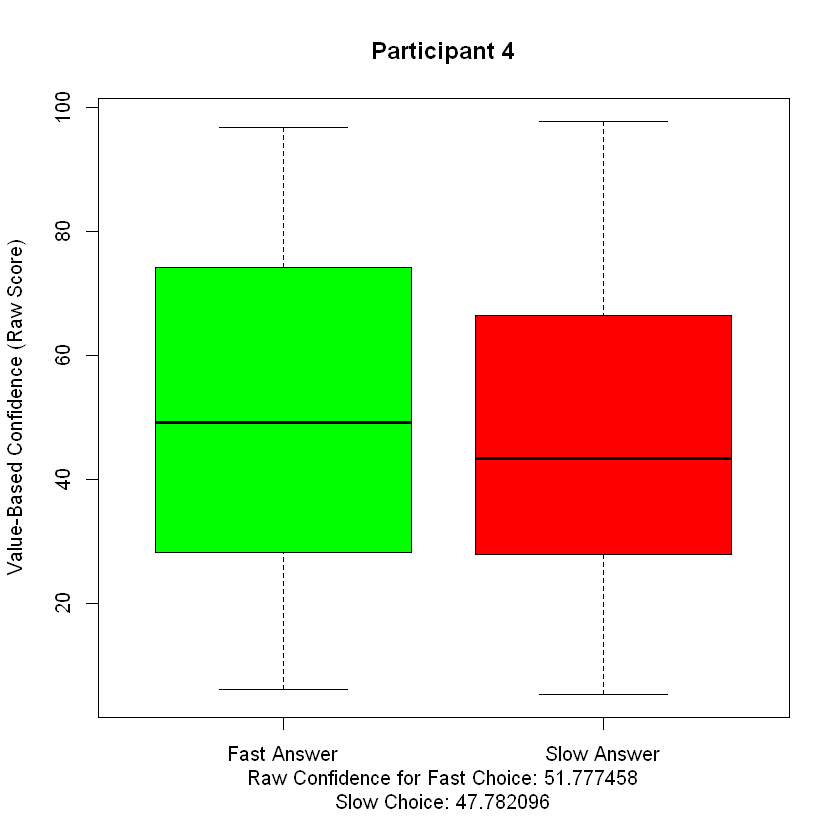

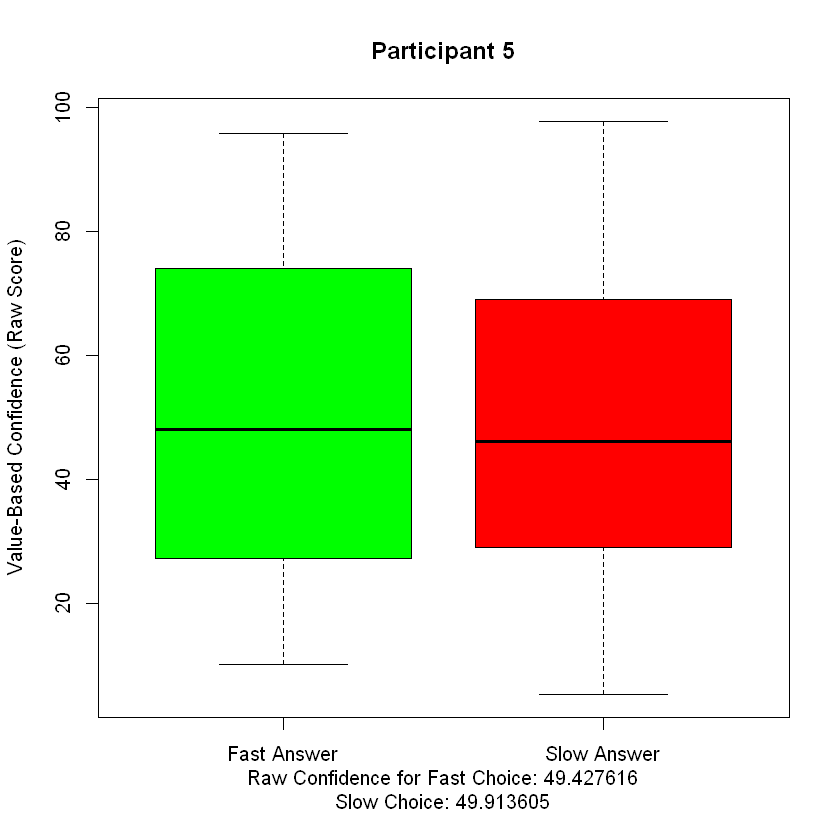

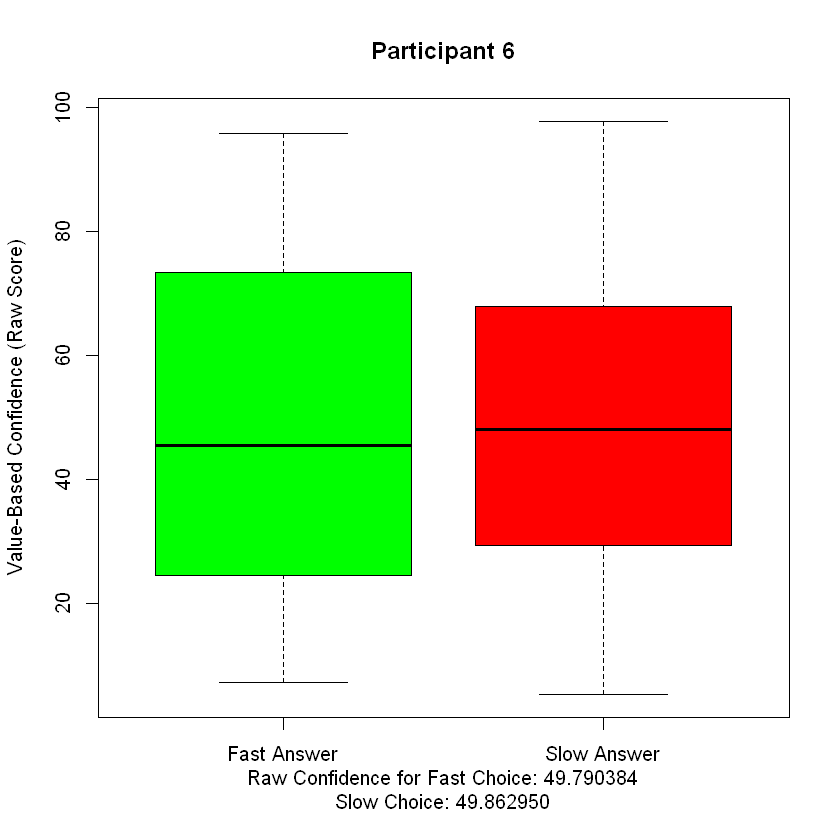

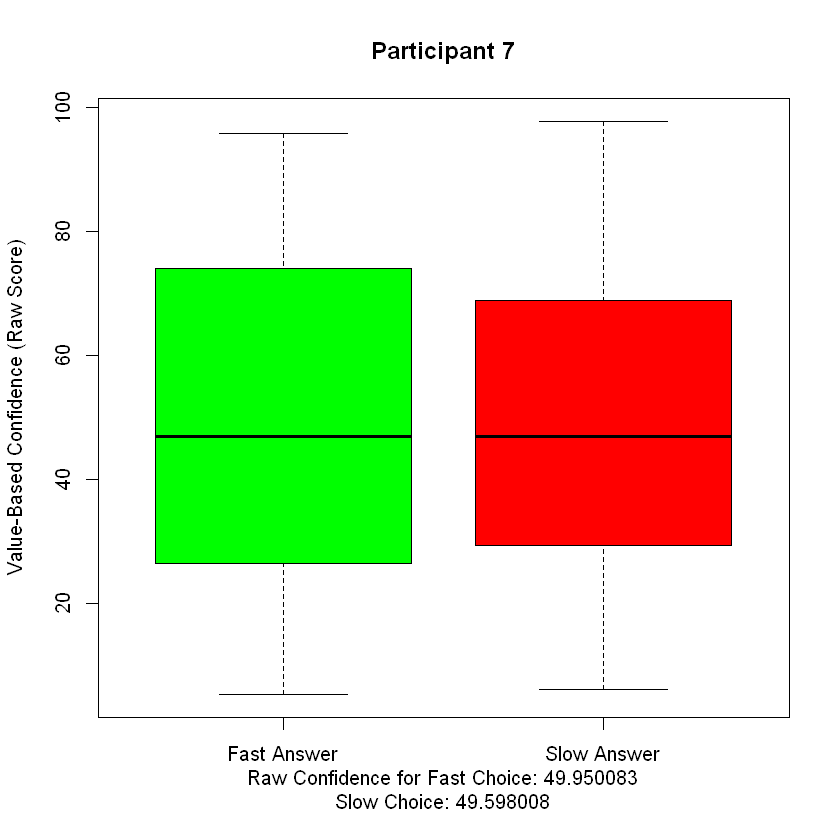

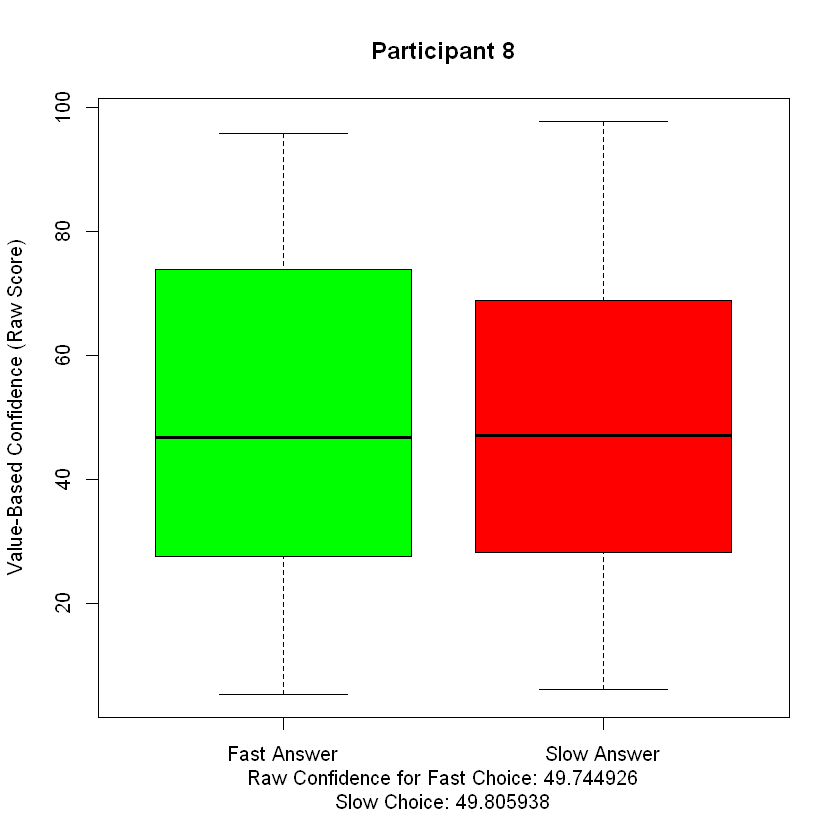

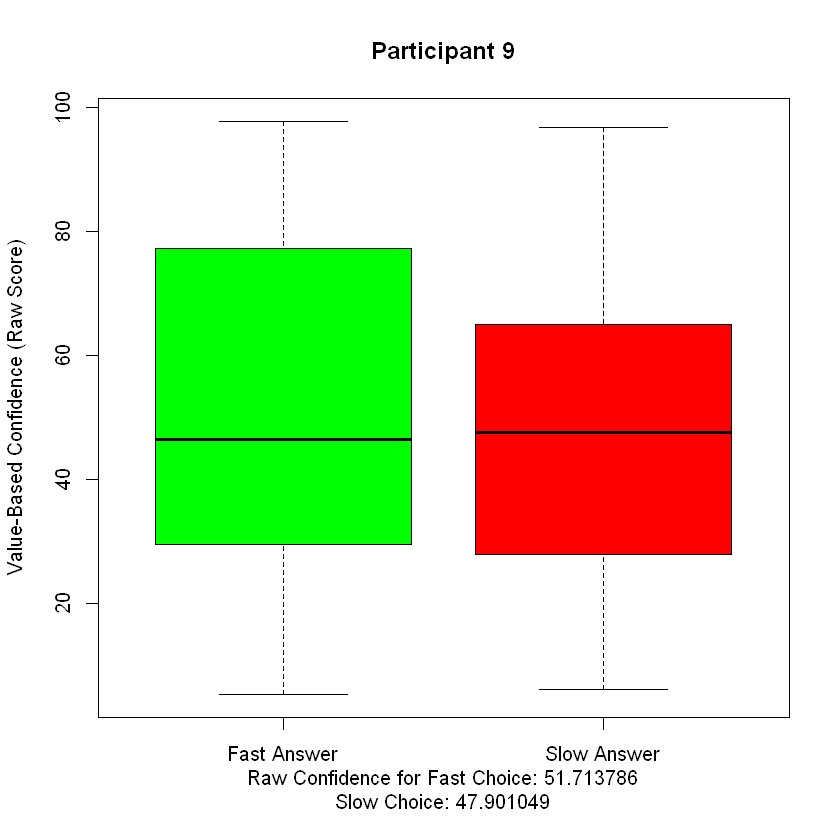

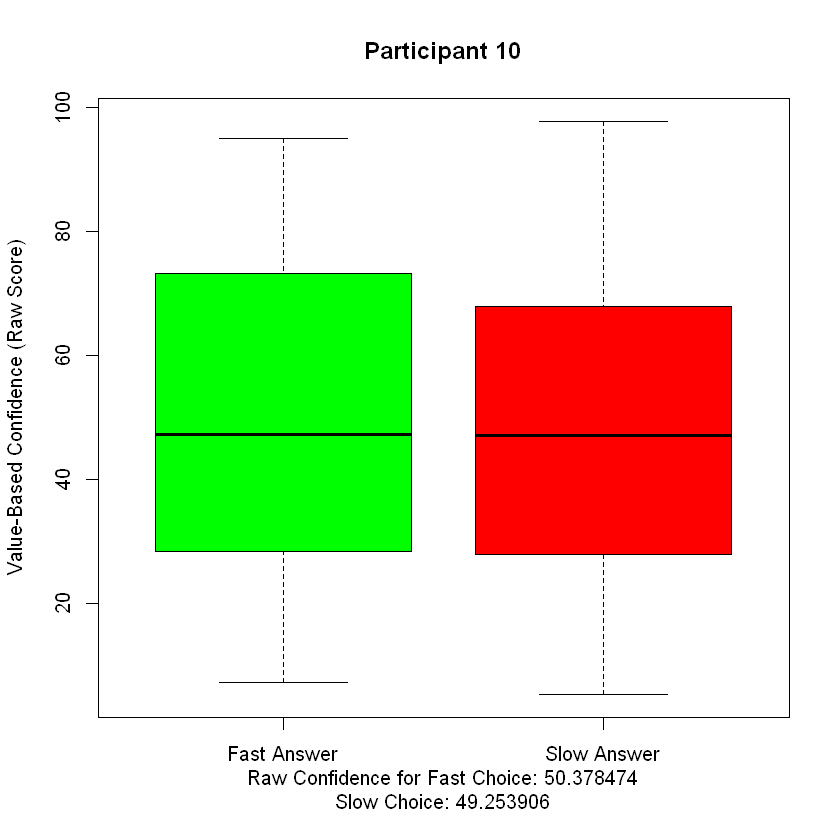

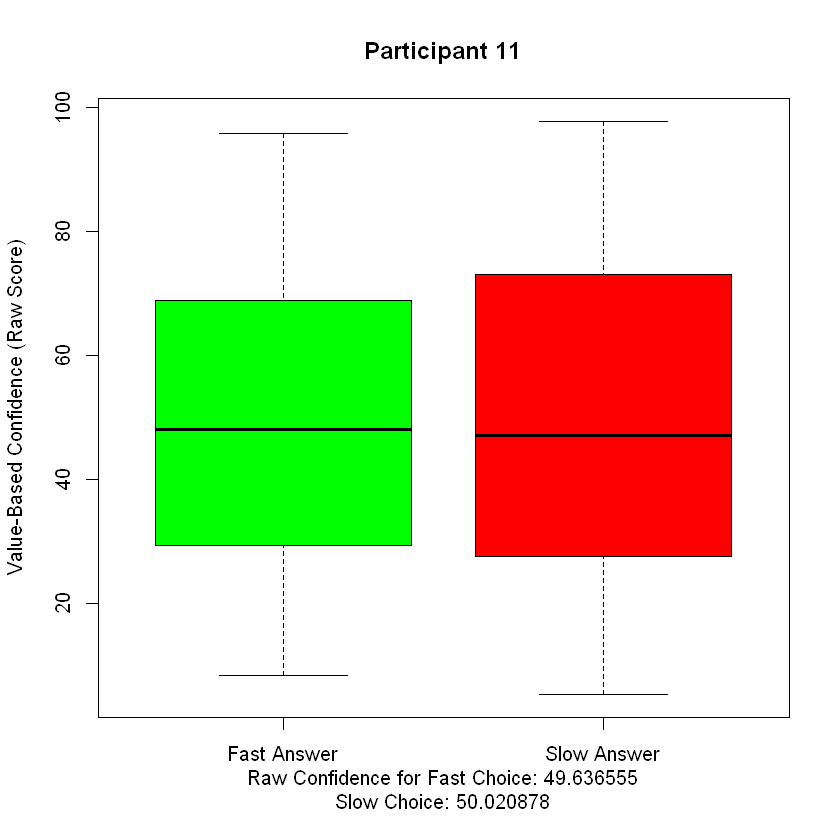

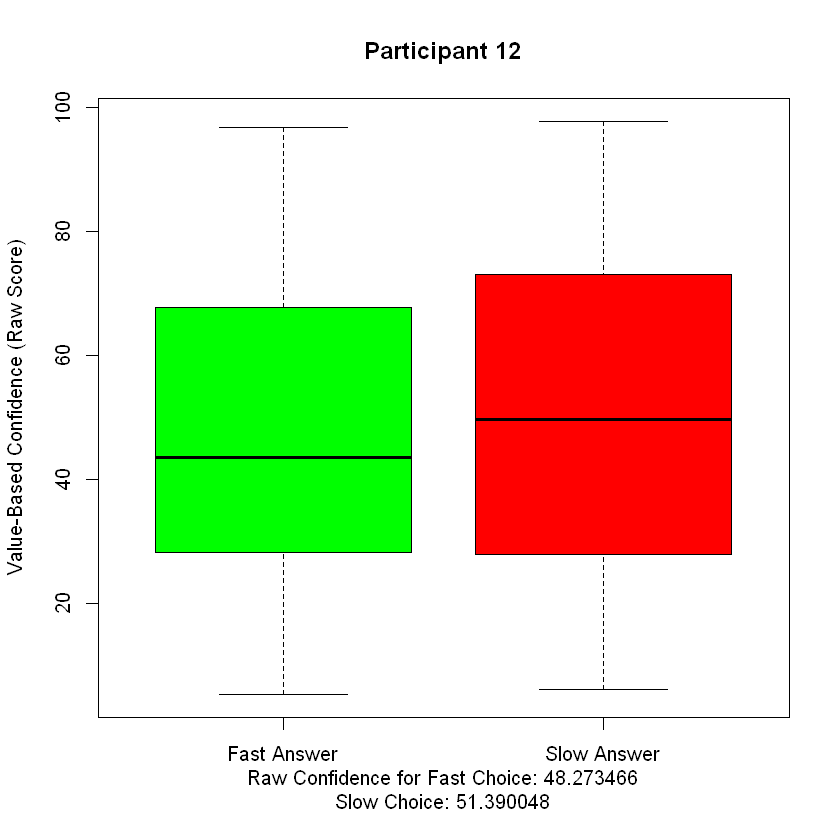

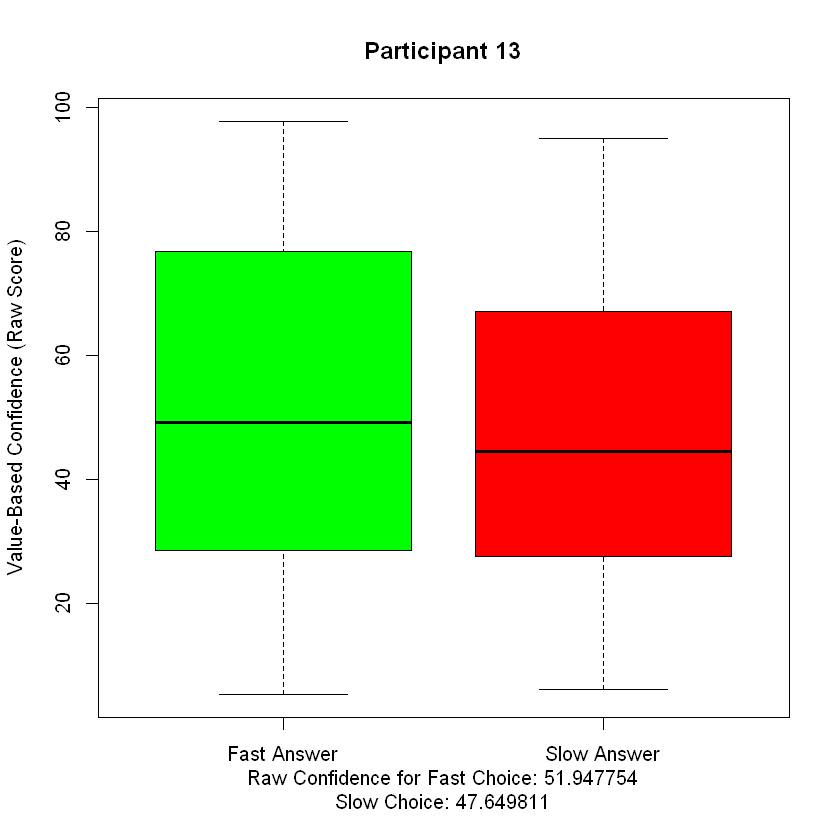

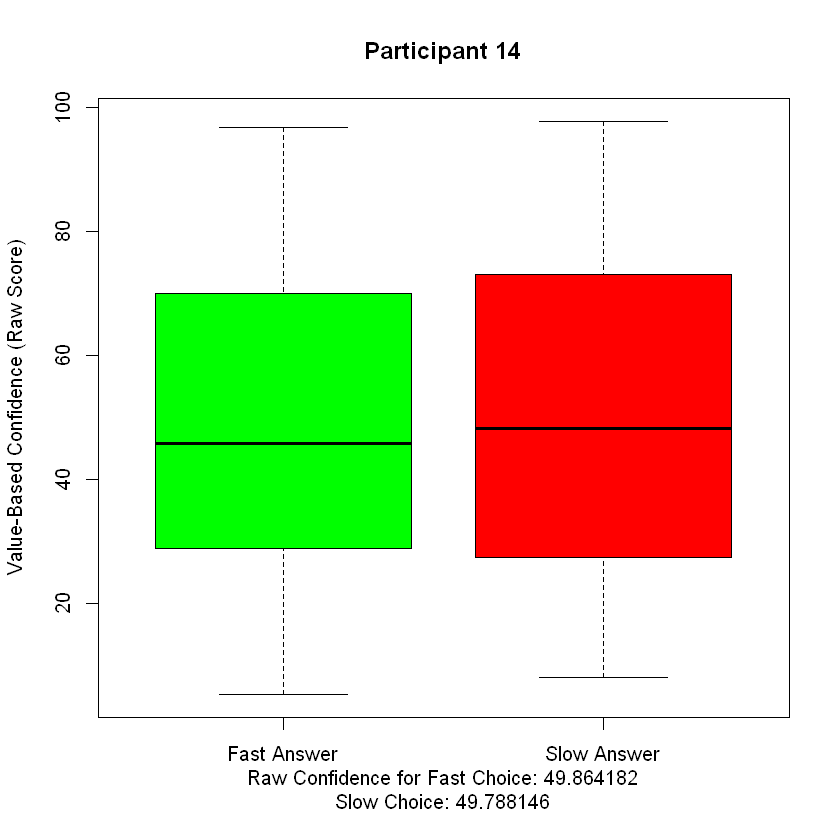

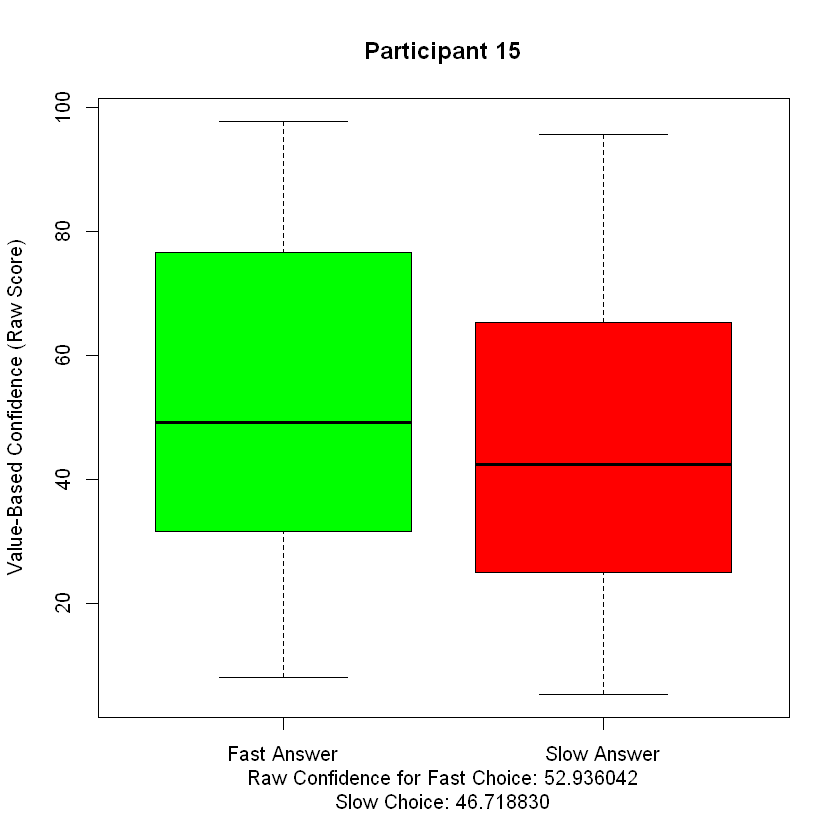

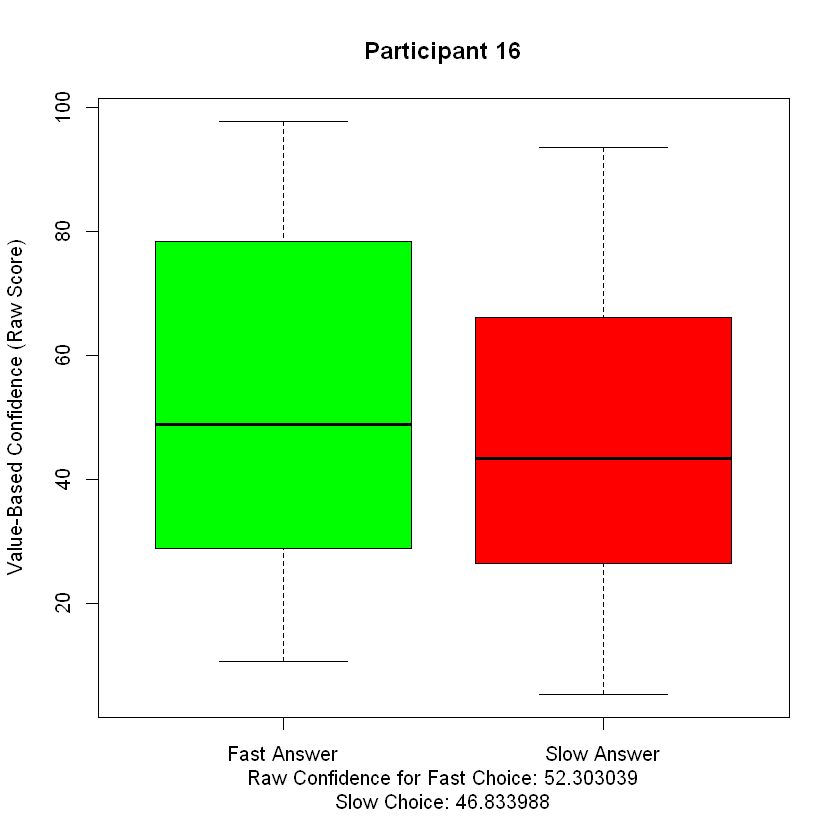

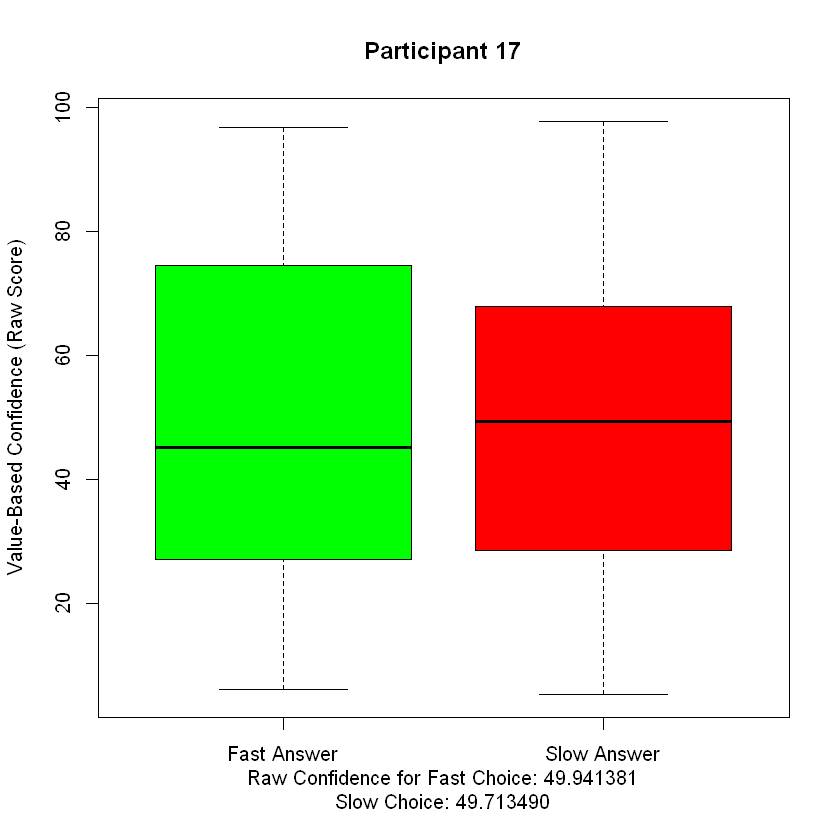

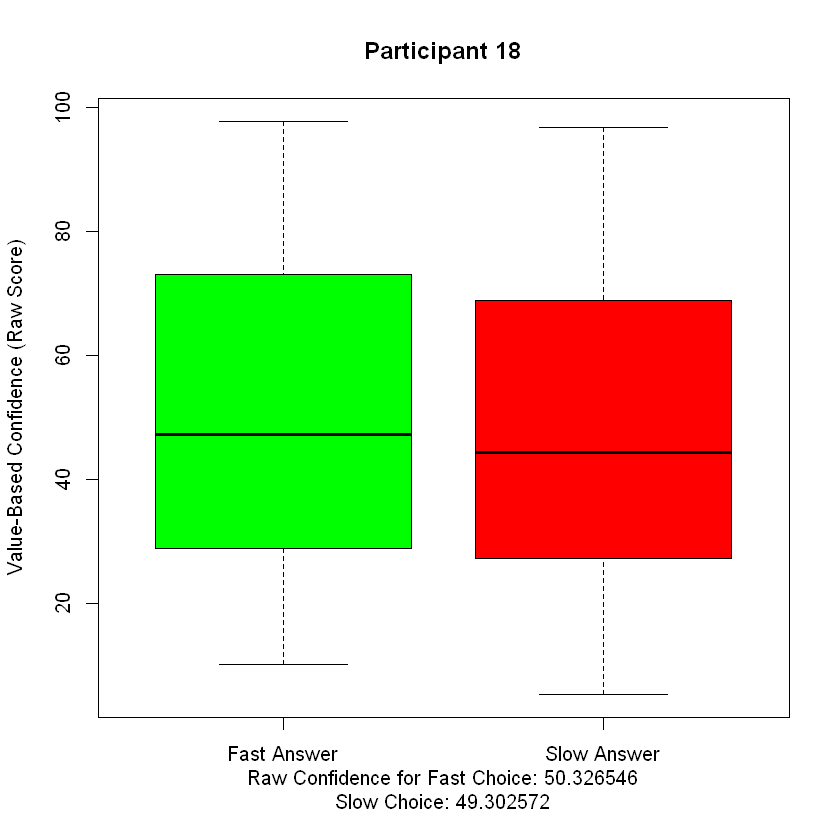

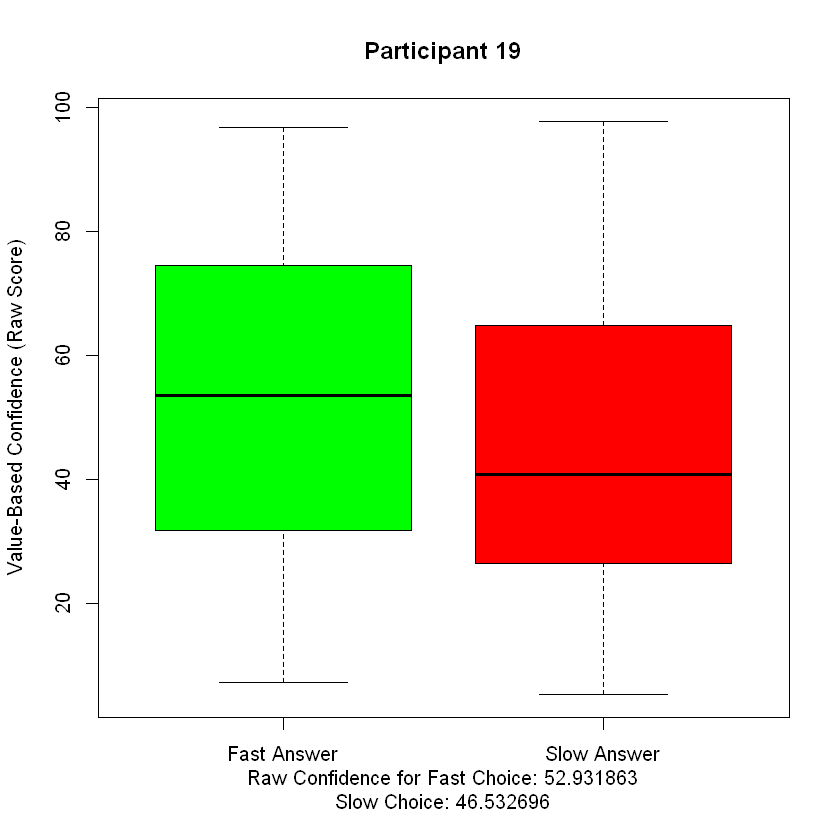

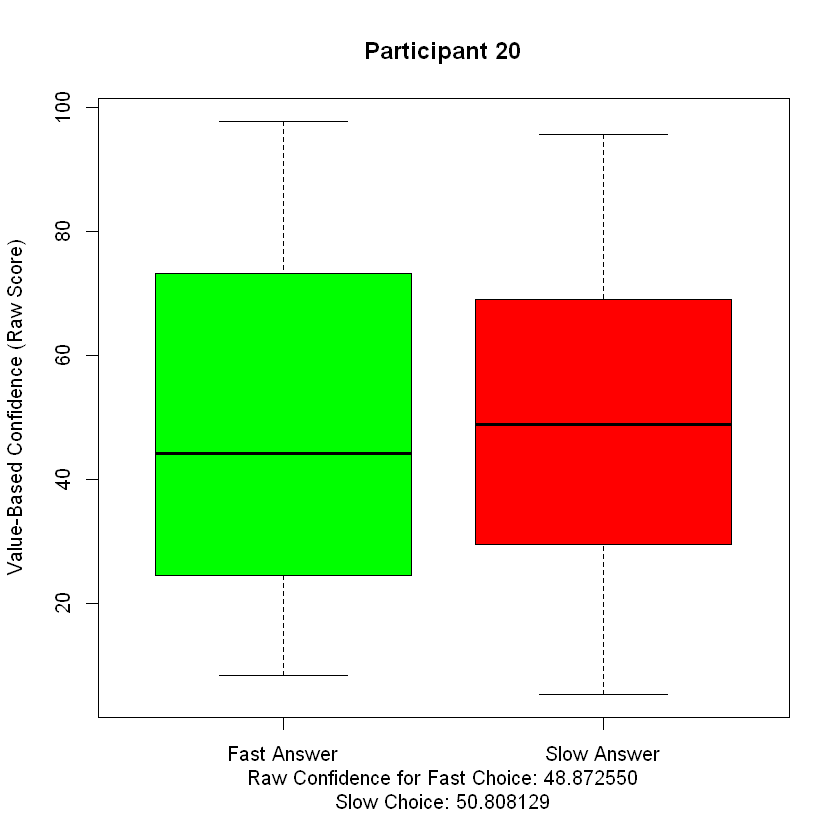

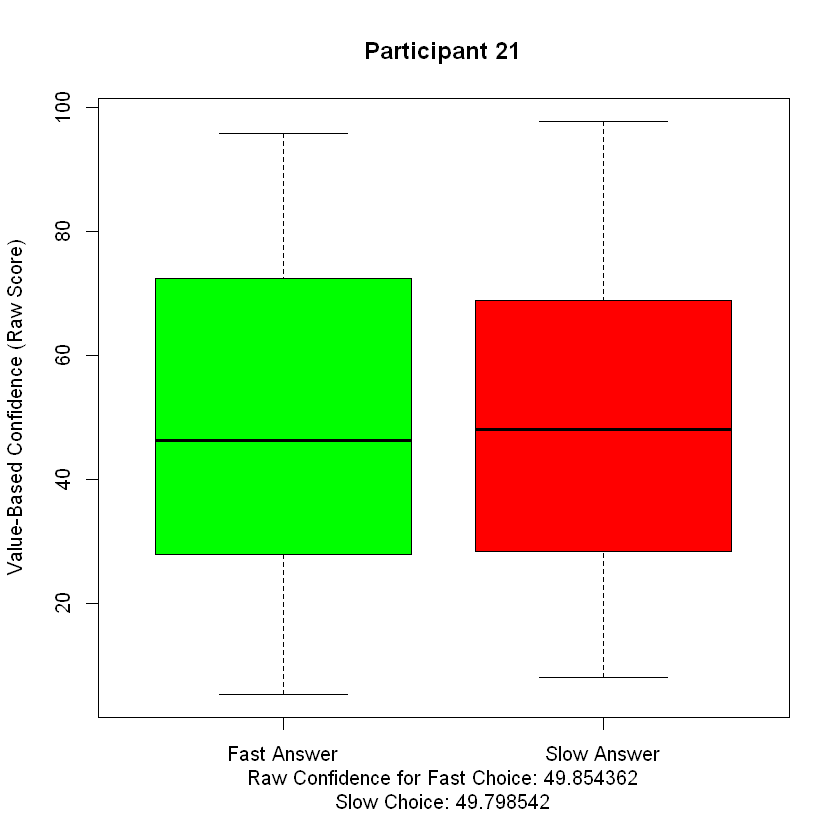

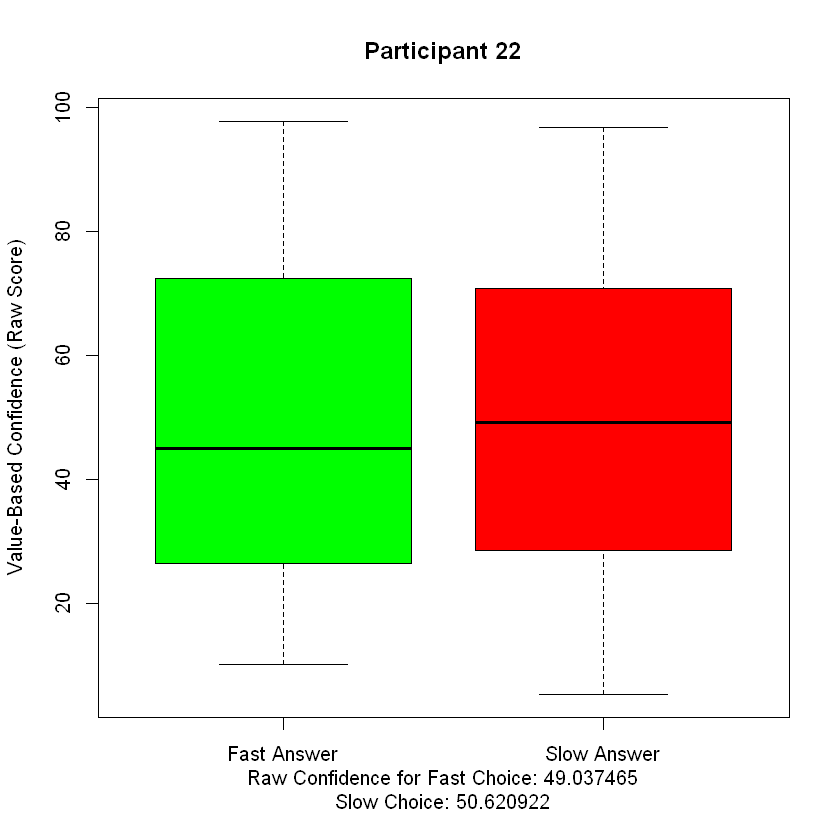

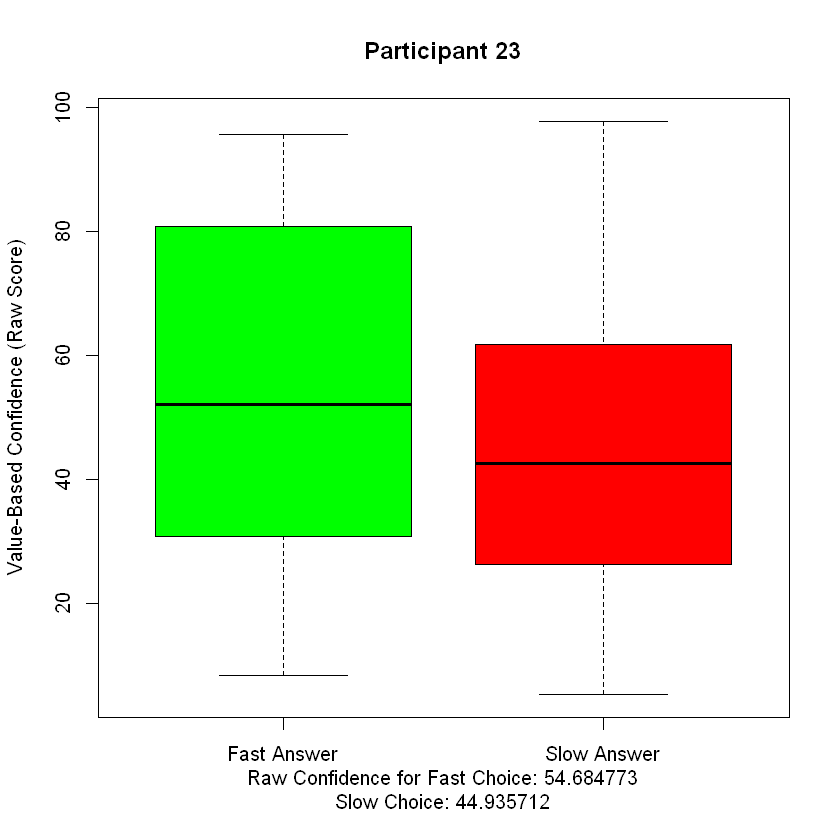

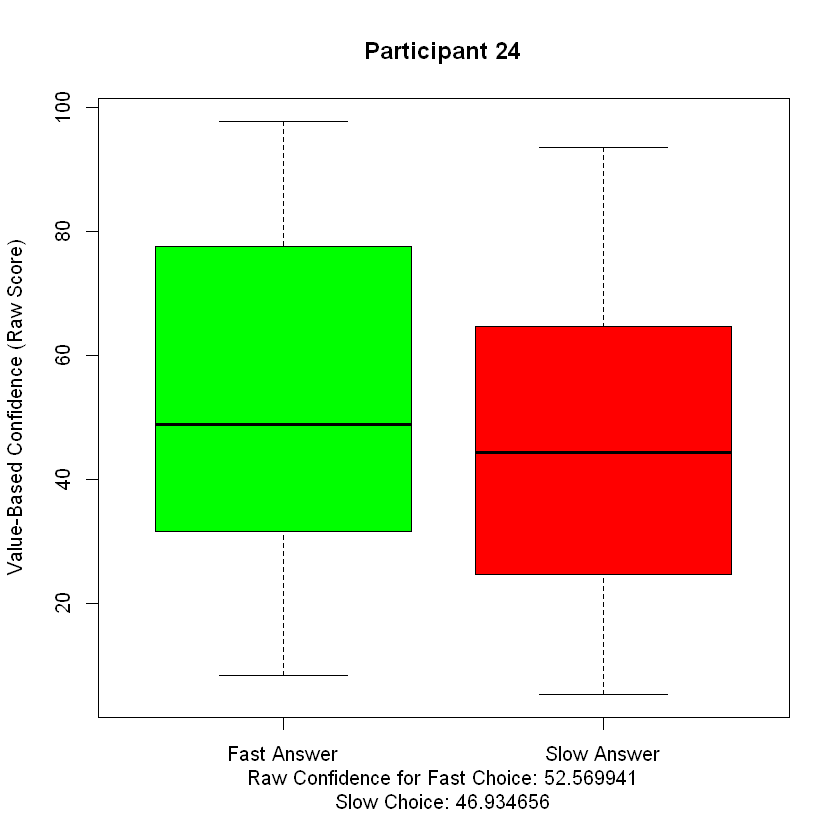

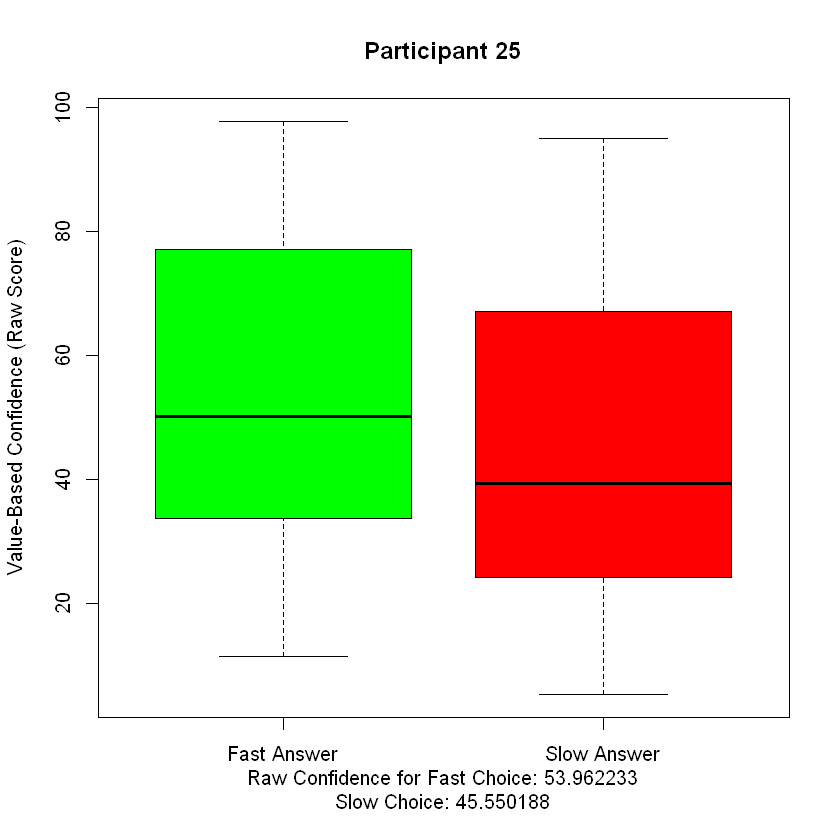

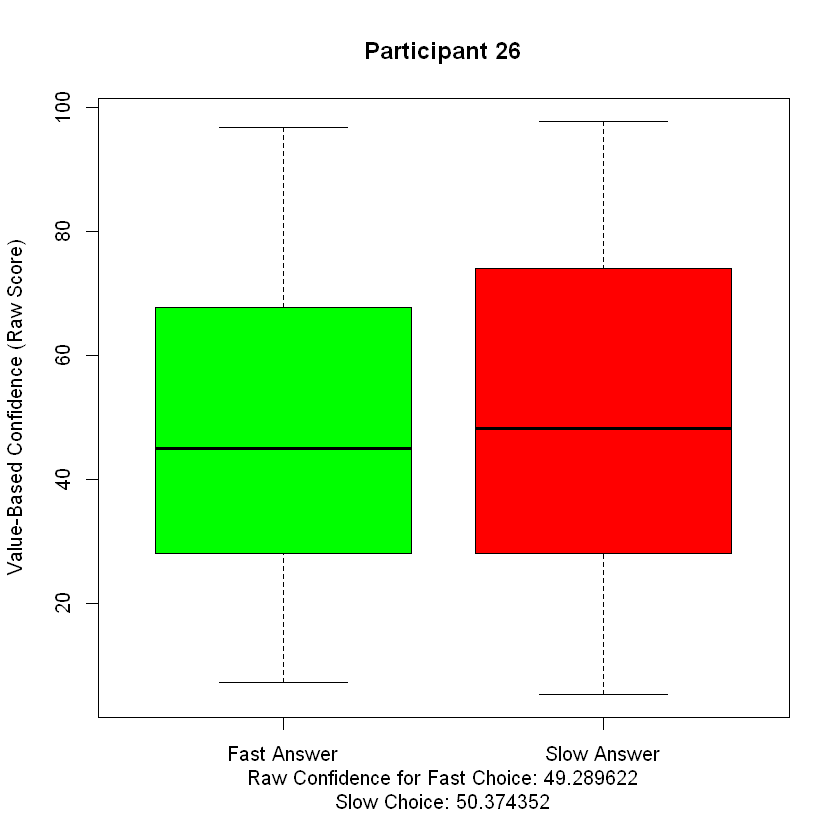

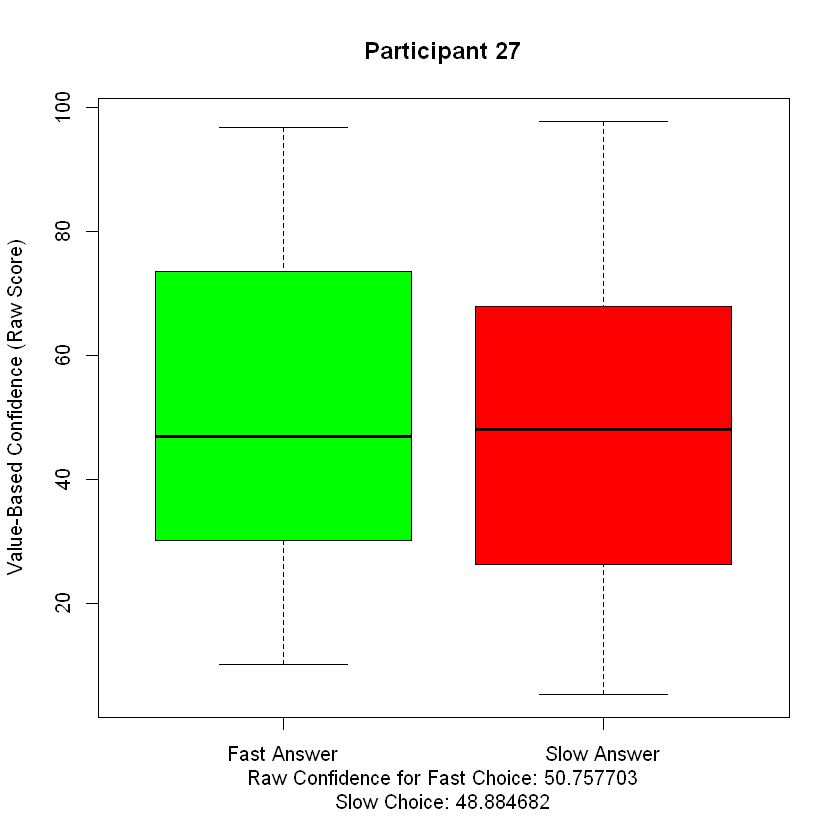

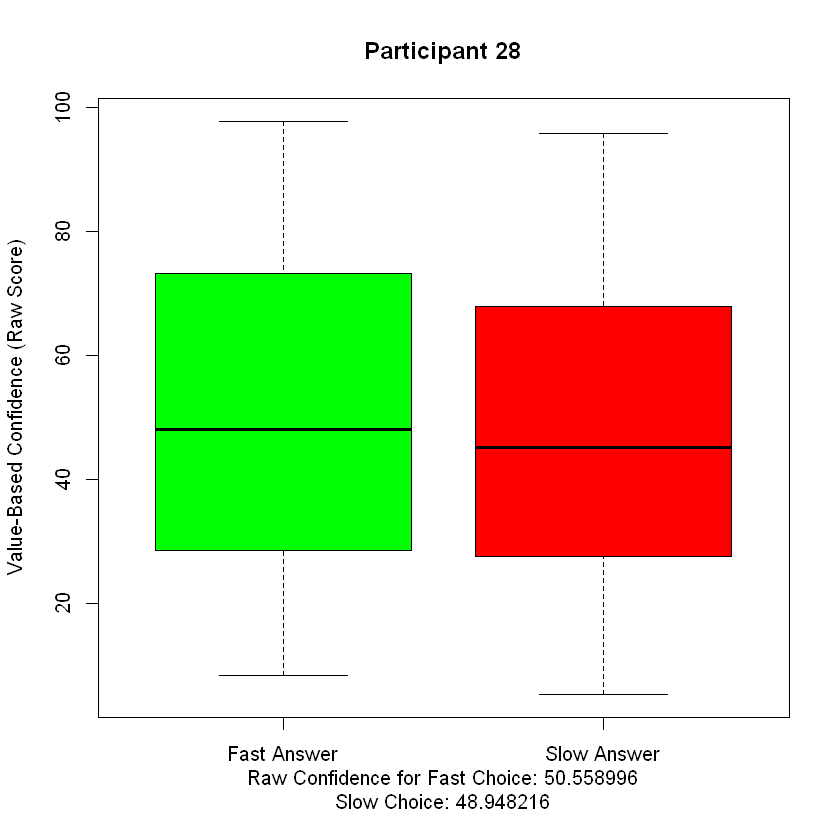

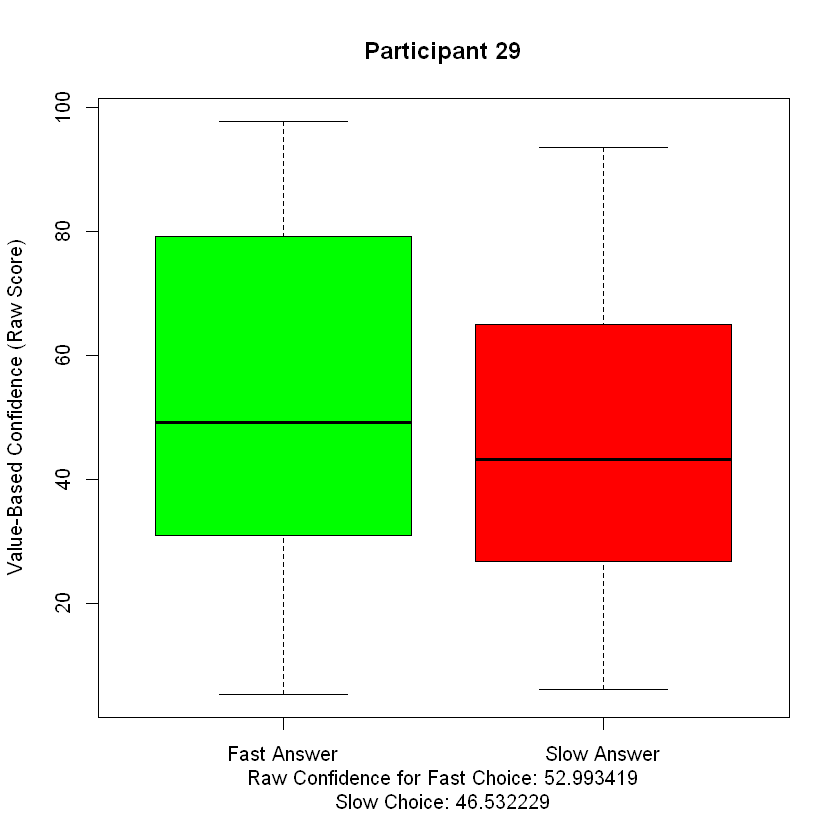

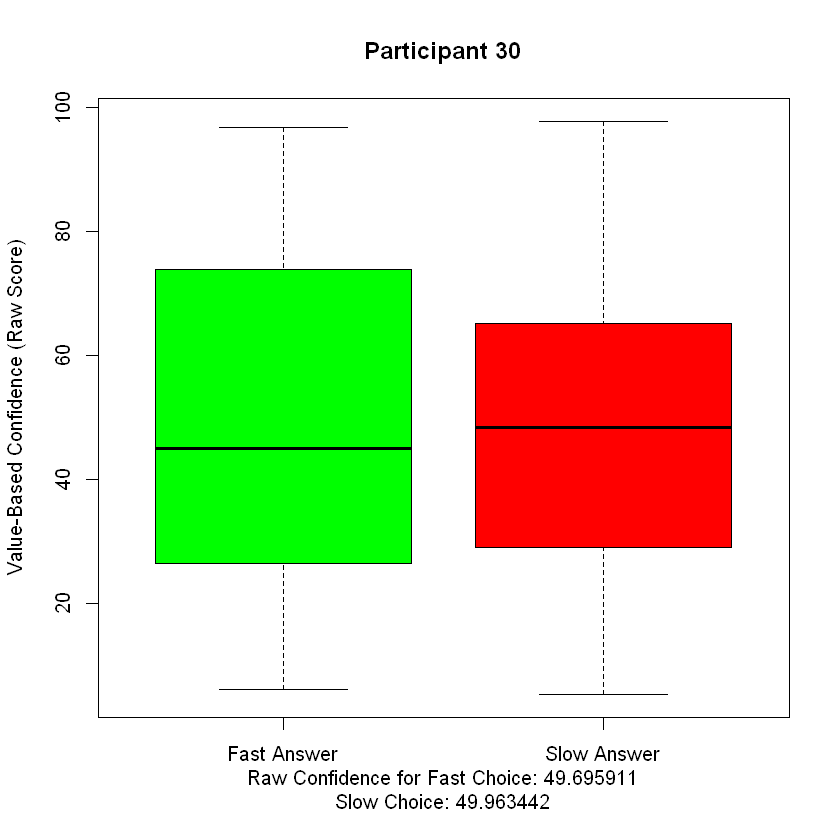

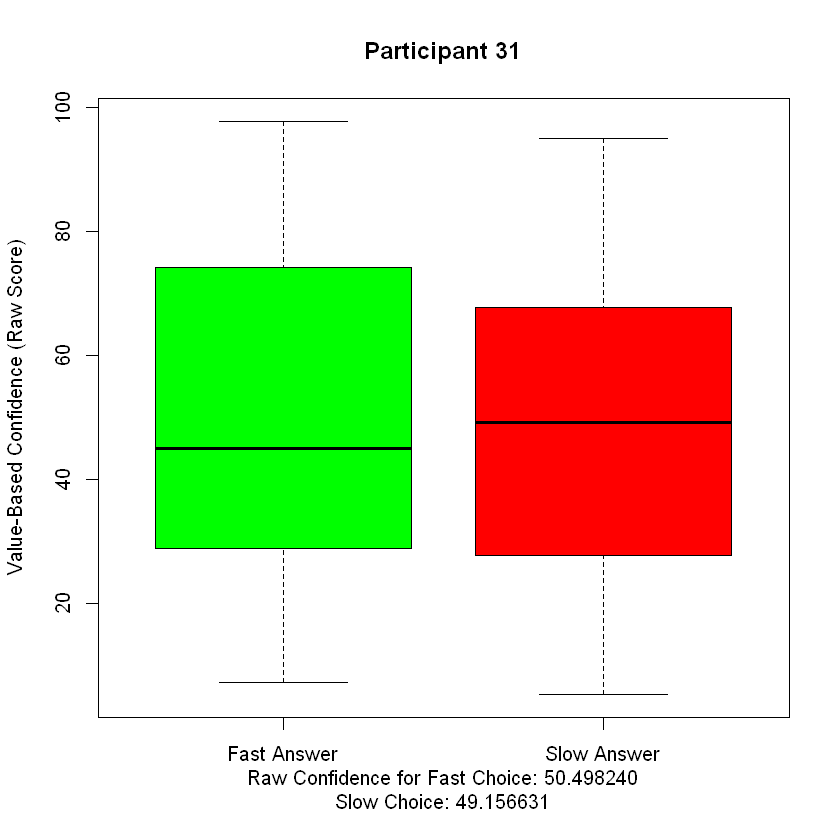

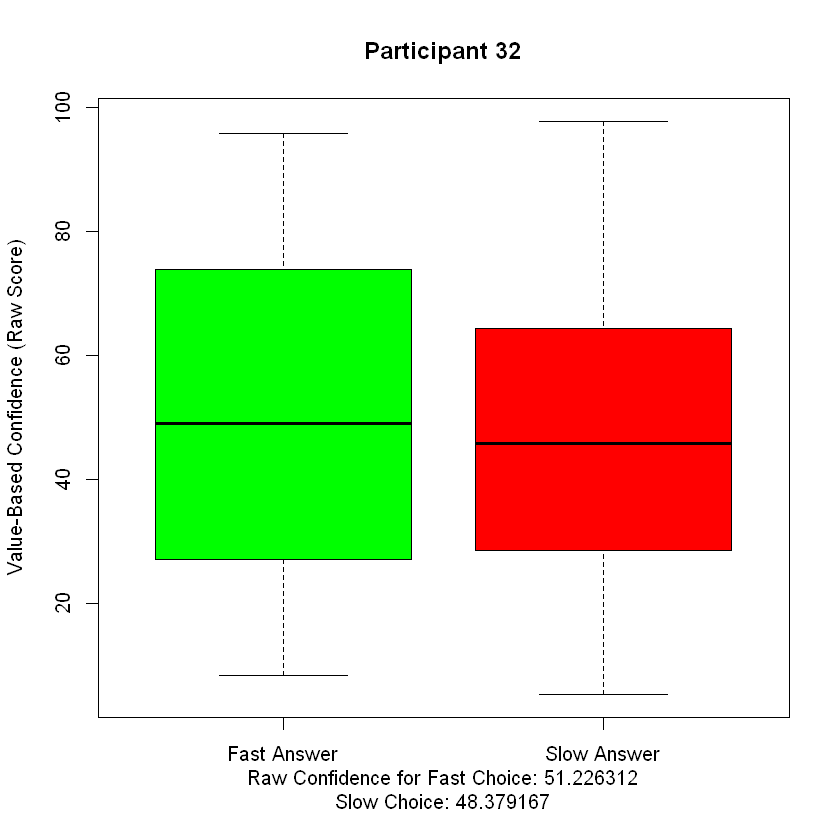

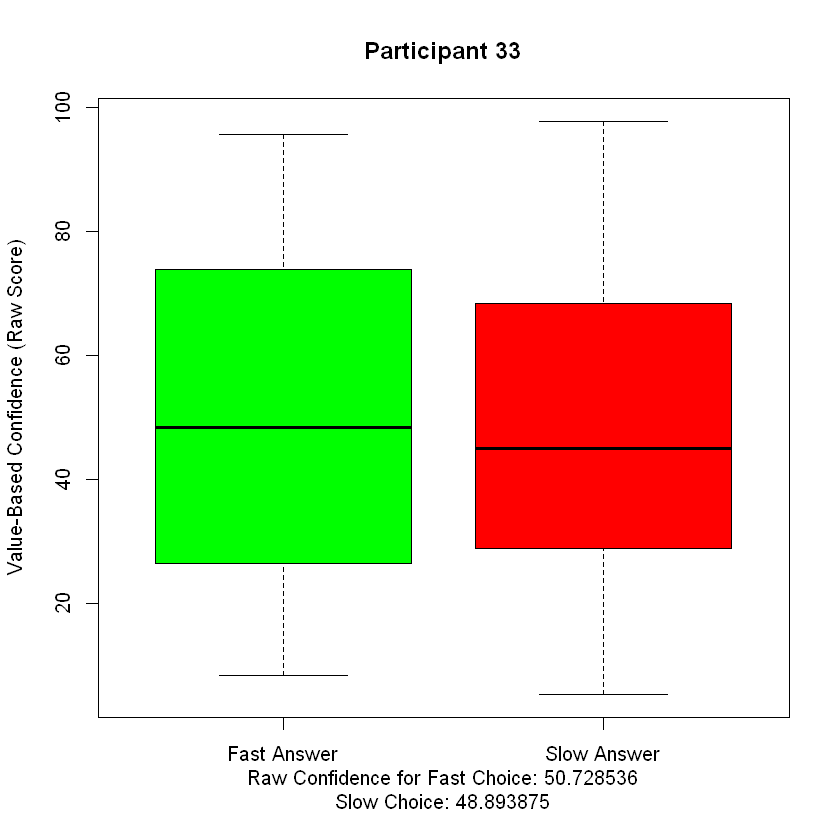

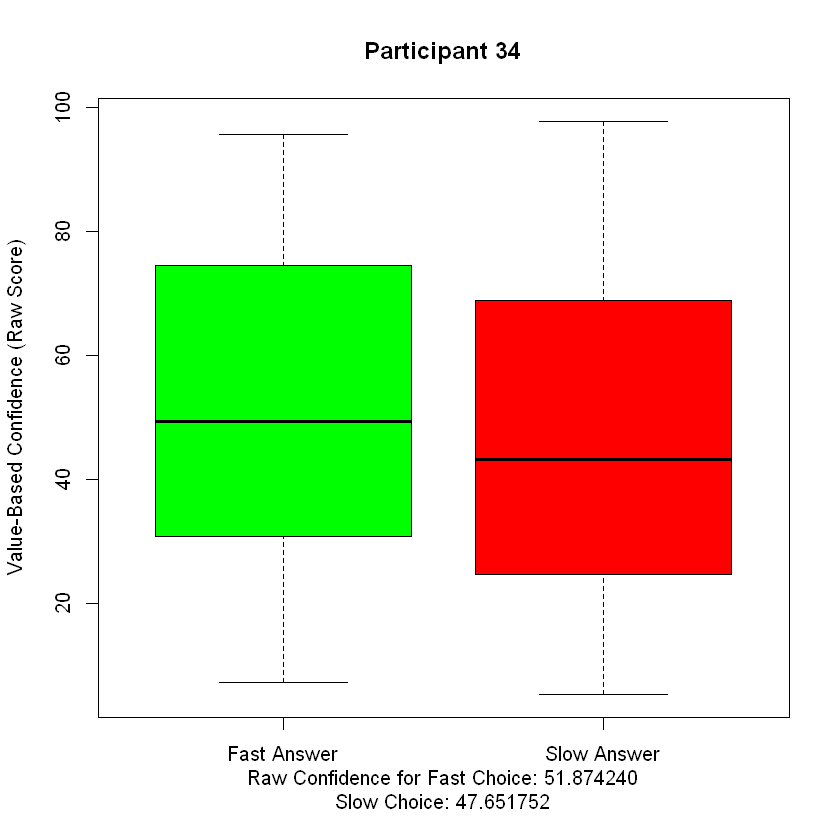

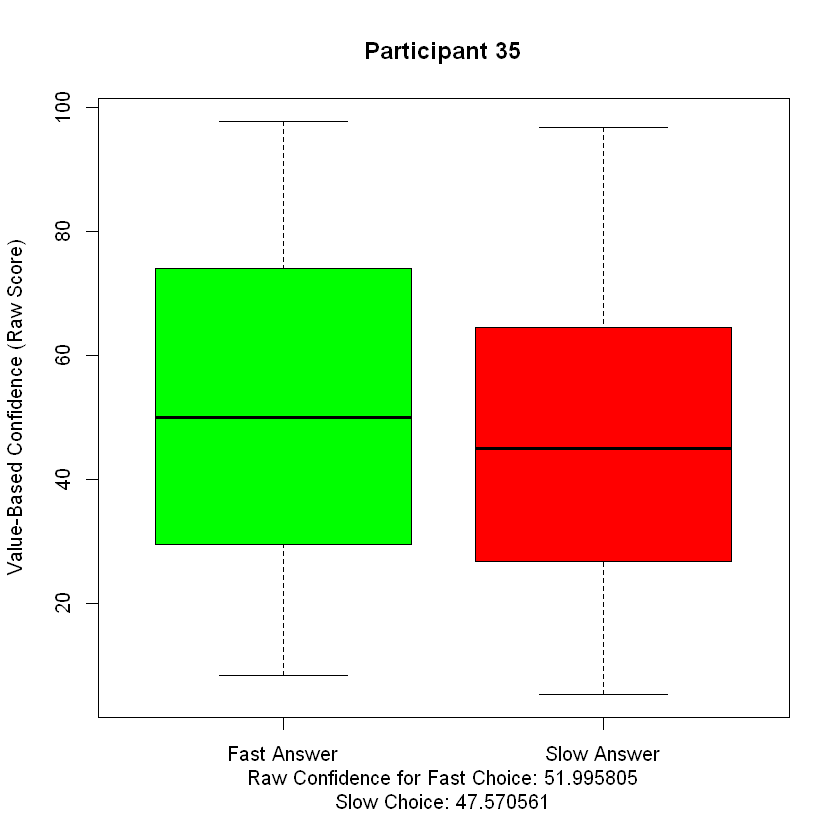

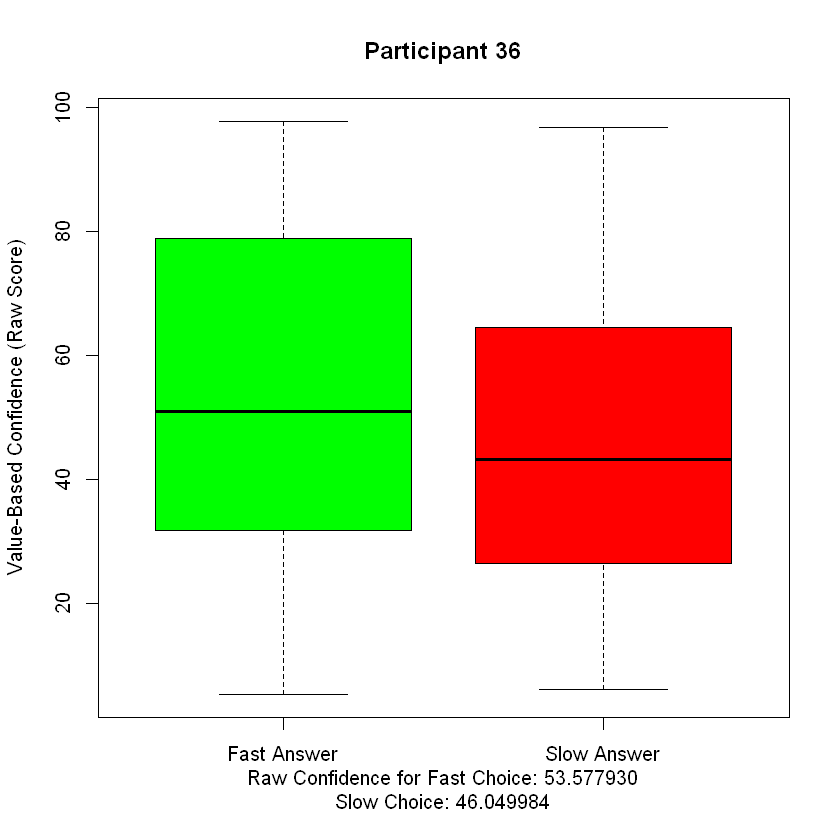

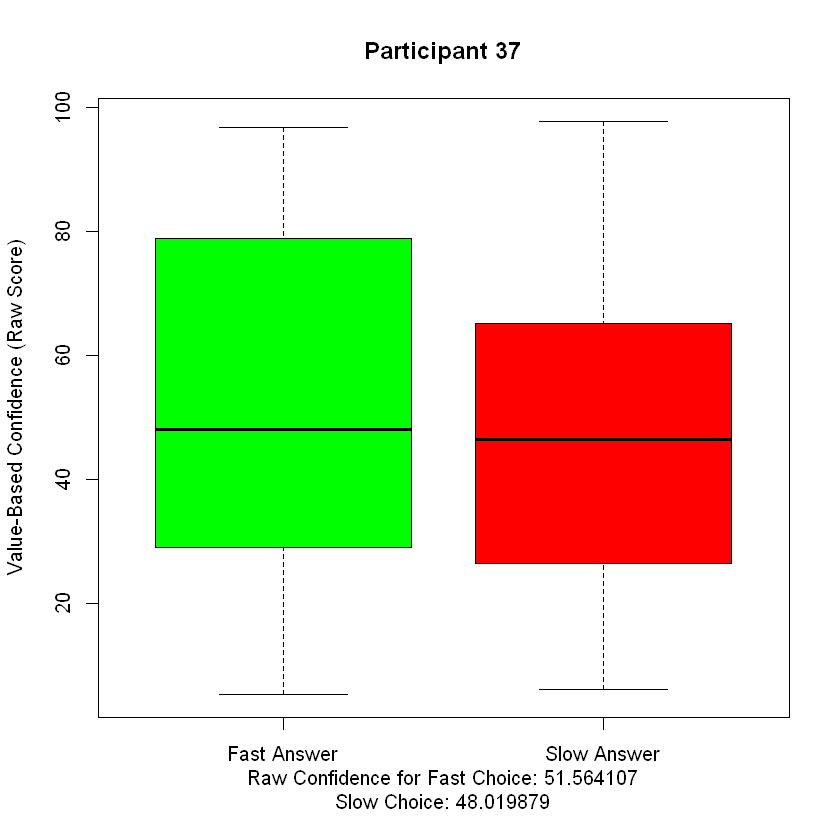

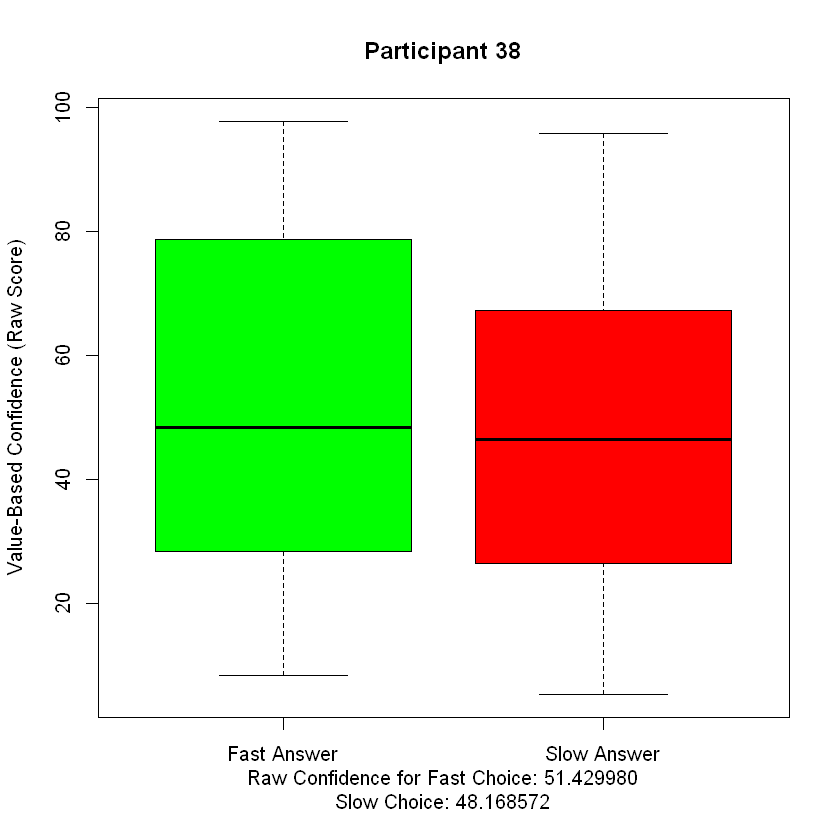

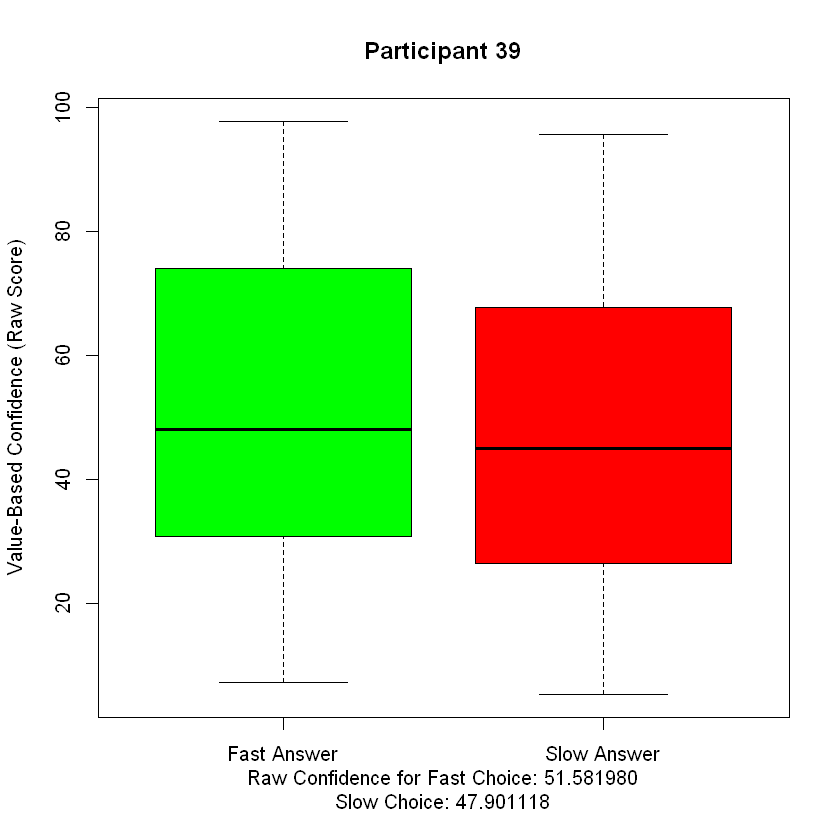

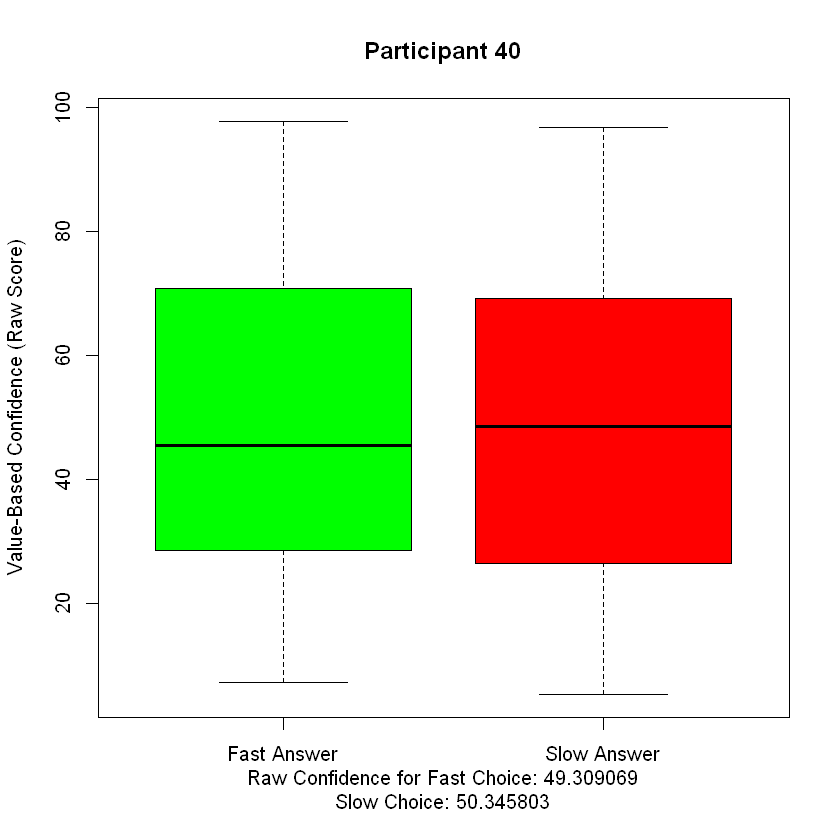

In [84]:
i <- 1
while(i<=40){
    
        a <- mean(dat$Value_Conf[which(dat$Value_Rt[dat$participant==i] <= median(dat$Value_Rt[dat$participant==i]))])
        b <- mean(dat$Value_Conf[which(dat$Value_Rt[dat$participant==i] > median(dat$Value_Rt[dat$participant==i]))])

        boxplot(dat$Value_Conf[which(dat$Value_Rt[dat$participant==i] <= median(dat$Value_Rt[dat$participant==i]))],dat$Value_Conf[which(dat$Value_Rt[dat$participant==i] > median(dat$Value_Rt[dat$participant==i]))] , 
            data=dat, col = c('green', 'red'), main = sprintf("Participant %s", i), ylab= 'Value-Based Confidence (Raw Score)', 
            names = c('Fast Answer', 'Slow Answer'), xlab= sprintf('Raw Confidence for Fast Choice: %f\nSlow Choice: %f', a, b))
        i <- i + 1
}

<a id='ppeprt'></a>

# Participantwise Parameter Estimates for Perceptual Response Time while predicting Perceptual Confidence


In [85]:
fit_log_vbr <- lmer(z_V_Conf ~ z_V_Rt + (1 + z_V_Rt|participant), data=dat)

vbr <- ranef(fit_log_vbr)$participant[, "z_V_Rt"] + fixef(fit_log_pr)[2]
z_vbr <- (vbr- mean(vbr)) / sd(vbr)

which(z_vc < -3 | z_vc > 3)

No participant seems to be 3 standard deviation away while value-based response time predicting value-based confidence

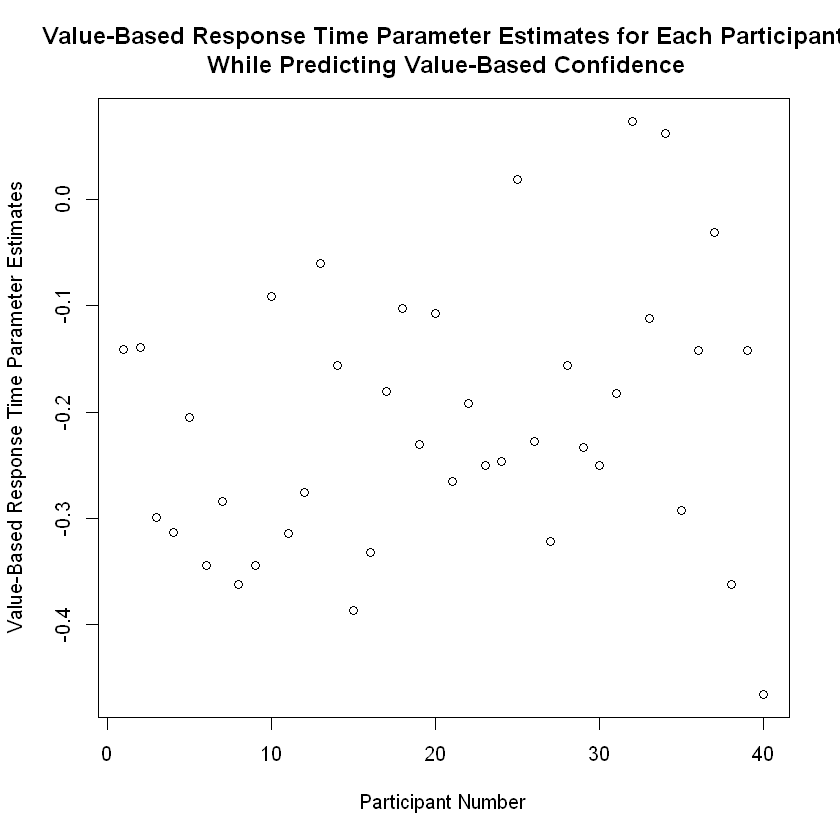

In [88]:
plot(seq(1,40), vbr, xlab= c('Participant Number'), ylab = c('Value-Based Response Time Parameter Estimates'), main = 'Value-Based Response Time Parameter Estimates for Each Participant\n While Predicting Value-Based Confidence')

Faster the response time, higher the confidence.

# [Back to Content](#content)

<a id='redblue'></a>

# How Perceptual (Blue) and Value-Based (Red) Confidence changes through trials

No trend (such as increase/decrease in confidence levels through time) seems to be observed.

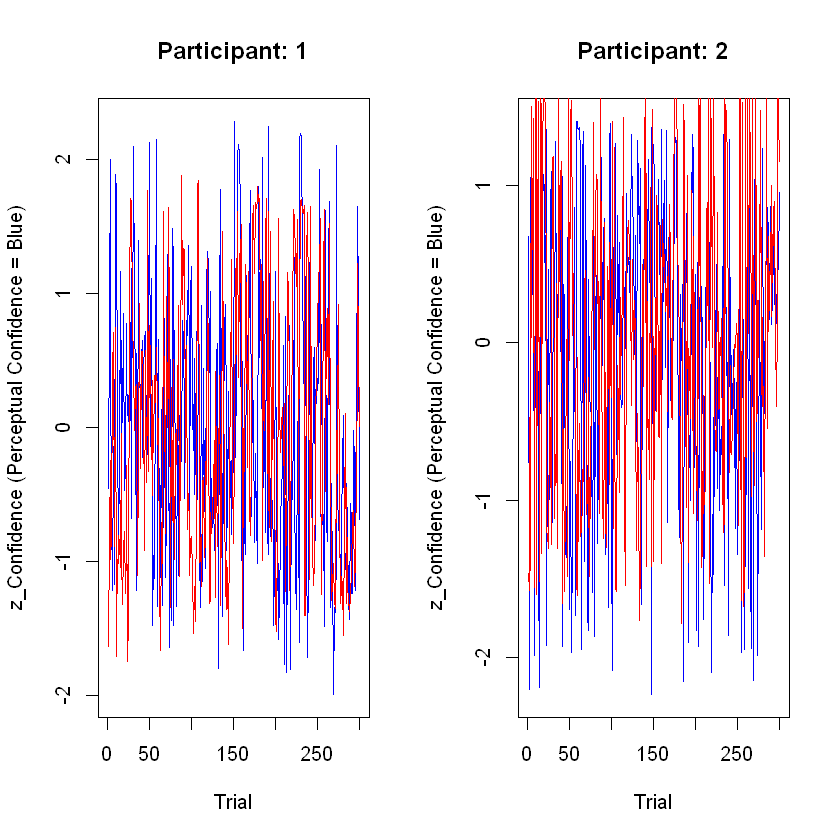

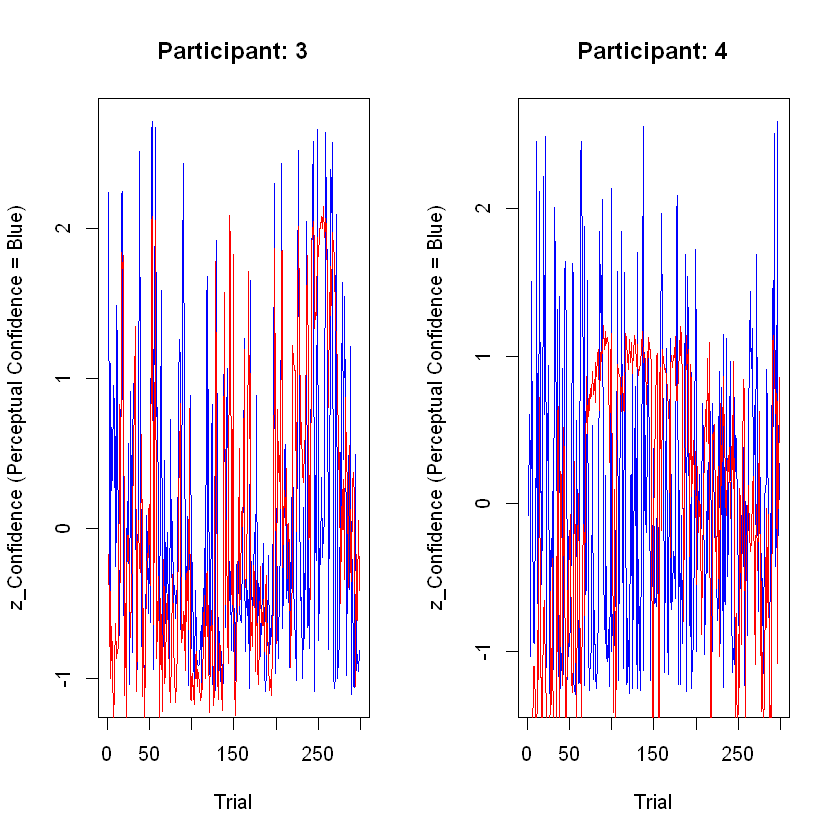

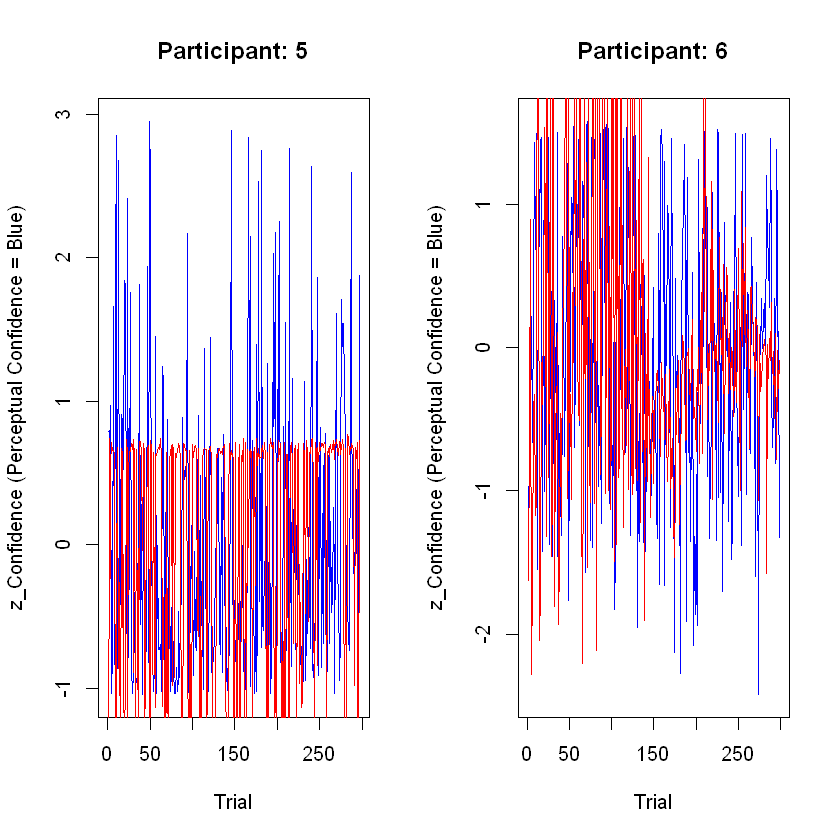

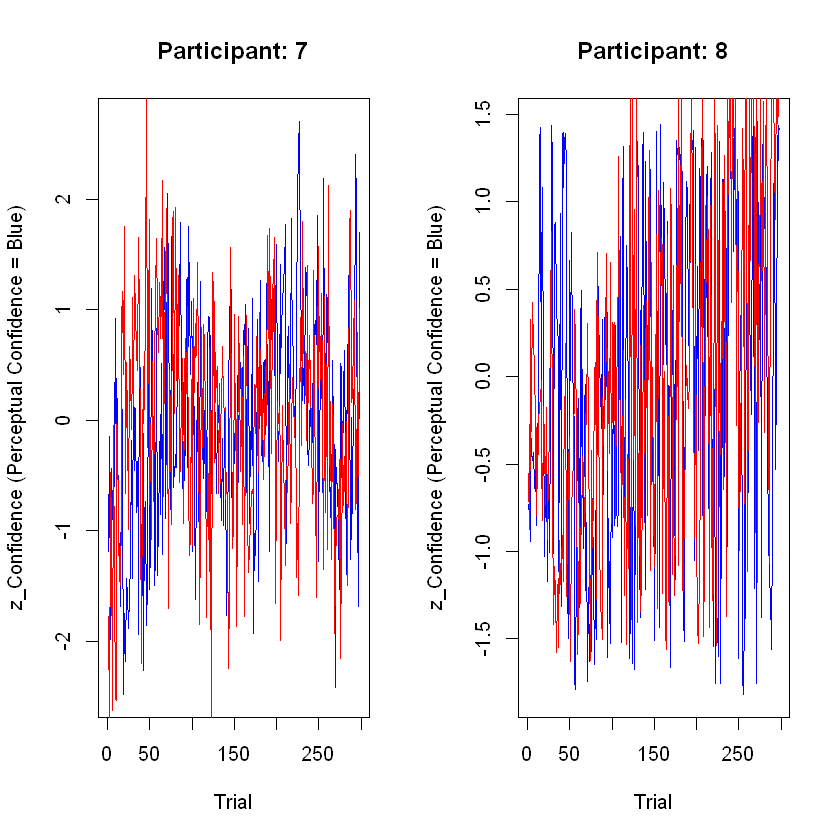

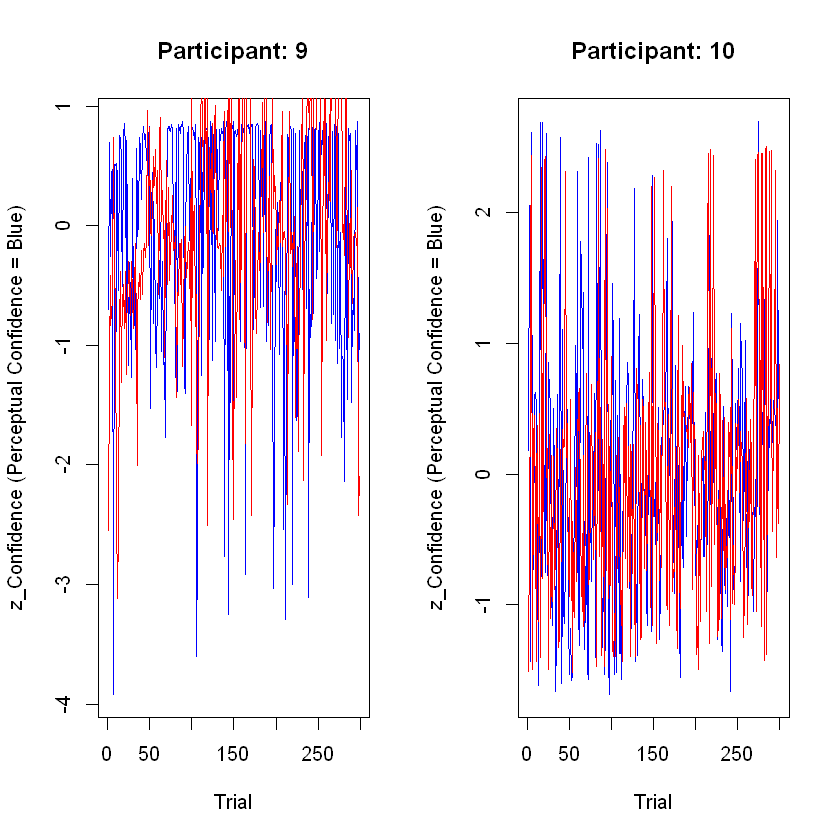

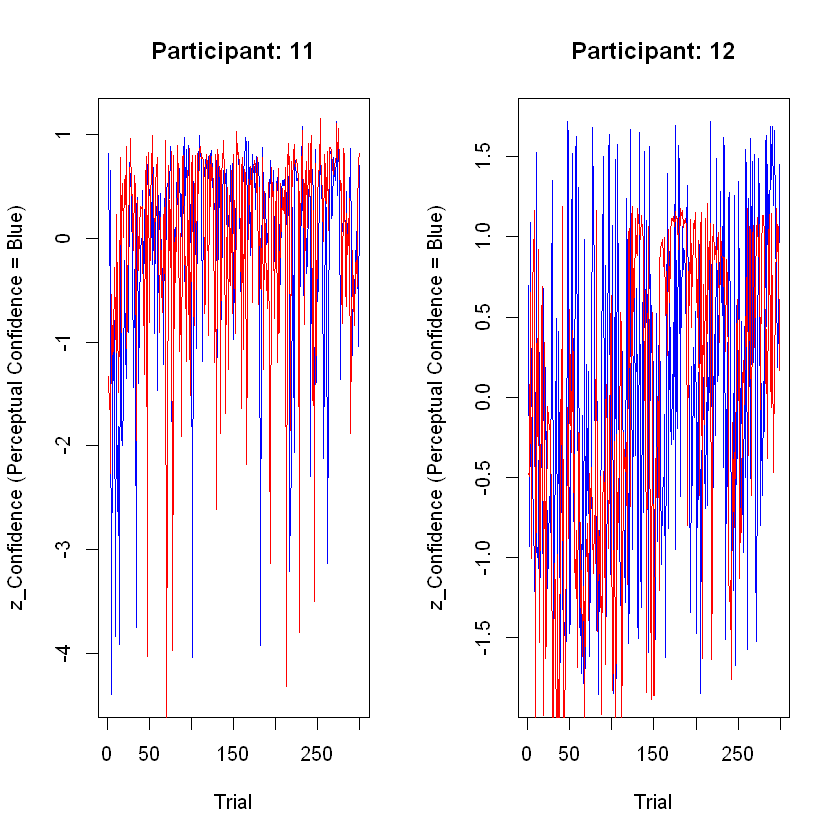

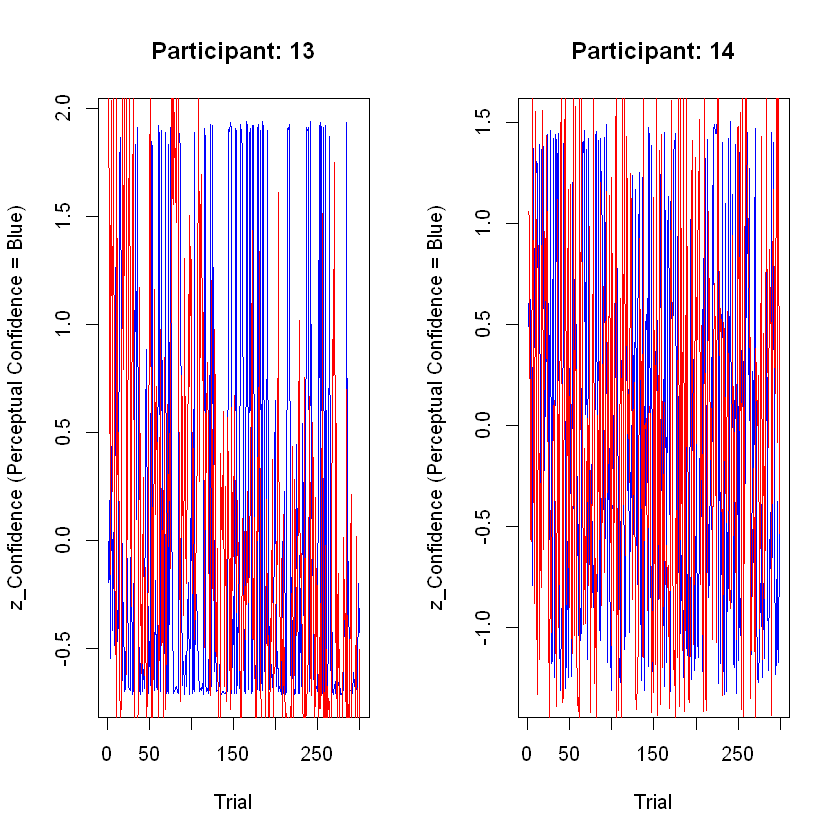

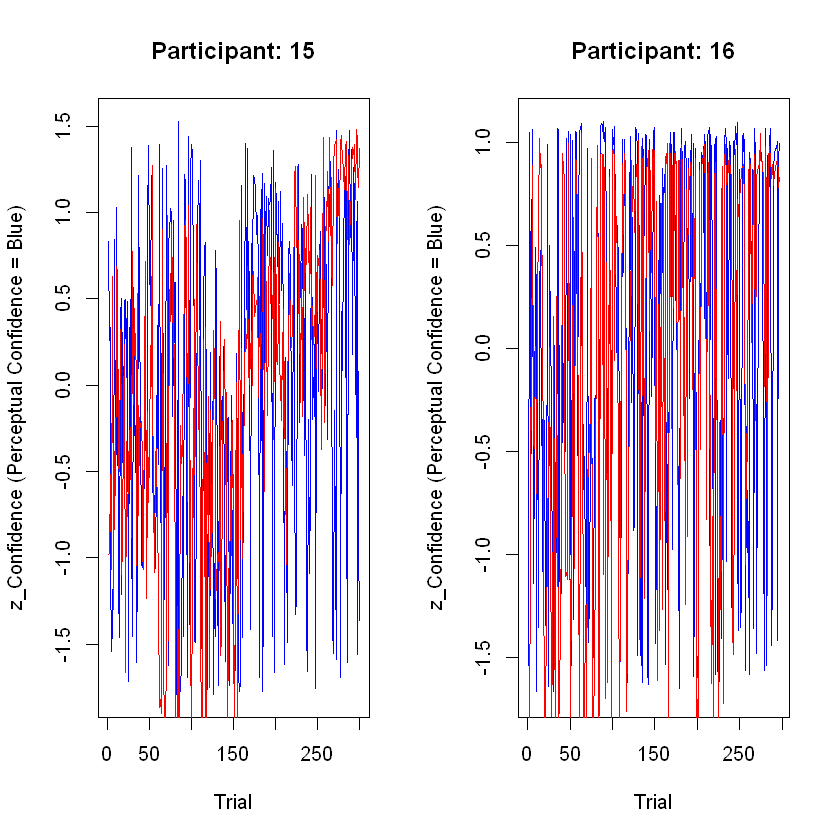

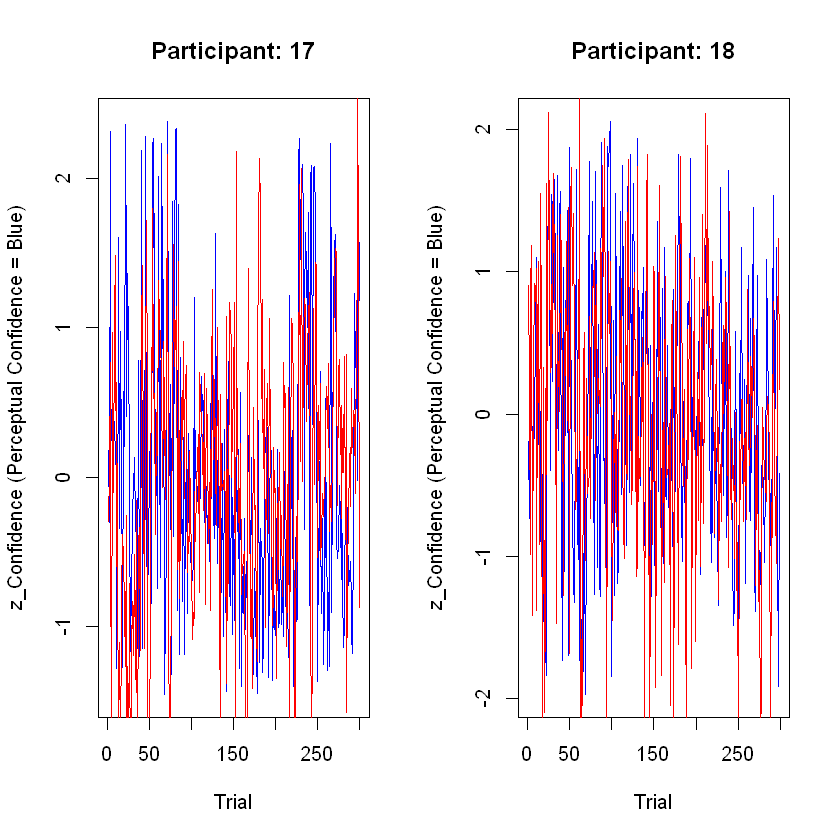

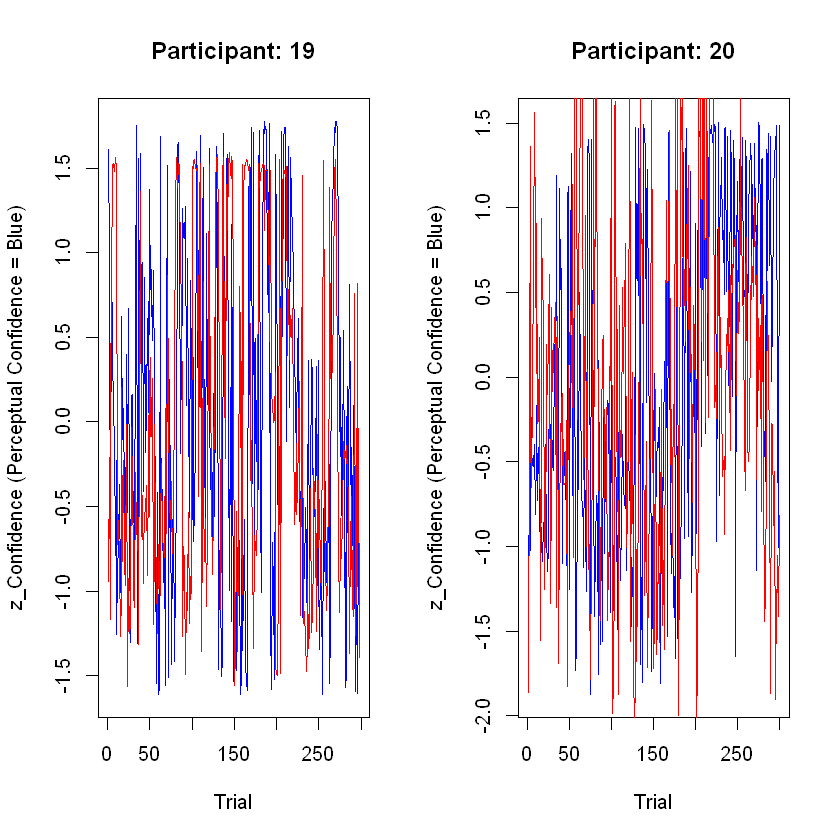

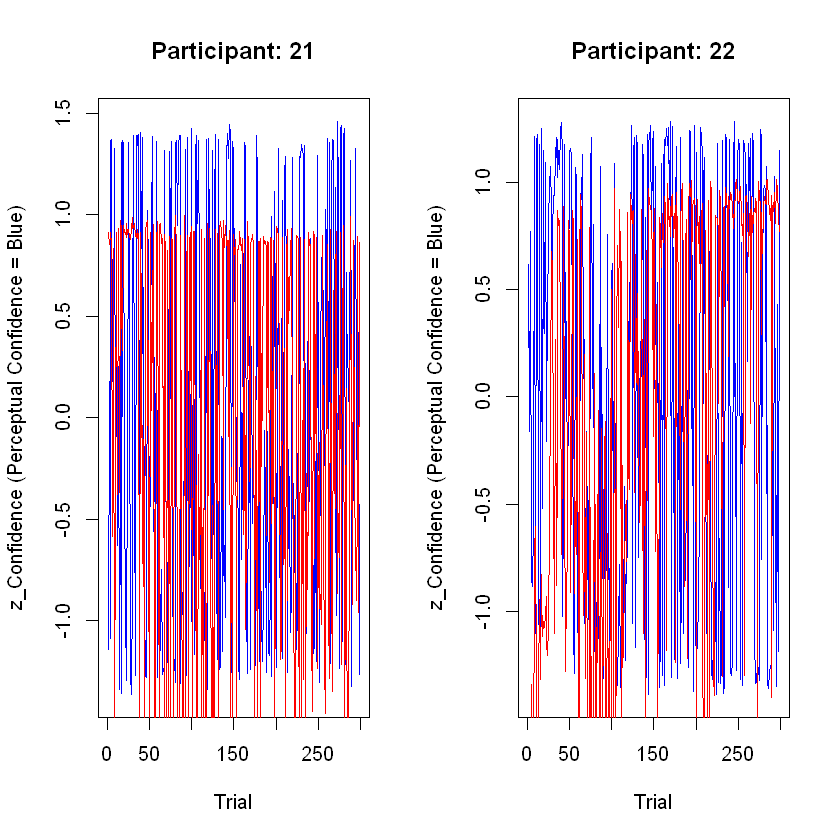

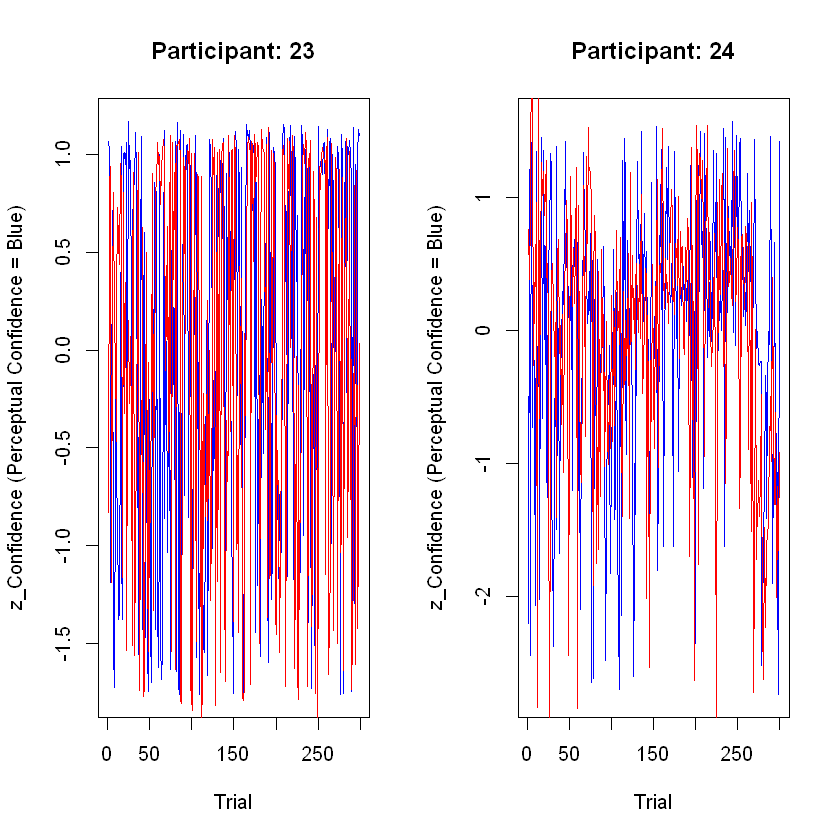

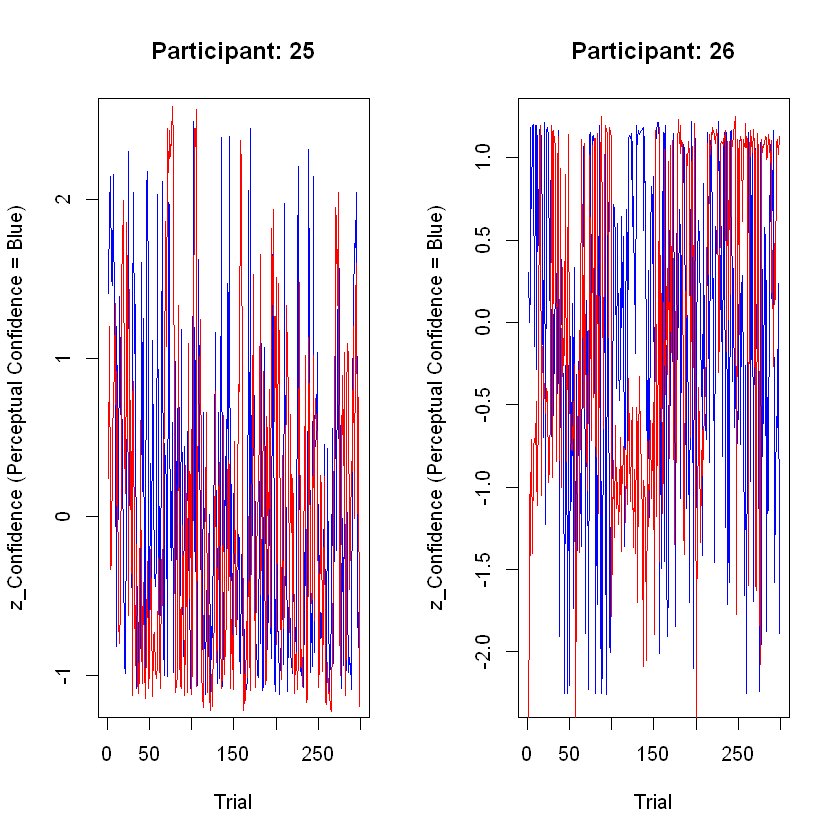

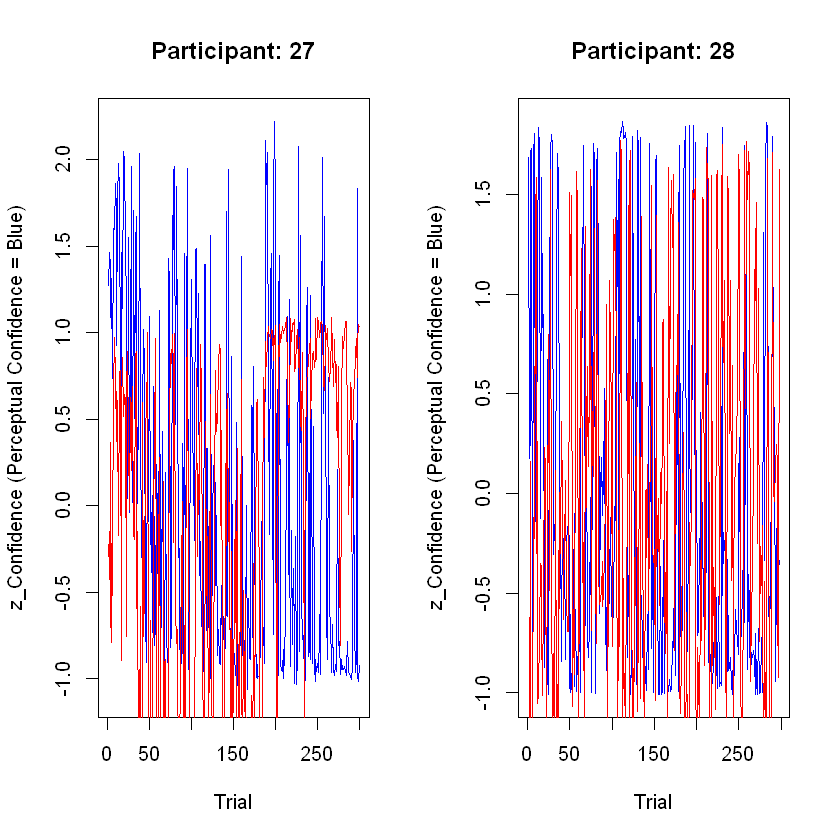

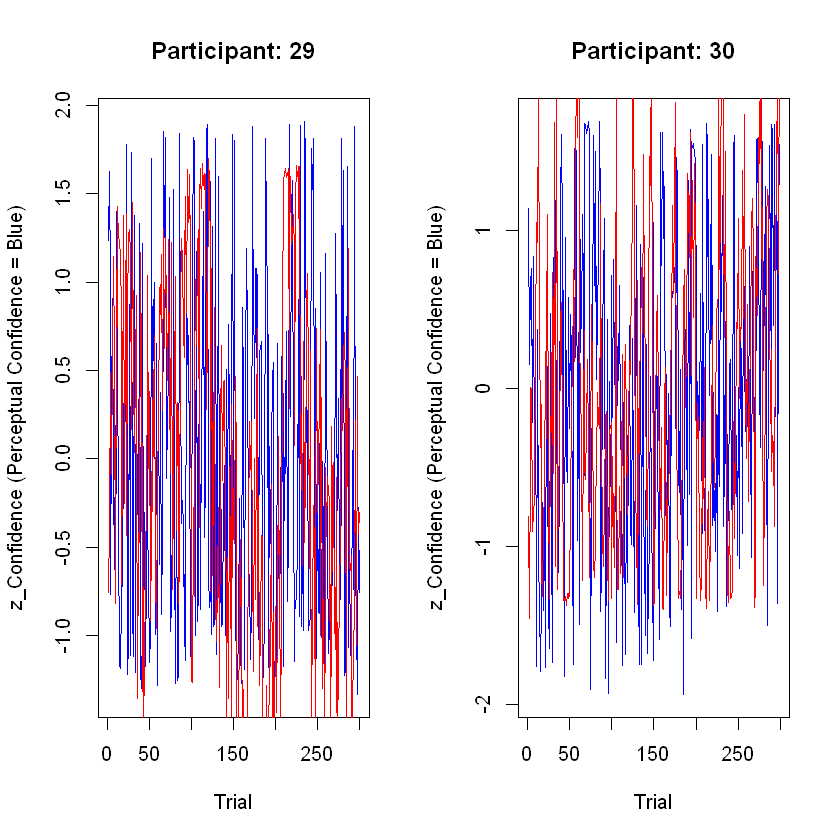

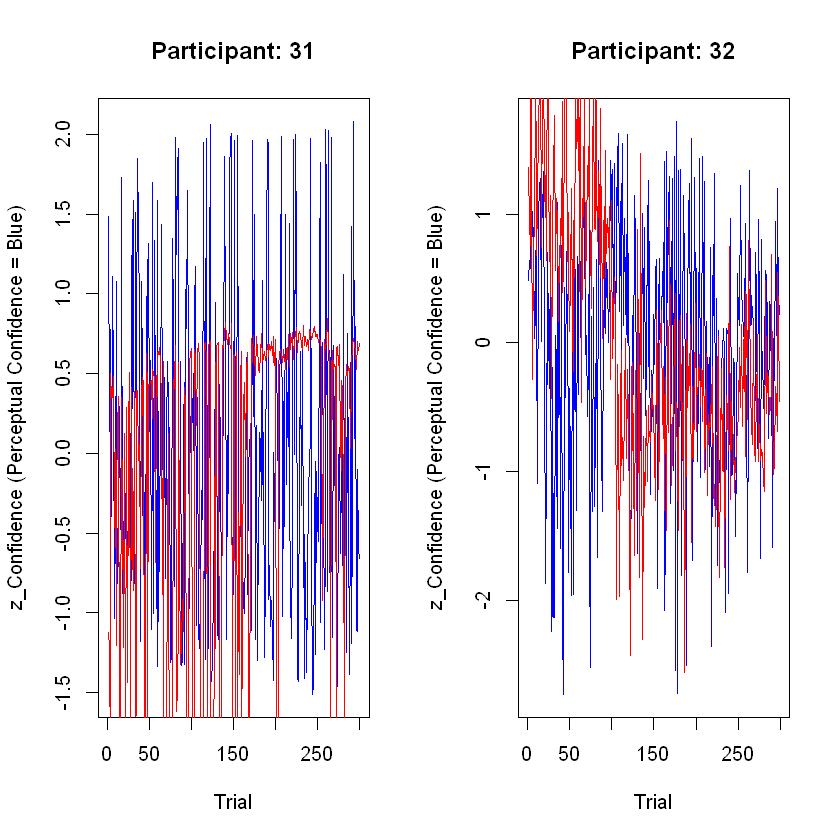

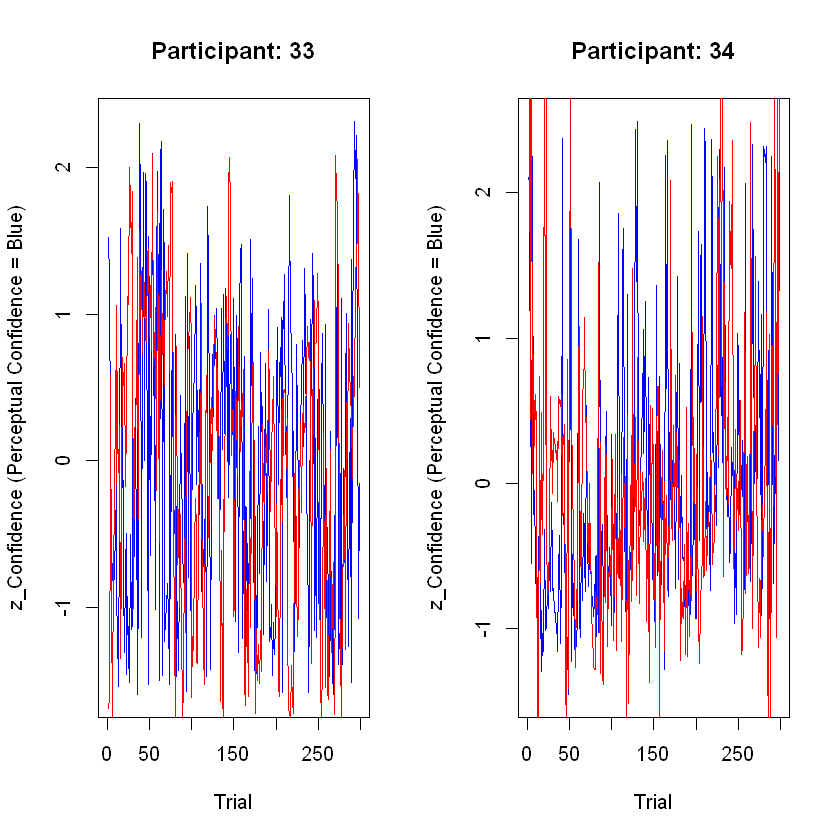

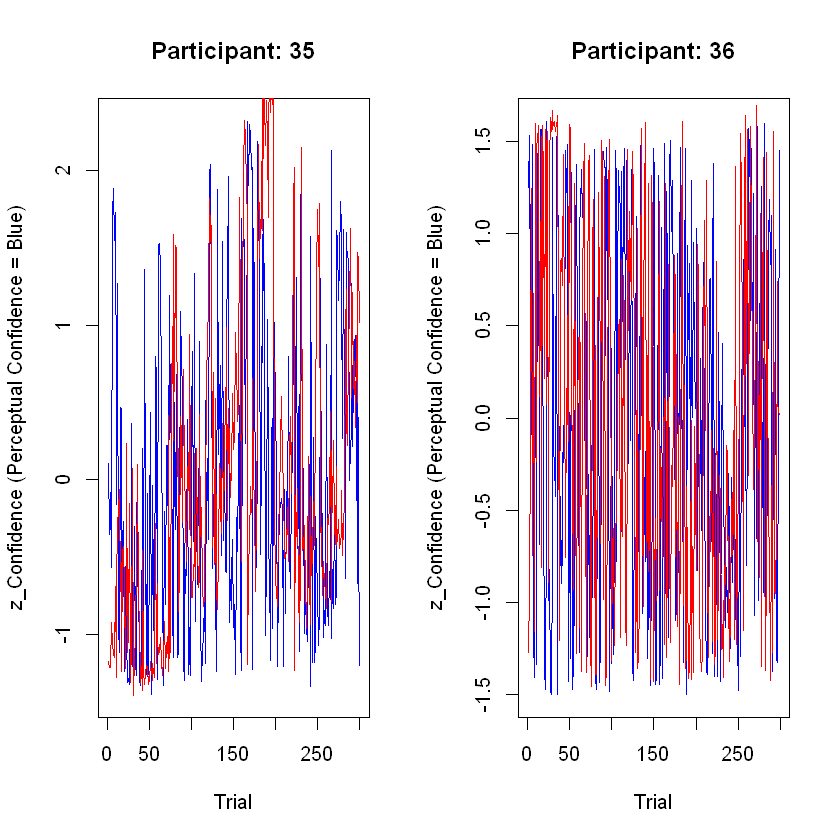

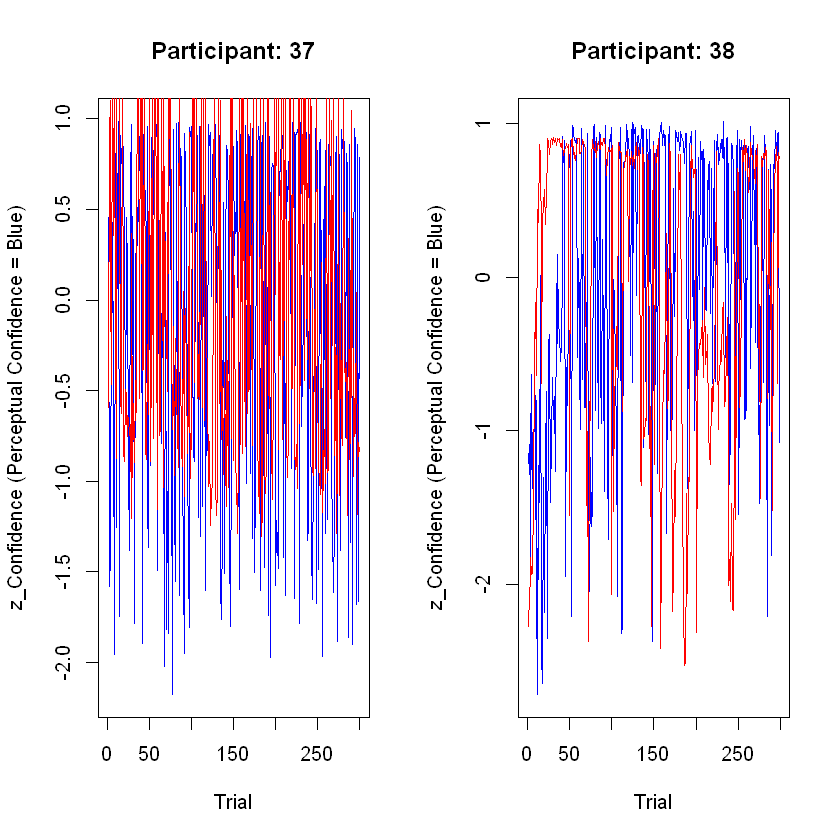

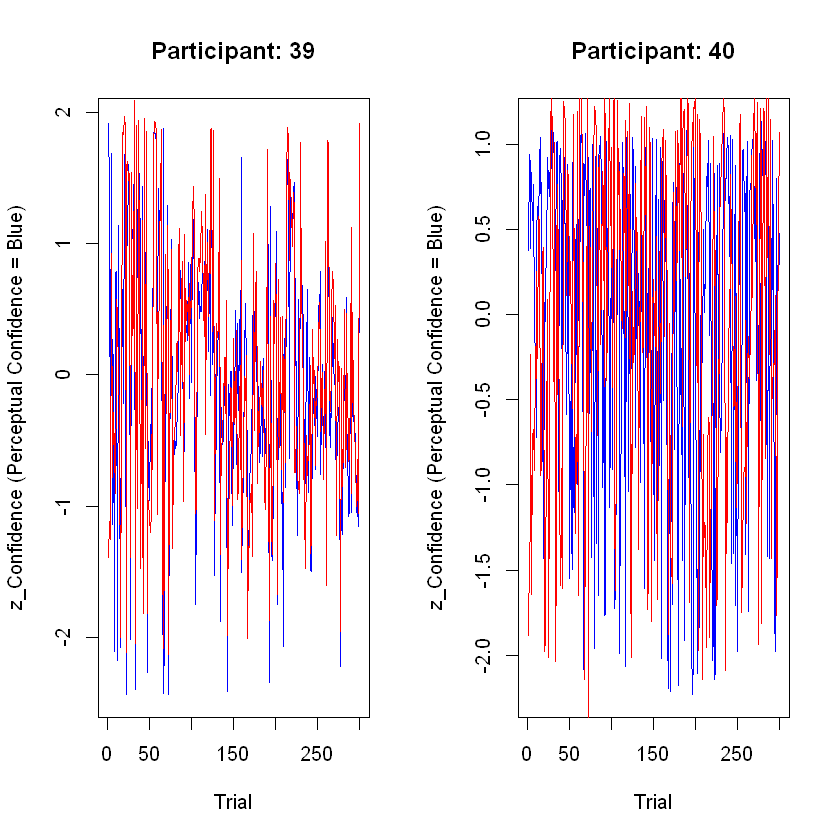

In [25]:
n <- 1
while(n<=40){
    old.par <- par(mfrow=c(1, 2))
    plot(dat$z_P_Conf[dat$participant==n], type = 'l', col= 'blue', ylab = 'z_Confidence (Perceptual Confidence = Blue)', xlab= 'Trial', main=sprintf("Participant: %s", n))
    lines(dat$z_V_Conf[dat$participant==n], type = 'l', col = 'red')
    plot(dat$z_P_Conf[dat$participant==n+1], type = 'l', col= 'blue', ylab = 'z_Confidence (Perceptual Confidence = Blue)', xlab= 'Trial', main=sprintf("Participant: %s", n+1))
    lines(dat$z_V_Conf[dat$participant==n+1], type = 'l', col = 'red')
    par(old.par)
    n <- n + 2
}

# [Back to Content](#content)

<a id='percept'></a>

# Z-Scored Perceptual Confidence For Each Participant

 Z-Scored Perceptual Confidence Levels for Each Participant - No Participant apart seems to use same portion of the scale more than 75% of the time

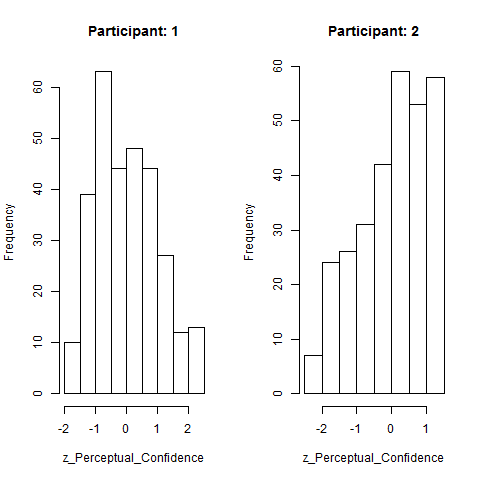

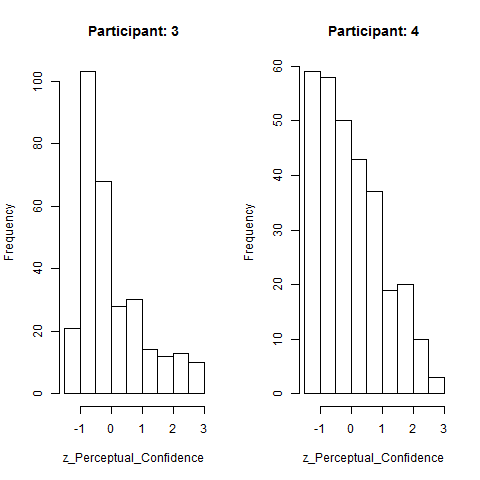

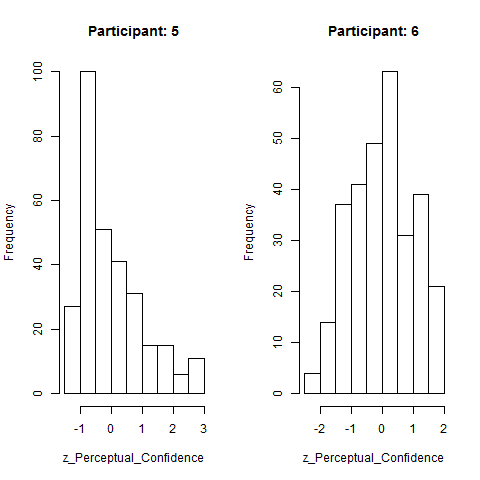

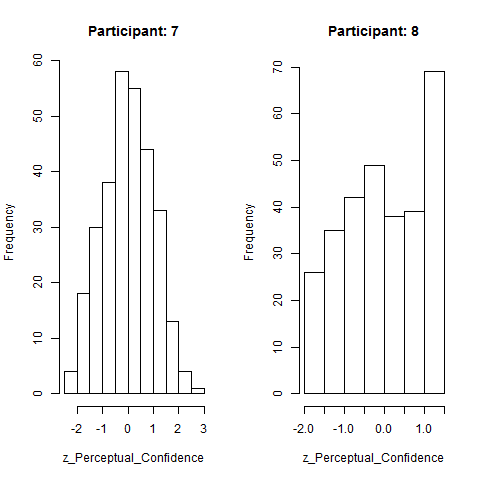

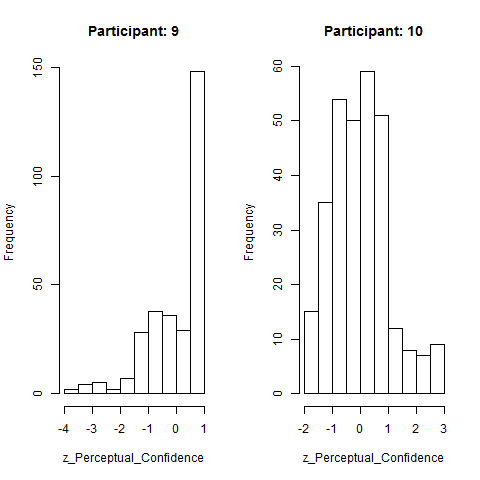

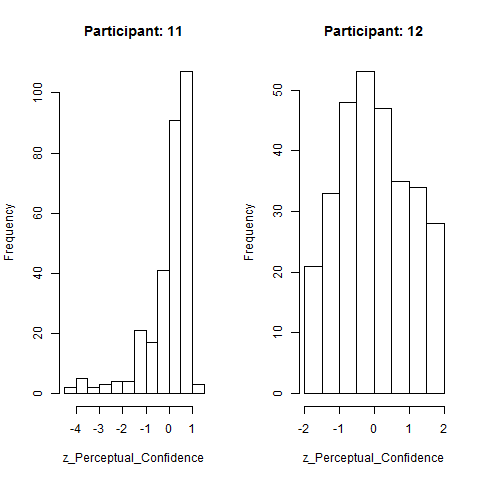

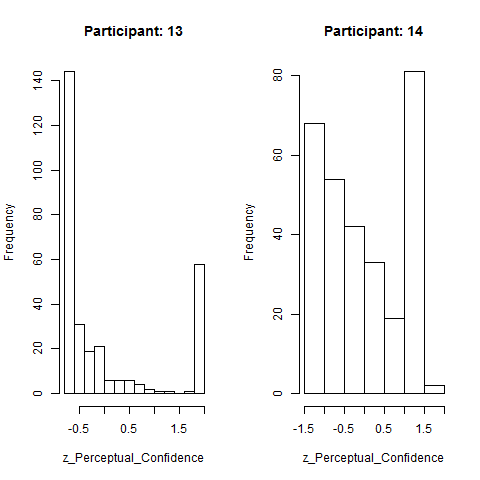

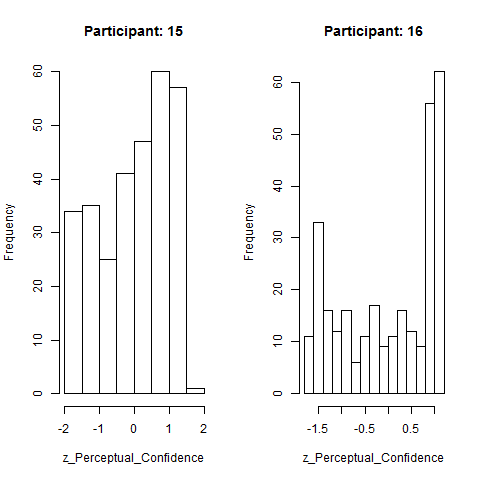

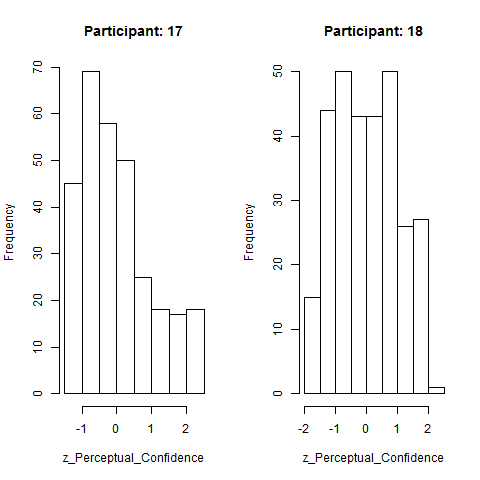

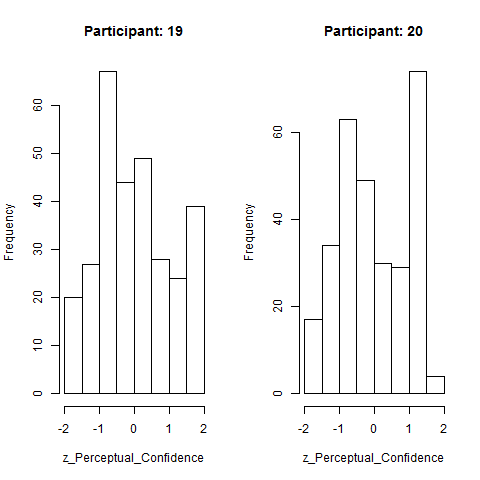

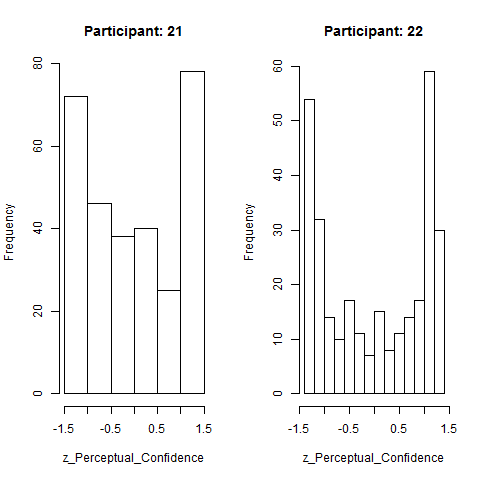

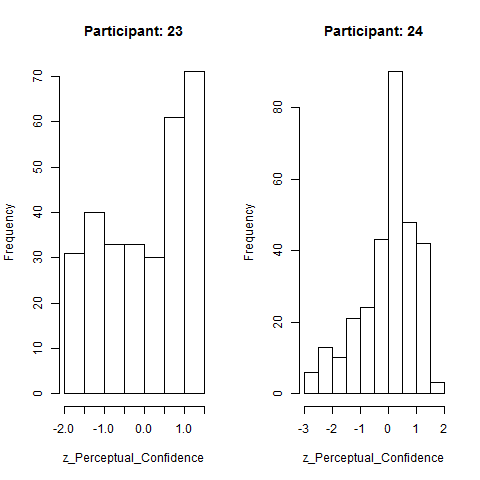

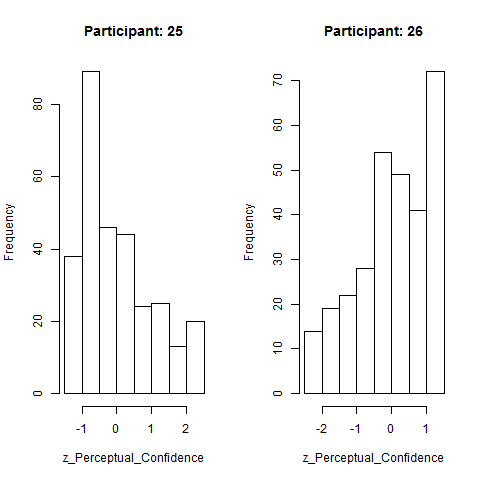

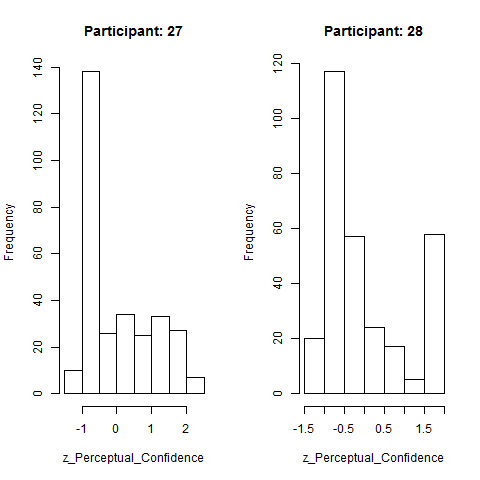

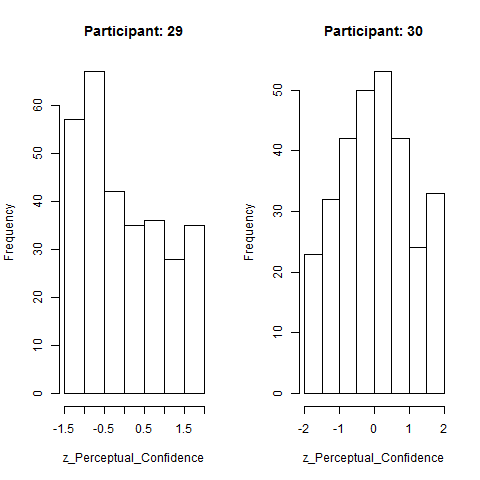

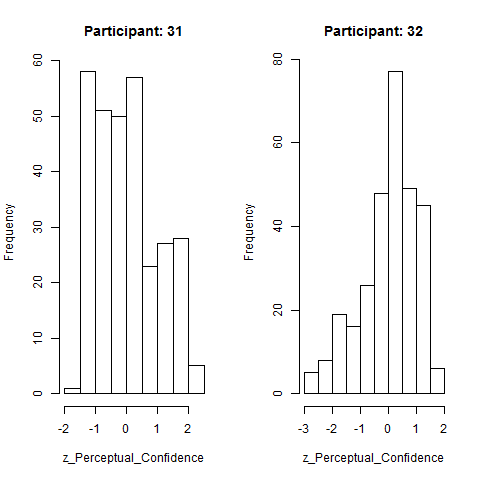

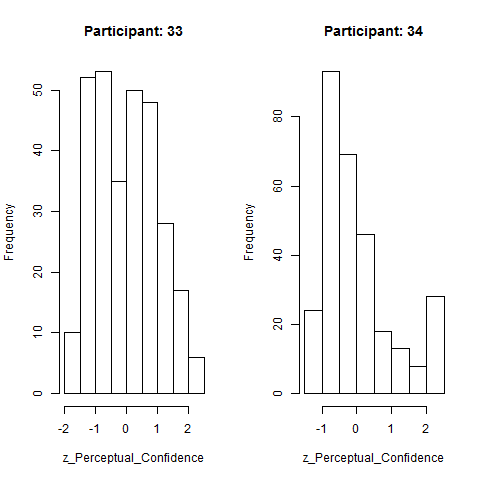

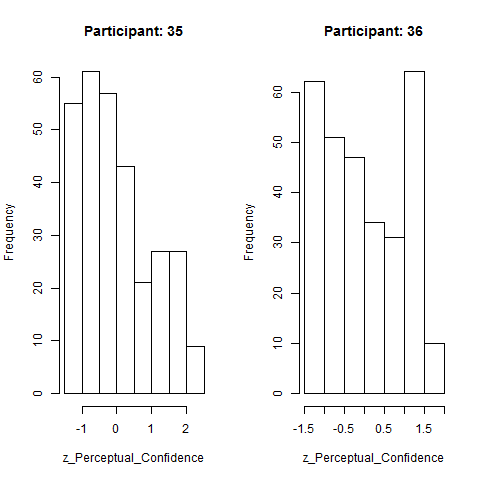

In [8]:
i <- 1
while (i<=40){
    old.par <- par(mfrow=c(1, 2))
    hist(dat$z_P_Conf[dat$participant==i], main = sprintf("Participant: %s", i), xlab='z_Perceptual_Confidence')
    hist(dat$z_P_Conf[dat$participant==i+1], main = sprintf("Participant: %s", i+1), xlab='z_Perceptual_Confidence')
    par(old.par)
    i <- i + 2
}

<a id='valued'></a>

# Z-Scored Value-Based Confidence for Each Participant

 Z-Scored Value-Based Confidence Levels for Each Participant - No Participant apart seems to use same portion of the scale more than 75% of the time

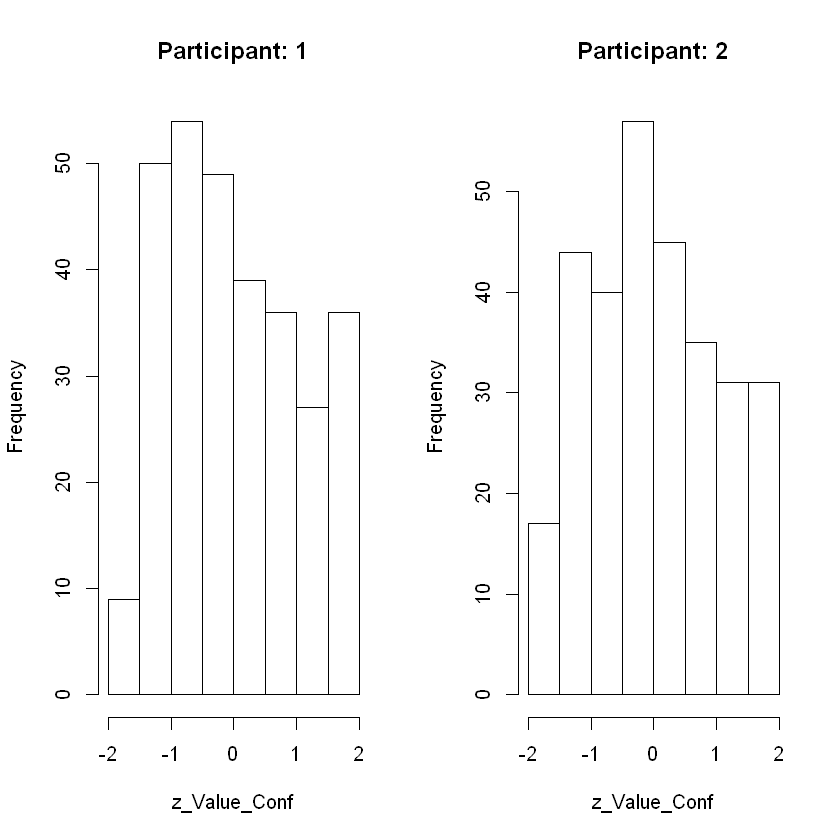

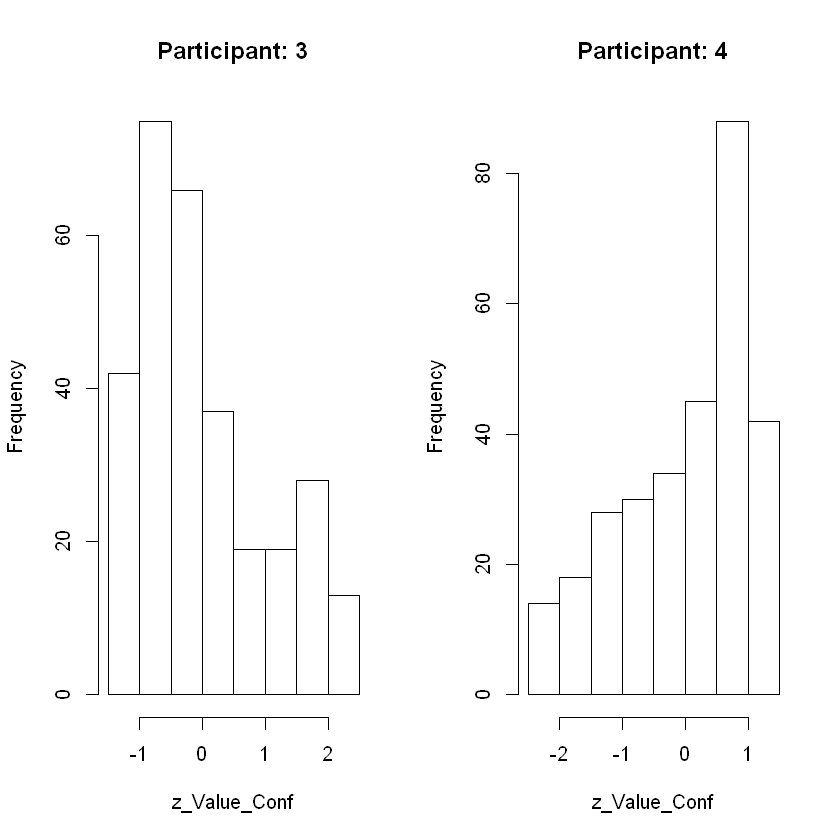

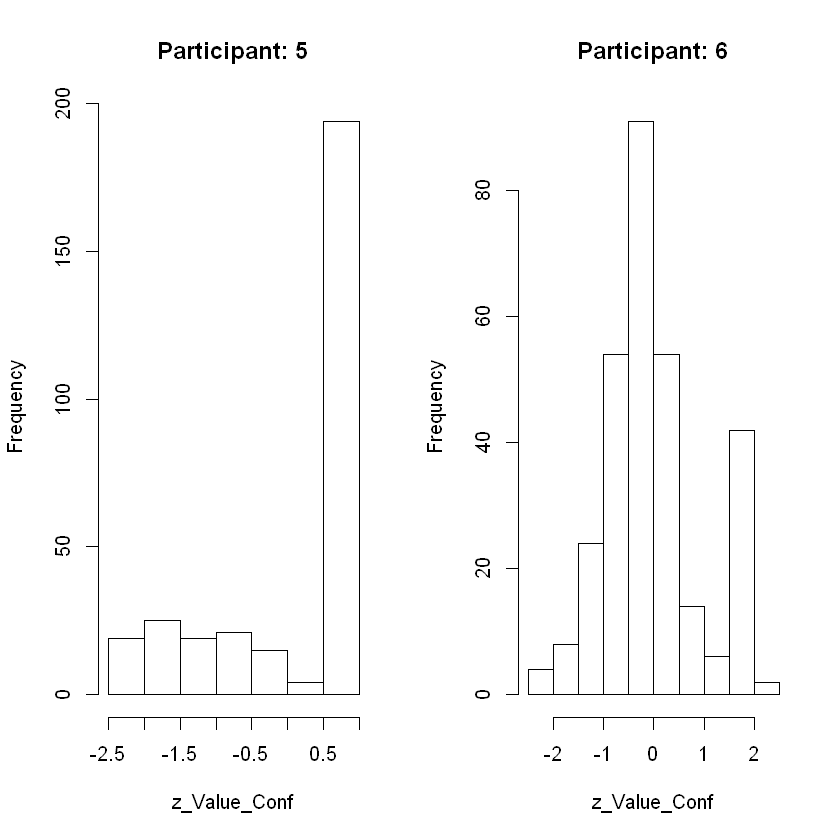

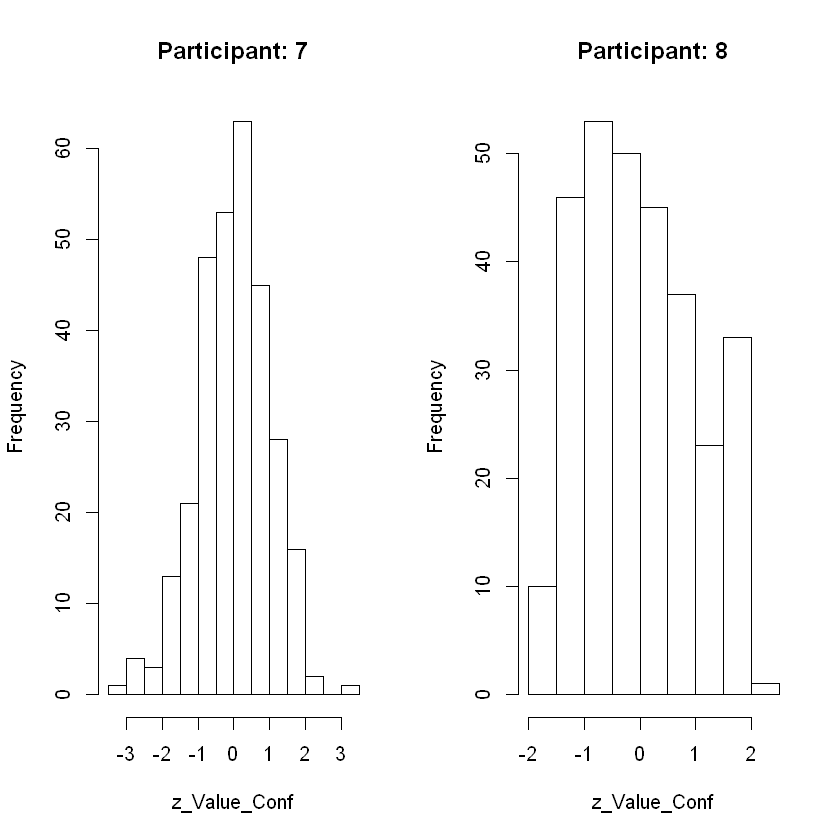

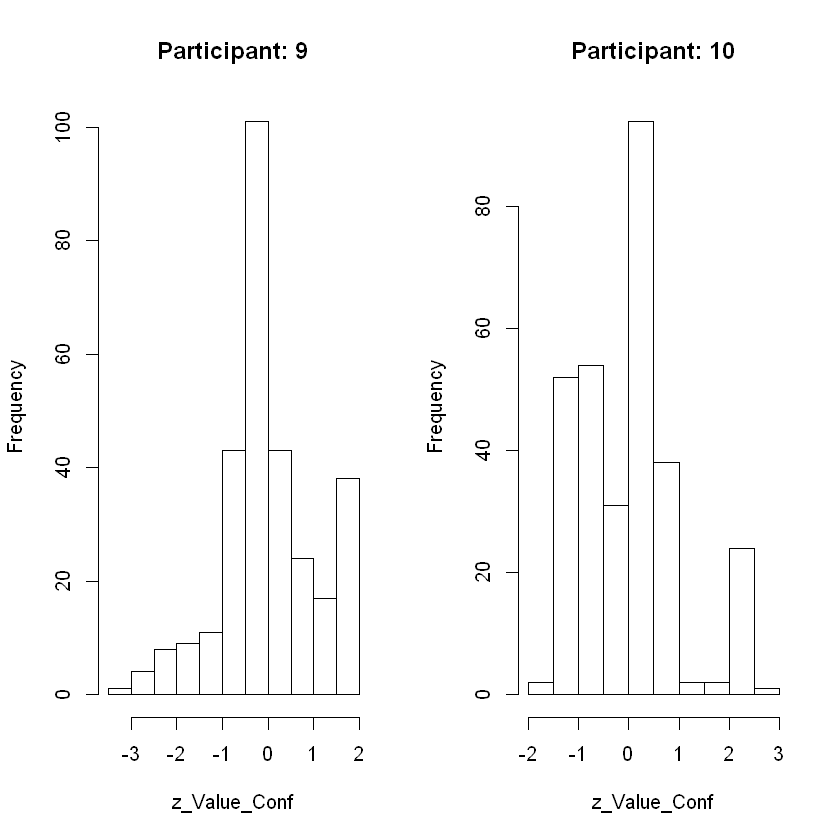

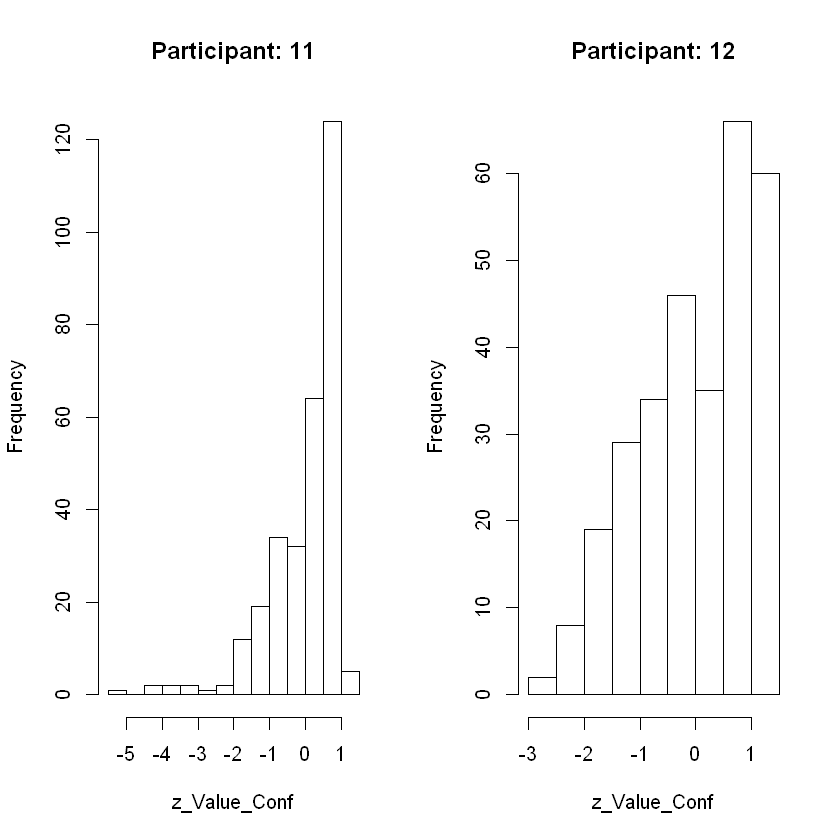

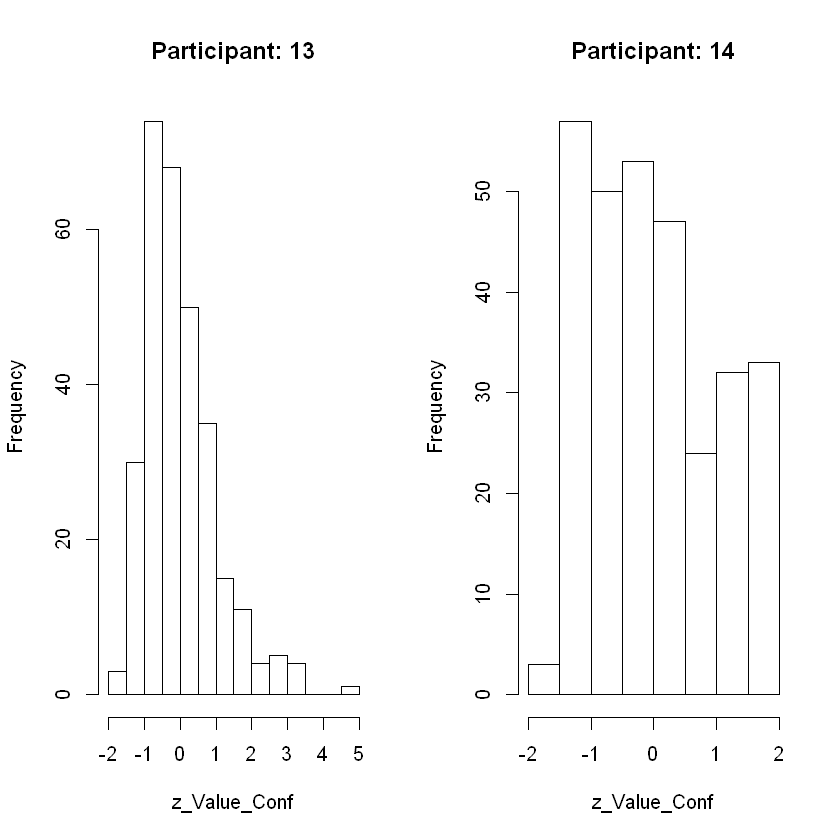

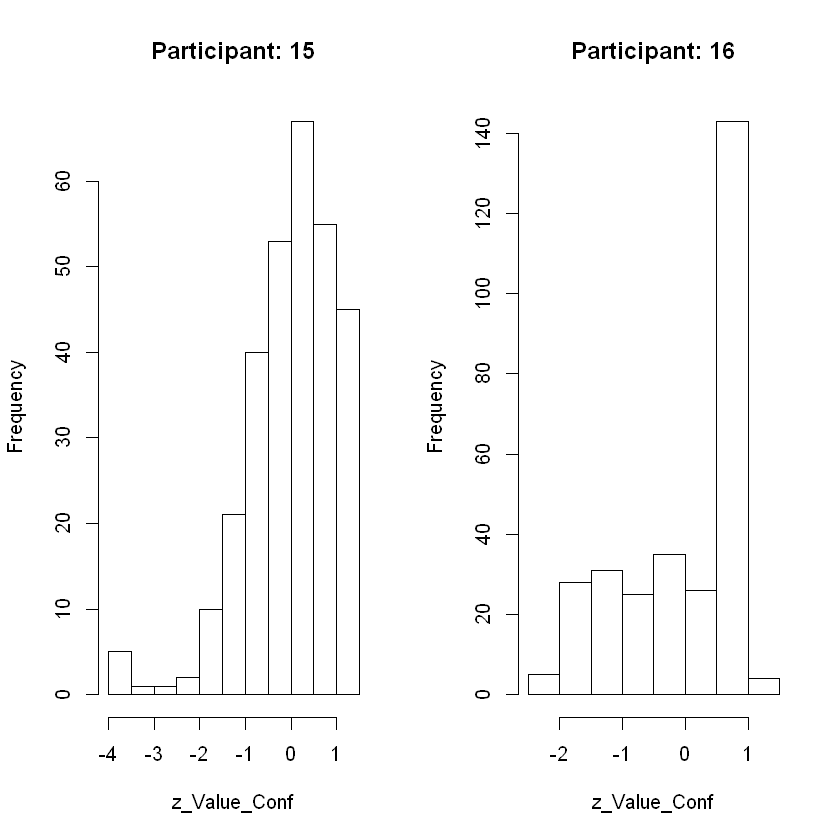

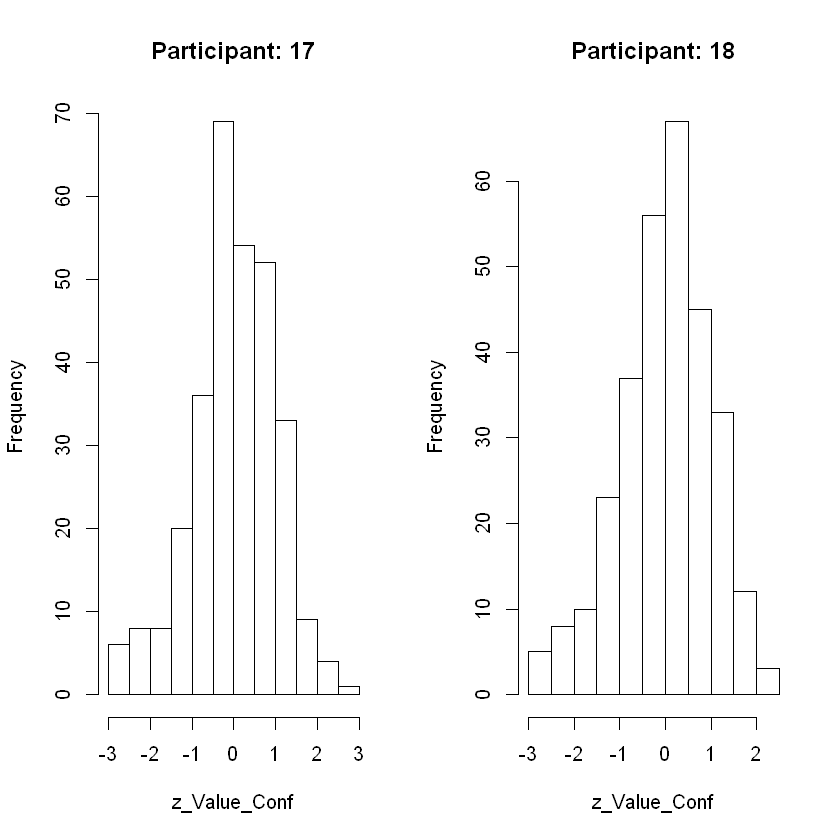

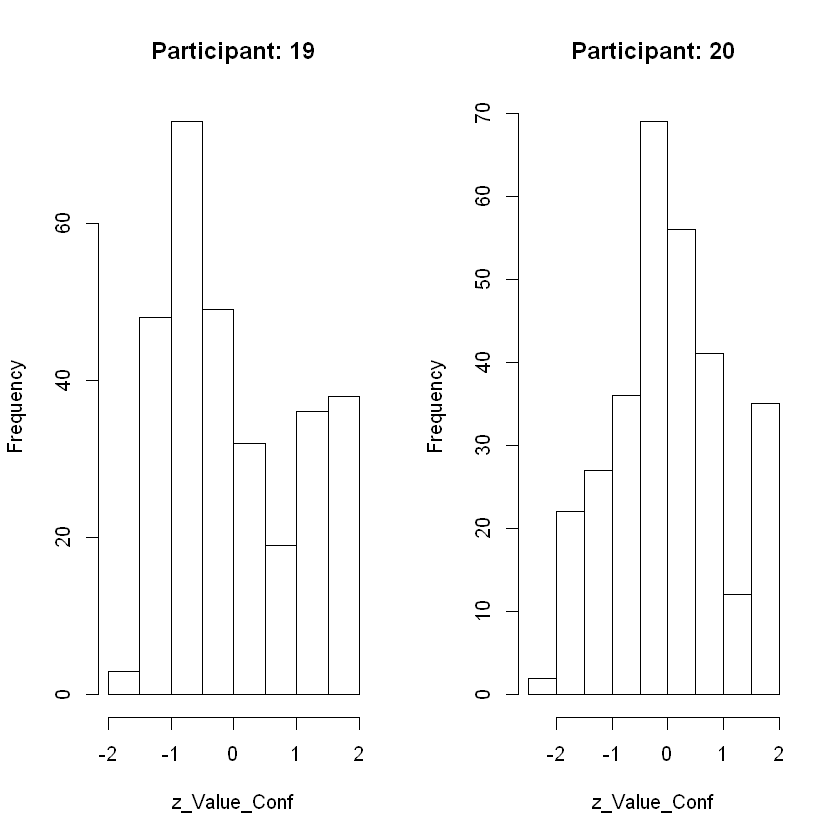

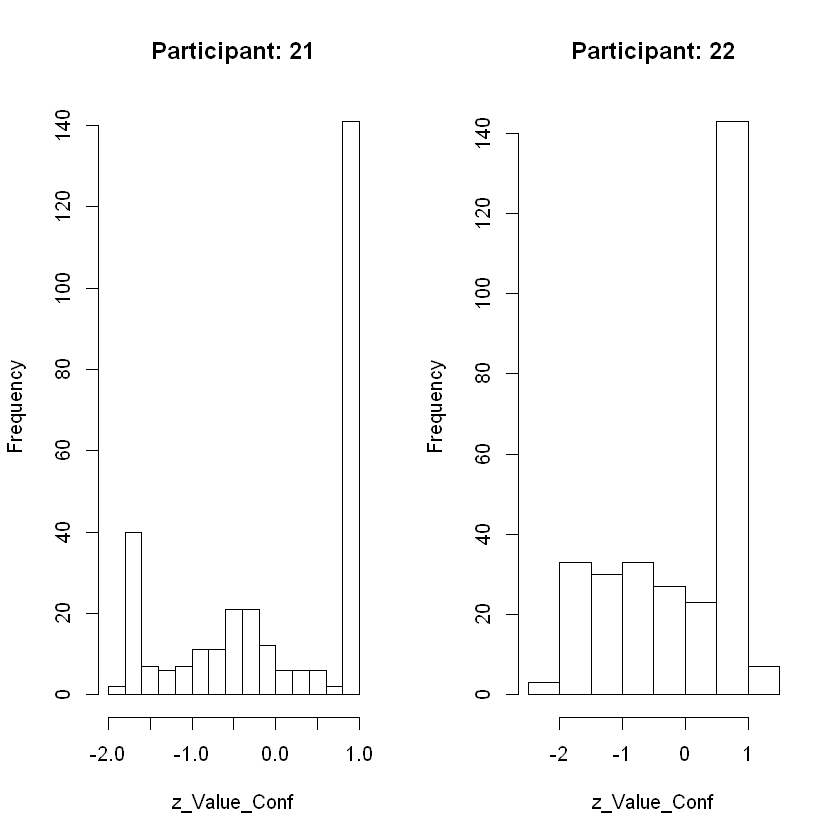

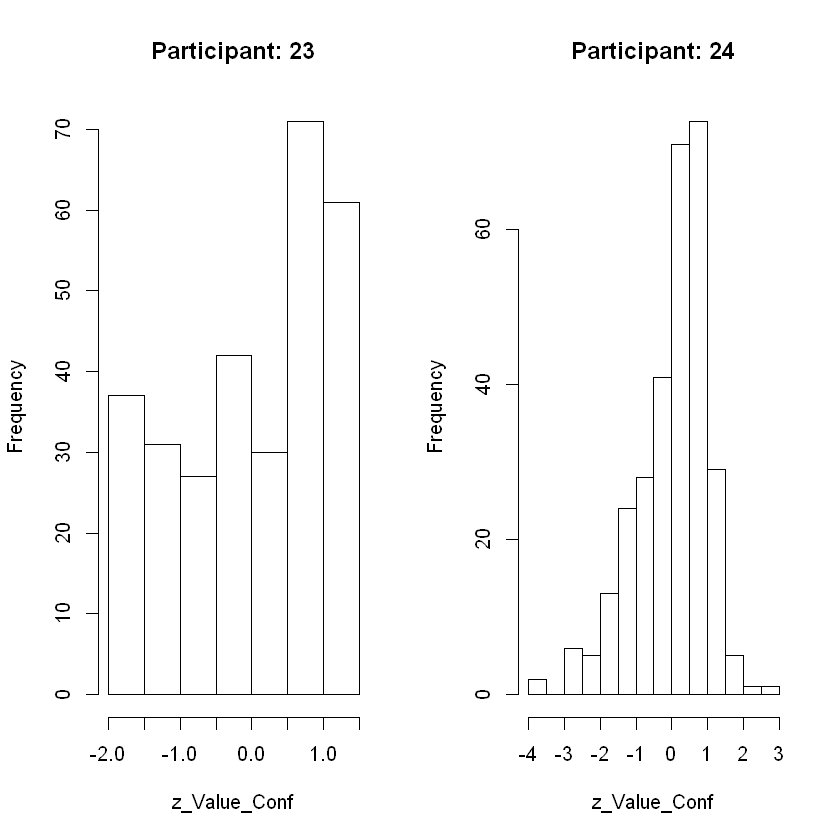

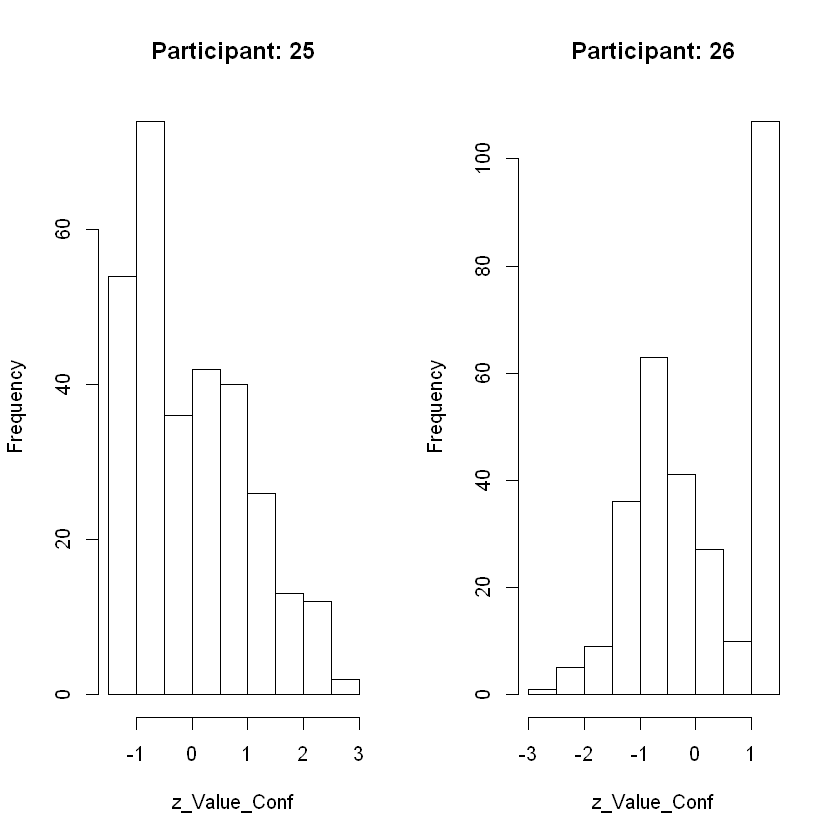

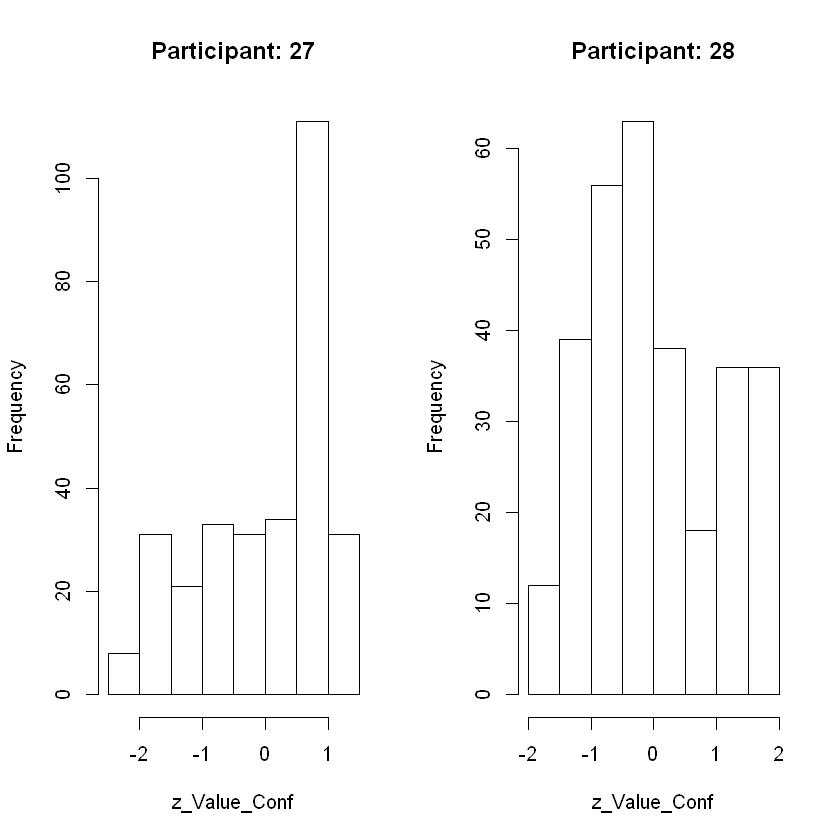

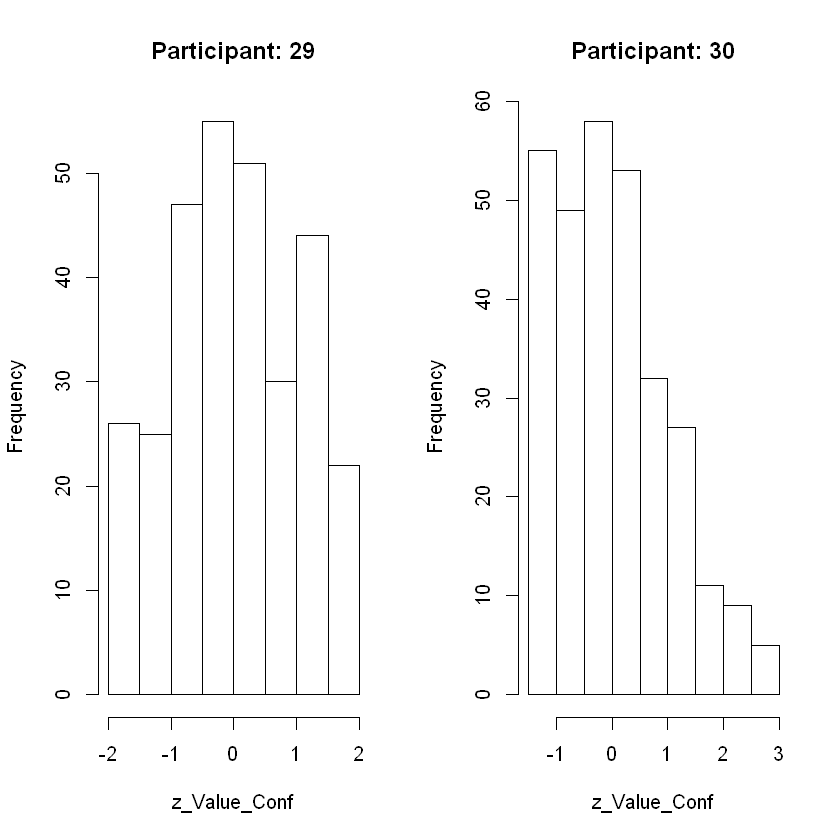

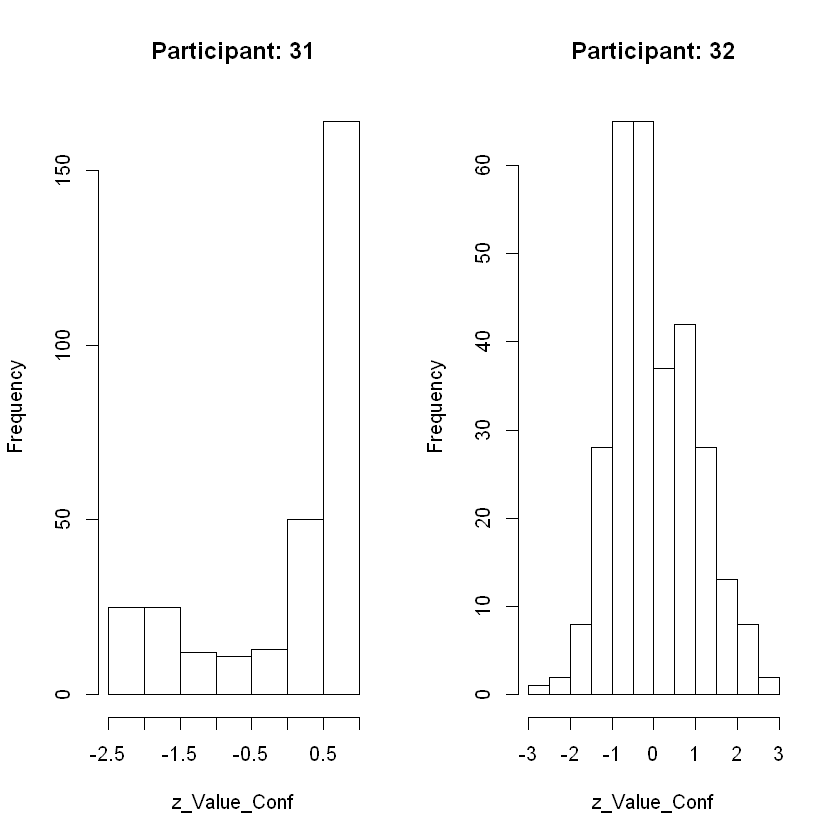

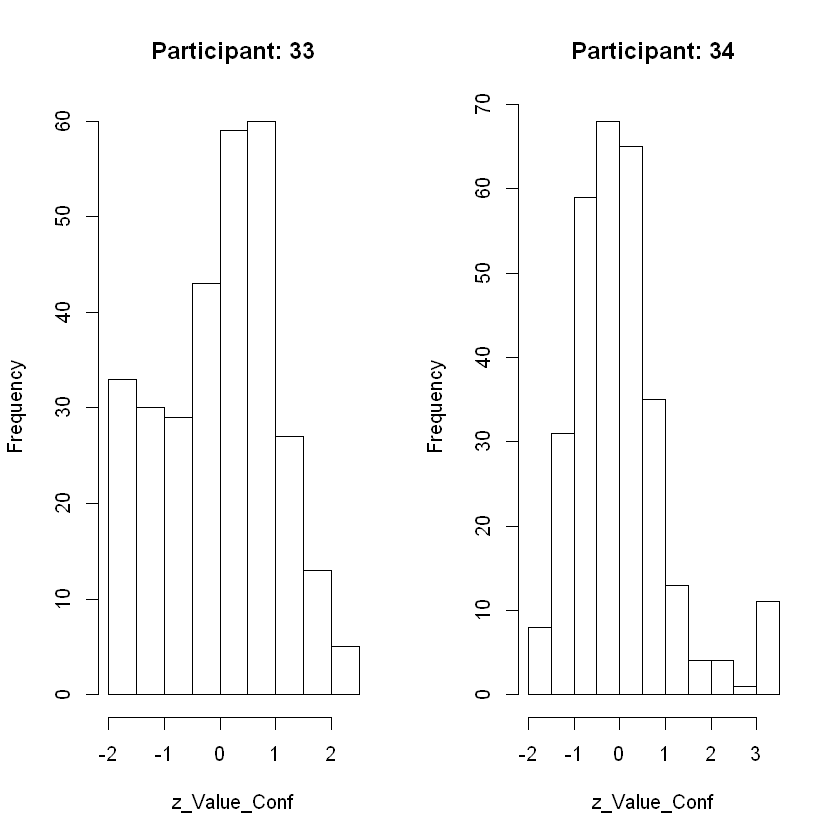

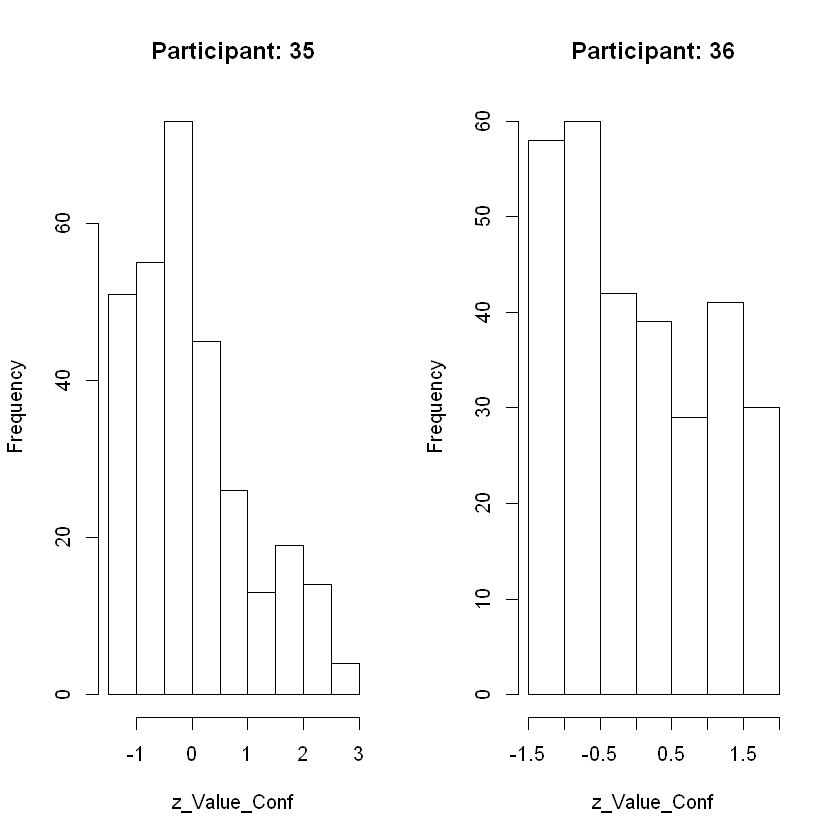

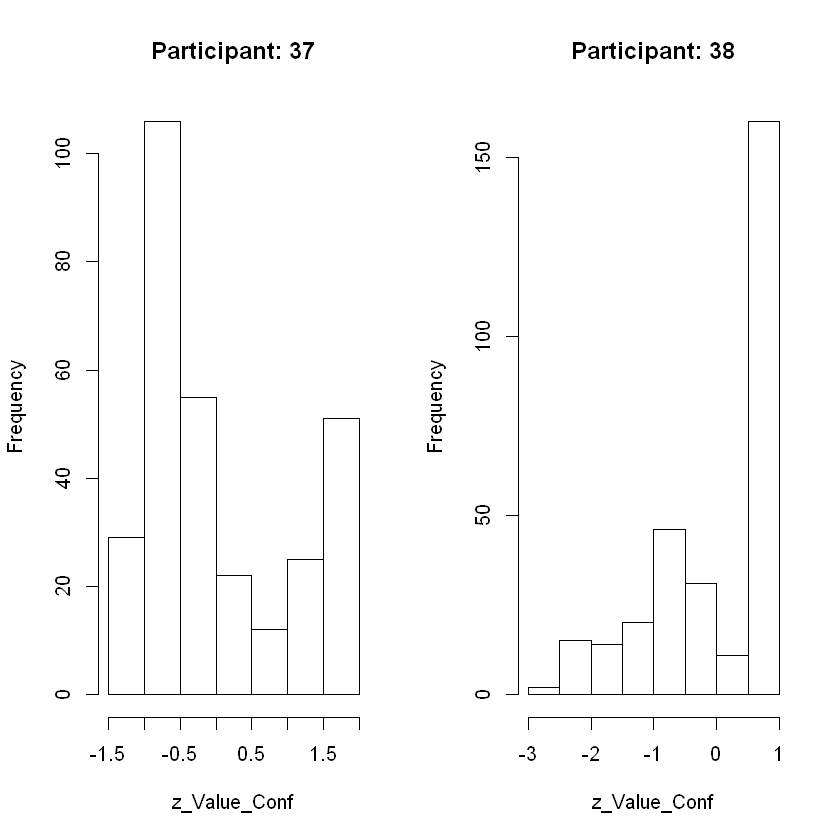

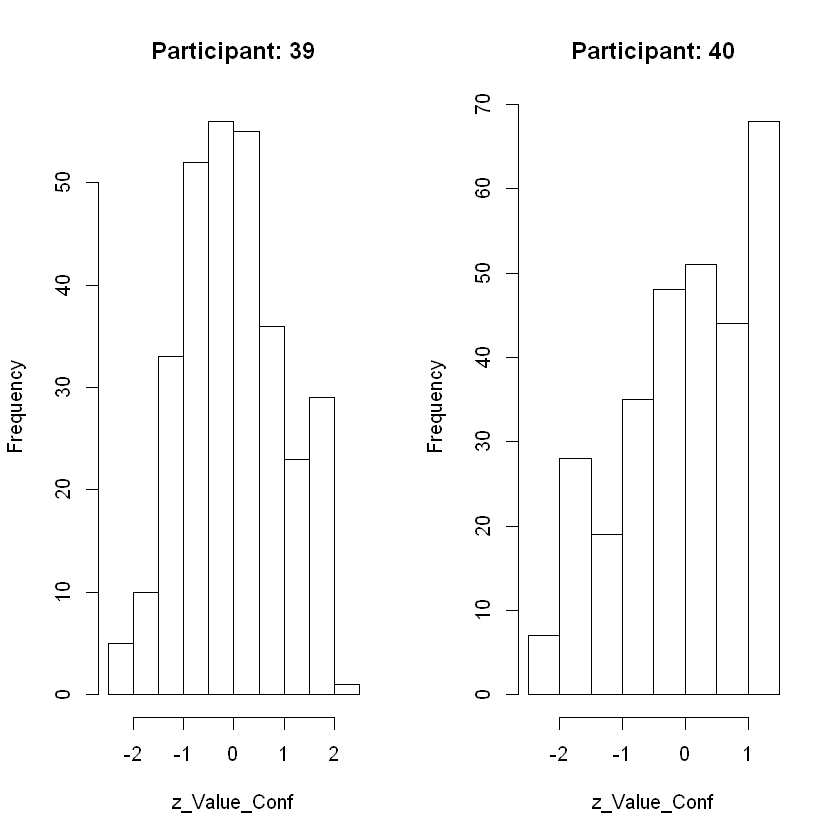

In [26]:
i <- 1
while (i<=40){
    old.par <- par(mfrow=c(1, 2))
    hist(dat$z_V_Conf[dat$participant==i], main = sprintf("Participant: %s", i), xlab='z_Value_Conf')
    hist(dat$z_V_Conf[dat$participant==i+1], main = sprintf("Participant: %s", i+1), xlab='z_Value_Conf')
    par(old.par)
    i <- i + 2
}


<a id='valuedrt'></a>

# Z-Scored Value-Based Response Time

Value-Based Response Times- Apart from Response Times which are 7 standard deviations away (which will be eliminated), no problem seems to exist.

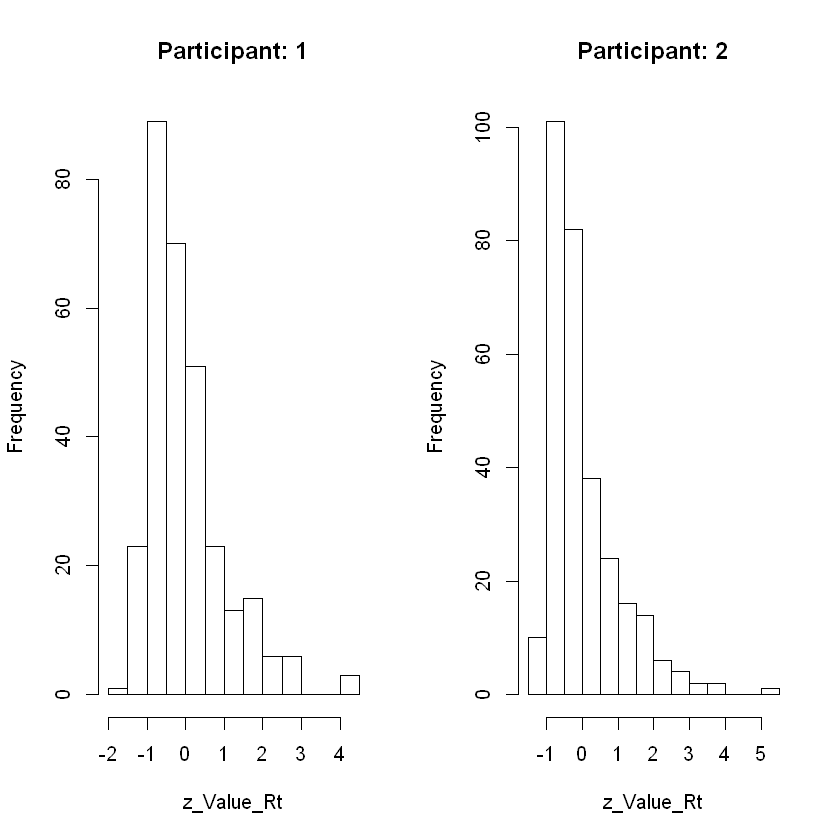

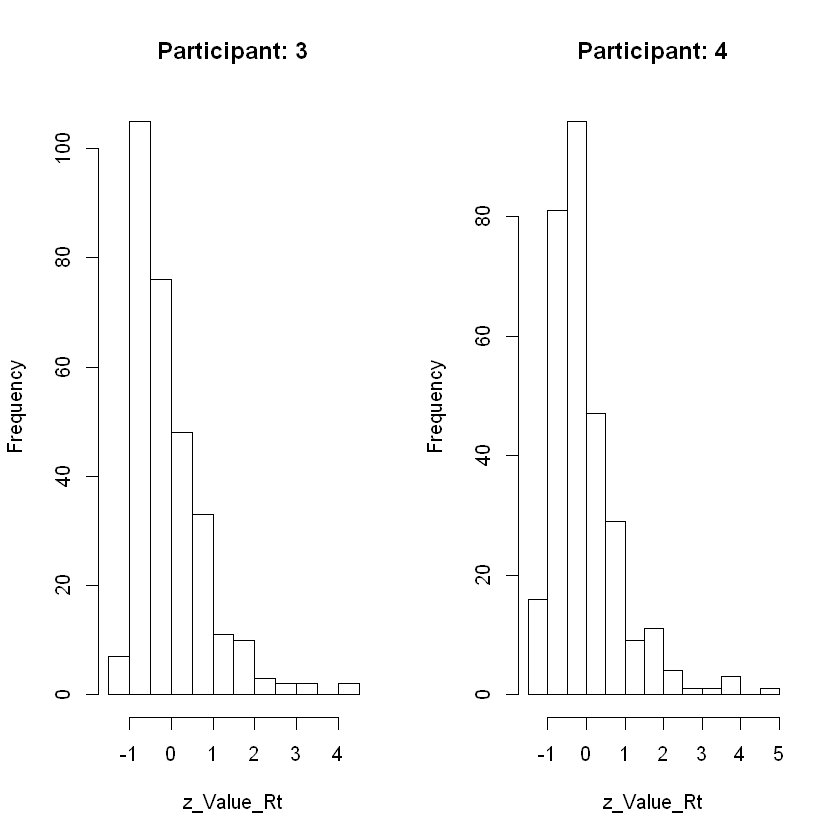

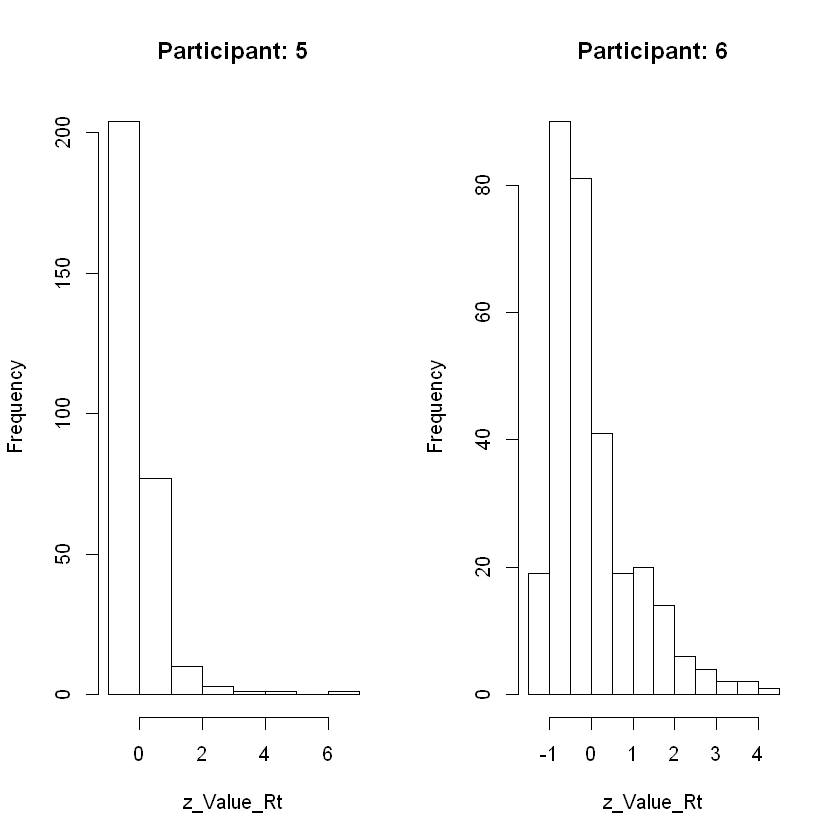

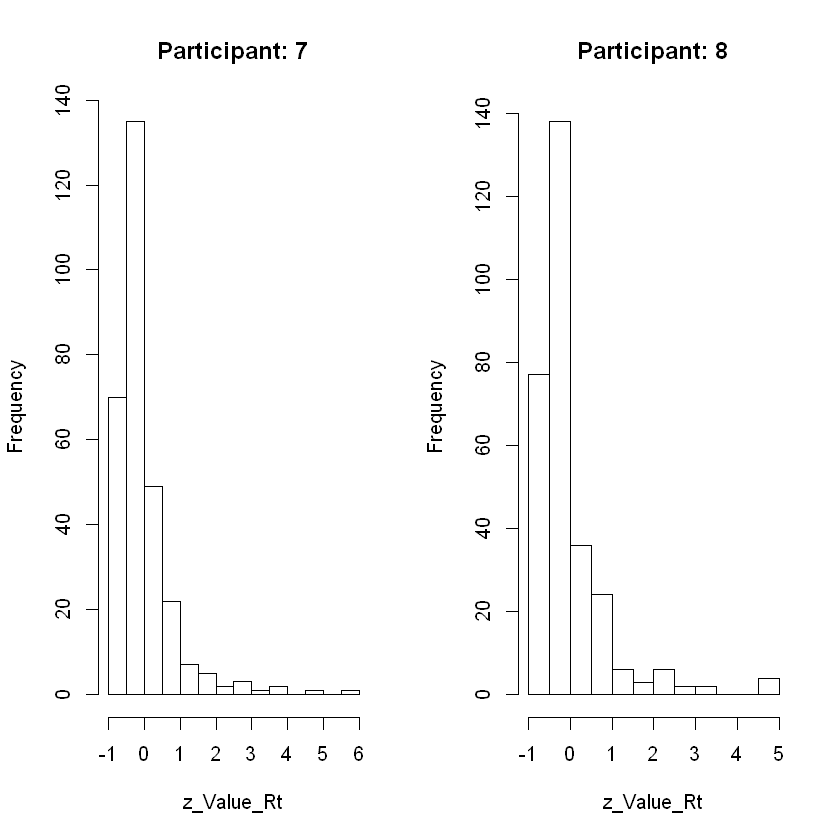

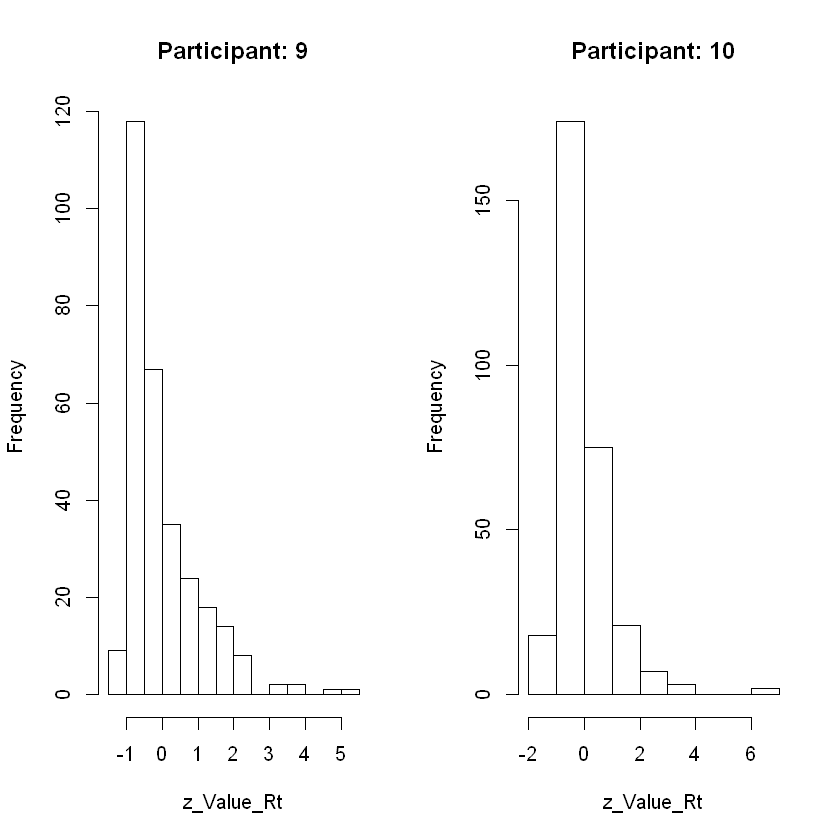

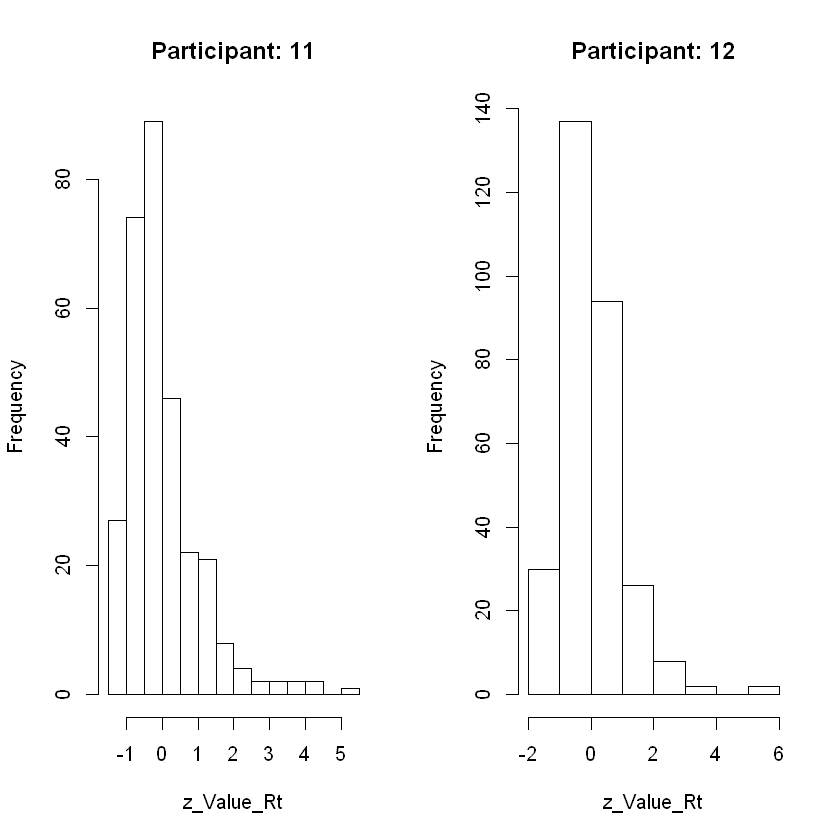

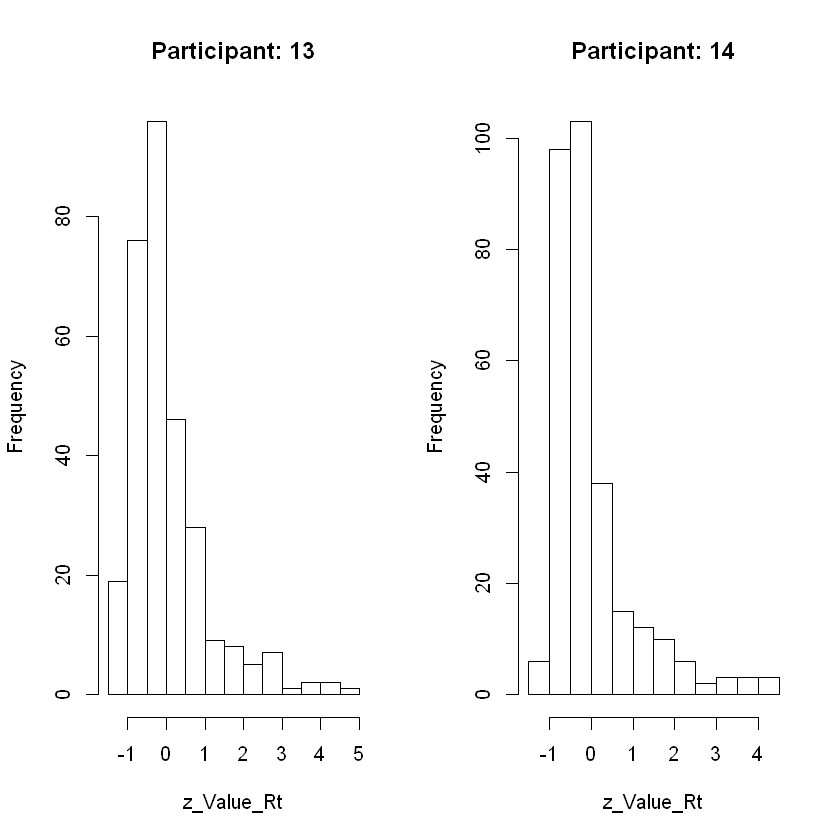

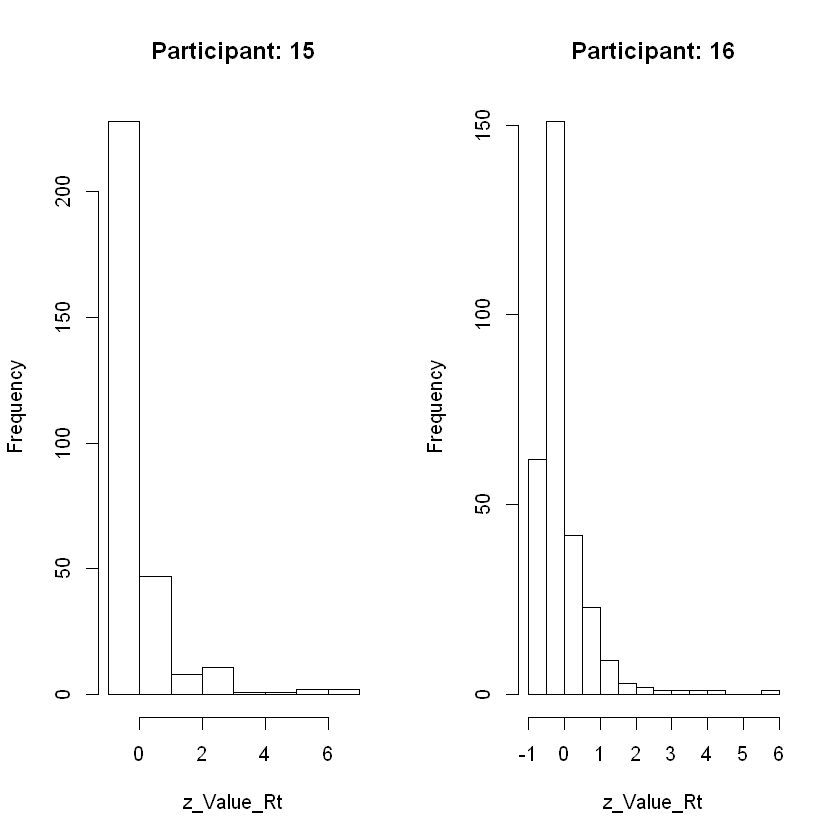

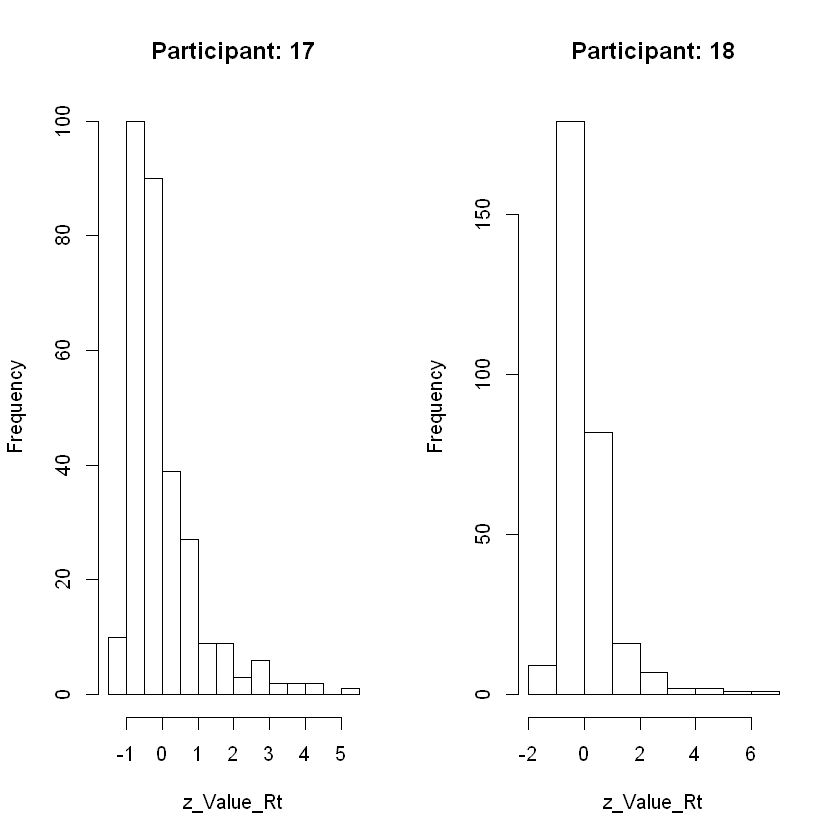

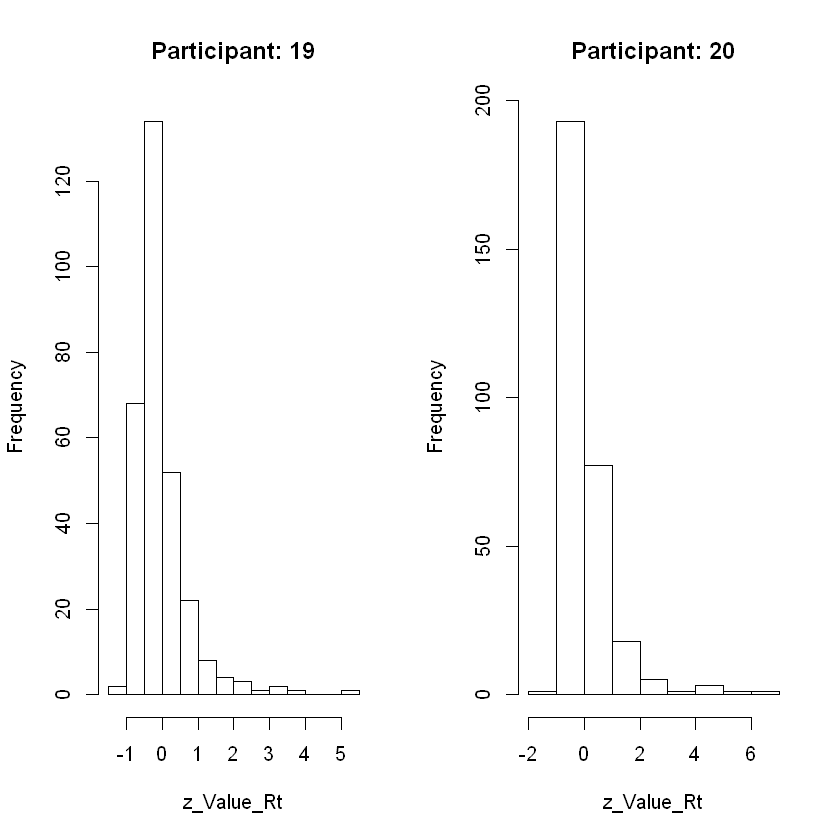

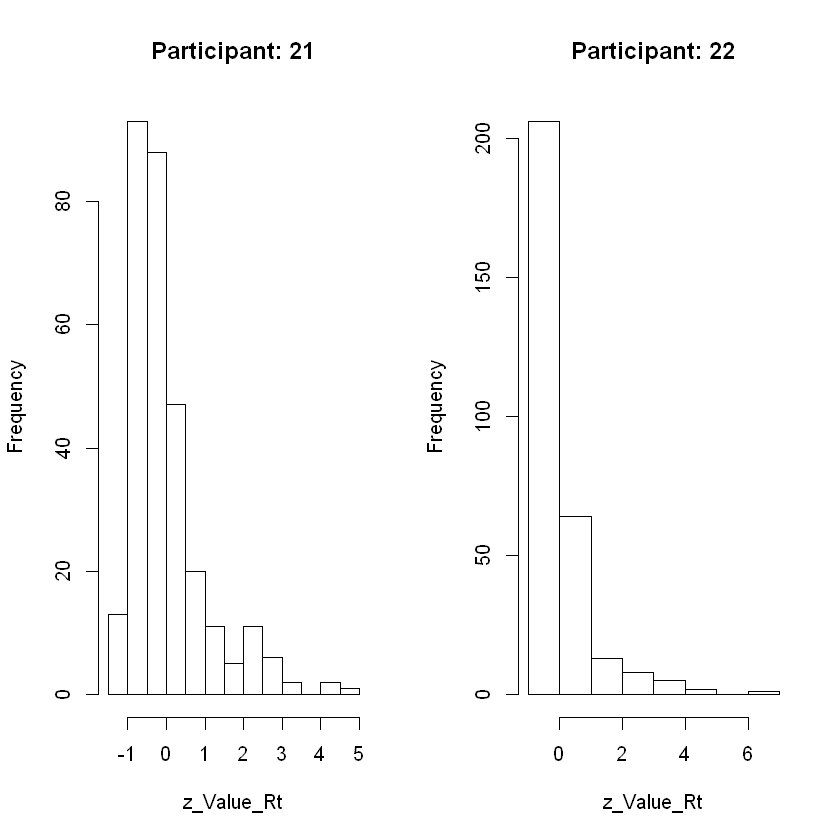

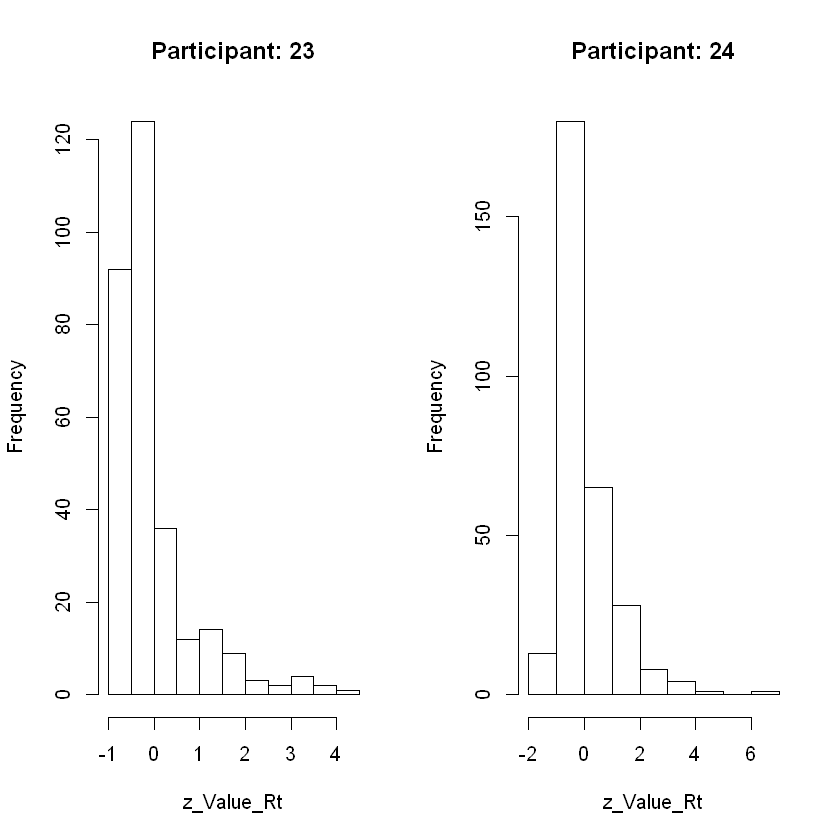

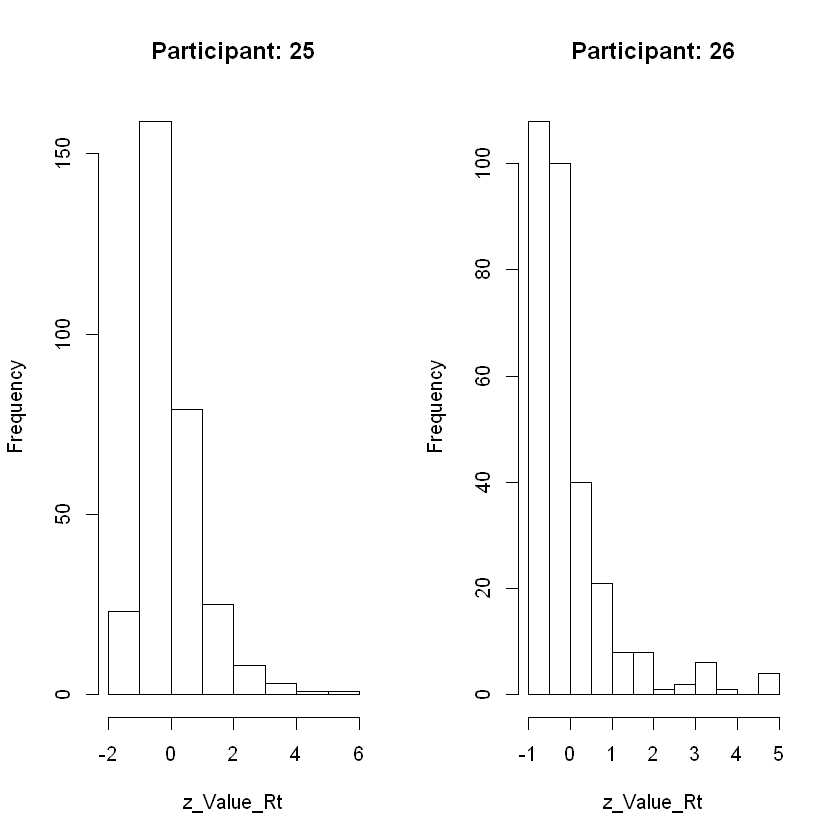

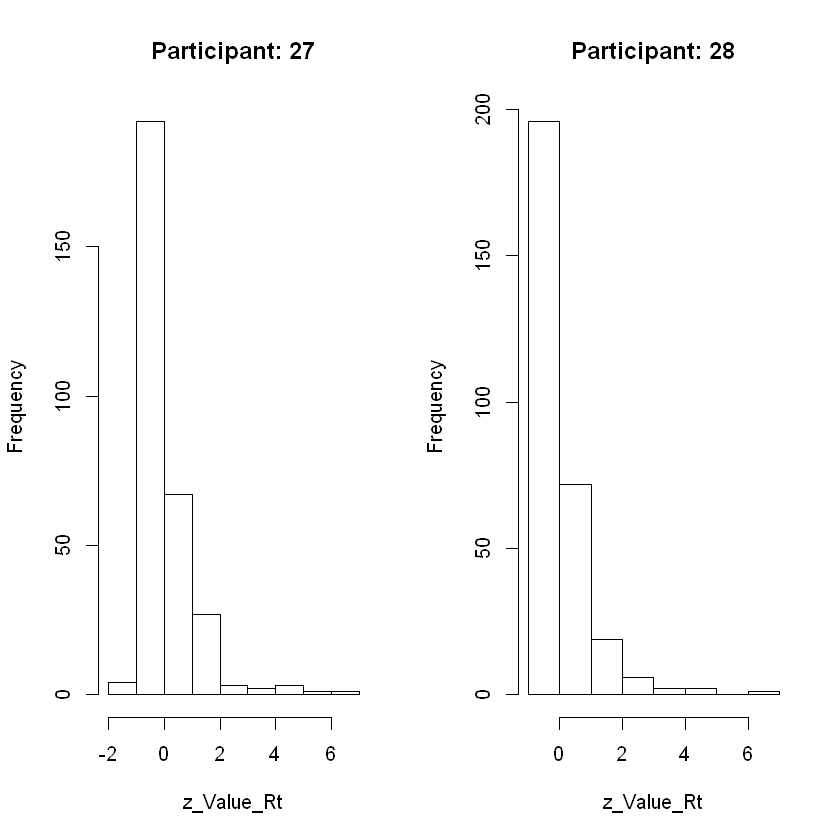

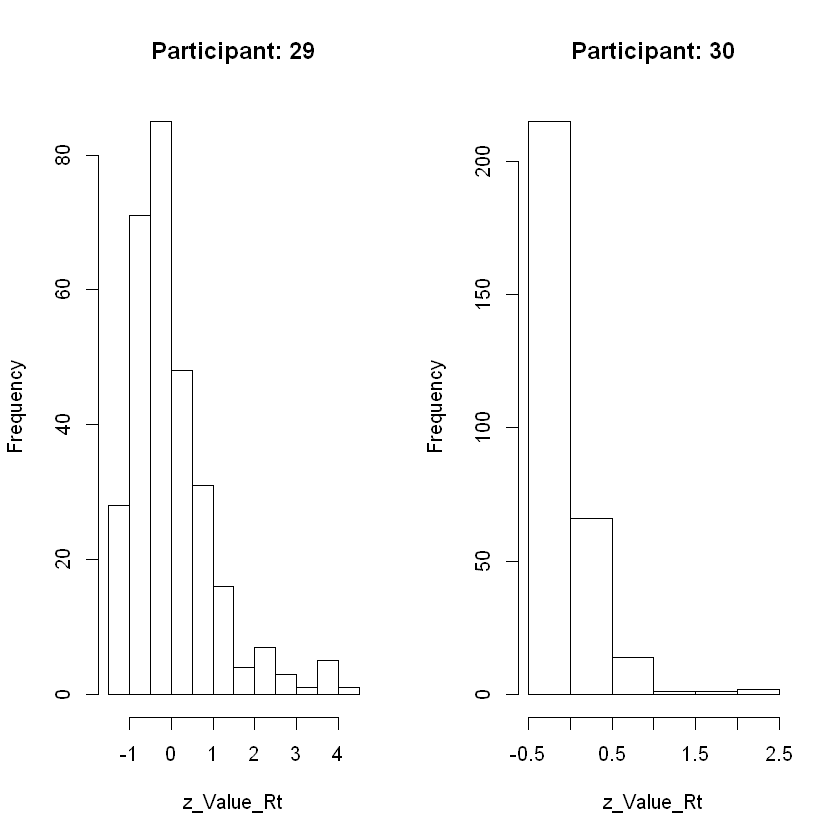

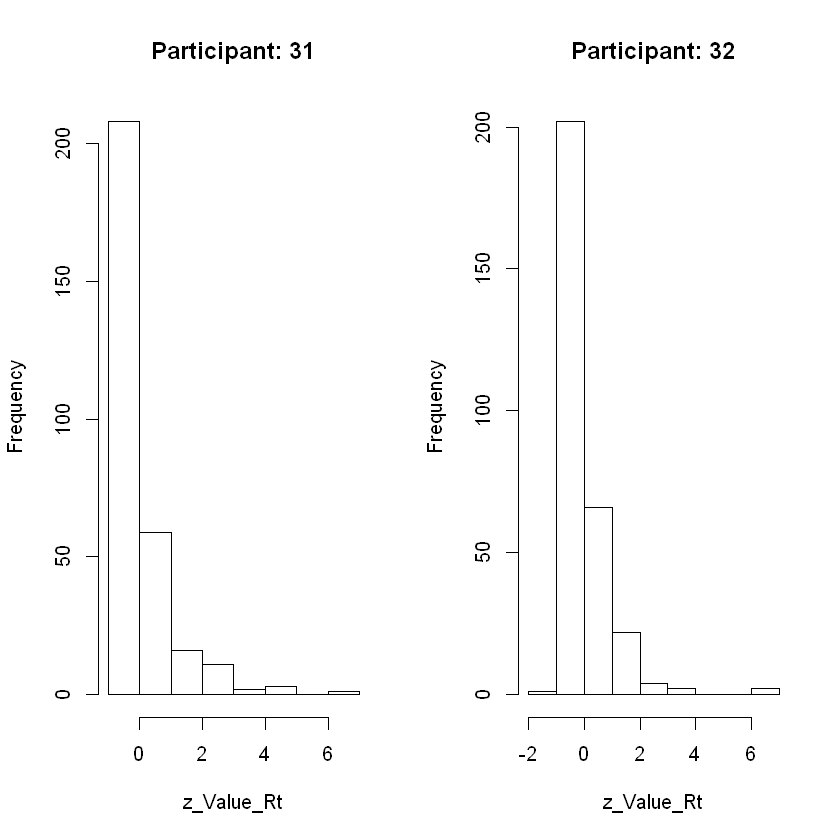

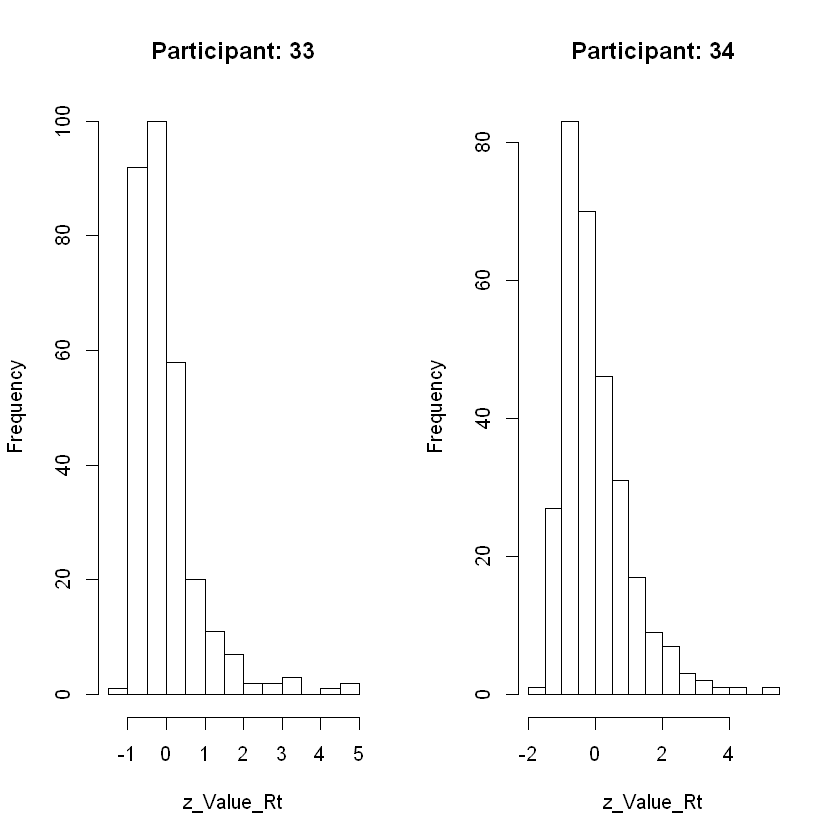

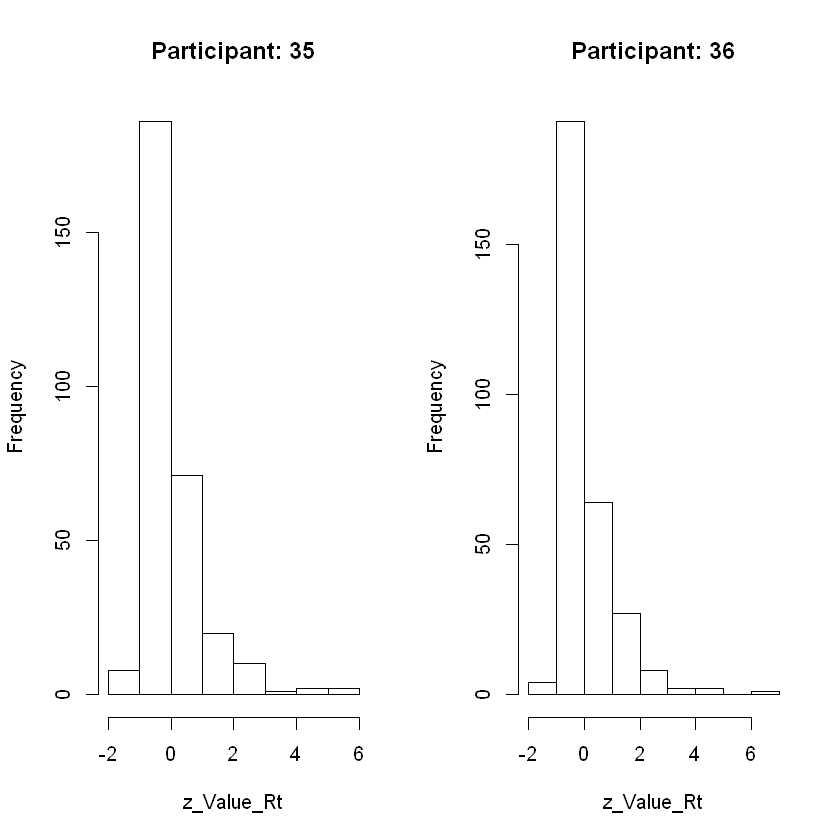

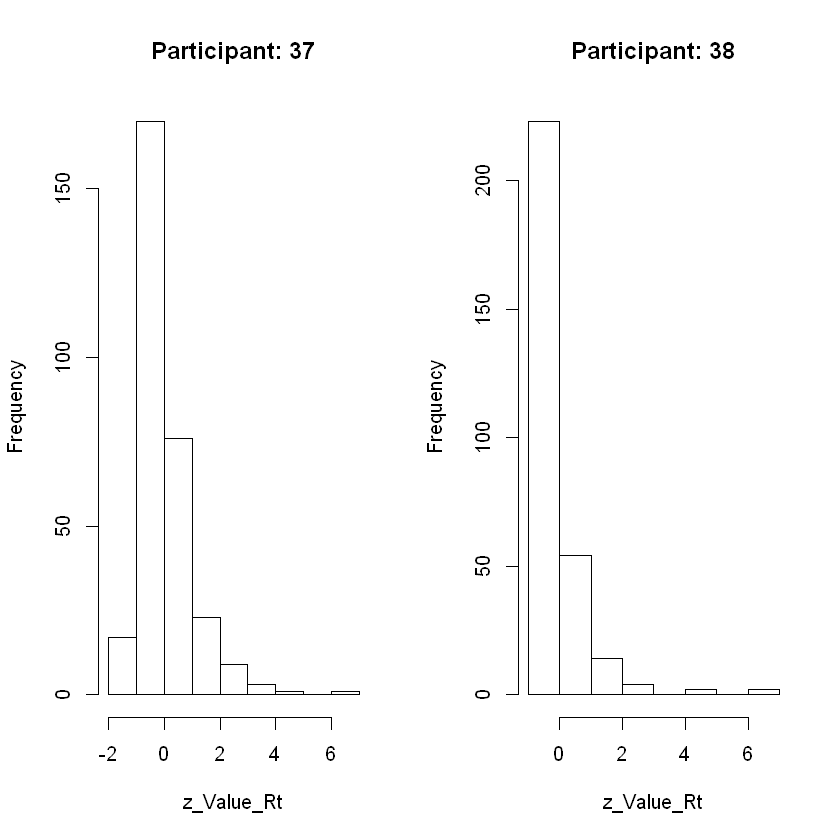

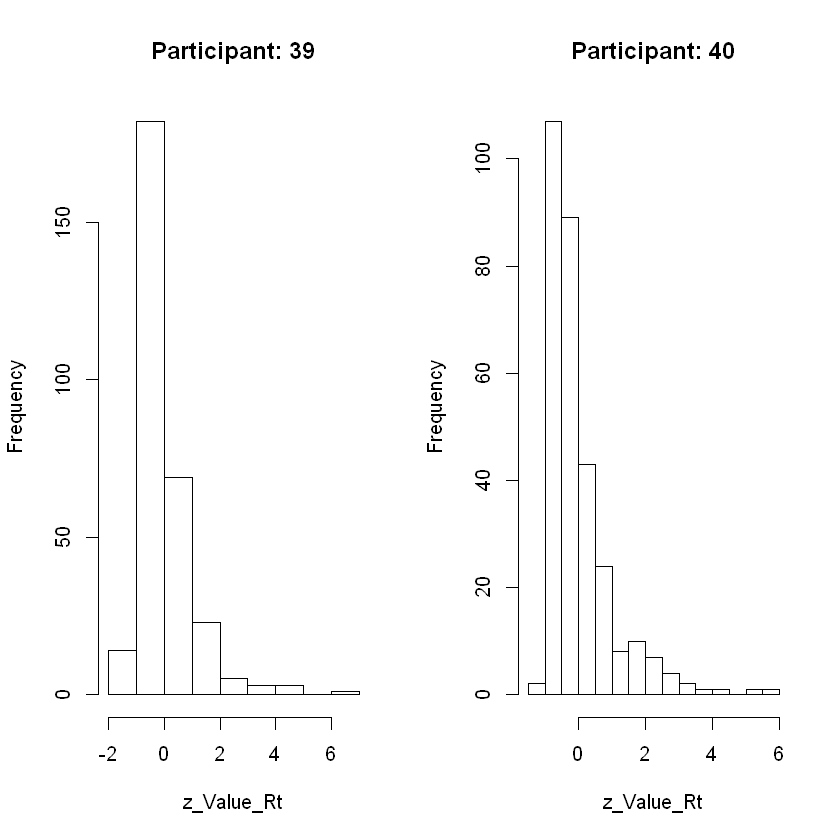

In [91]:
i <- 1
while (i<=40){
    old.par <- par(mfrow=c(1, 2))
    hist(dat$z_V_Rt[dat$participant==i], main = sprintf("Participant: %s", i), xlab='z_Value_Rt')
    hist(dat$z_V_Rt[dat$participant==i+1], main = sprintf("Participant: %s", i+1), xlab='z_Value_Rt')
    par(old.par)
    i <- i + 2
}

<a id='perceptrt'></a>

# Z-Scored Perceptual Response Time

Perceptual Response Times- Apart from Response Times which are 7 standard deviations away (which will be eliminated), no problem seems to exist.

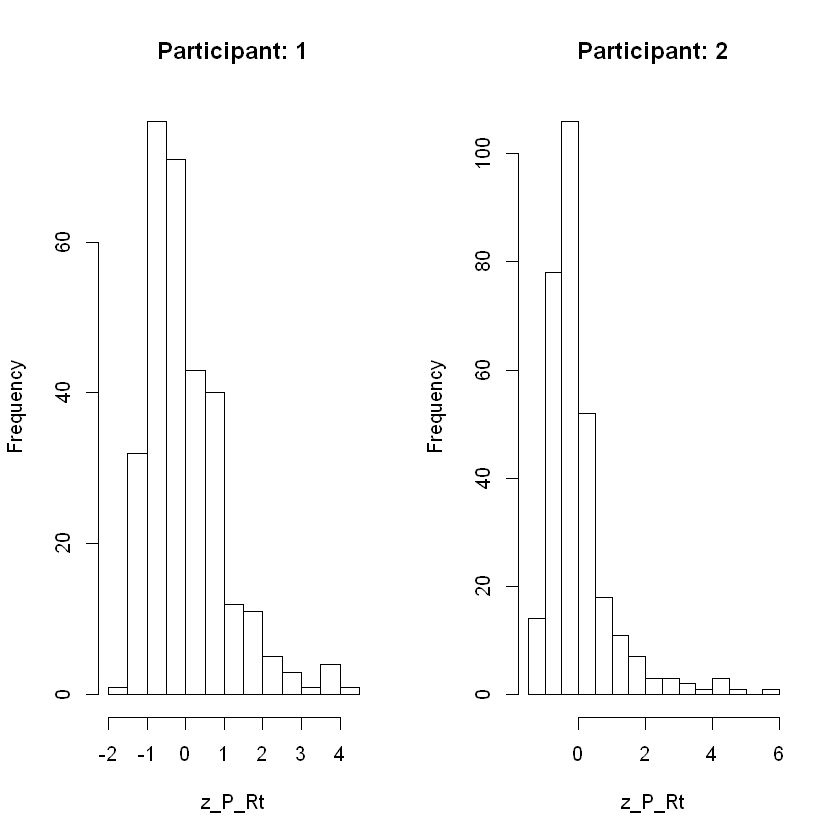

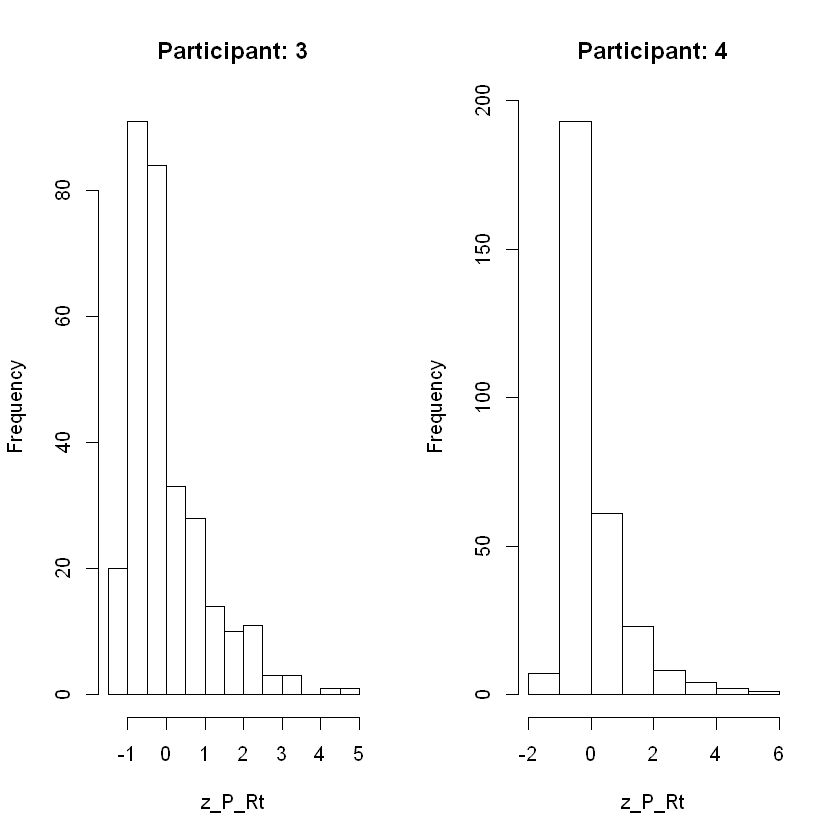

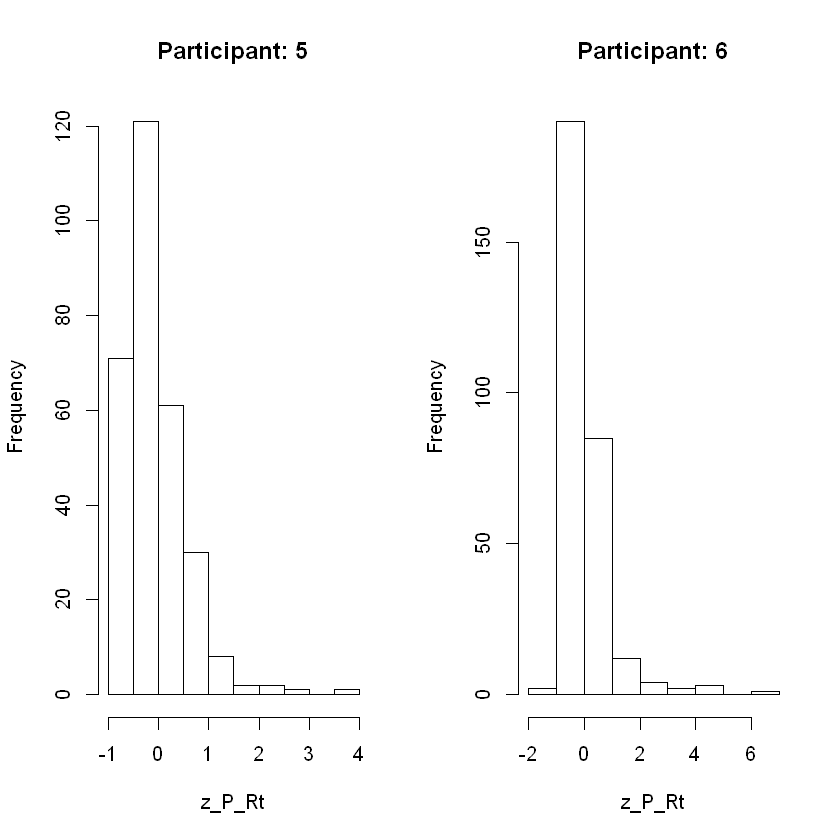

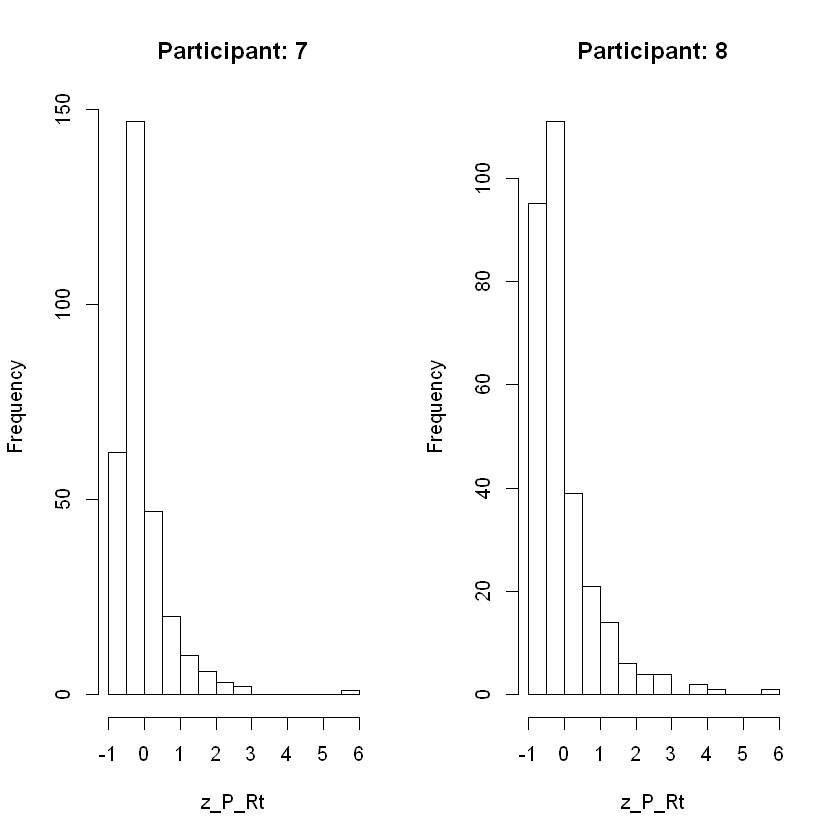

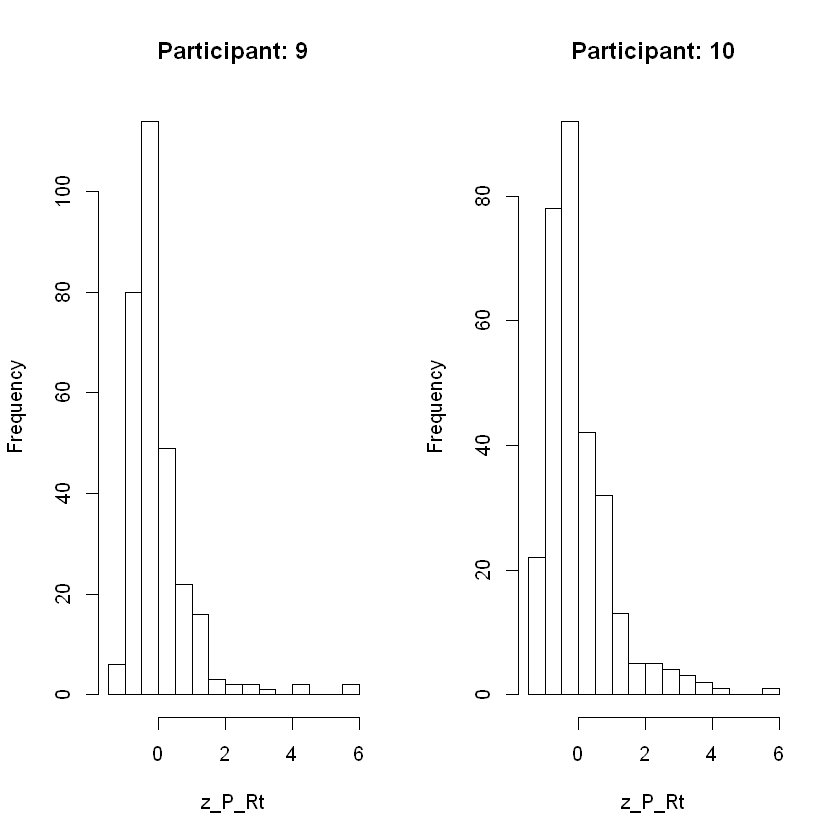

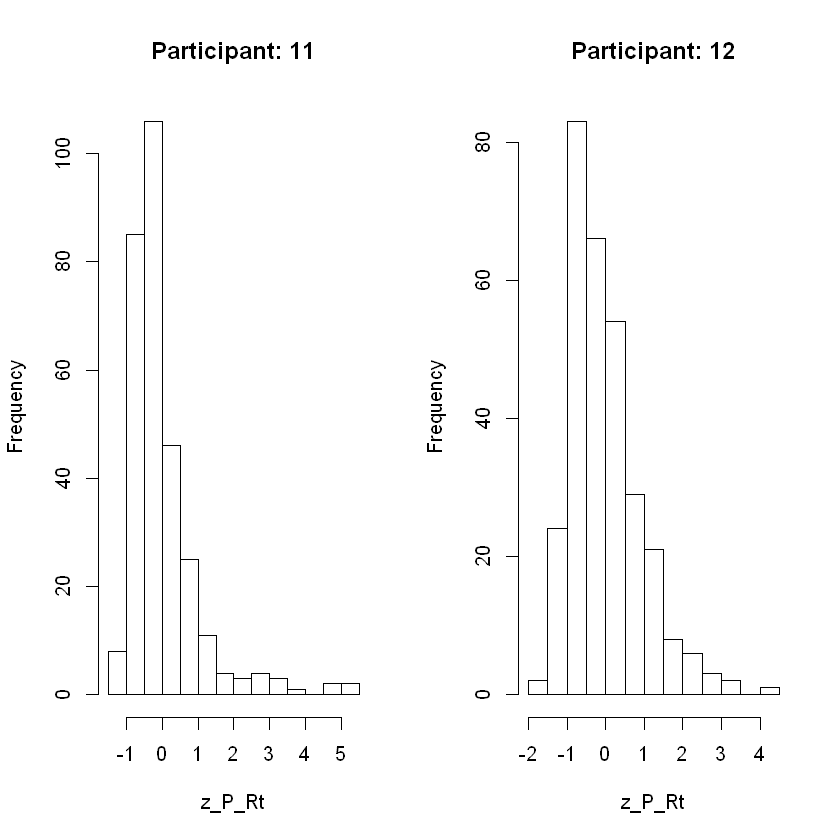

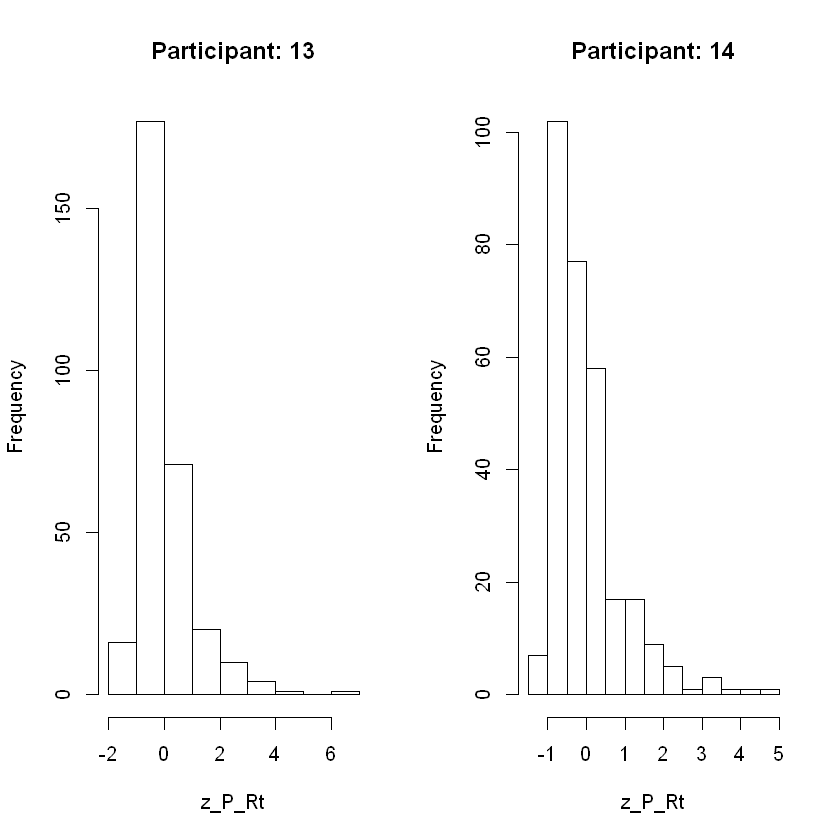

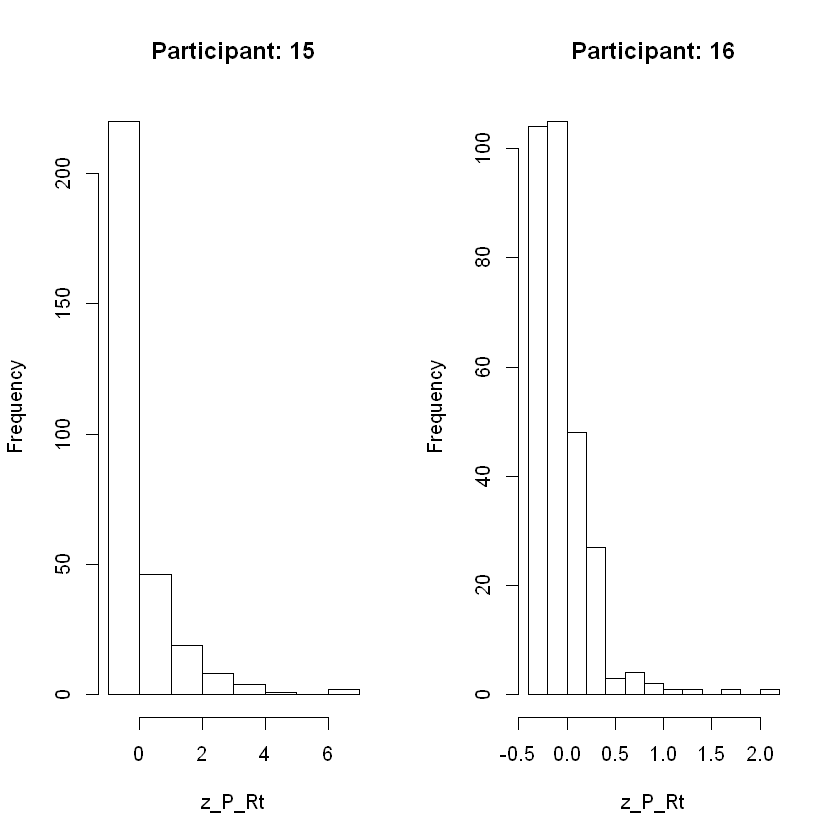

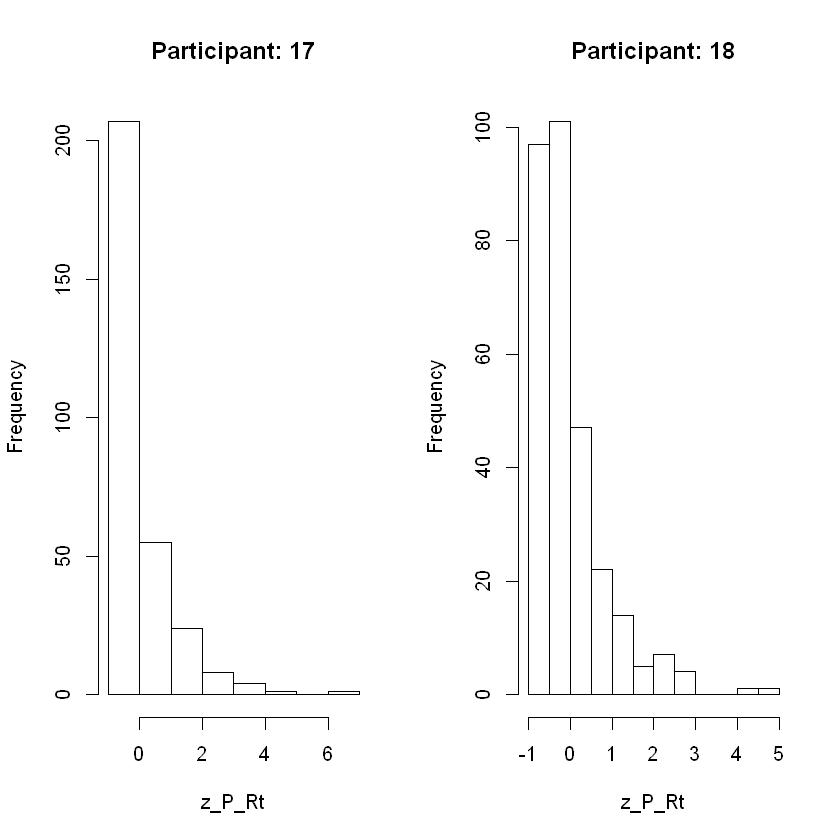

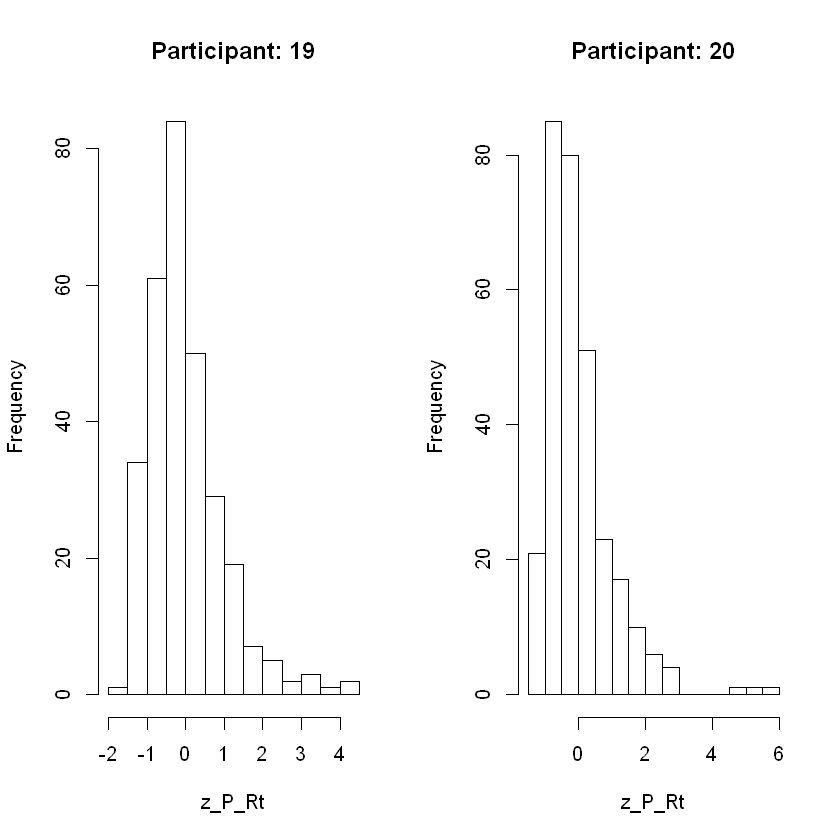

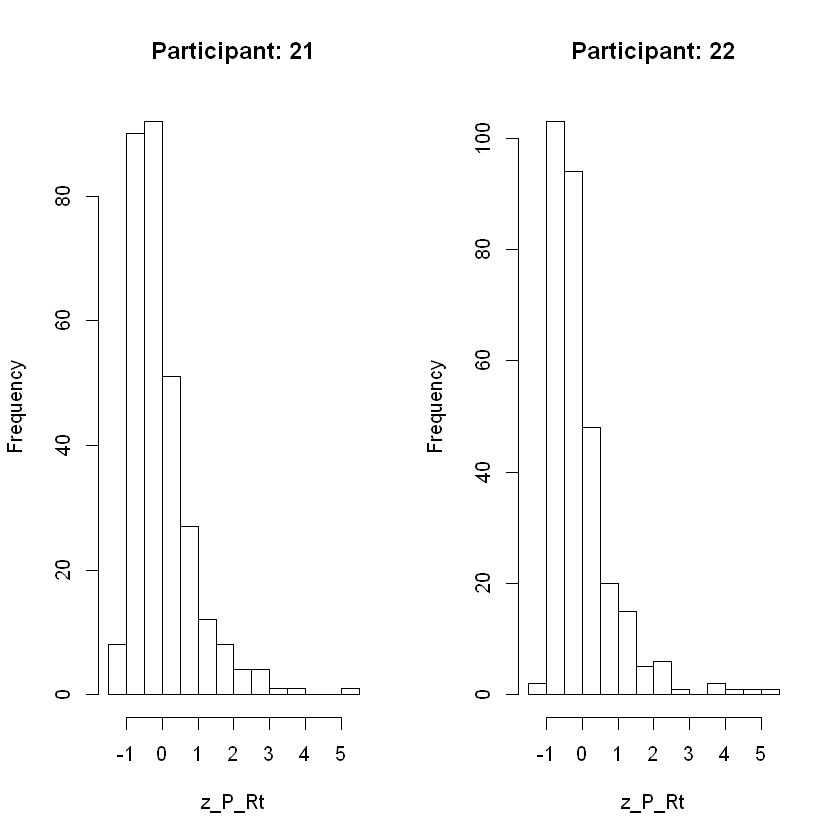

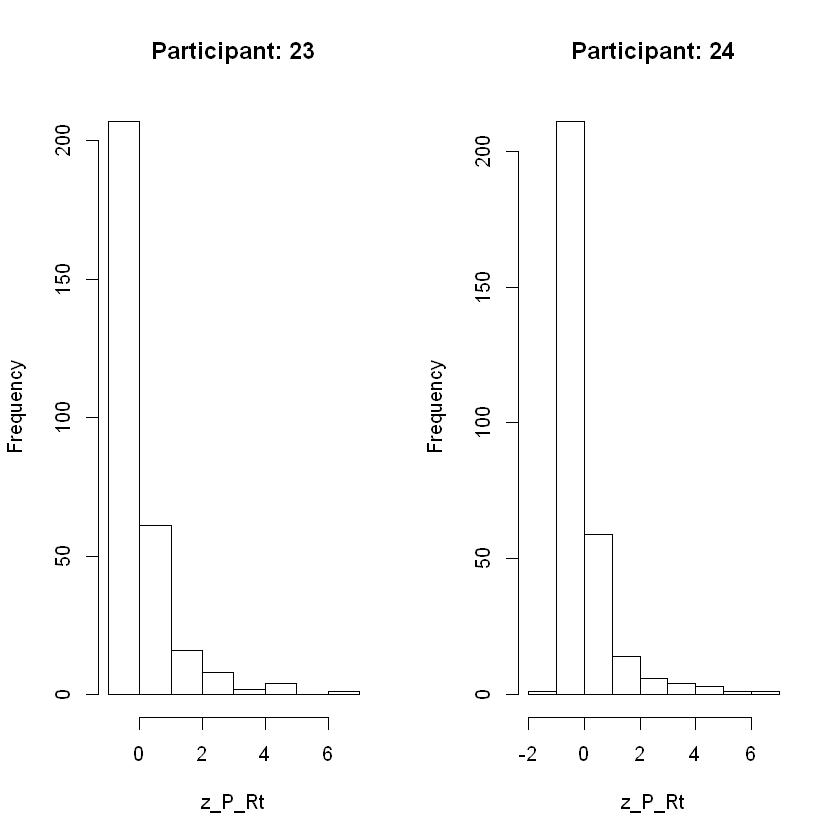

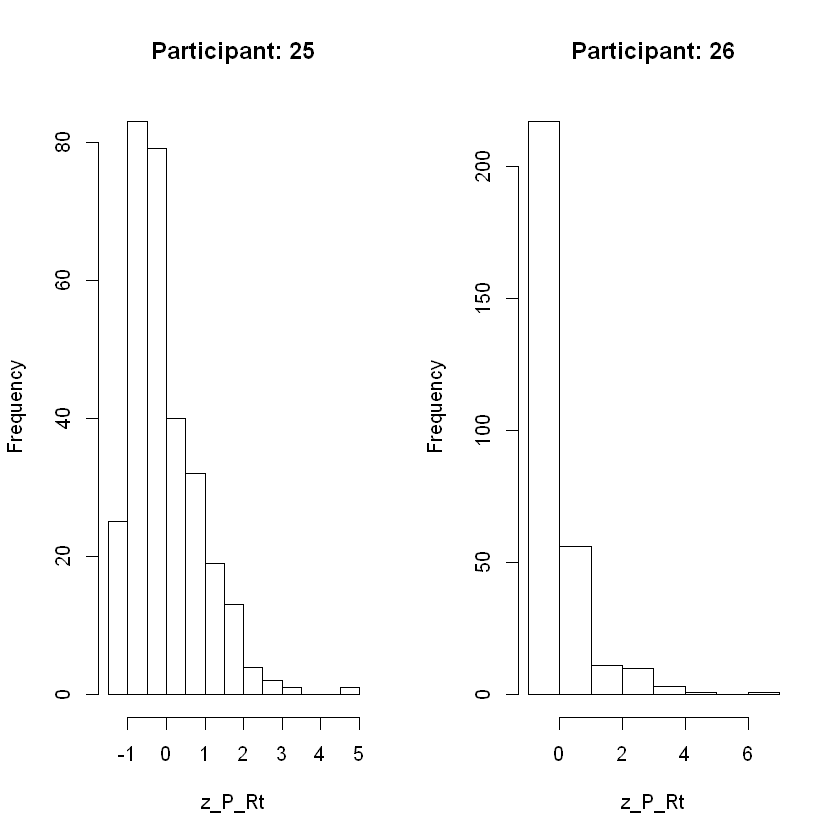

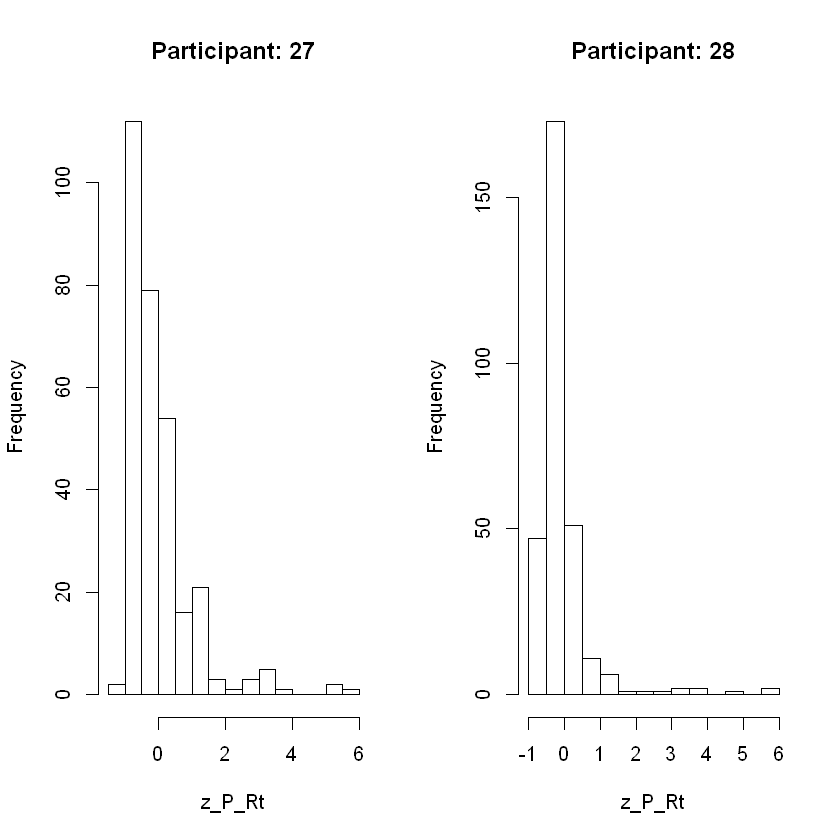

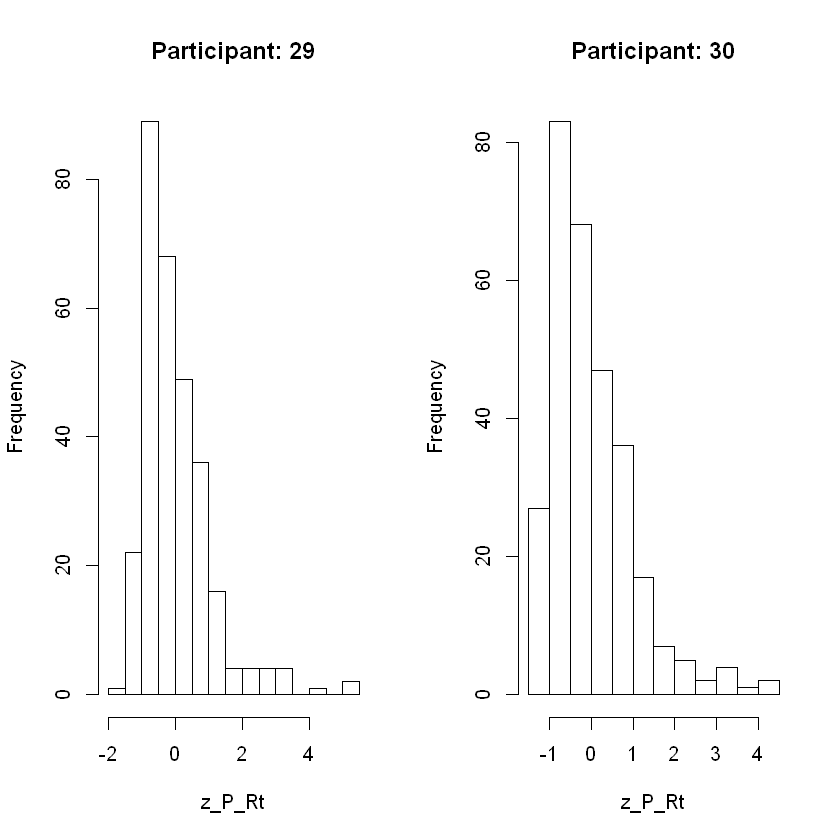

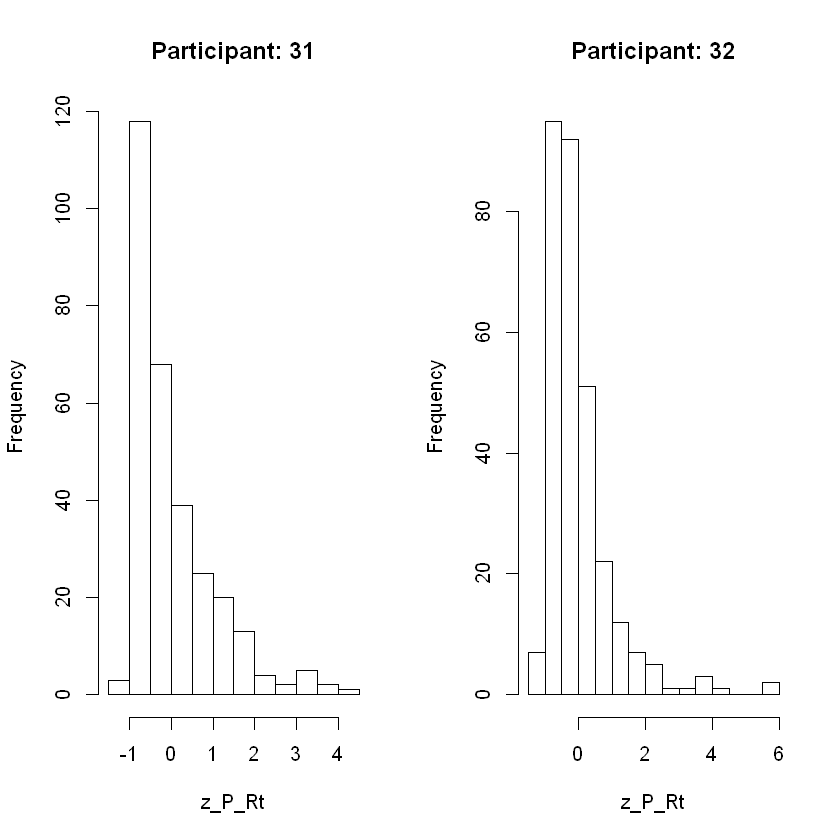

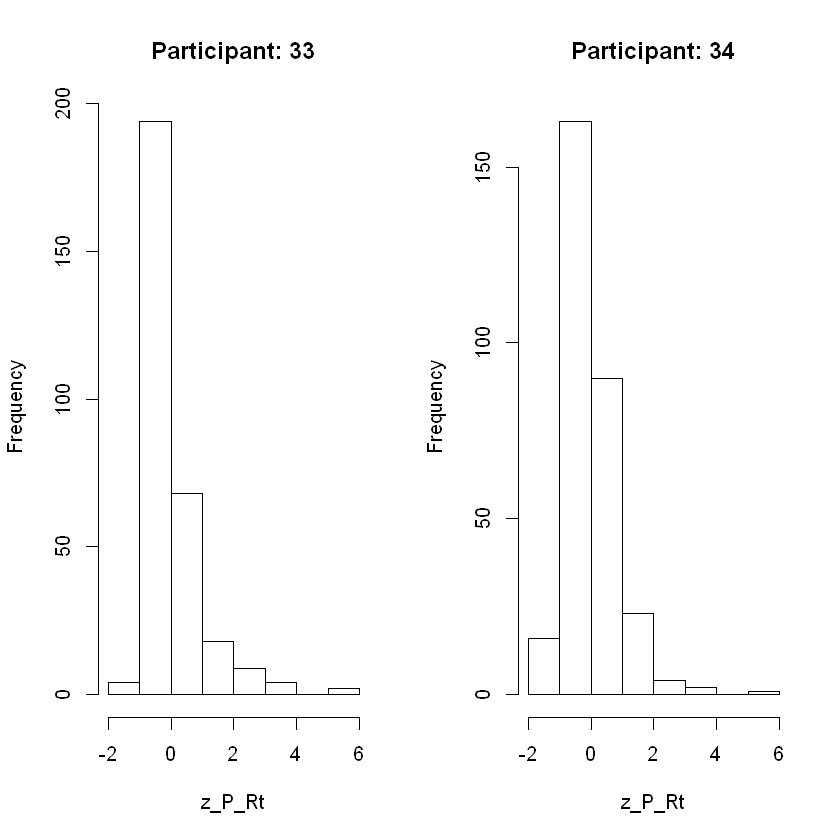

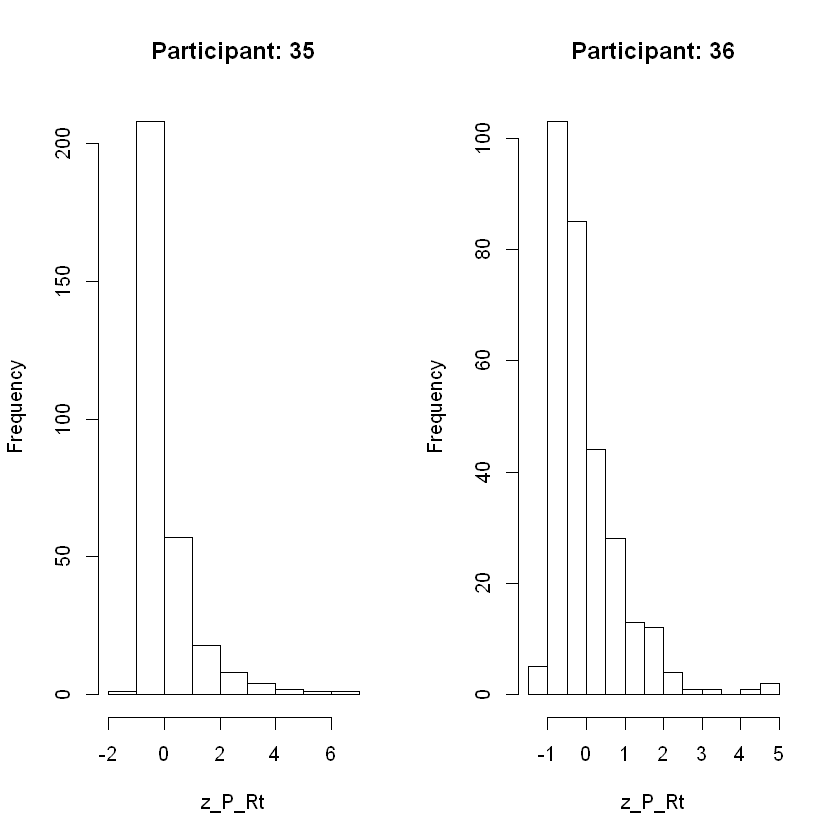

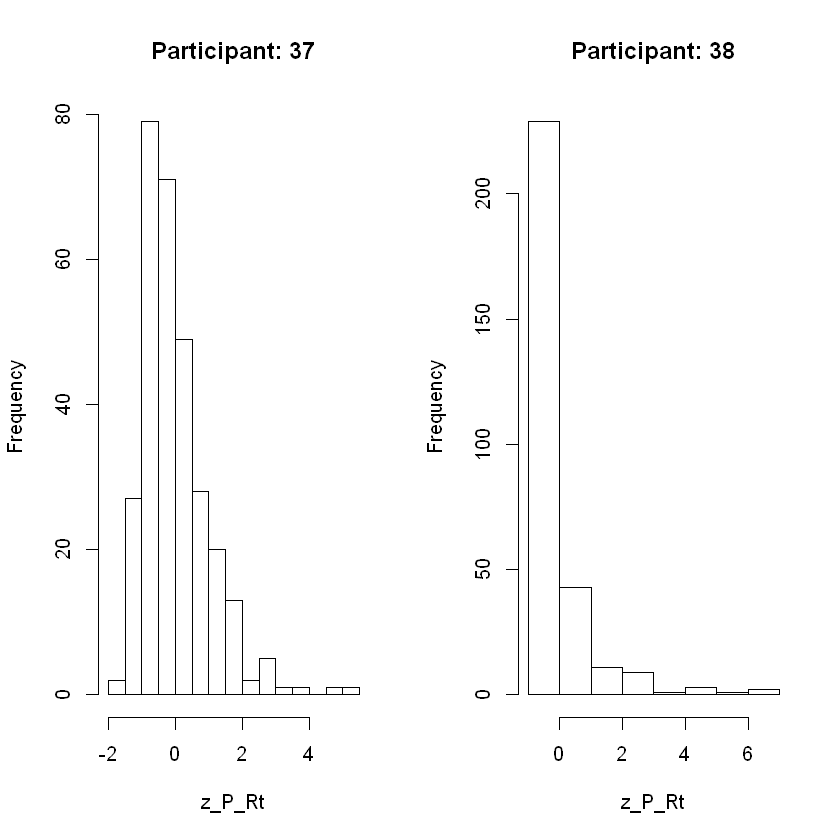

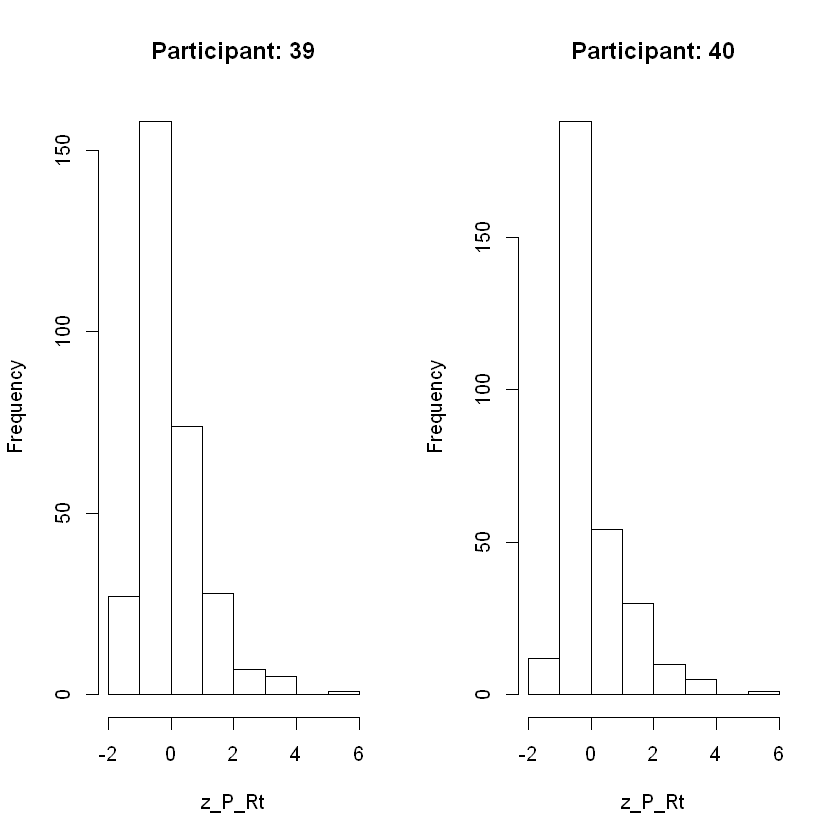

In [92]:
i <- 1
while (i<=40){
    old.par <- par(mfrow=c(1, 2))
    hist(dat$z_P_Rt[dat$participant==i], main = sprintf("Participant: %s", i), xlab='z_P_Rt')
    hist(dat$z_P_Rt[dat$participant==i+1], main = sprintf("Participant: %s", i+1), xlab='z_P_Rt')
    par(old.par)
    i <- i + 2
}

# [Back to Content](#content)

<a id='final'></a>

# How Many times participants choose one of the decks and how may wins there are provided across trials
Number of Blue and Orange Deck Choices for Each Participant (Blue and Orange lines, correspondingly)

Number of times each participants wins - Green Line

I see no reason to exclude any participant.

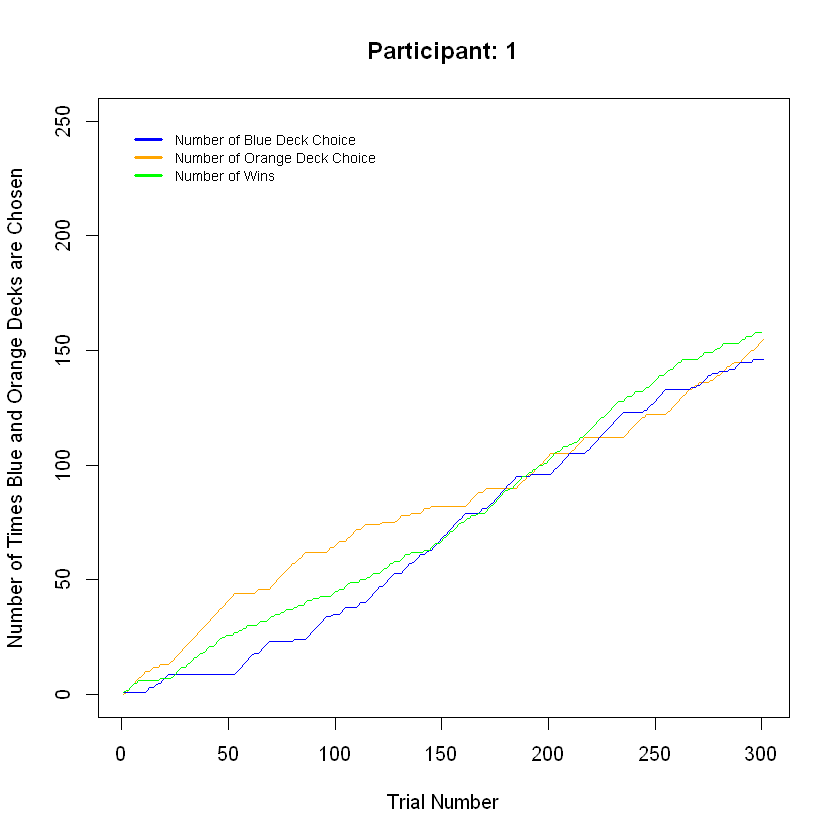

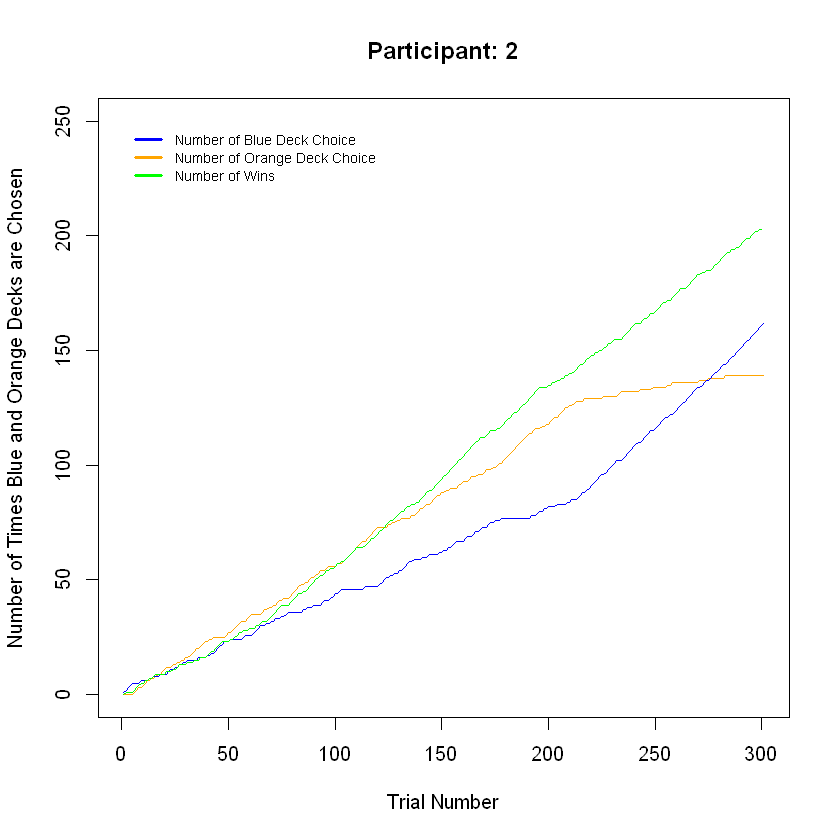

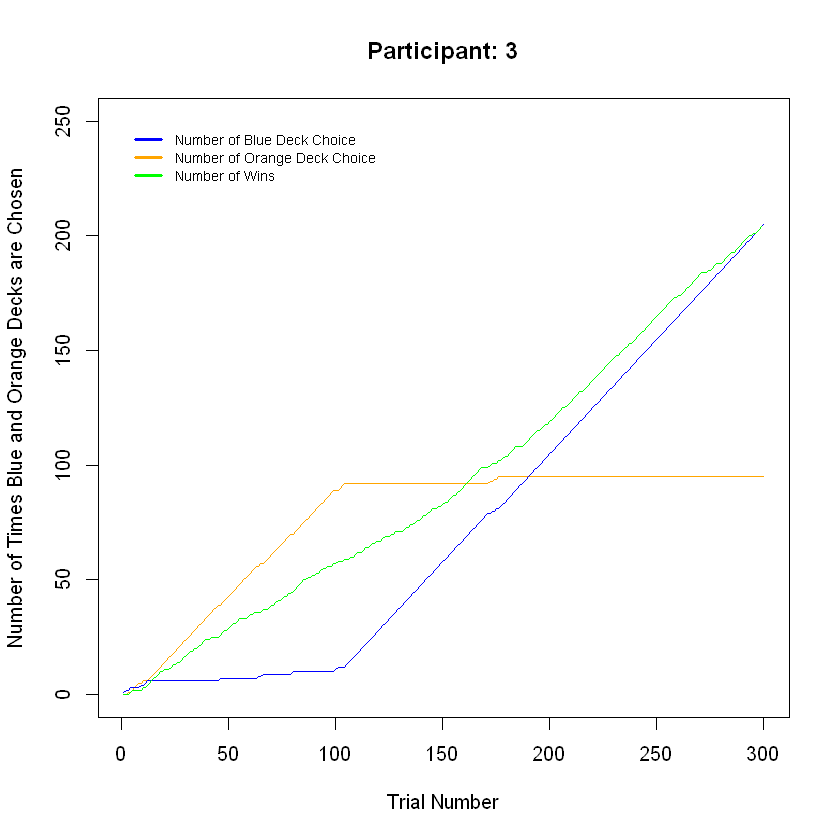

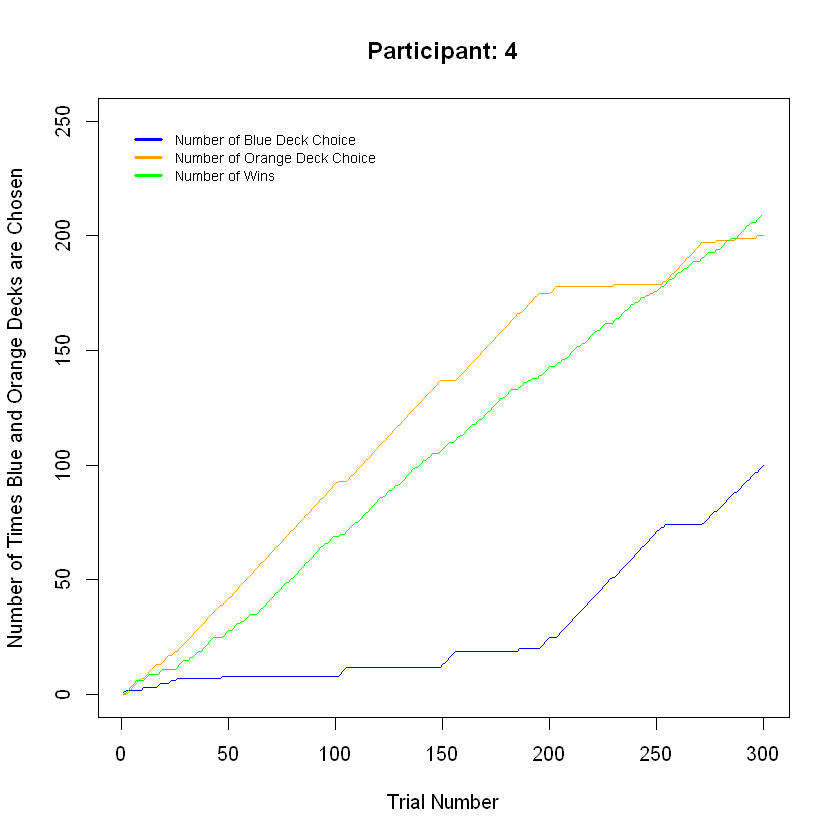

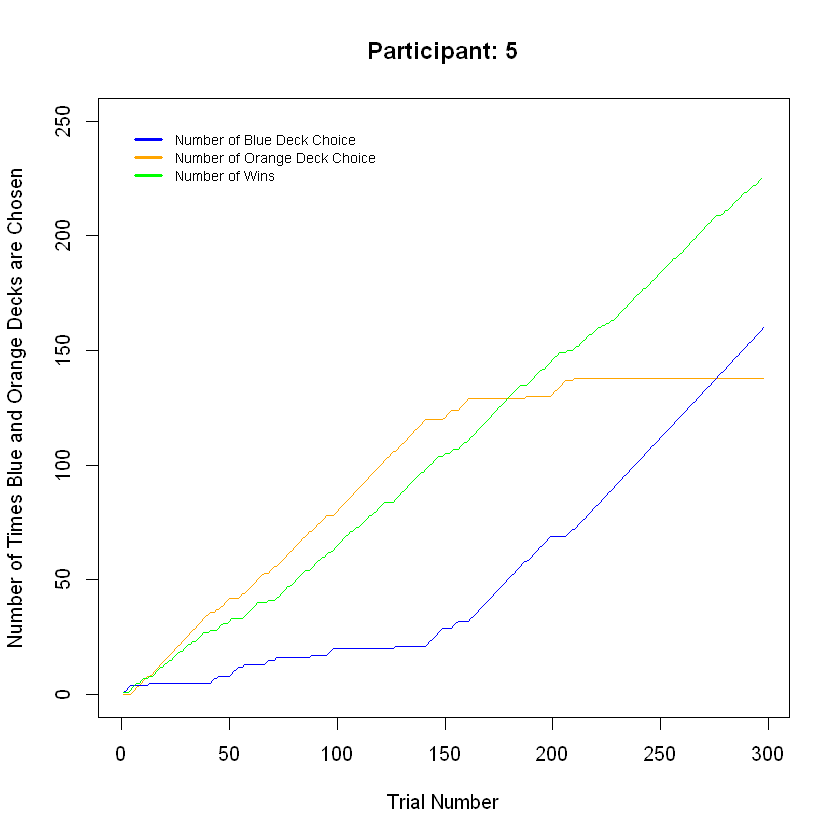

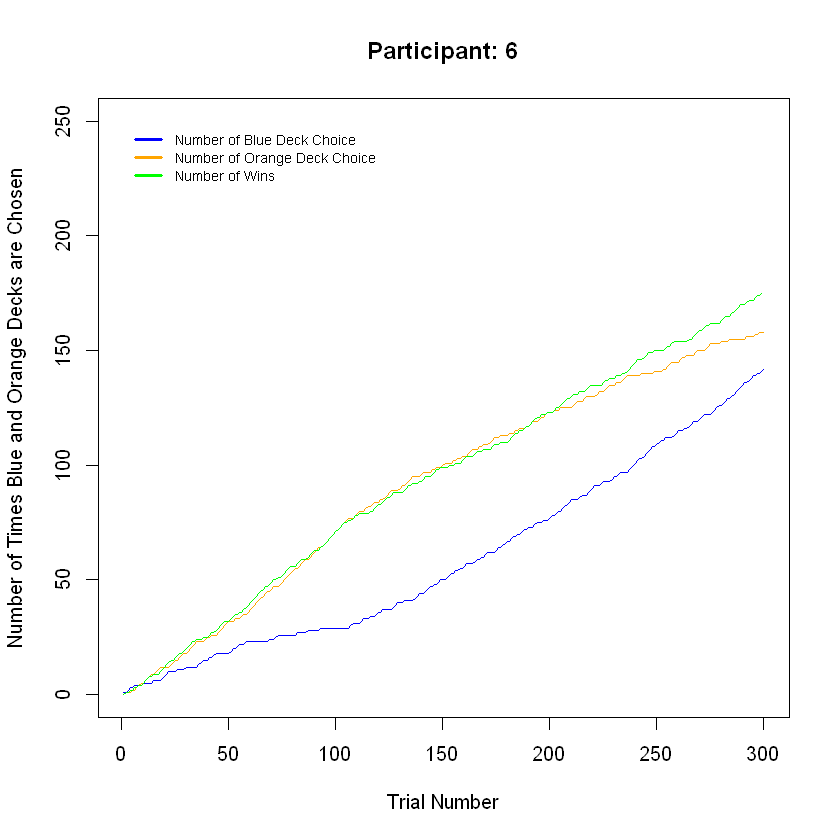

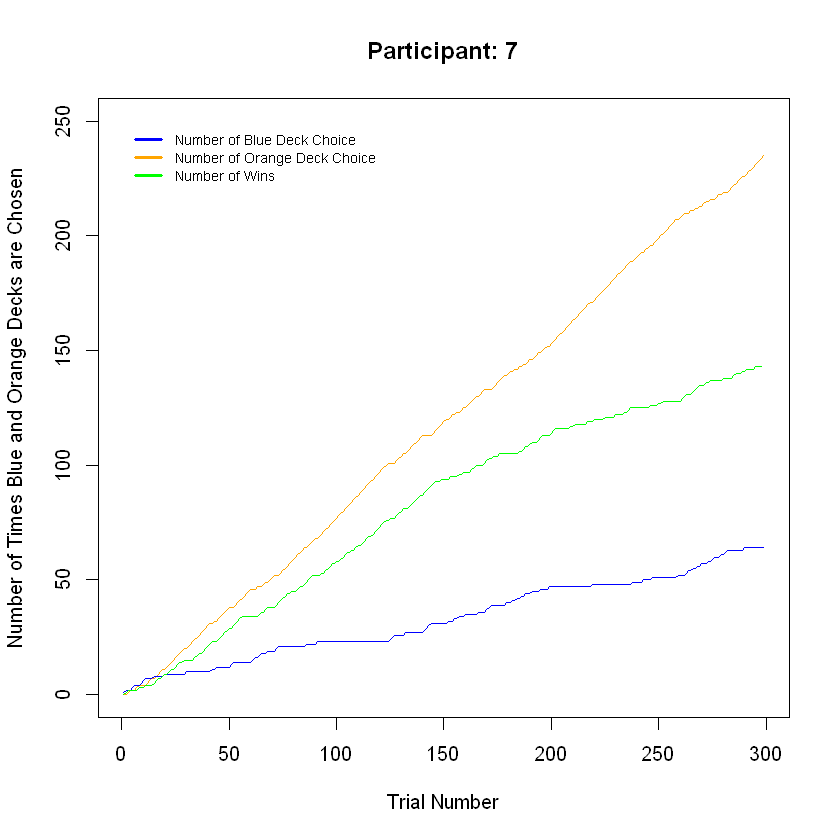

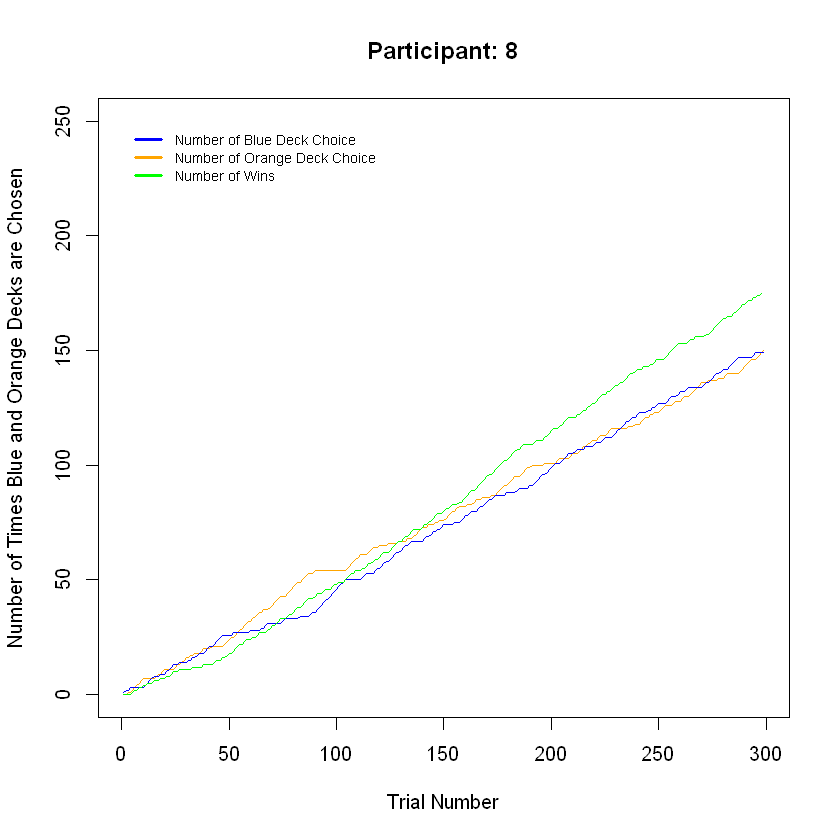

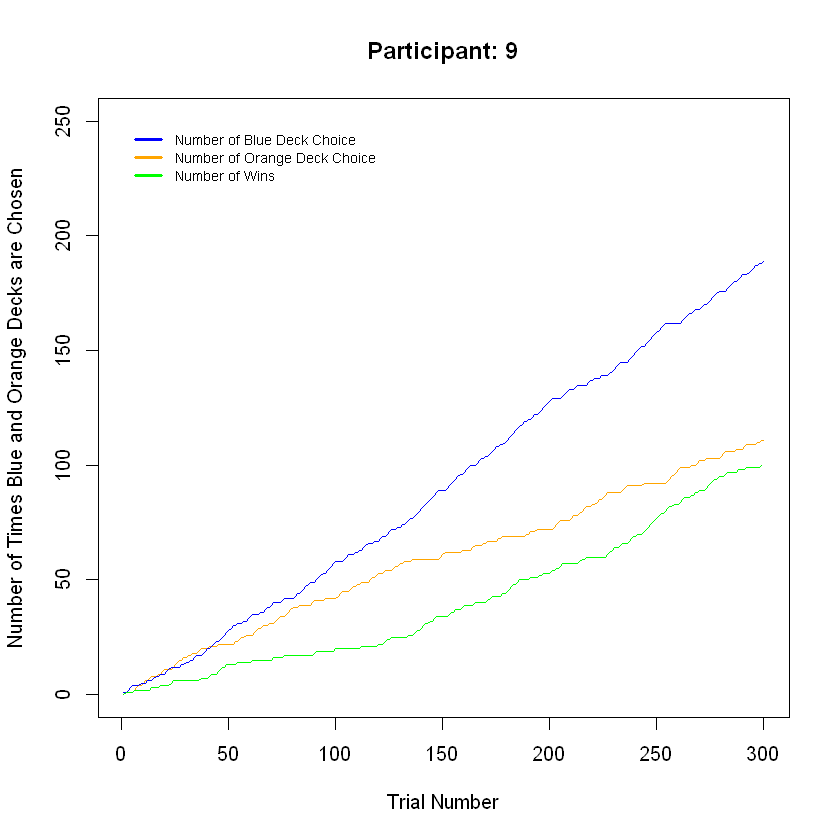

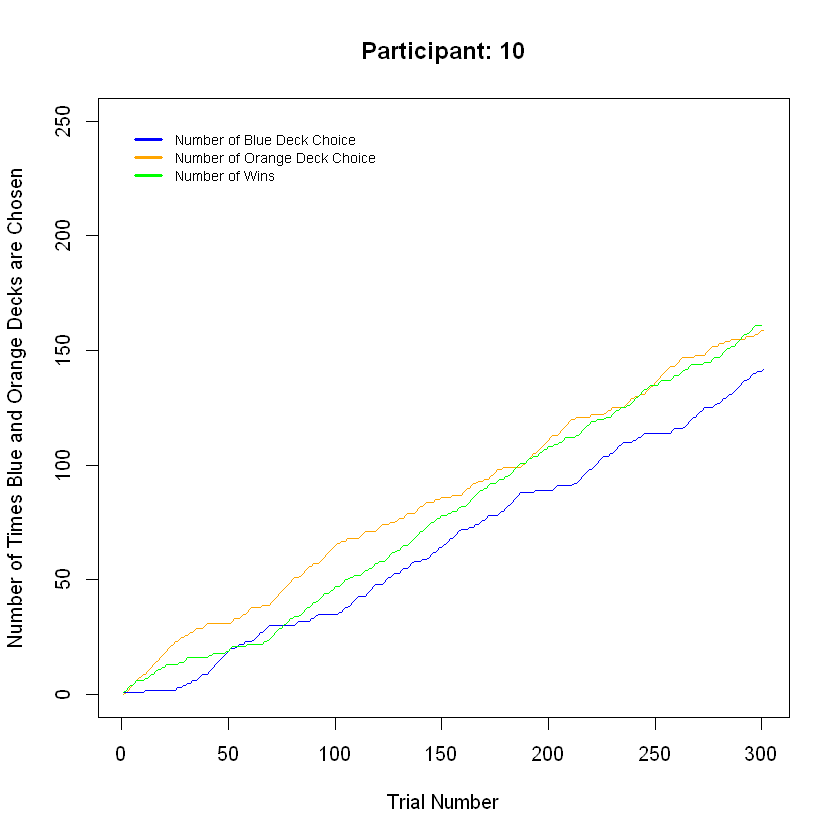

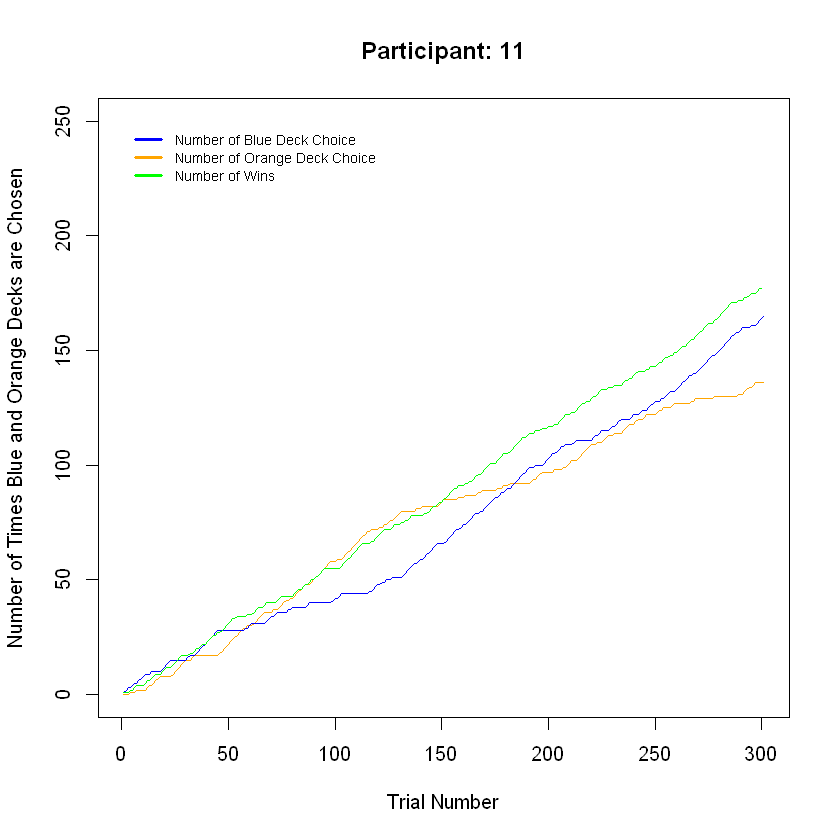

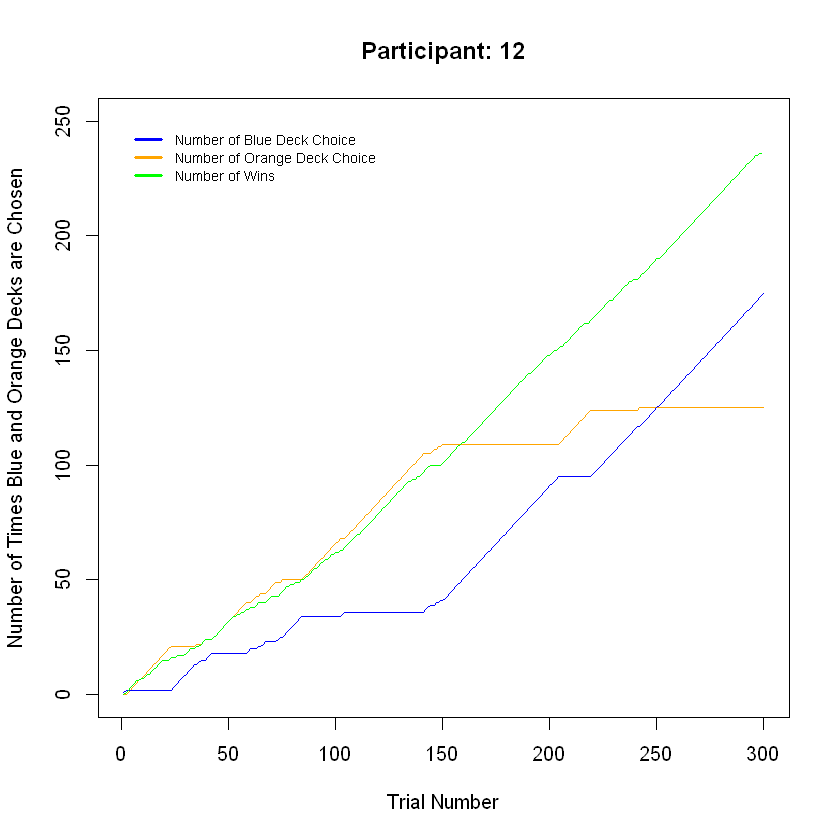

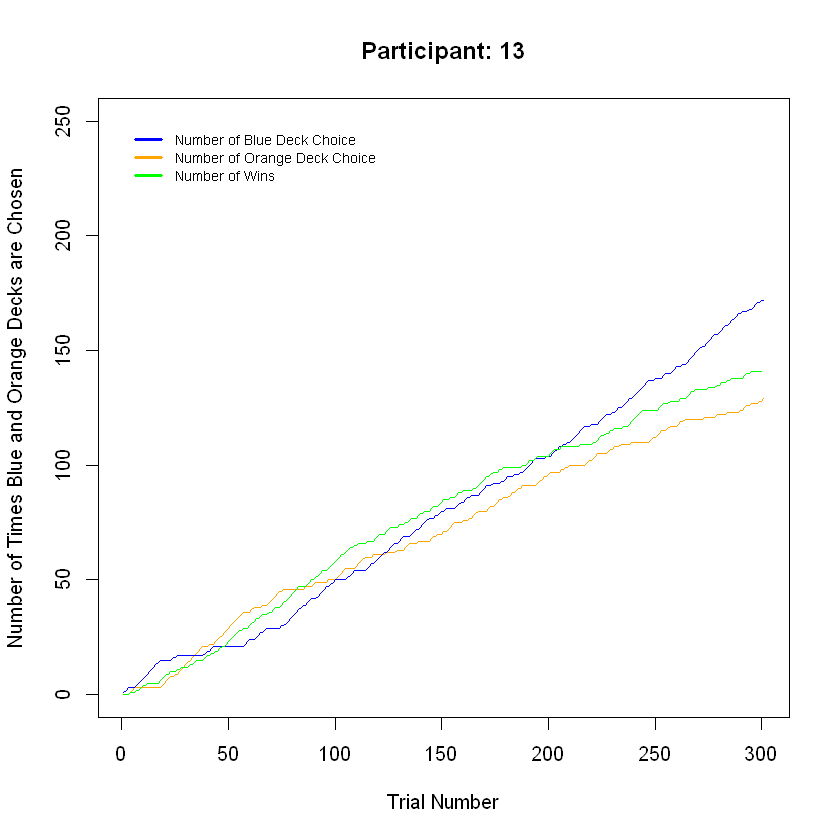

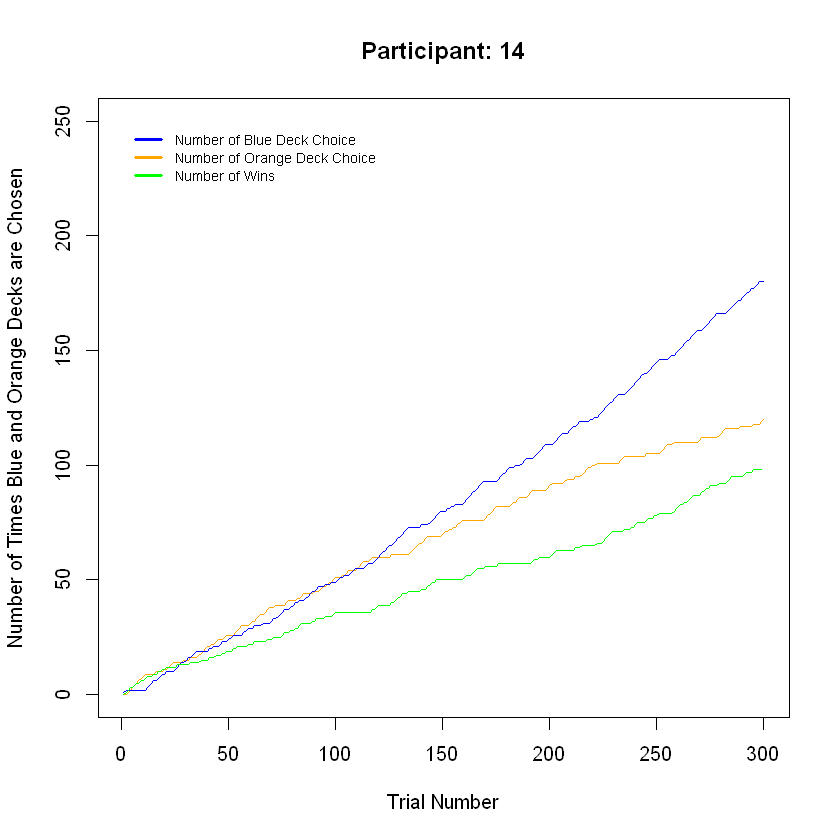

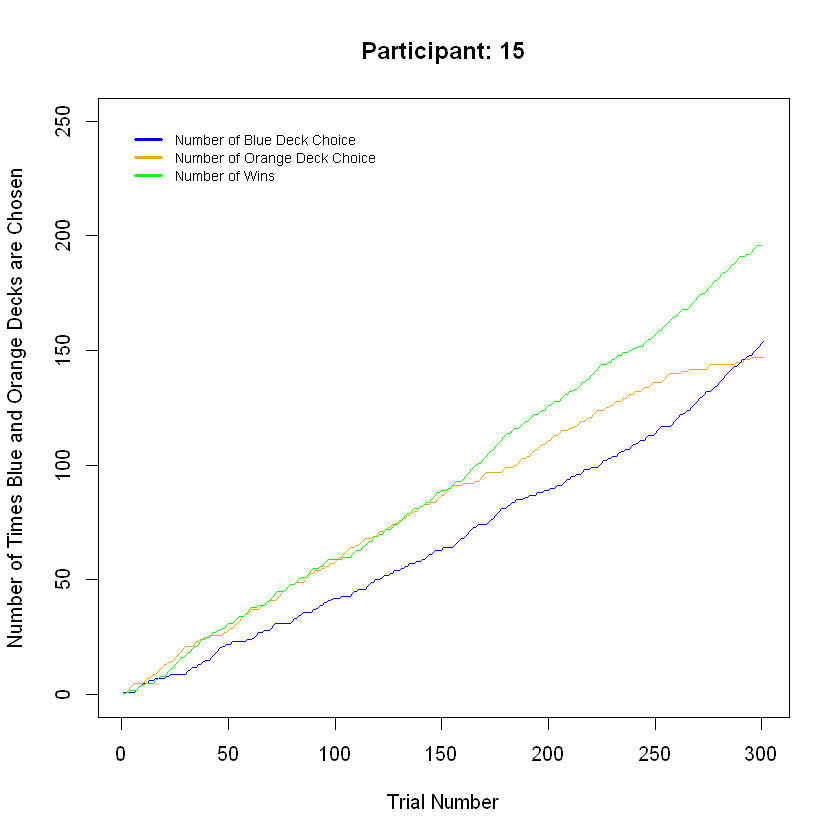

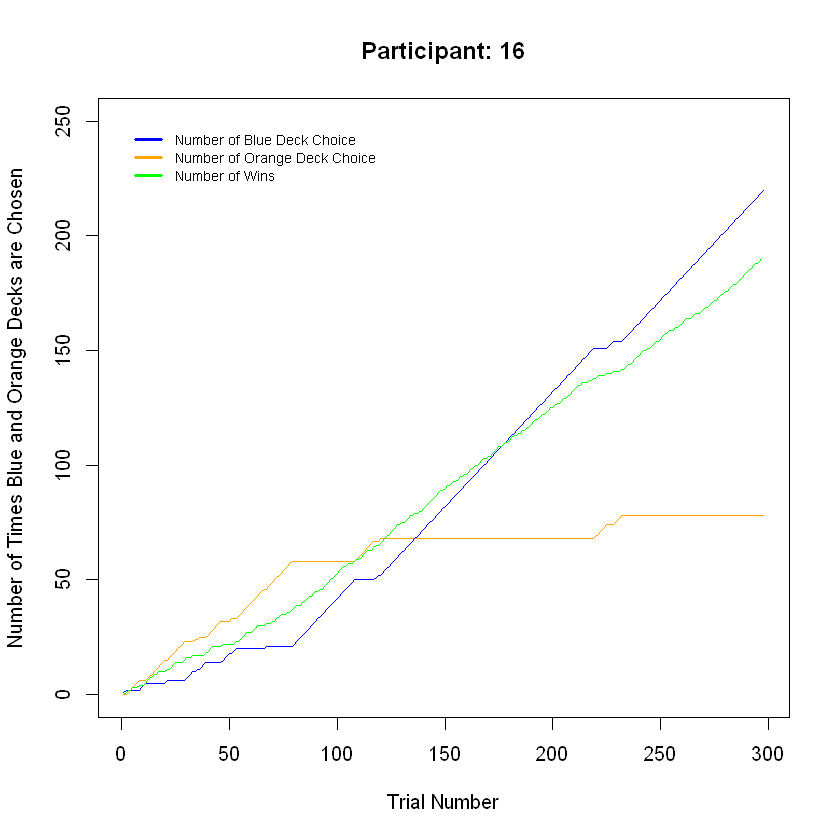

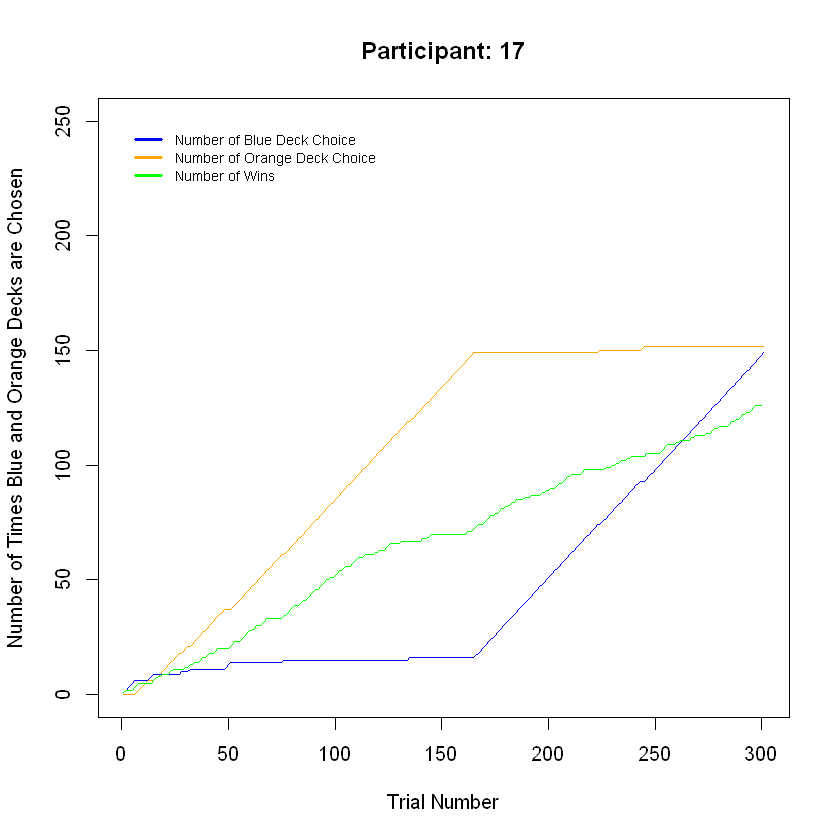

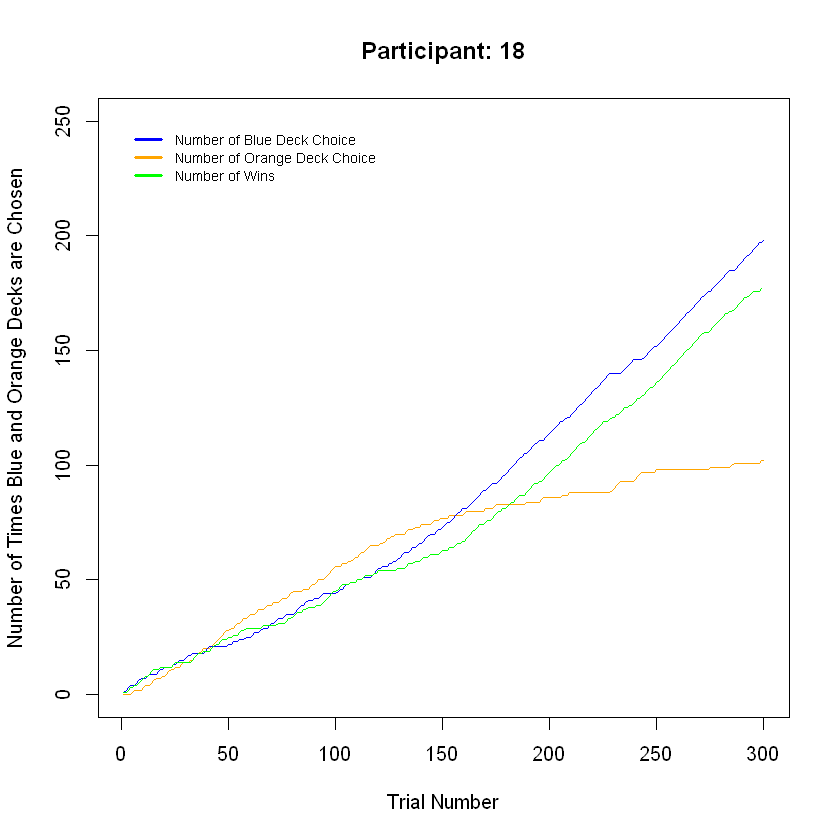

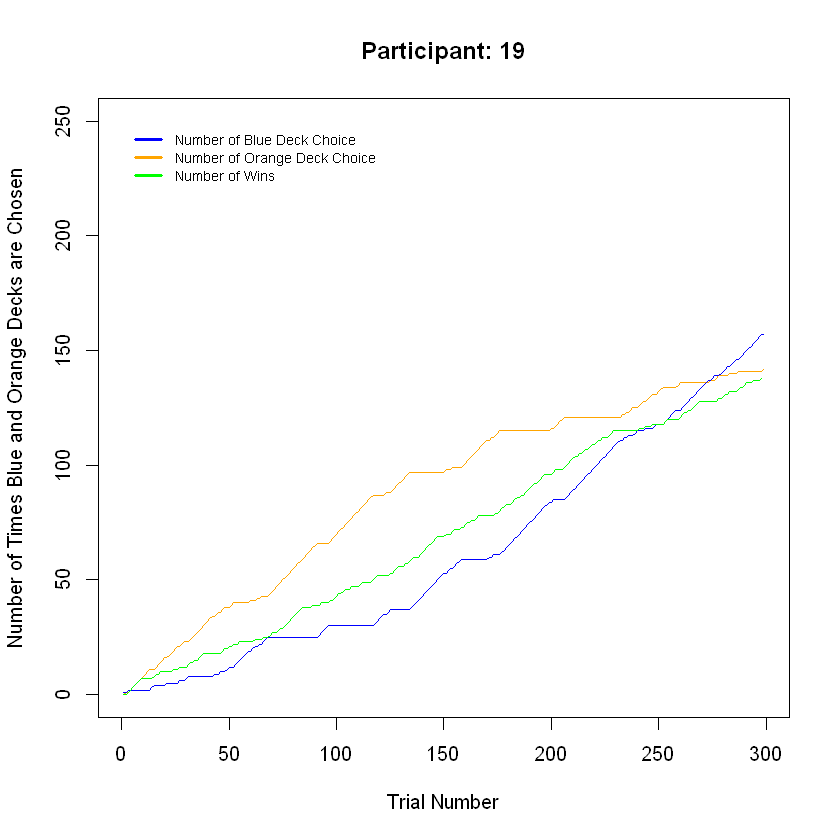

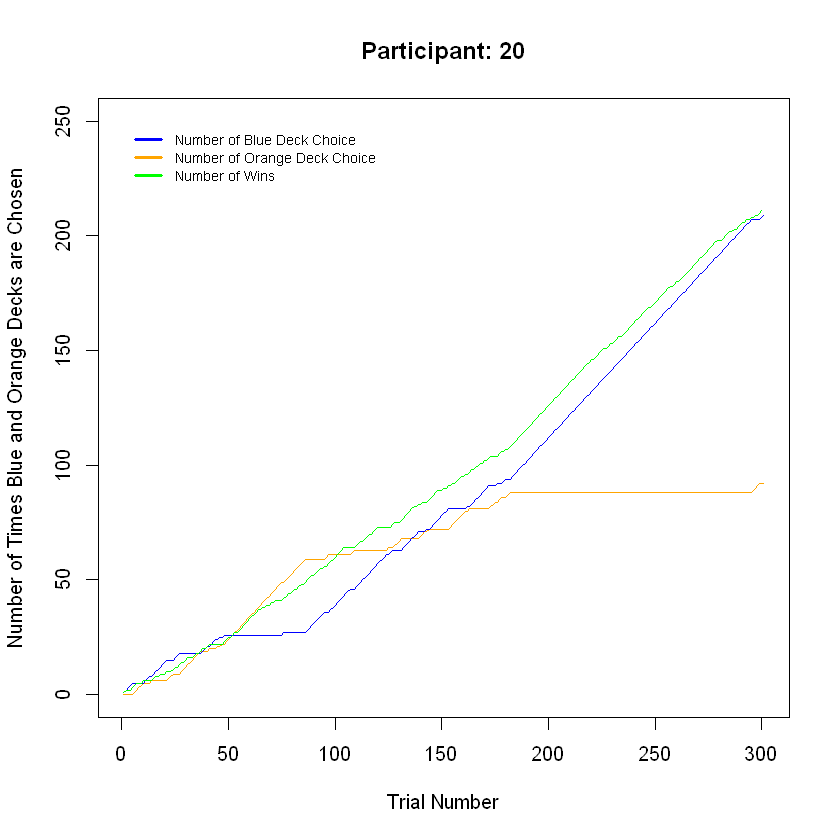

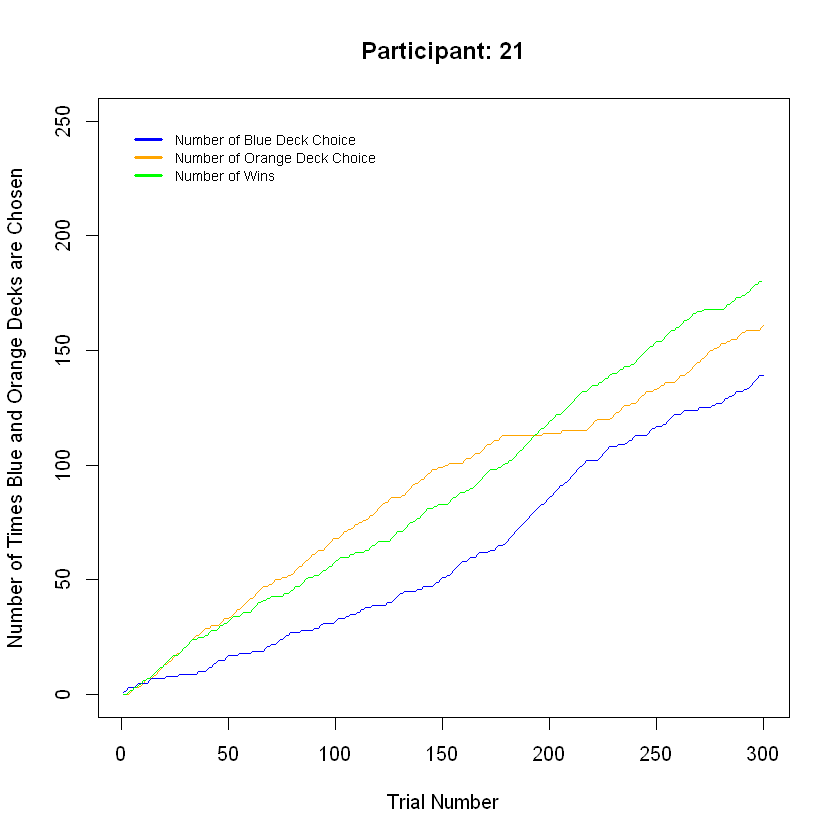

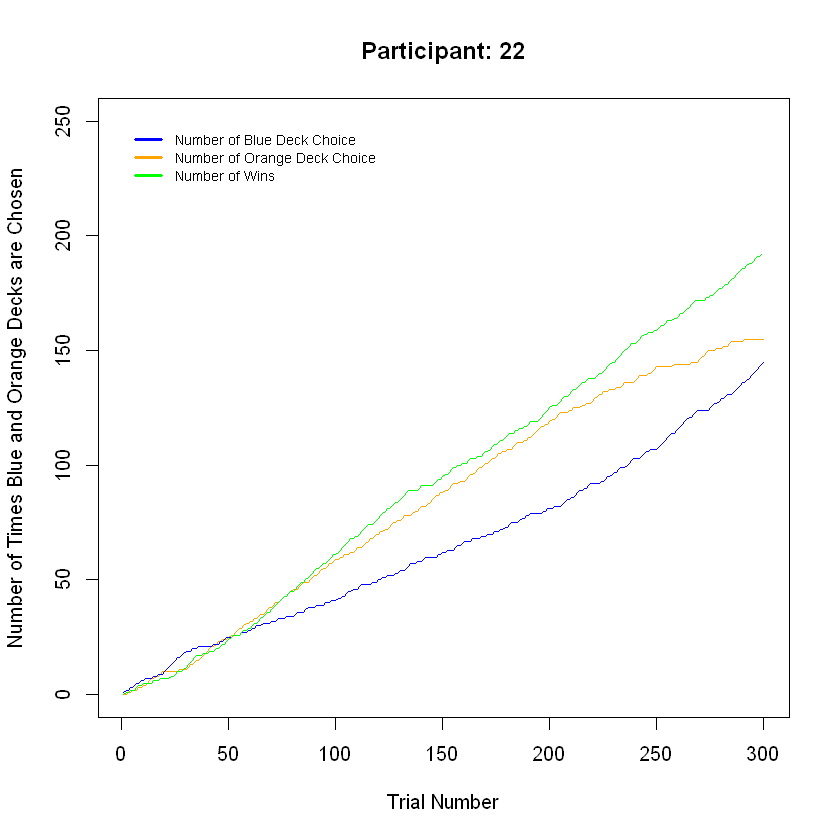

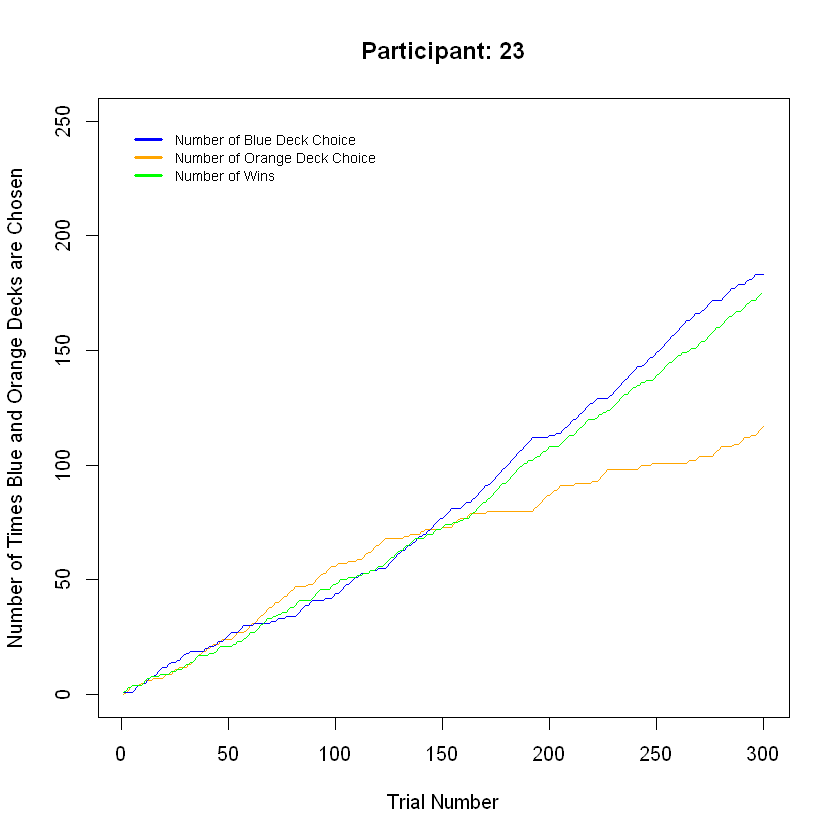

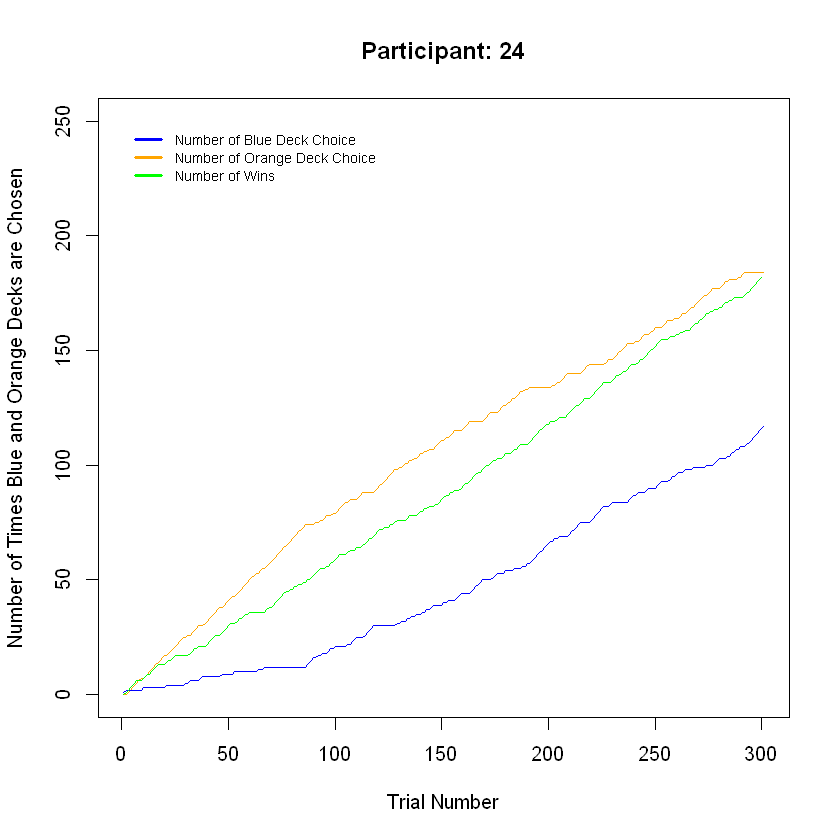

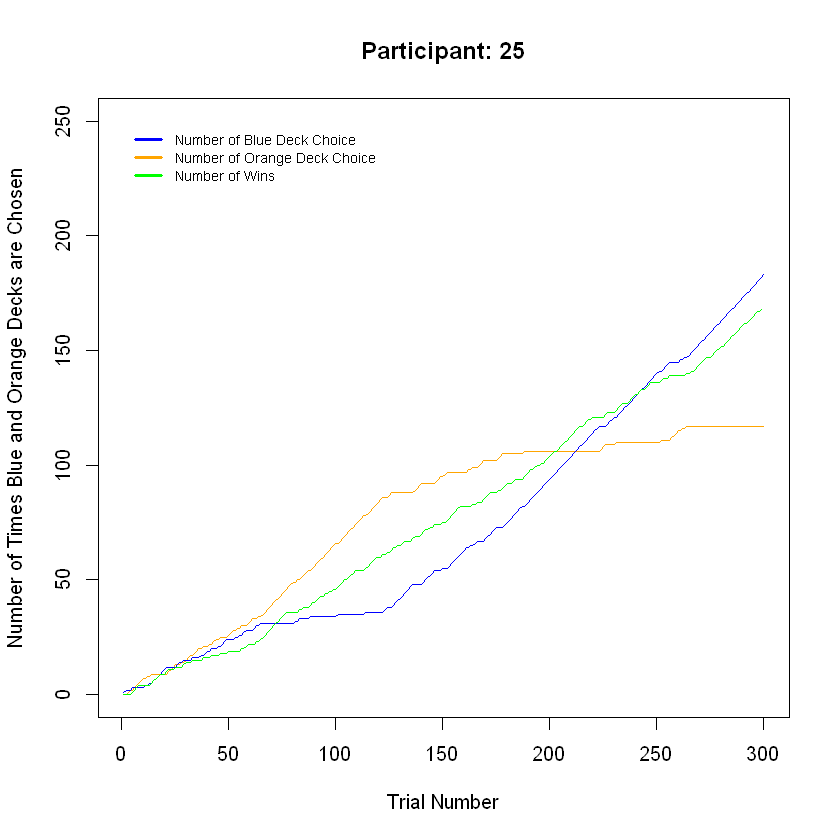

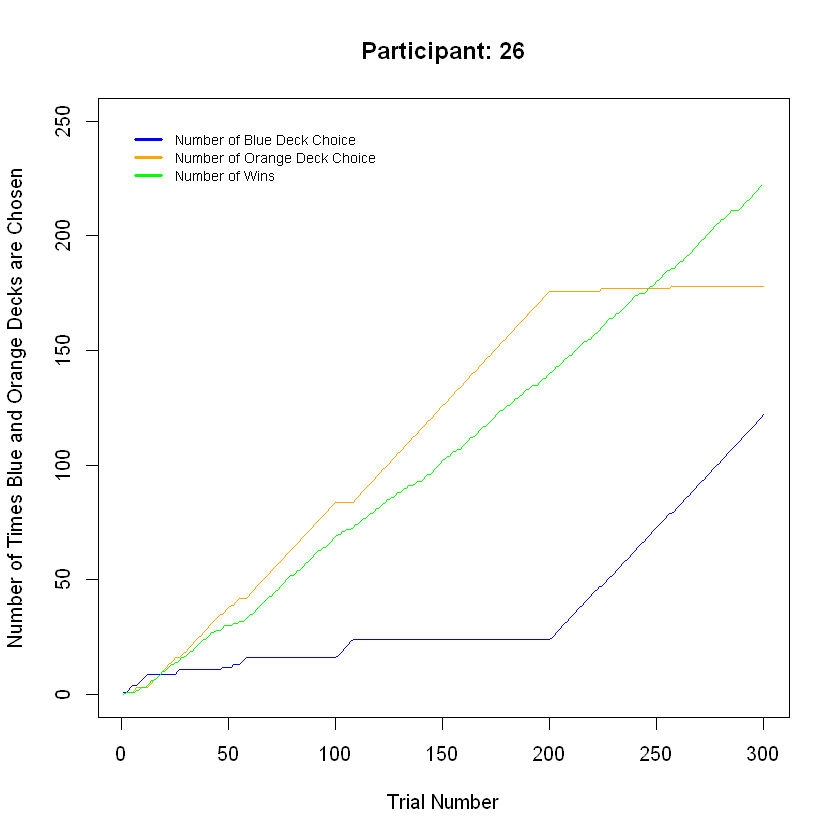

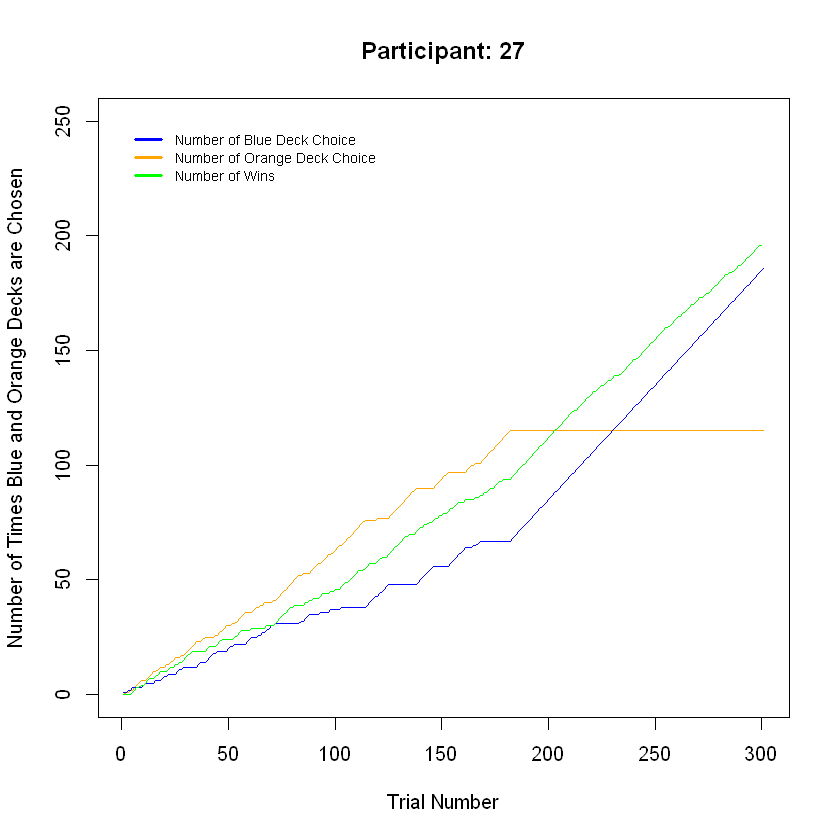

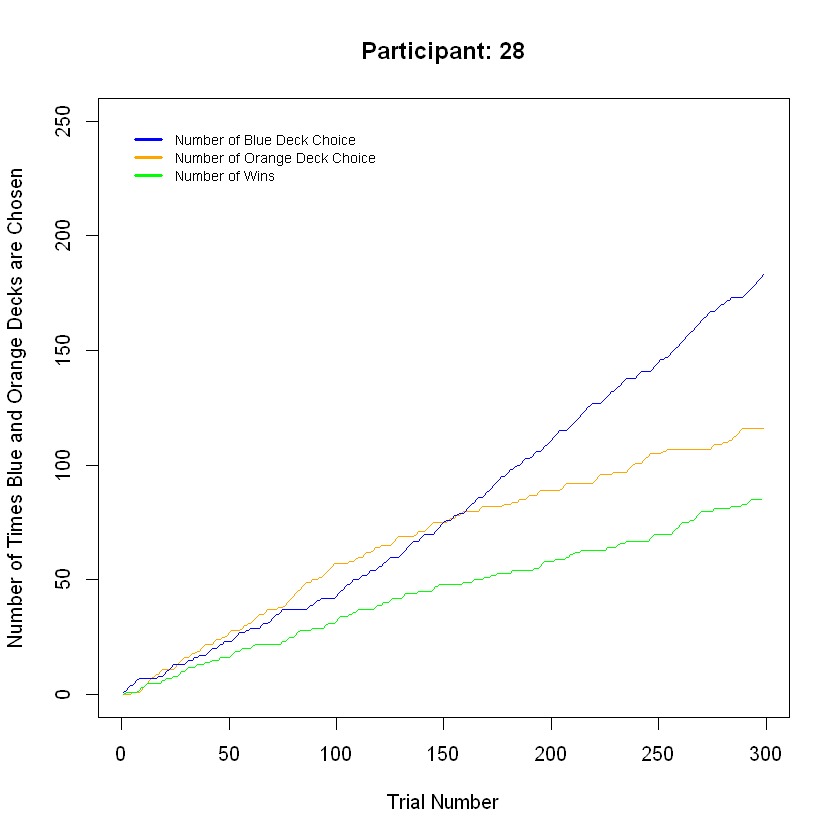

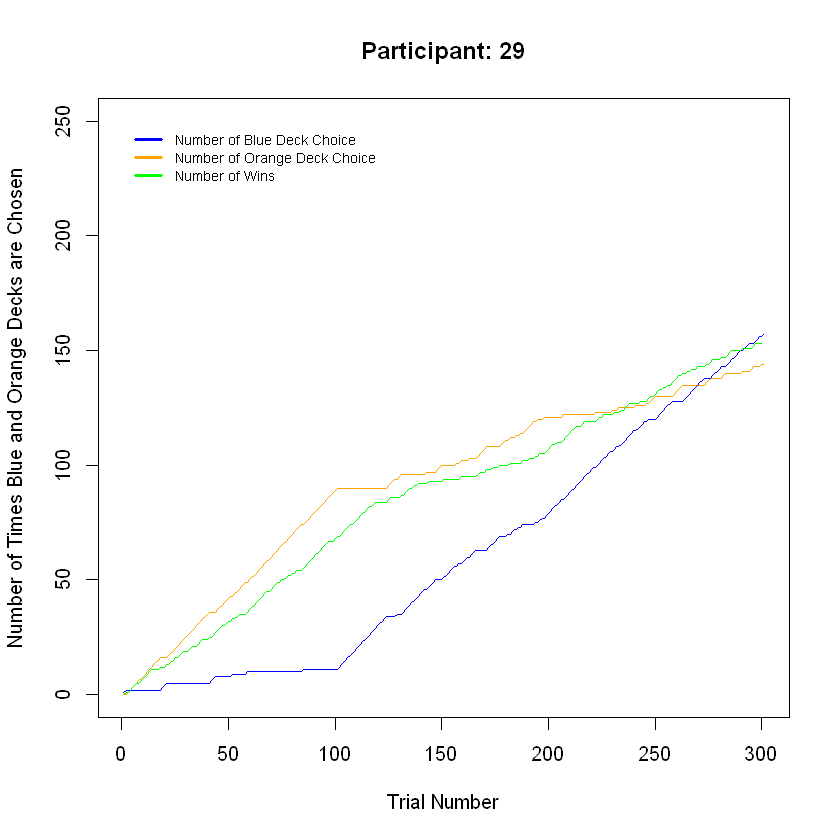

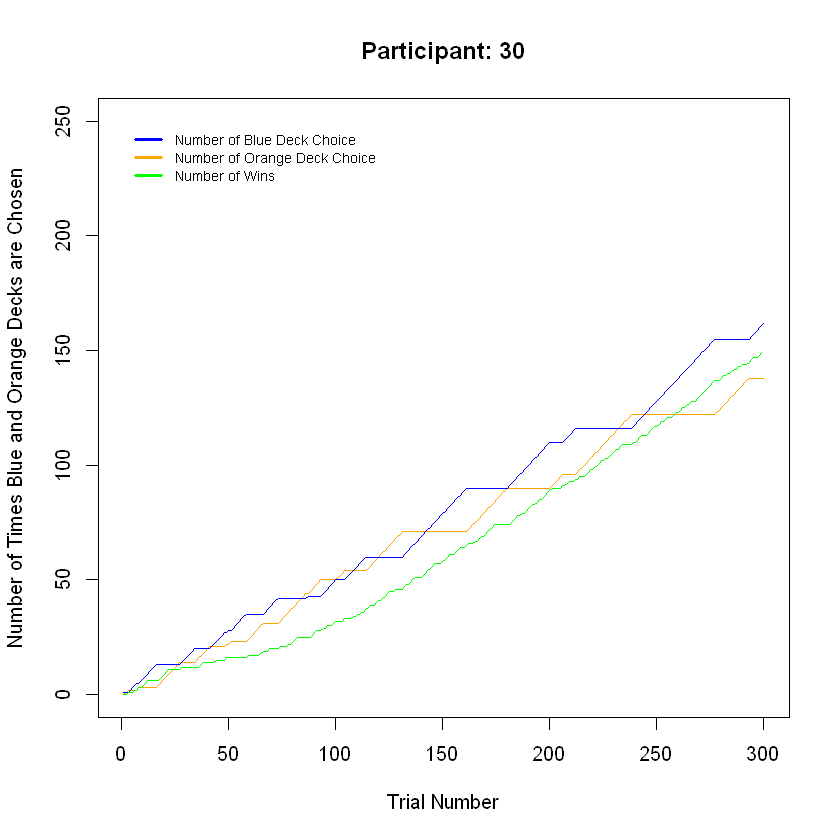

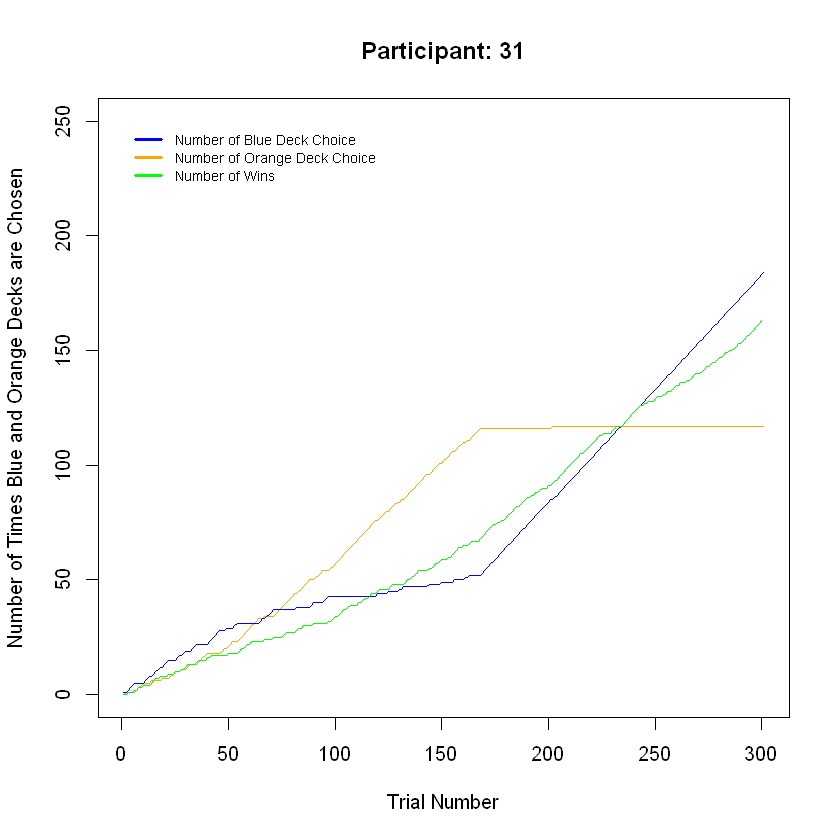

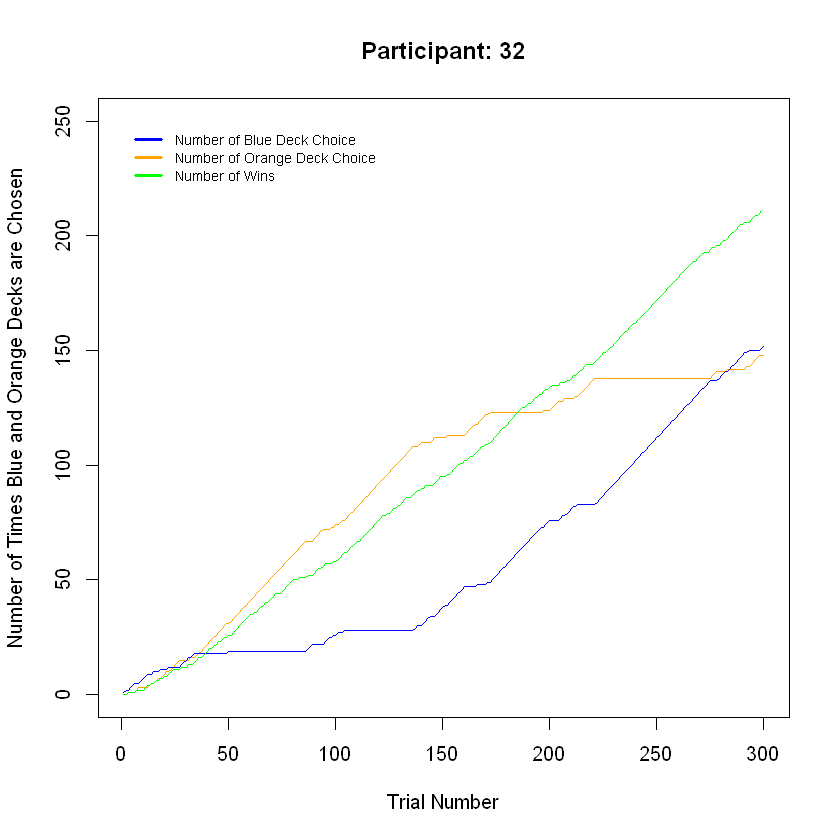

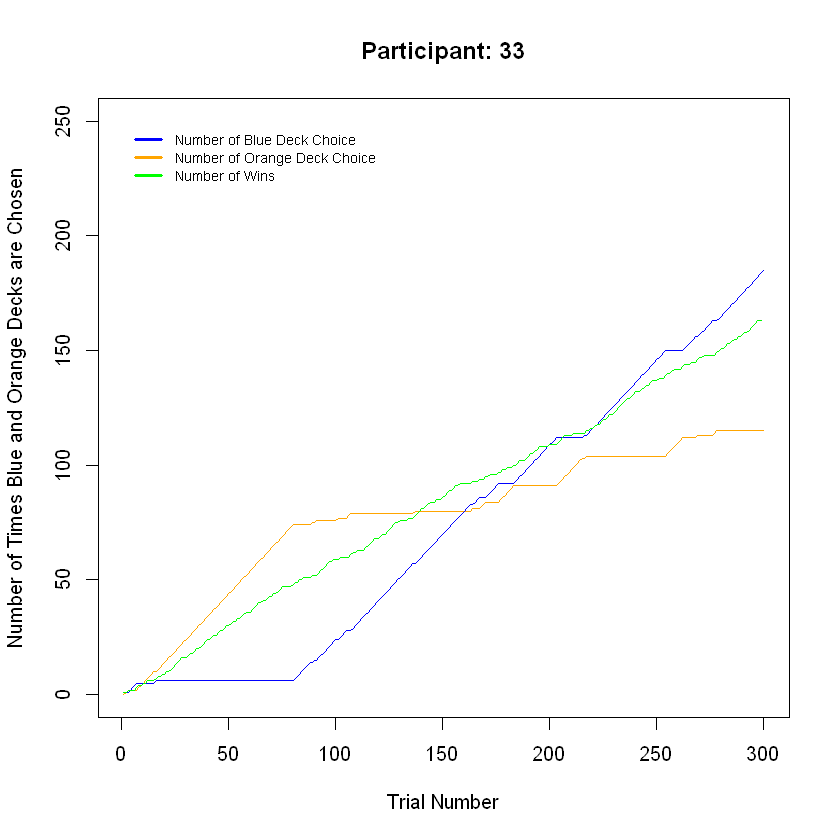

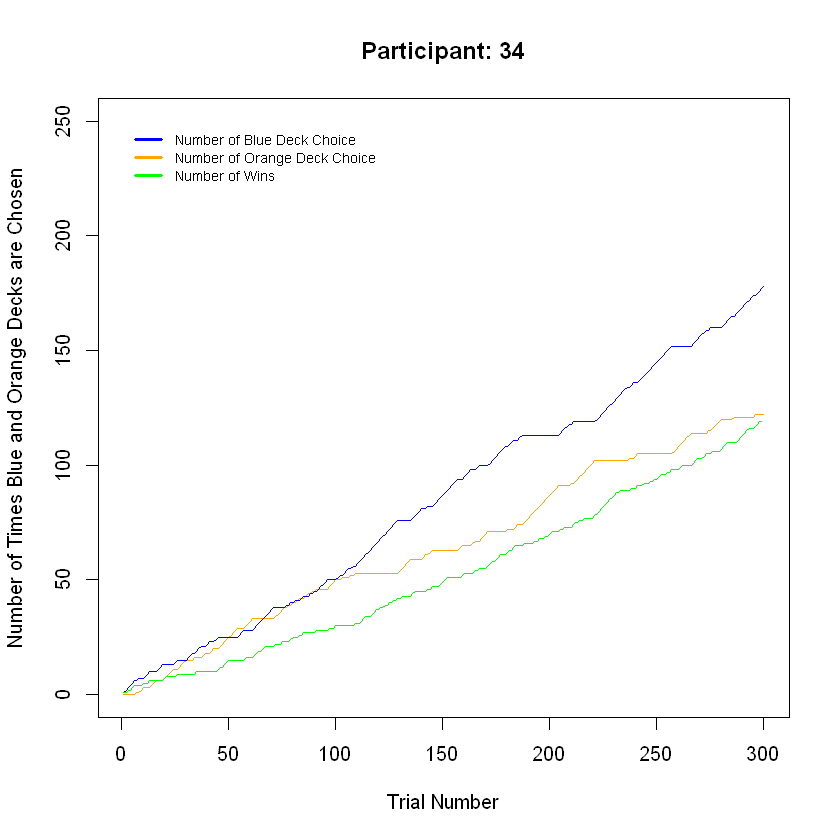

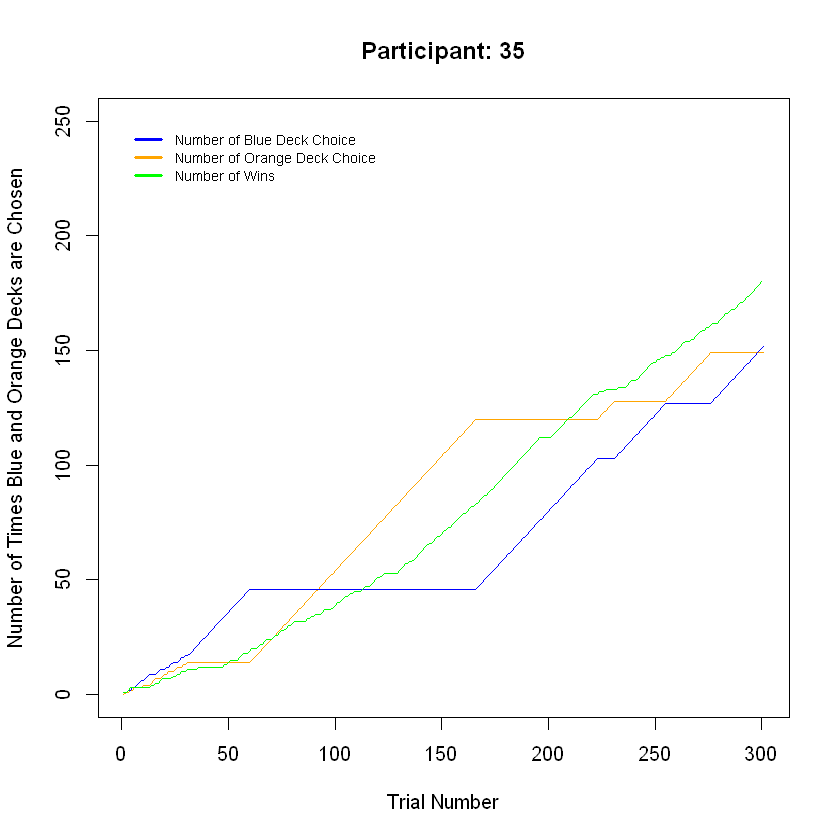

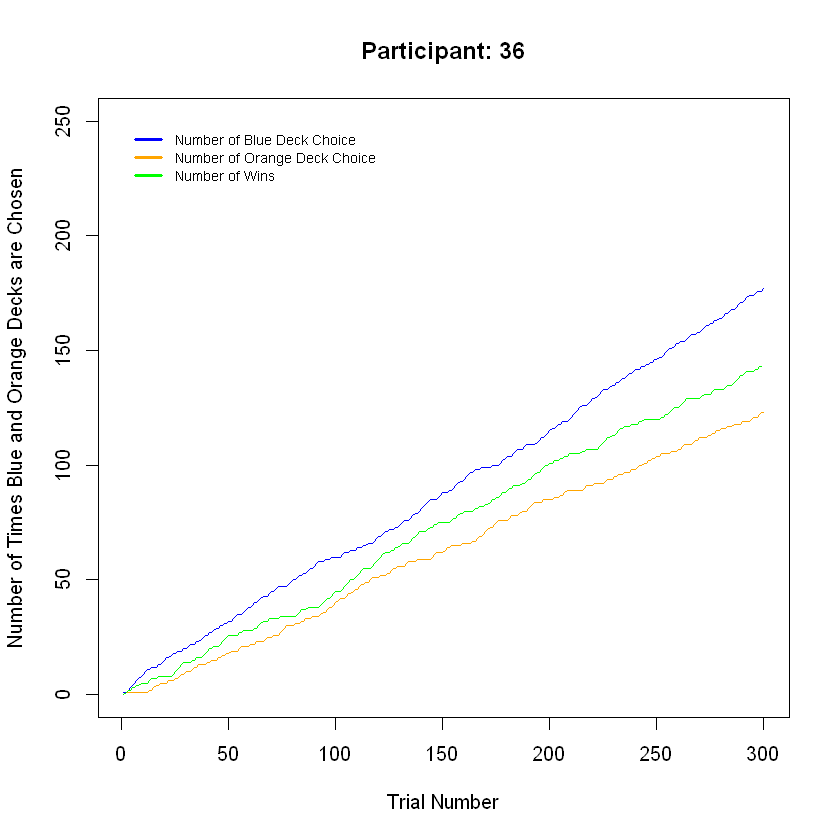

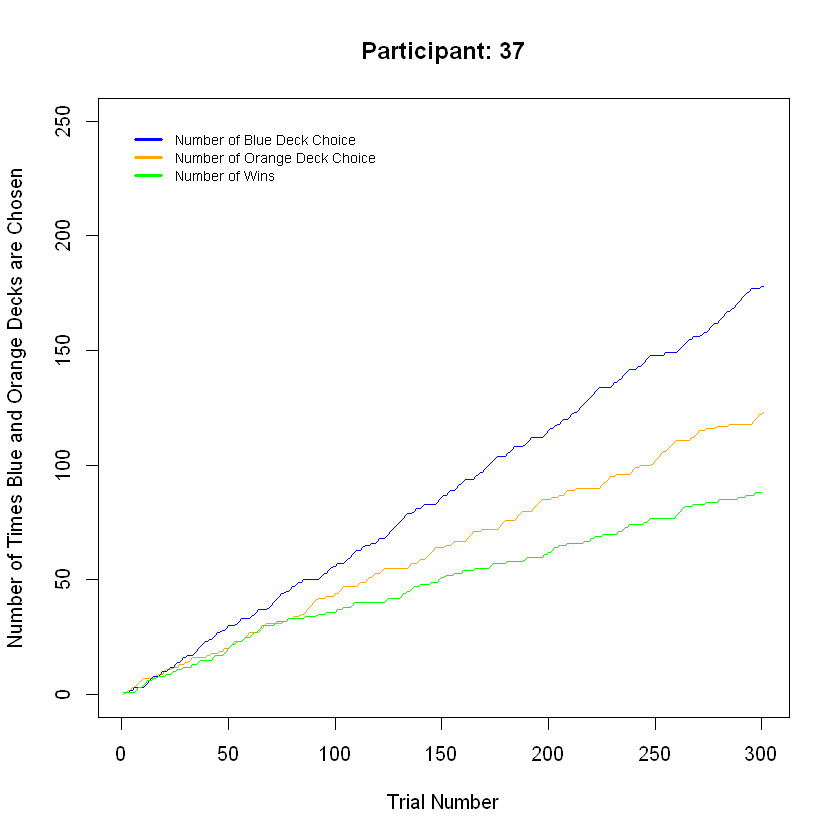

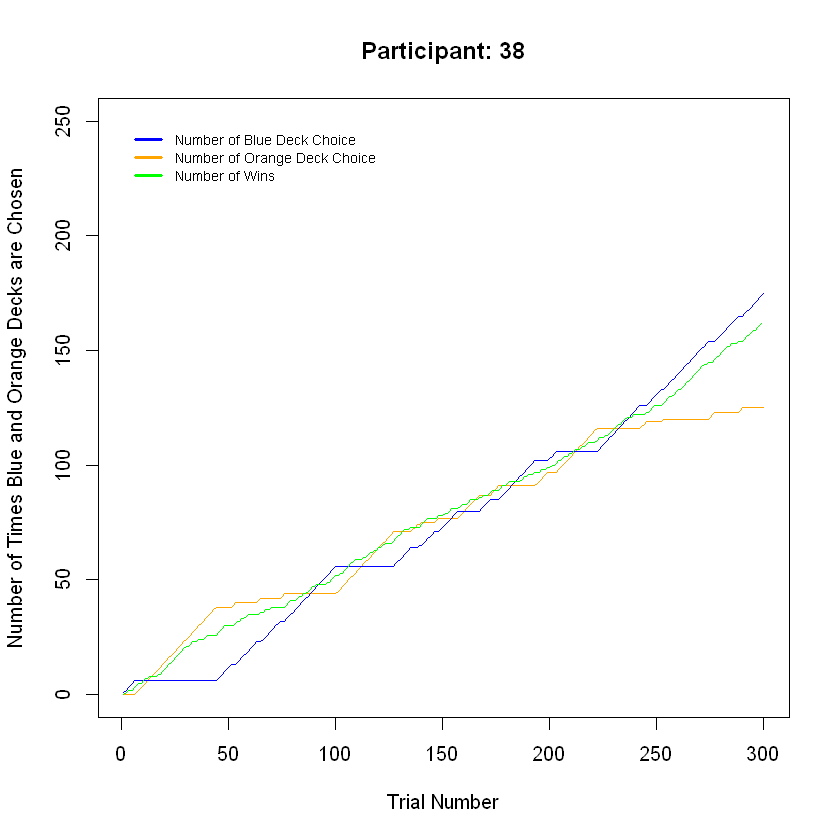

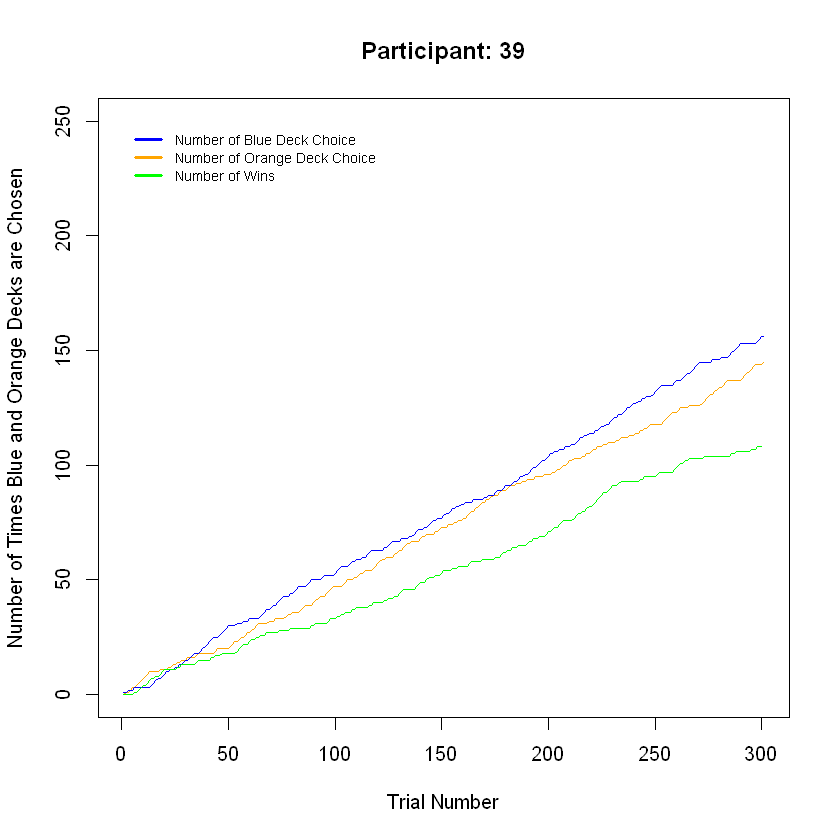

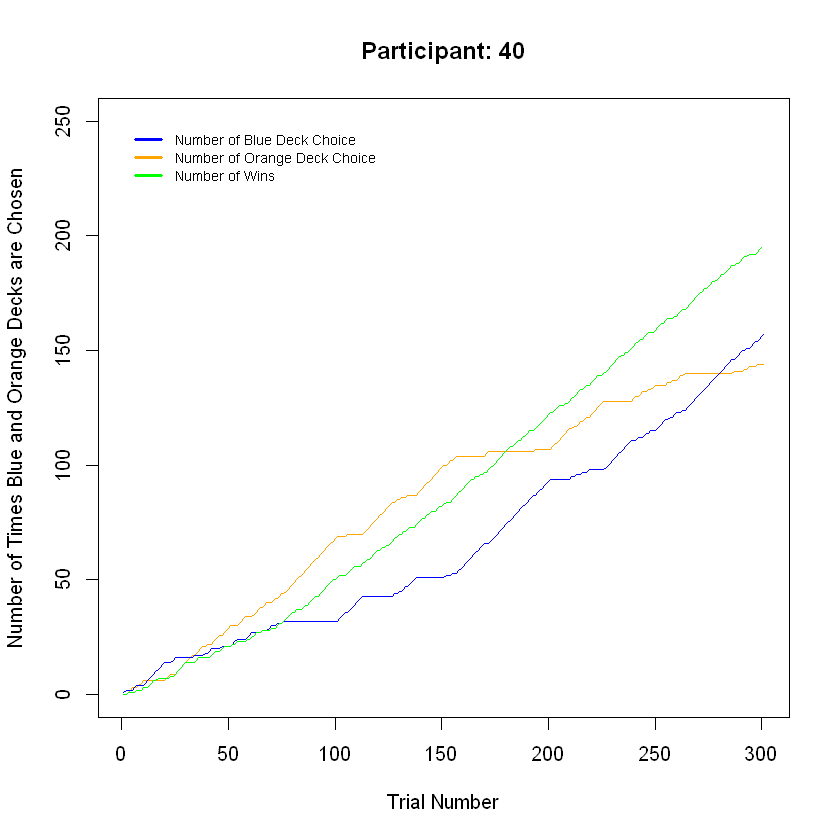

In [102]:
j <- 1


while(j<=40){
    i <- 1
    l <- length(dat$chosen_deck[dat$participant==j])
    observed_O <- 0
    observed_B <- 1
    while(i<=l){
        if(dat$chosen_deck[dat$participant==j][i] == 'O'){
                observed_O[i+1] <- observed_O[i] +1
                observed_B[i+1] <- observed_B[i] }
        else {
            observed_B[i+1] <- observed_B[i] + 1
            observed_O[i+1] <- observed_O[i]
        } 
            i <- i + 1}
        plot(observed_O,type = 'l', col = 'orange', main = sprintf("Participant: %s", j), ylim = c(0,250), ylab='Number of Times Blue and Orange Decks are Chosen', xlab = 'Trial Number' )
        lines(observed_B, type = 'l', col = 'blue', main = sprintf("Participant: %s", j), ylim = c(0,250))
        lines(cumsum(dat$Answer[dat$participant==j]), type='l', col = 'green', ylim=c(0,250))
        legend(0,250, legend=c('Number of Blue Deck Choice', 'Number of Orange Deck Choice', 'Number of Wins'), col=c('blue','orange', 'green'), box.lty=0,lwd=c(2.5,2.5), cex = c(0.7))
        j <- j +1}
   



# [Back to Content](#content)

<a id='bo'></a>

# Probabilities of Orange and Blue Decks

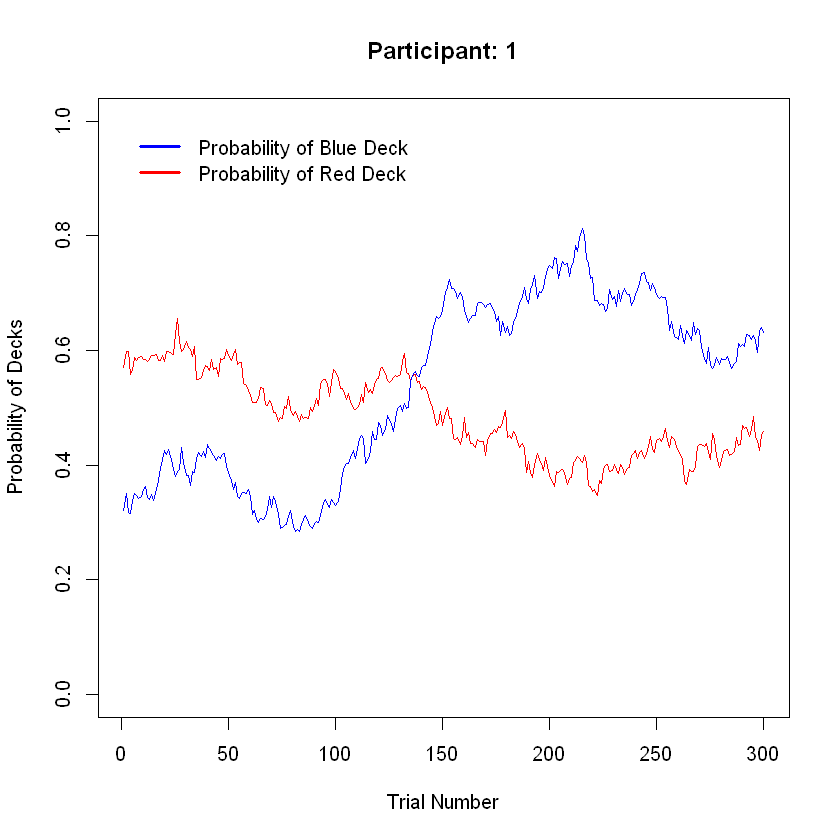

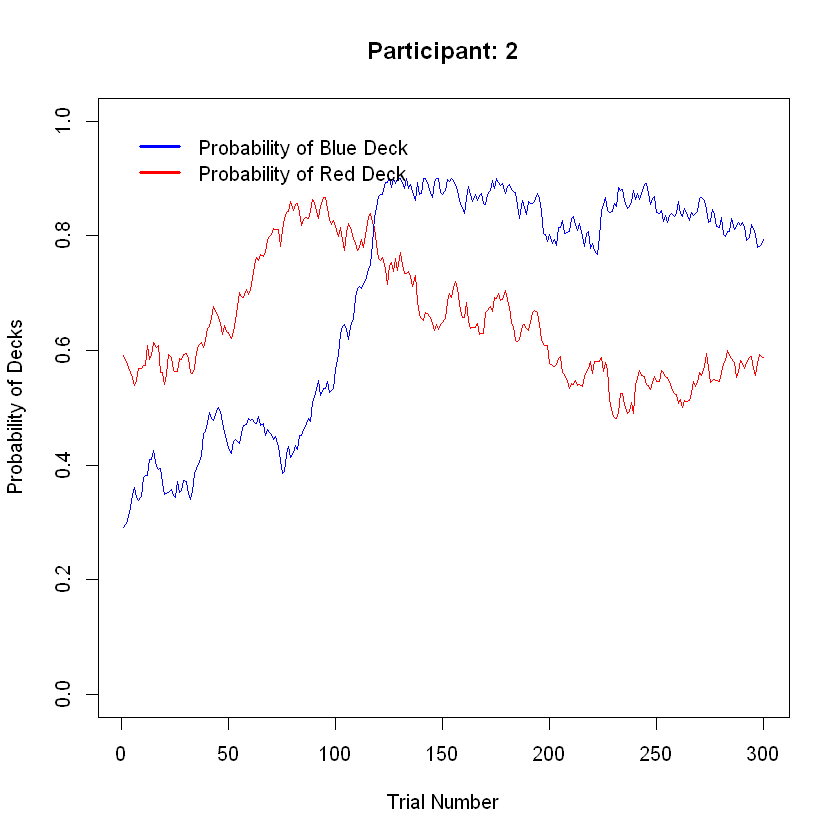

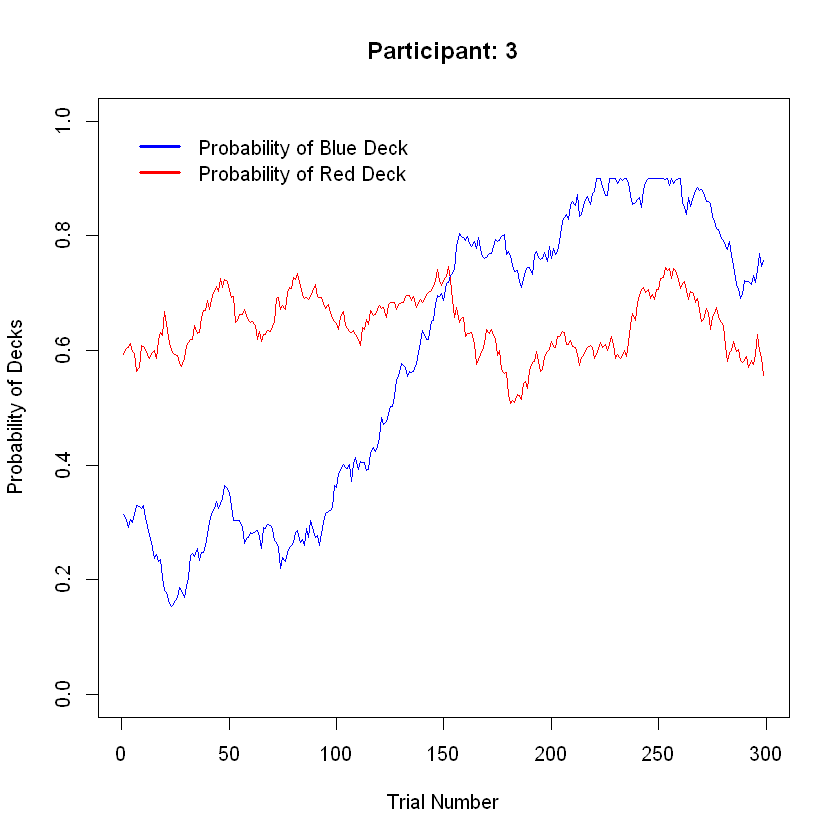

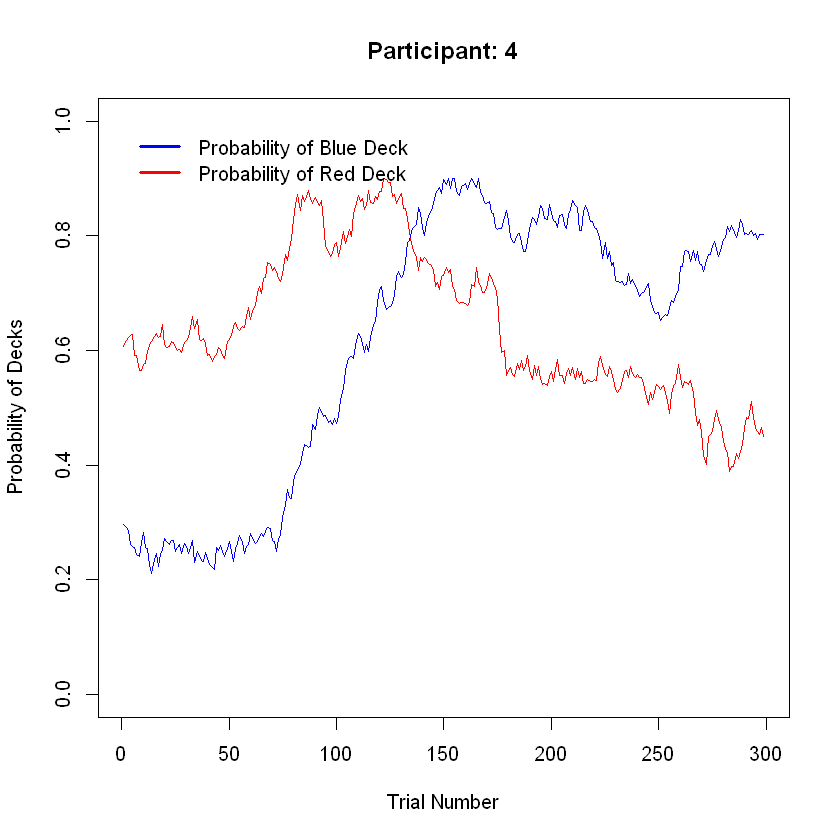

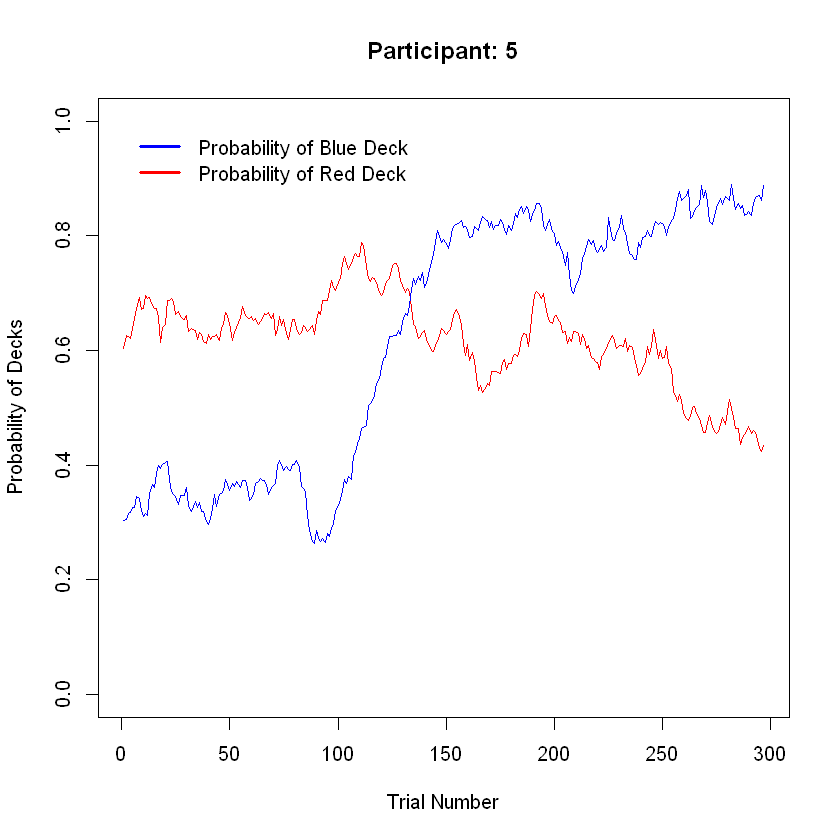

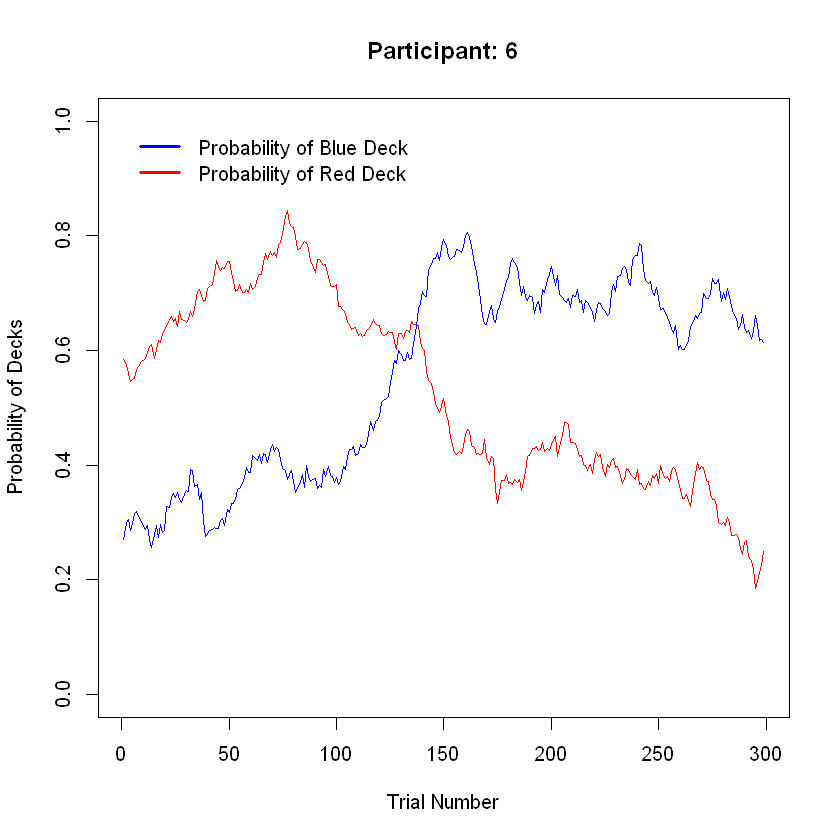

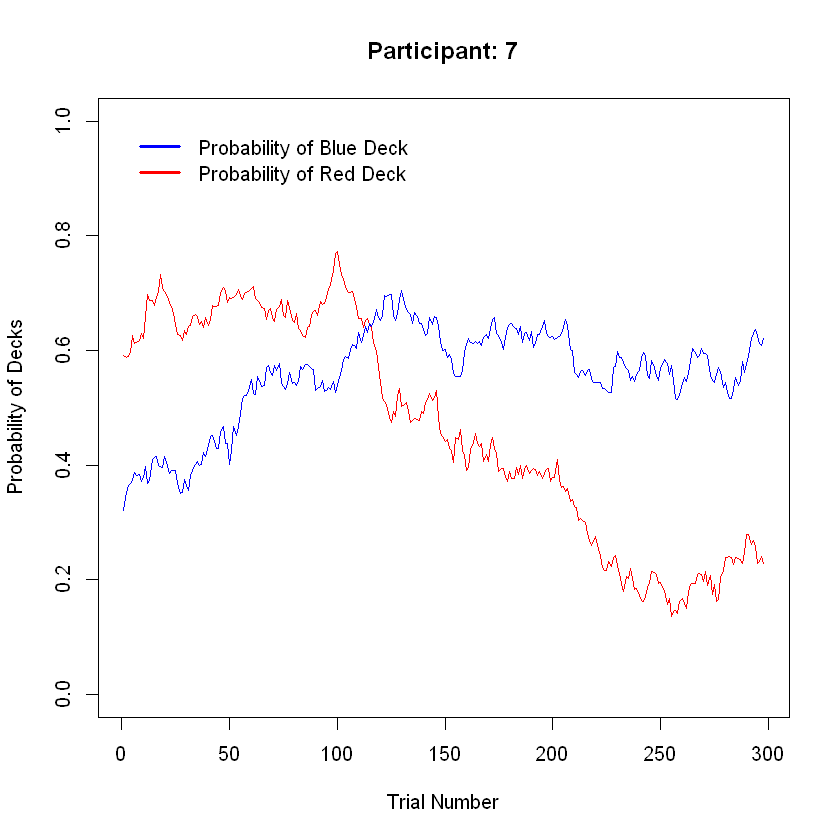

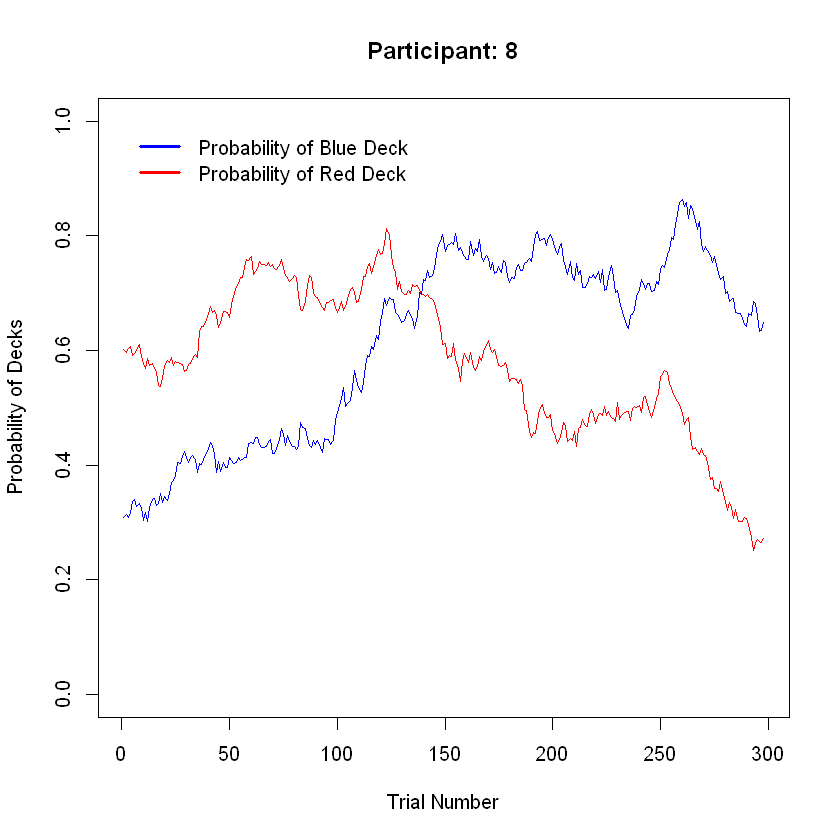

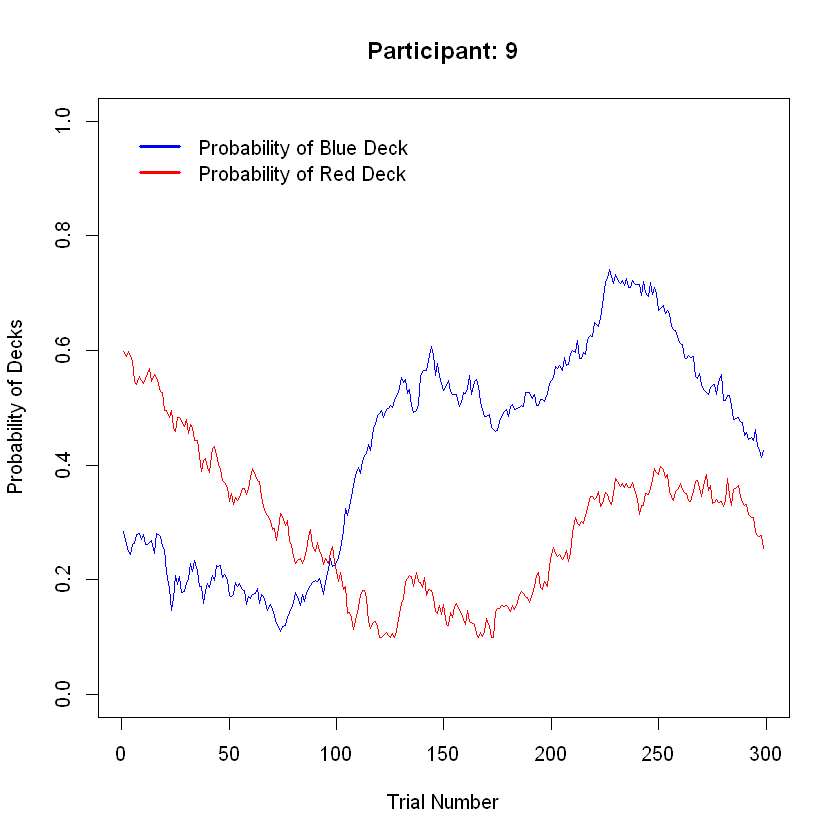

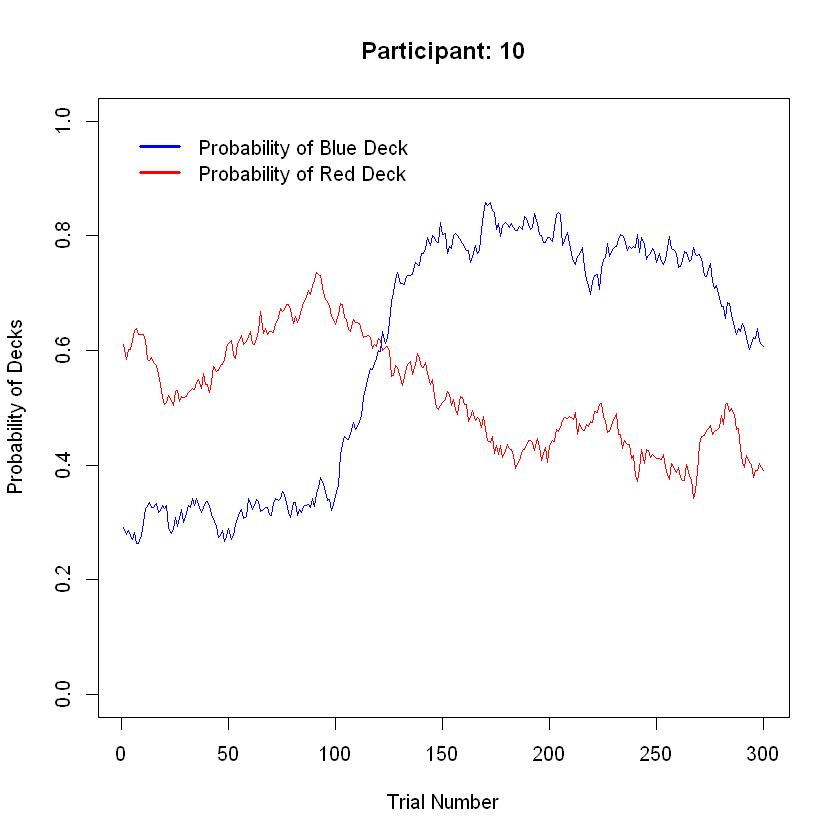

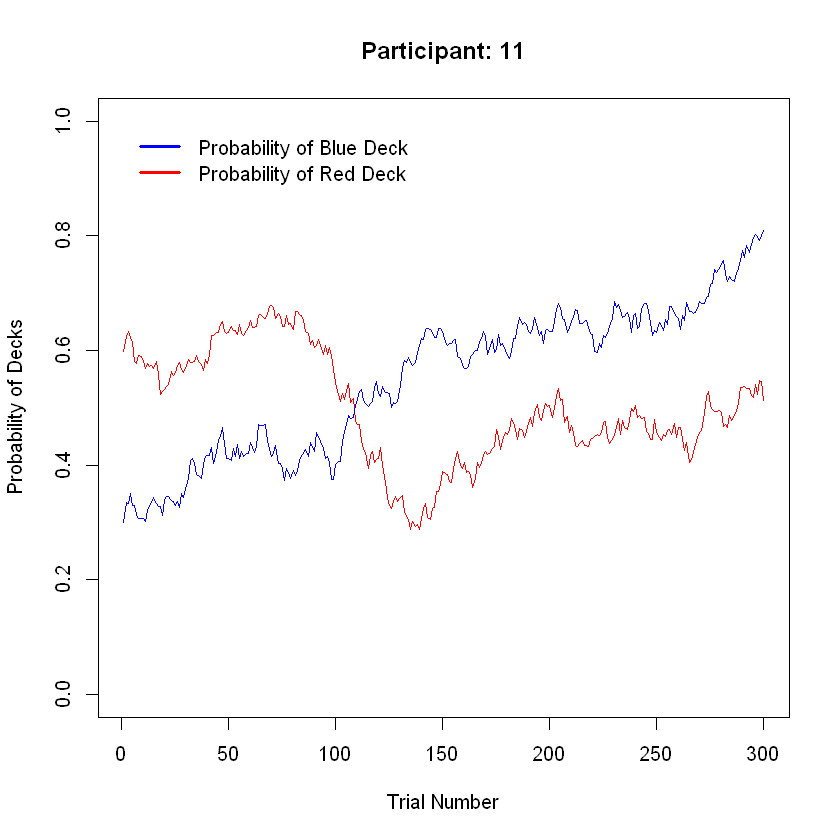

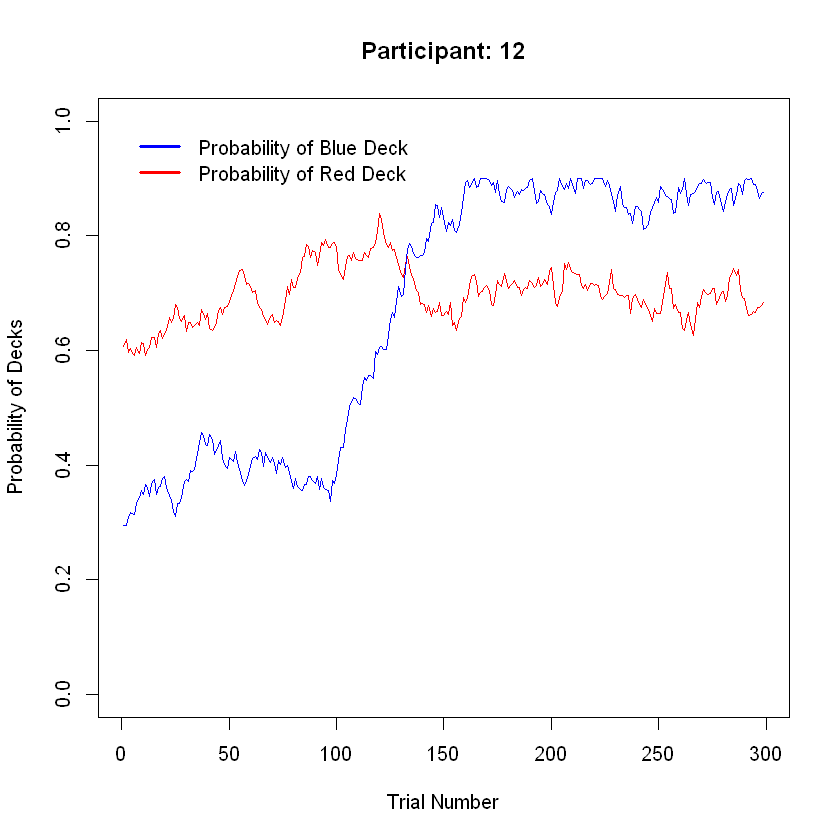

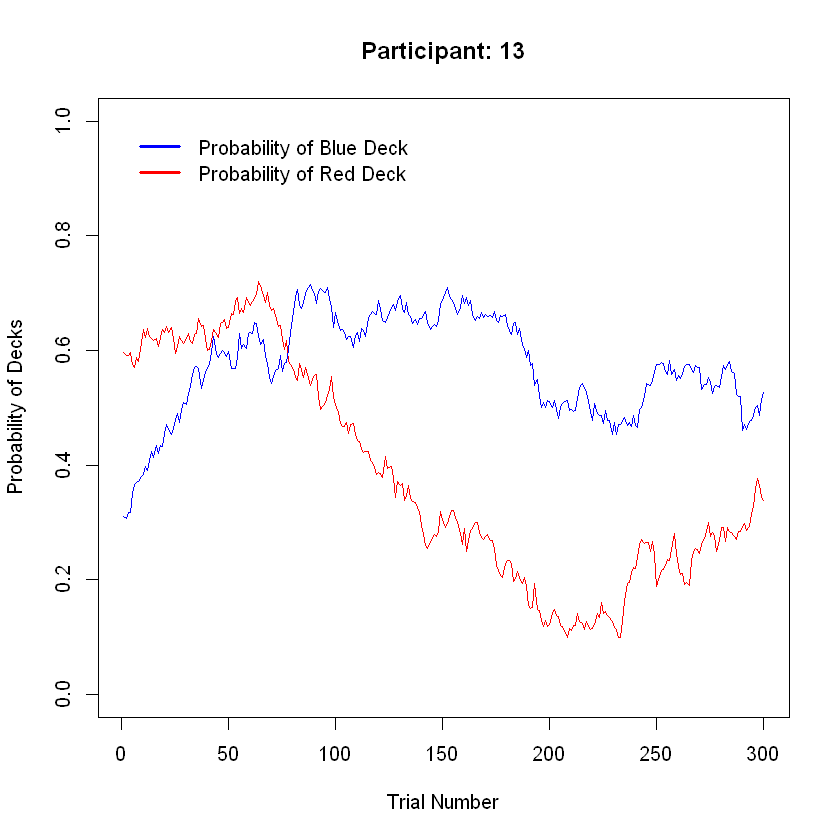

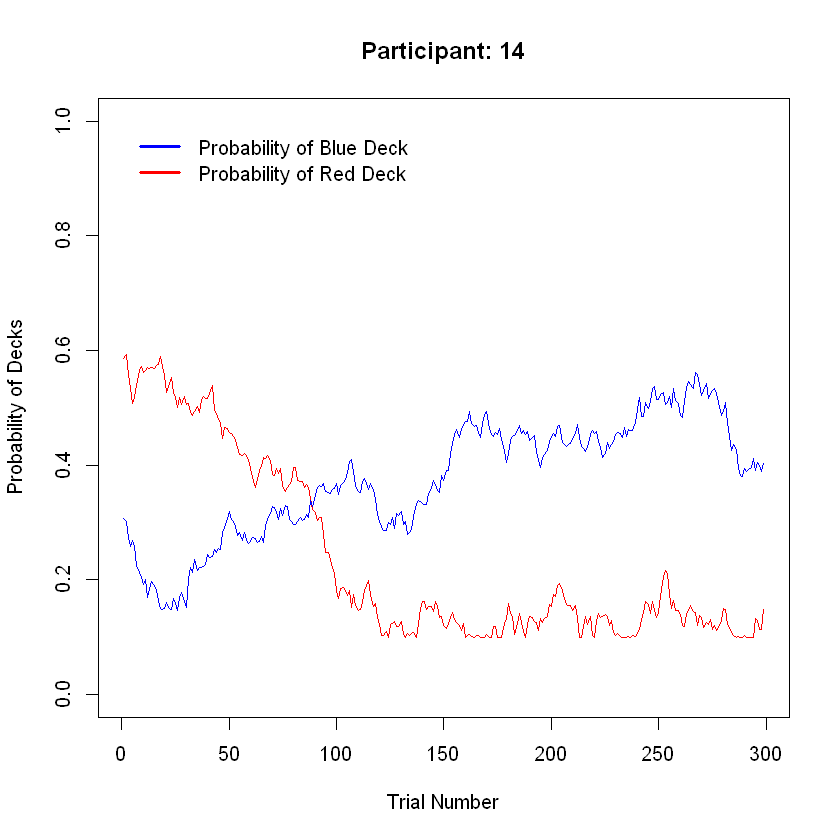

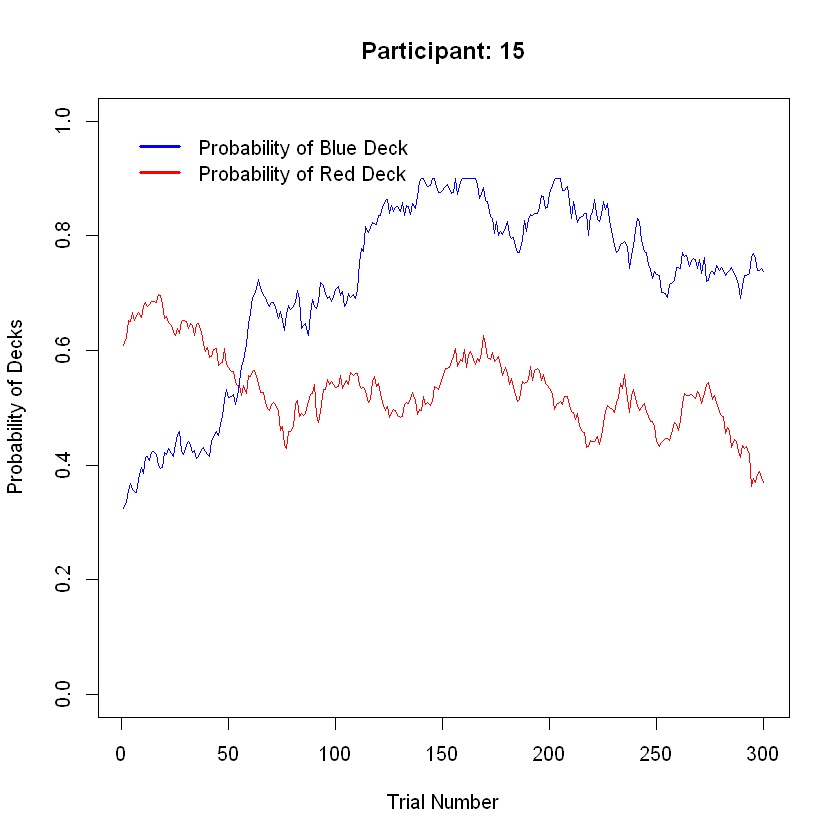

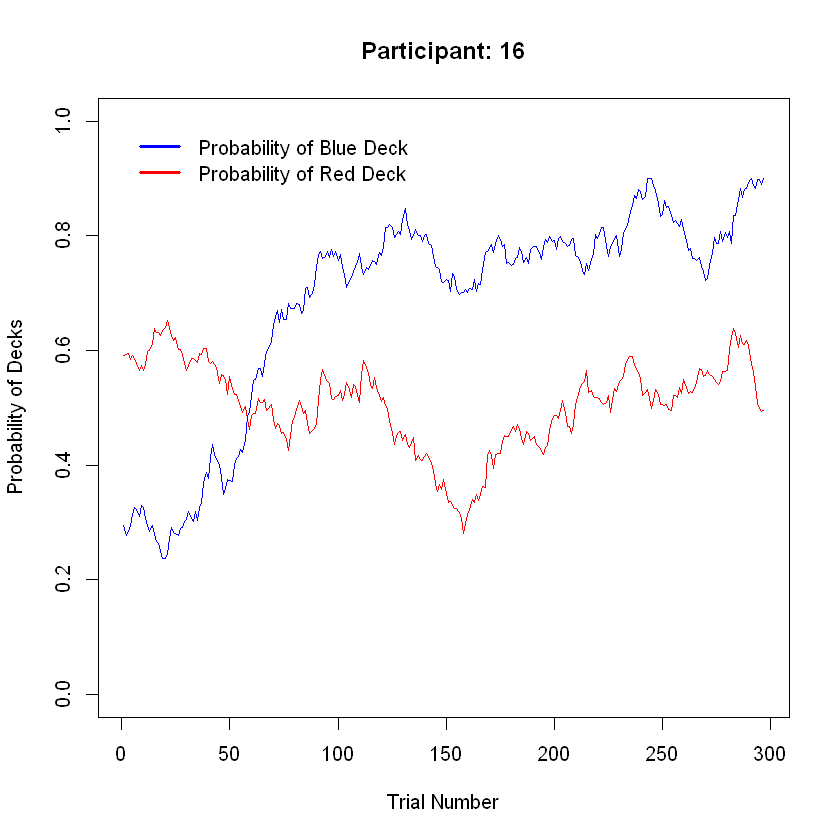

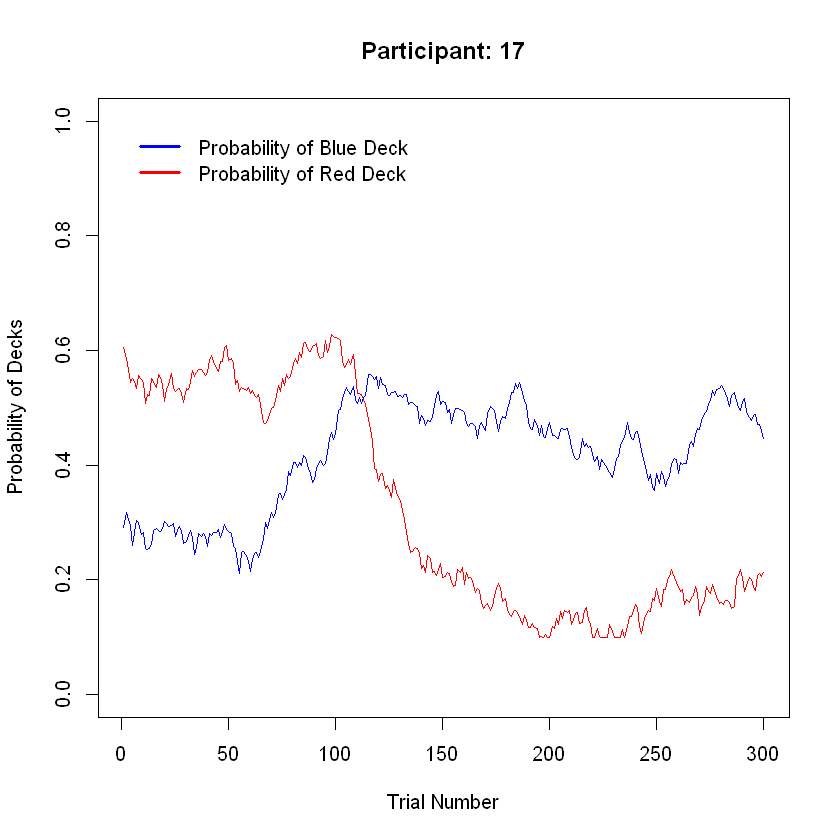

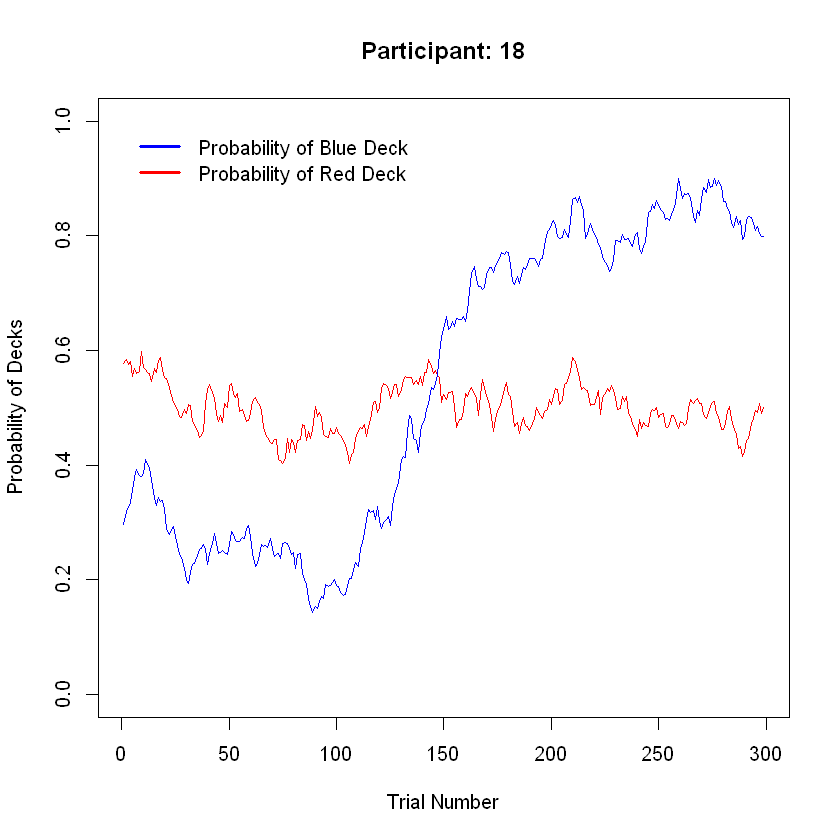

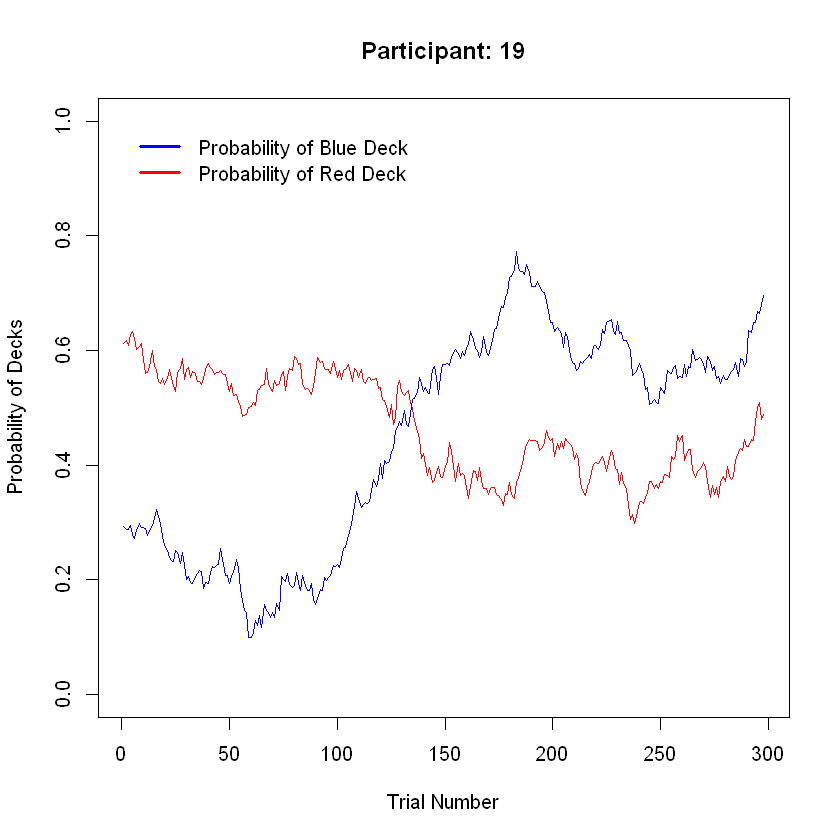

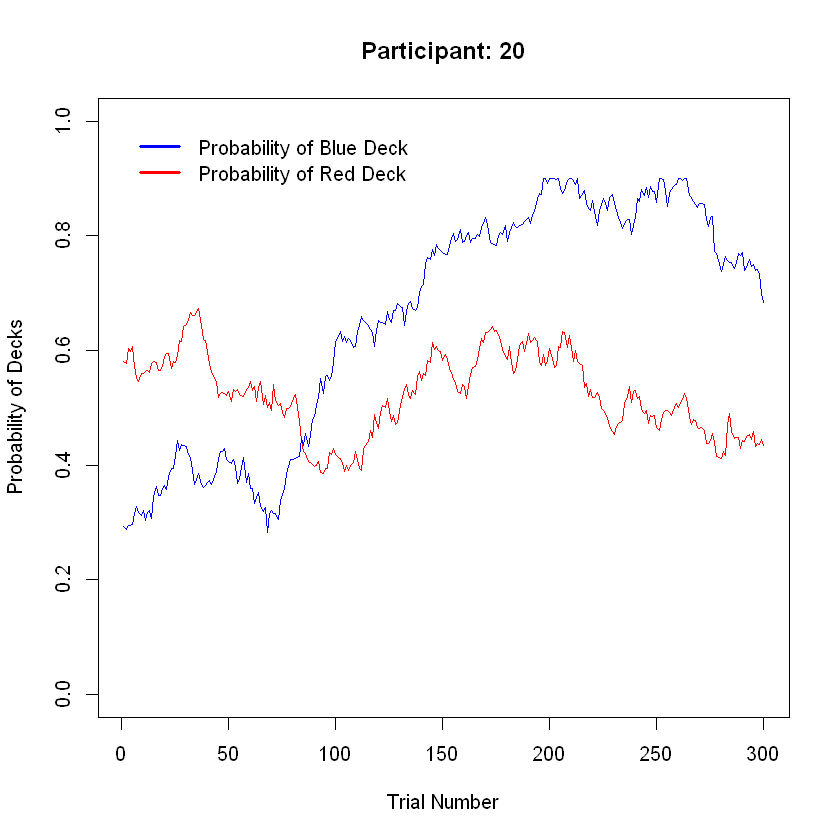

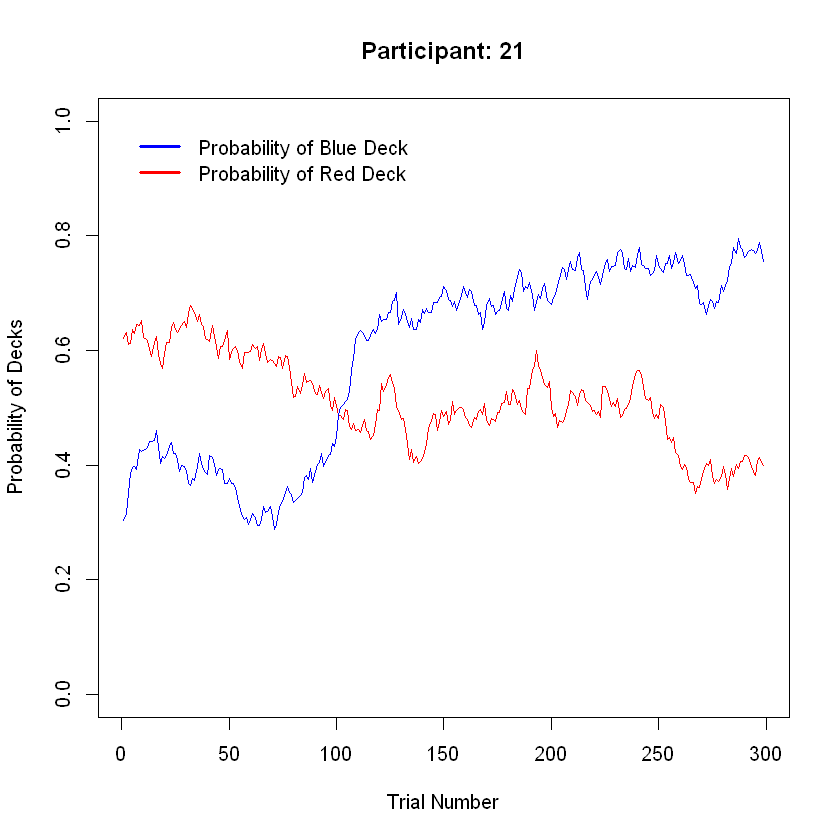

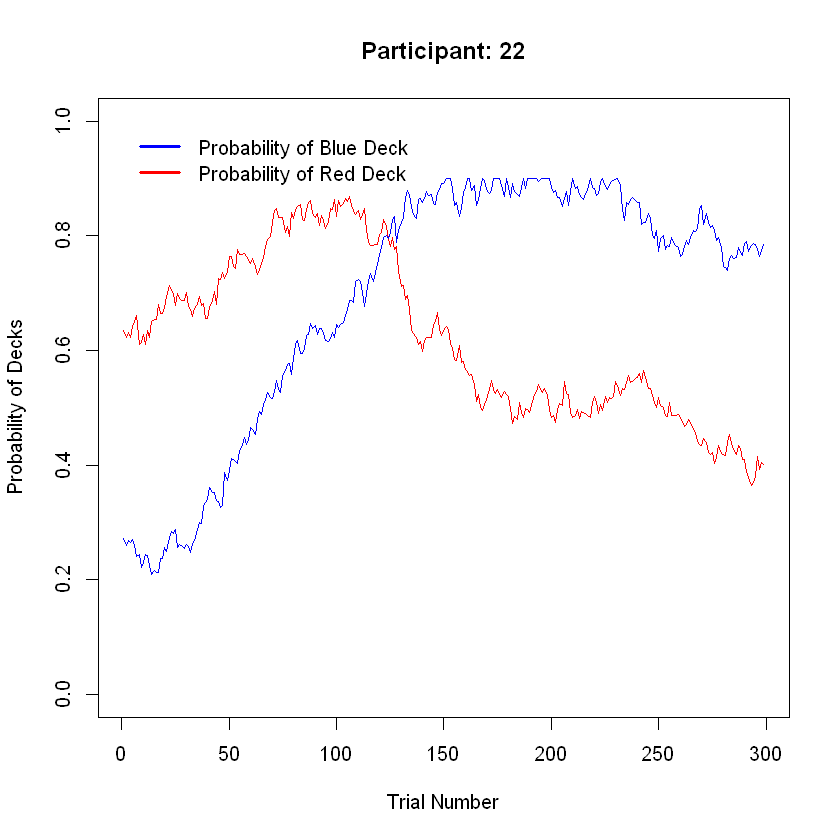

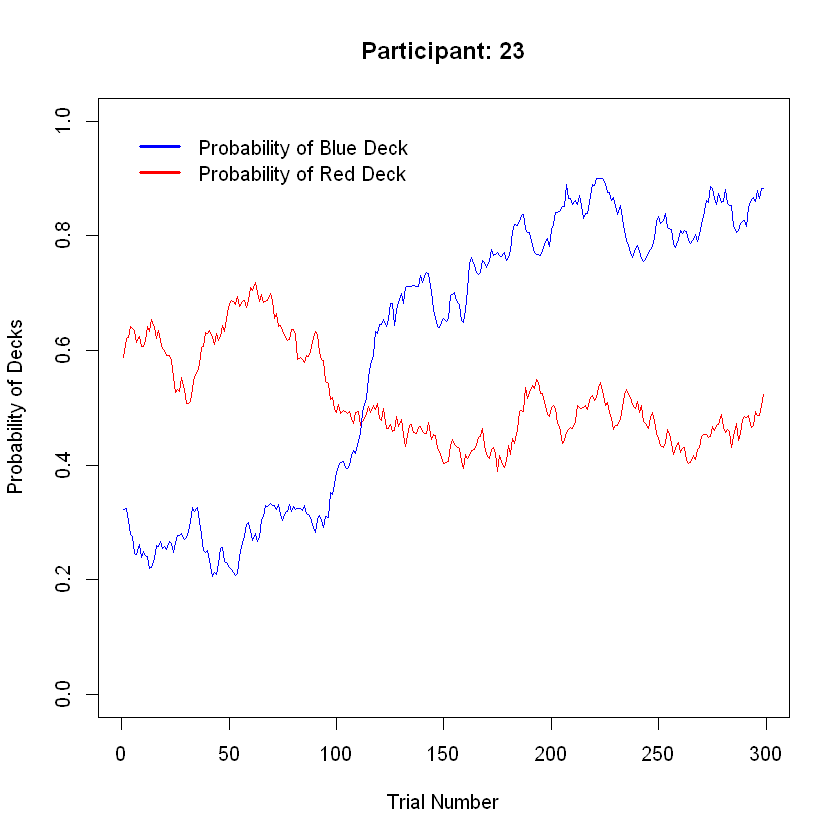

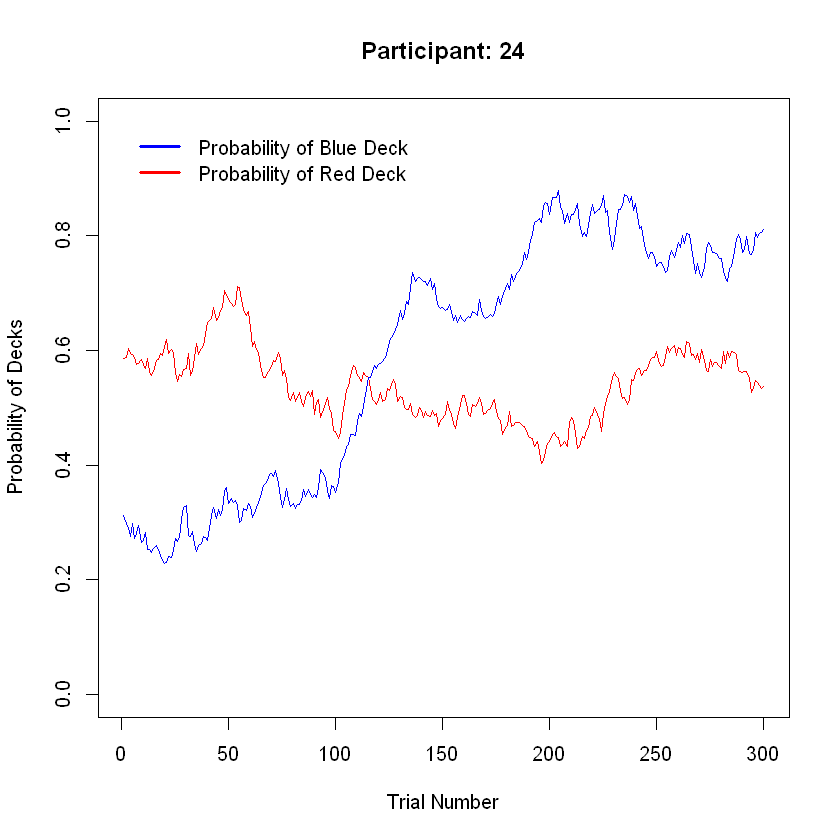

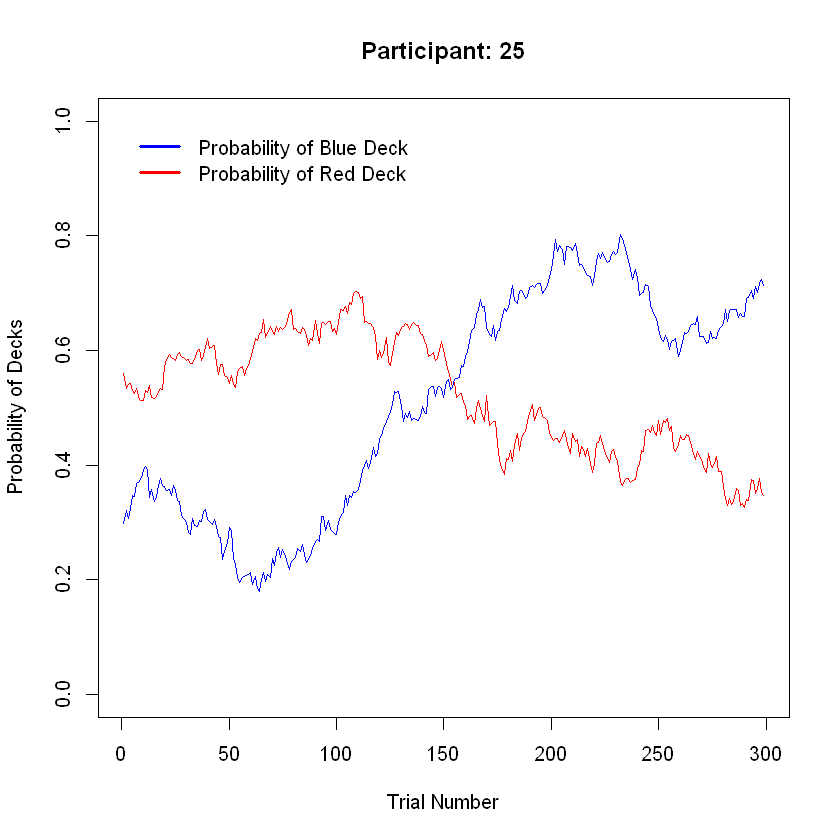

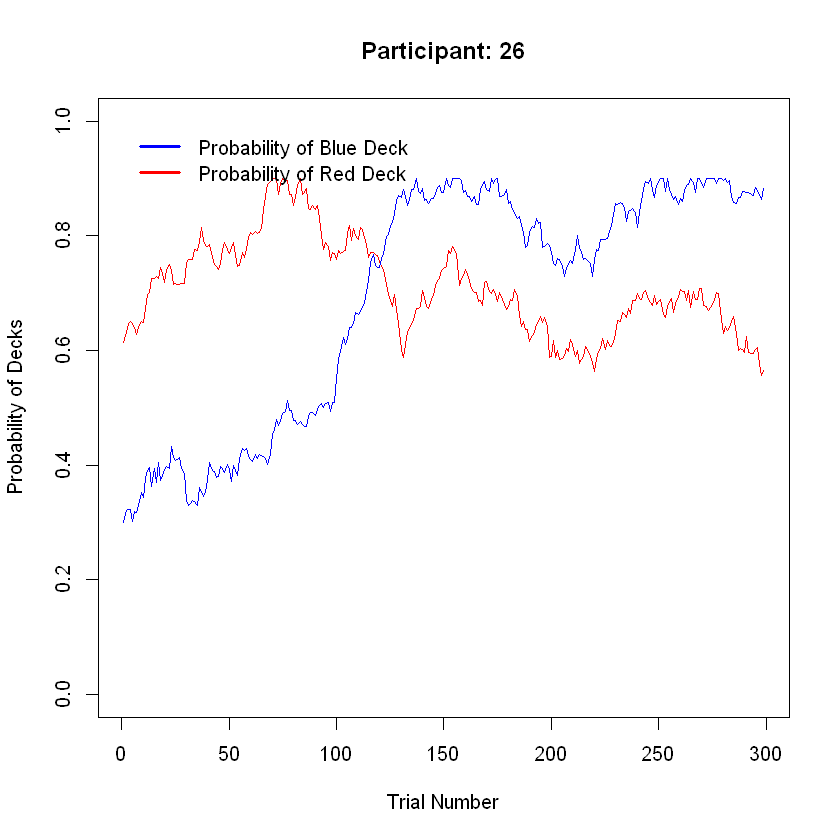

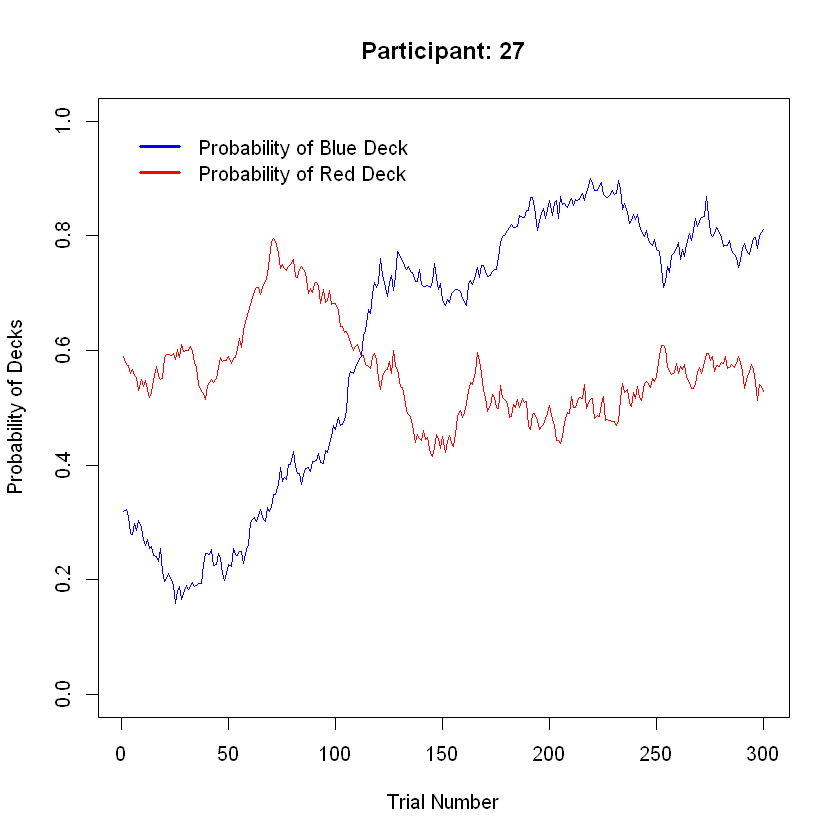

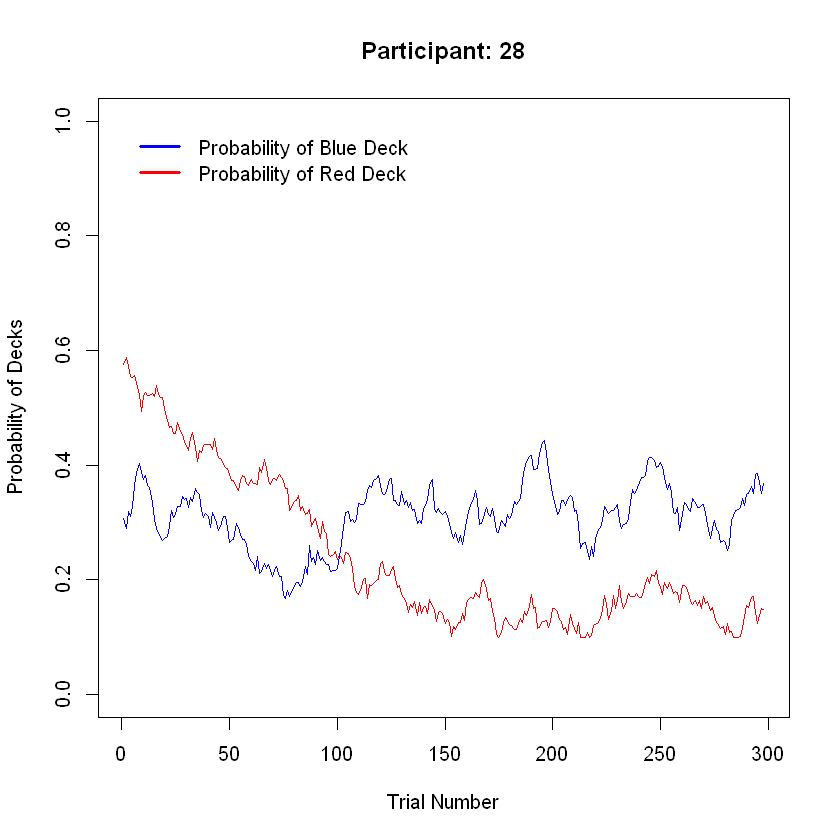

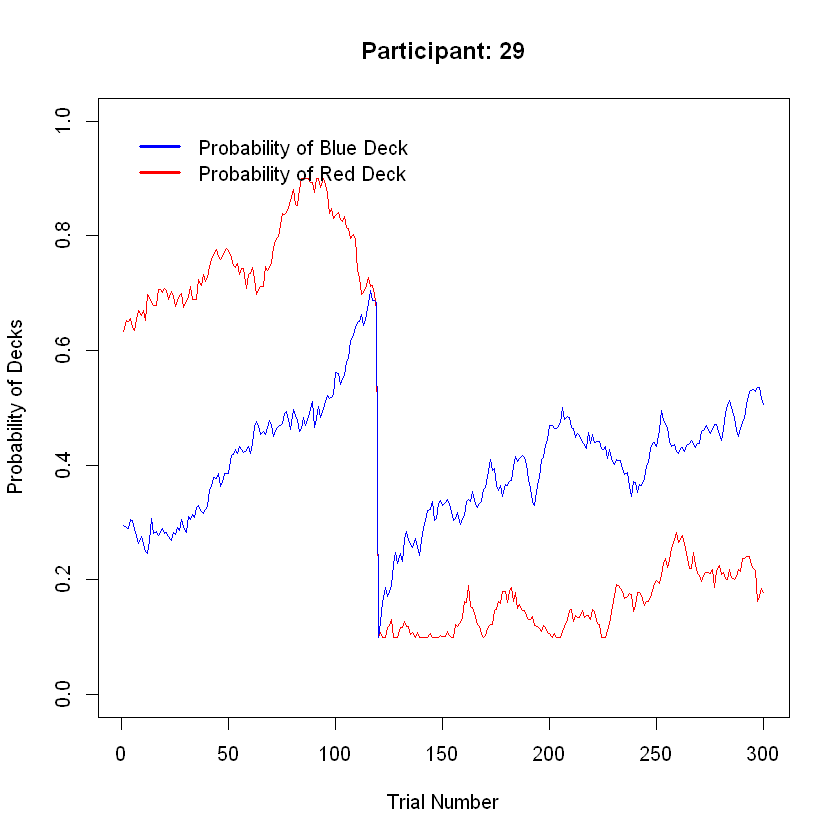

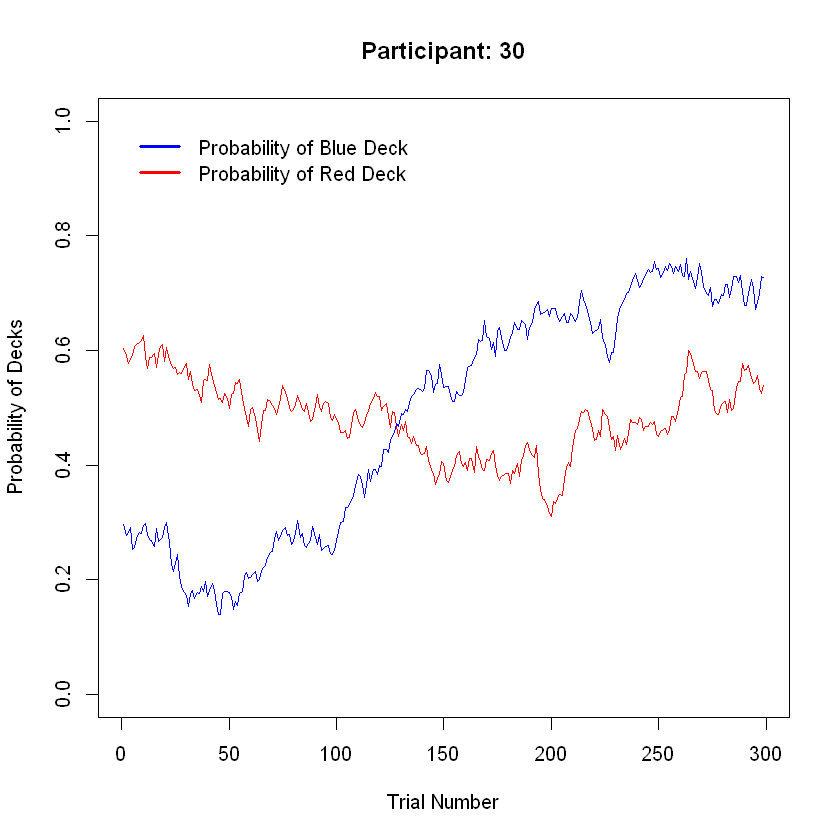

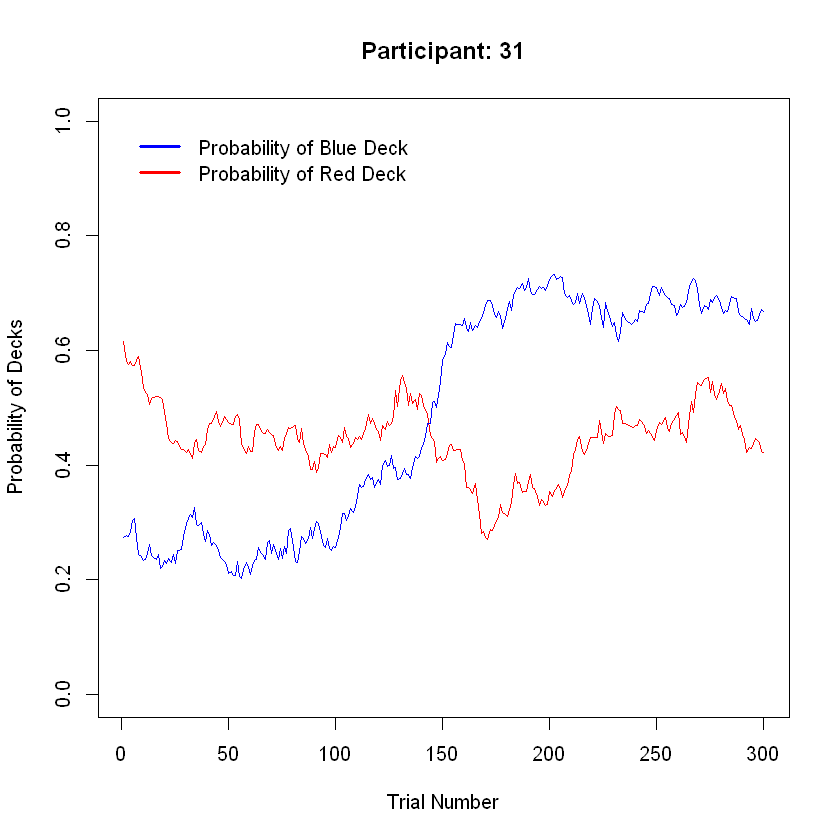

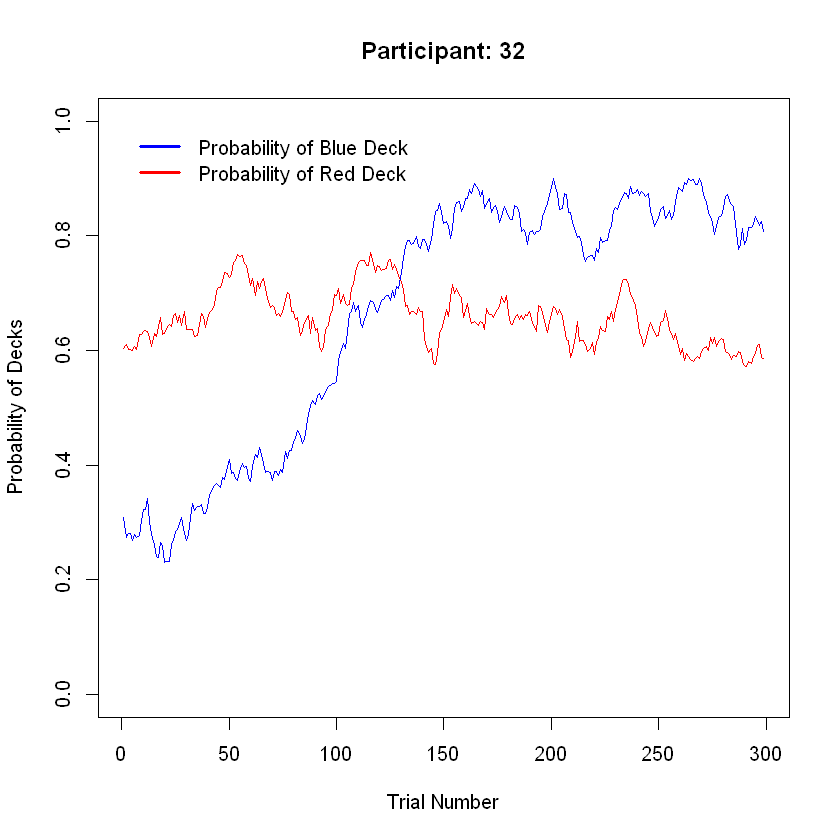

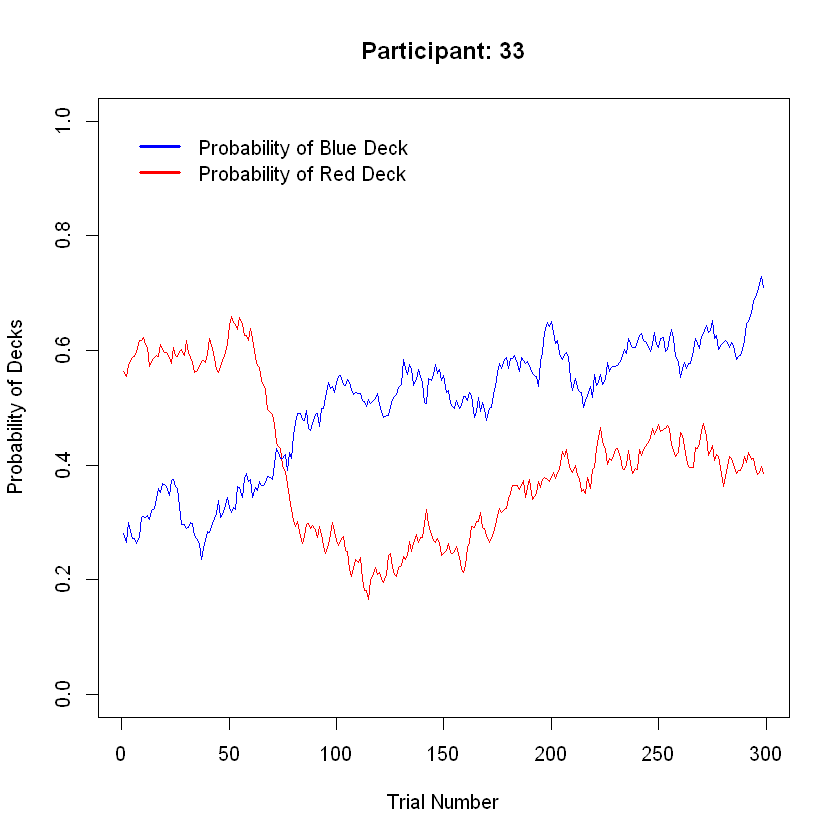

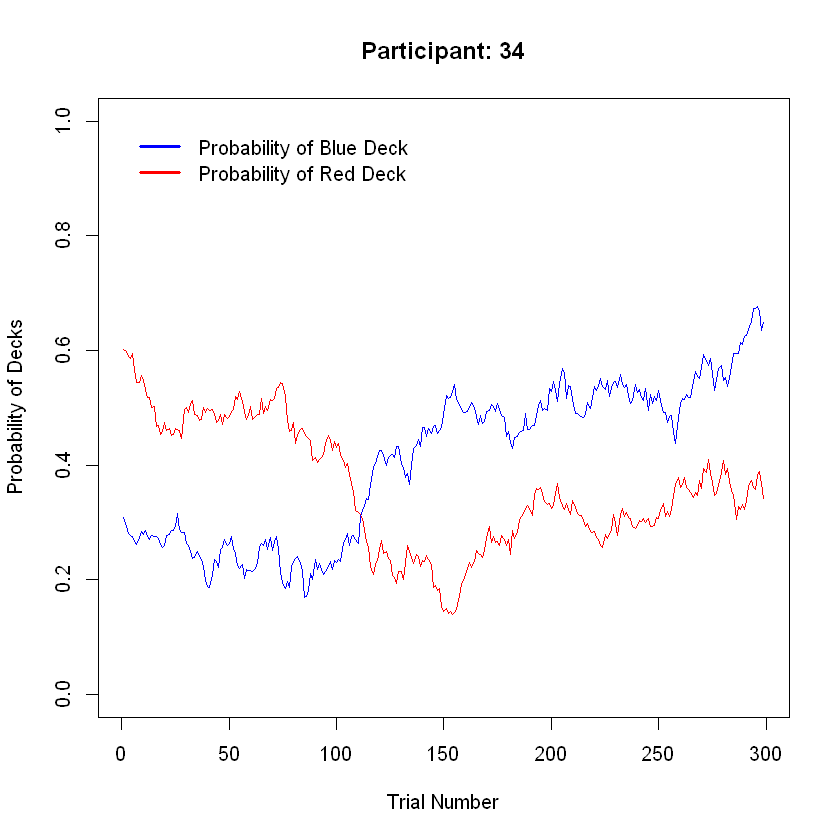

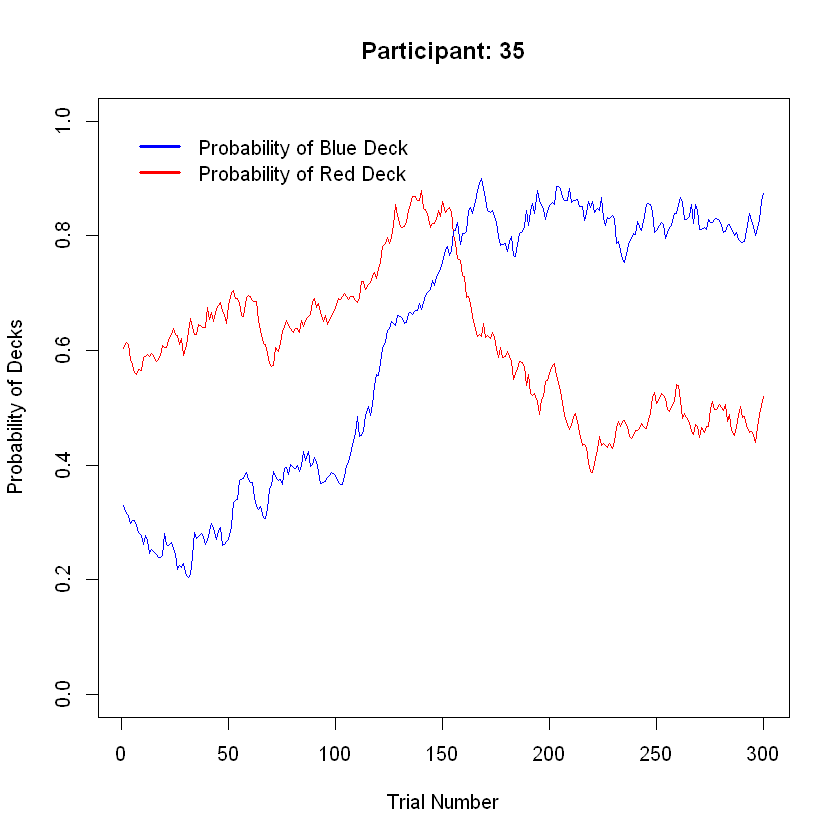

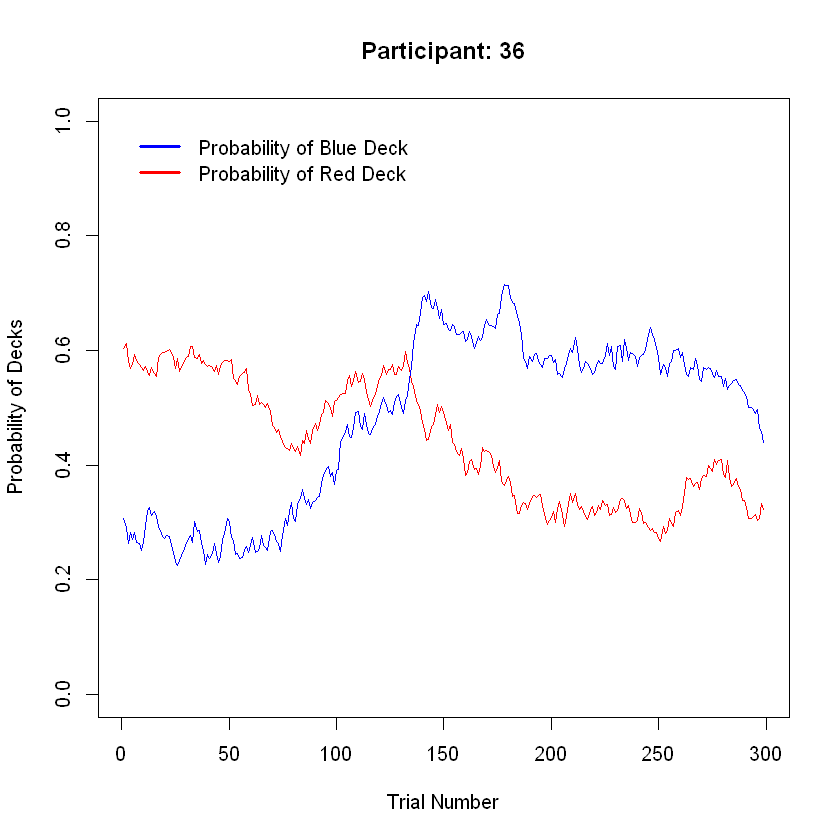

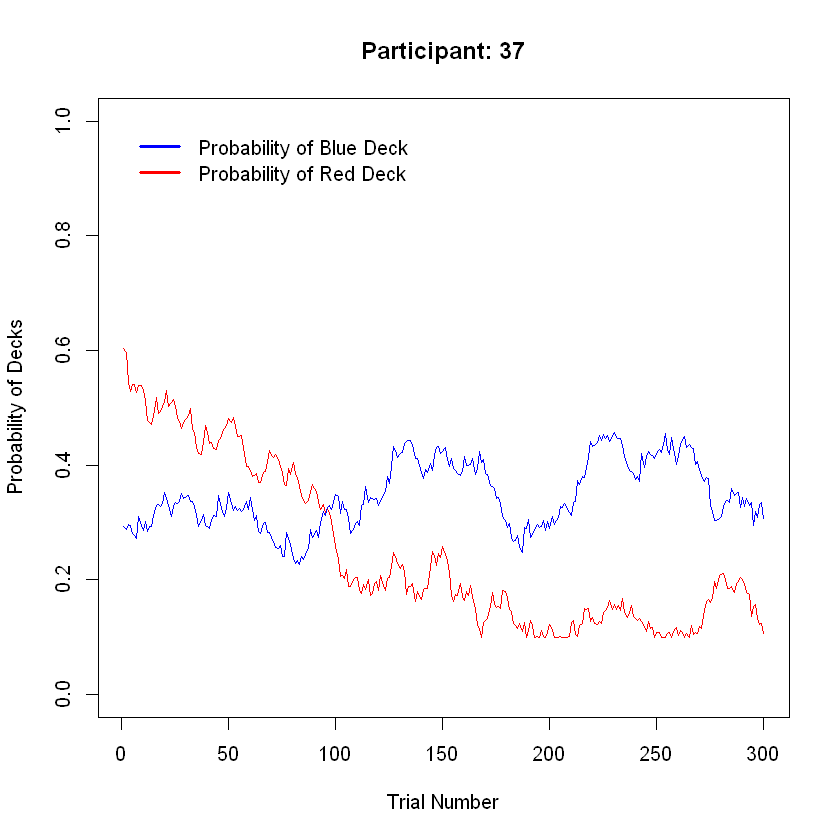

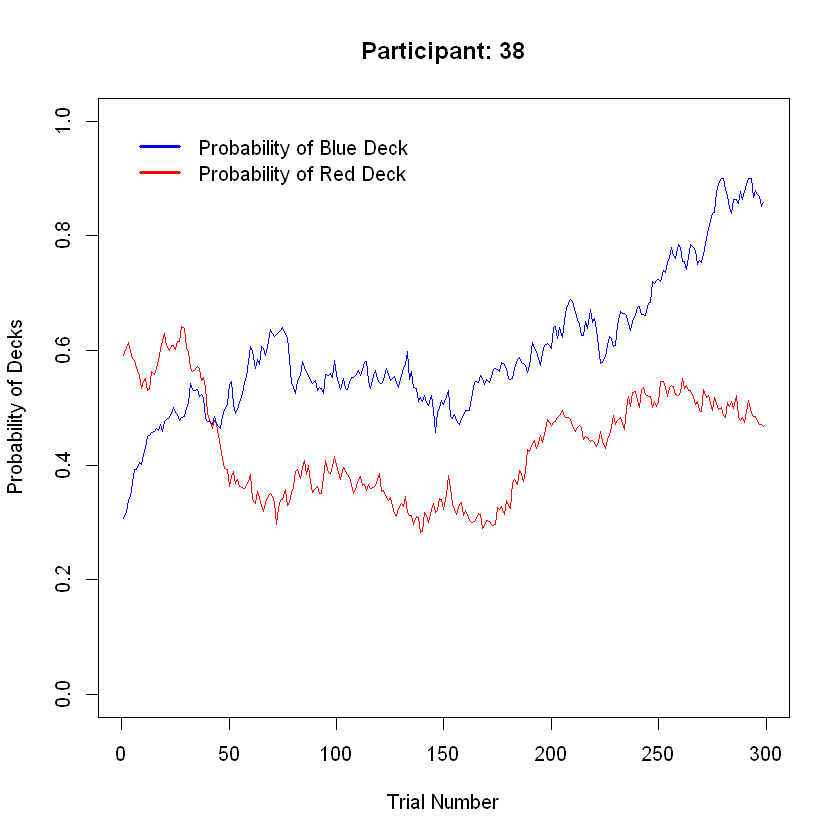

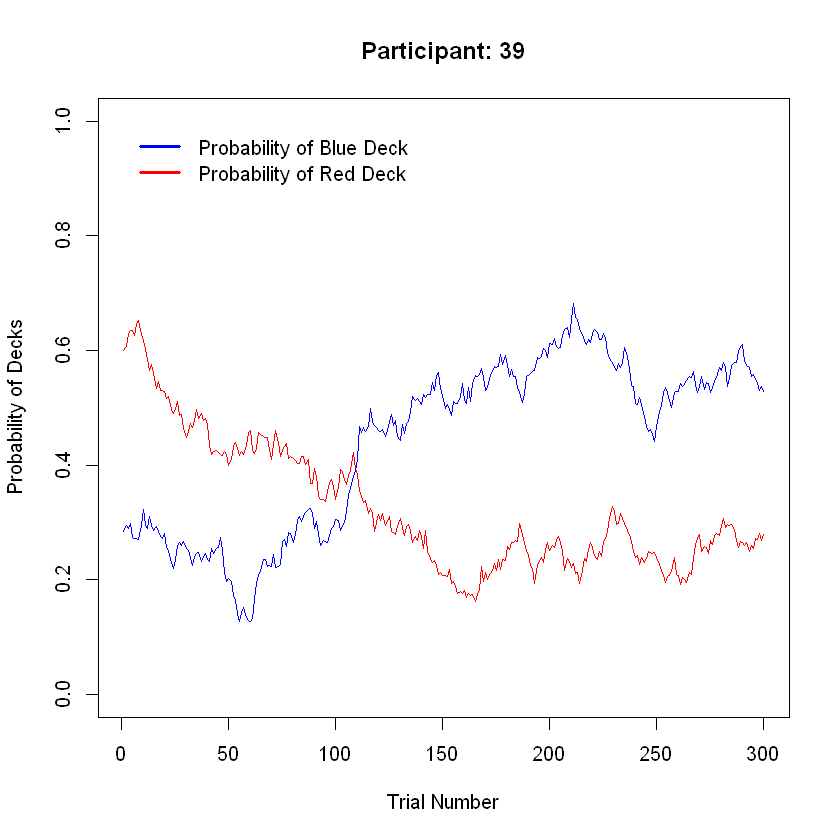

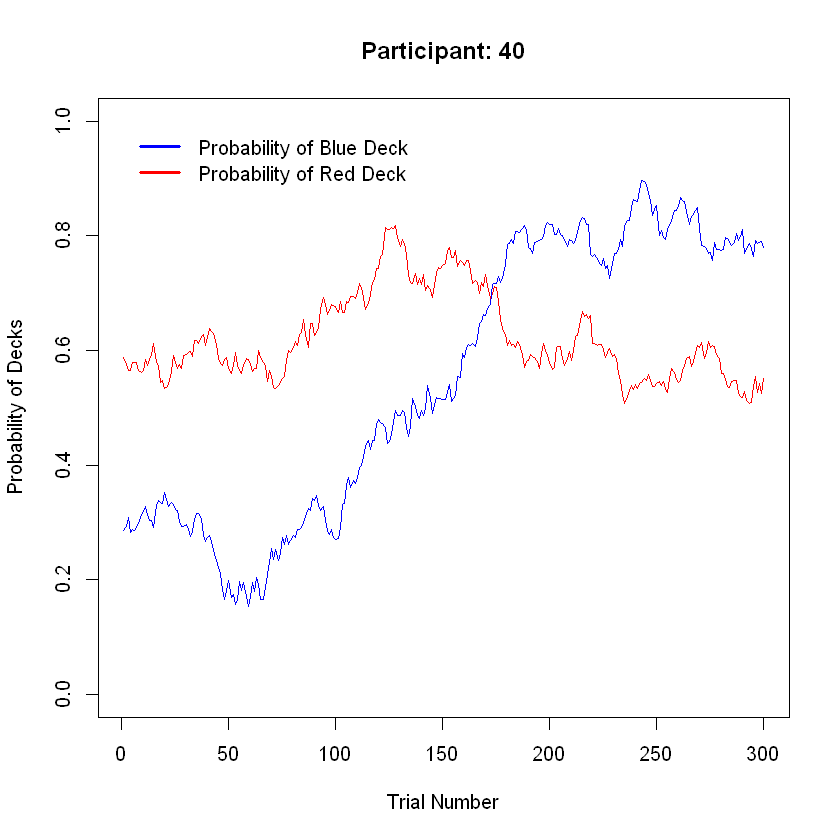

In [17]:
i <- 1
while(i<=40){
    
    plot(dat$deck_prob1[dat$participant==i]/100, type = 'l', col = 'red', xlab = 'Trial Number', ylab  ='Probability of Decks', ylim=c(0,1), main = sprintf("Participant: %s", i))
    lines(dat$deck_prob2[dat$participant==i]/100, type='l', col='blue')
    legend(0,1, legend=c('Probability of Blue Deck', 'Probability of Red Deck'), col=c('blue','red'), box.lty=0,lwd=c(2.5,2.5), cex = c(1), bty ='n')
    
   # plot(dat$deck_prob1[dat$participant==i+1], type = 'l', col = 'orange', ylab  ='Probability of Decks', ylim=c(0,100), main = sprintf("Participant: %s", i+1))
   # lines(dat$deck_prob2[dat$participant==i+1], type='l', col='blue')
   # legend(0,100, legend=c('Probability of Blue Deck', 'Probability of Orange Deck'), col=c('blue','orange'), box.lty=0,lwd=c(2.5,2.5), cex= c(0.5))
   # i <- i +2  
    i <- i + 1 
}

In [1]:
library("devtools")
library("lme4")
library("plotly")
library("LaplacesDemon")
library("ggplot2")
library("lmerTest")
library("optimx")
library("gdata")
library("Formula")
library("miscTools")
library("maxLik")
library("mlogit")
library("pbkrtest")
library("foreign")
library("MASS")
library("car")
library("tools")
library("nlme")
library('interplot')
library('lattice')

Loading required package: Matrix
Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)
gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdat